<a href="https://colab.research.google.com/github/RostislavKorst/GANs-MIPT-2022-Masters/blob/main/Assignment%203/3_ot_wgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Семинар по теории оптимальной транспортировки


На данном семинаре мы последовательно разберем хронологию вывода основных уравнений теории оптимальной транспортировки, рассмотрим приложение данной теории для ряда задач, и проведем обзор современного применения оптимальной траспортировки для задач машинного обучения с использованием нейронных сетей.

# Структура семинара 
## Теория
1.   Введение в оптимальную транспортировку. Постановка задачи Гаспаром Монжем (Earth Moving Distance)
2.   Проблема вычисления Earth Moving Distance. 
3.   Постановка проблемы Леонидом Канторовичем

## Практика 

1.   Использование теории оптимальной транспортировки для задачи траспортировки продуктов между пекарнями и кафе
2.   Использование теории оптимальной транспортировки для задачи транспортировки/трансфера цвета между изображениями

## Дистанция Вассерштейна и Генеративные сети
1.   Дуальная постановка Канторовича
2.   Дистанция Вассерштейна 
3.   Вассерштейн Генеративно-Состязательные Сети






---

# Введение в теорию оптимальной транспортировки


## Постановка задачи Гаспаром Монжем (Earth Moving Distance)

Задача оптимальной транспортировки в математике называется задачей Монжа-Канторовича.

Формальное описание, данное Монжем:

\\

$\displaystyle \inf_{T_{\#} \mu \ =\upsilon } \ \int _{\Omega} \ c( x,\ T( x)) \ \mu ( dx)$  

\\

Где: 

* $\Omega - \ измеримое \ пространство $
* $с:\Omega\times \Omega\ \rightarrow \mathbb{R},$ 
* $\mu ,\nu \ вероятностные\ меры\ в\ пространстве\ \mathbb{P}( \Omega)$
* $\displaystyle T\ :\ \Omega \ \rightarrow \ \Omega $

Задача заключается в минимизации этой работы поиском оптимального $\displaystyle T$
 

В данной постановке задачи это свойство мало применимо на практике в том числе в машинном обучении, так как в постановке Монжа массы не делимы. 

## Постановка проблемы Леонидом Канторовичем
Леонид Канторович изучил данную проблему в 20 веке, переформулировал и упростил ее, чем и положил начало новых исследований в данной области. 


Постановка Канторовича осуществляет некоторую relaxation допуская возможность разделения масс для сохранения пропорции. 


Канторович поставил задачу, вместо поиска transport map искать transport plan

\\
$$
\inf\iint c( x,y) \ P( dx,\ dy) ,\ \ P\in \prod ( \mu ,\ u)
$$


$\ P( X,Y) \ =\ \mu ( x) \ \times \ \nu ( Y)$

\\


Задача найти такую меру $\displaystyle P\ $ заданную на $\displaystyle X,\ Y$ что:

$\displaystyle  \begin{array}{{>{\displaystyle}l}}
\int _{\ x\ in\ X} P( dx,dy) =\nu ( y) \ -\ вся\ масса\ траспортированная\ из\ x\ \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ суммируется\ в\ значение\ распределения\ \nu ( y) \ в\ этой\ точке\\
\\
\int\nolimits _{\ y\ in\ Y} P( dx,dy) =\mu ( x) \ -\ вся\ масса\ траспортированная\ из\ y\ \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ суммируется\ в\ значение\ распределения\ \mu ( x) \ в\ этой\ точке
\end{array}$



При этом минимизирующую $\displaystyle \iint c( x,y) \ P( dx,\ dy)$



---



# Практика


Теория оптимальной транспортировки позволяет сравнивать два (взвешенных) облака точек $(X, a)$ и $(Y, b)$, где $X \in \mathbb{R}^{n \times d}$ и $Y \in \mathbb{R}^{m \times d}$ - расположение в $n$ (соответственно и в $m$) точек размерностью $d$, и где $a \in \mathbb{R}^n$, $b \in \mathbb{R}^m$ есть веса.

\\

Необходимым является условие, чтобы сумма весов была равна единице, то есть $\sum_{i=1}^n a_i = \sum_{j=1}^m b_j = 1$.
Базовая идея оптимальной траспортировки заключается в том, чтобы "траспортировать" массу расположенную в точках $X$ в массу расположенную в точках $Y$.

\\

Давайте обозначим через $\mathcal{U}(a,b) = \left\{ P \in \mathbb{R}^{n \times m} \,|\, P \geq 0, \sum_{j=1}^m P_{ij} = a_i, \sum_{i=1}^n P_{ij} = b_j\right\}$ множество возможных траспортных планов.
Если $P \in \mathcal{U}(a,b)$, количество $P_{ij} \geq 0$ должно рассматриваться как масса, траспортированная из точки $X_i$ в точку $Y_j$. Поэтому мы и называем эту величину планом траспортировки.

\\

Мы также будем рассматривать матрицу стоимости $C \in \mathbb{R}^{n \times m}$. Значение $C_{ij}$ может быть рассмотрено как цена, которую необходимо заплатить, чтобы траспортировать одну точку массы из $X_i$ в $Y_j$. Эта цена обычно определяется позицией $X_i$ и $Y_j$, например $C_{ij} = \|X_i - Y_j\|$ or $C_{ij} = \|X_i - Y_j\|^2$.

\\


Тогда транспортируемая по плану $P \in \mathcal{U}(a,b)$ масса имеет общую стоимость, равную $\sum_{ij} P_{ij} C_{ij}$.
В теории оптимальной транспортировки мы хотим найти такой план, который минимизирует общую стоимость. Другими словами, мы хотим решить 
$$
    \min_{P \in \mathcal{U}(a,b)} \sum_{ij} C_{ij }P_{ij}.
$$

Данная прблема является задачей линейного программирования: целевая функция линейна по $P$, и ограничения оптимизации тоже линейны для $P$. Мы можем решить данную проблему, используя классические алгоритмы линейного программирования, например симплекс-методом.

Если $P^*$ - это решение проблемы оптимальной транспортировки, мы скажем, что $P^*$ - оптимальный транспорт между $(X, a)$ и $(Y, b)$, и что $\sum_{ij} P^*_{ij} C_{ij}$ - это дистанция оптимальной траспортировки $(X, a)$ и $(Y, b)$ или, другими словами, минимальное значение энергии/работы, которое необходимо затратить, чтобы траспортировать массу, расположенную в точках $X$ в целевое значение масс, расположенных в точках $Y$.

# Использование теории оптимальной транспортировки для задачи траспортировки продуктов между пекарнями и кафе

В данной задаче мы имеем позиции пекарен $X \in \mathbb{R}^{8 \times 2}$ и соответсвующие им продукты $a \in \mathbb{R}^8$ которые описываются облаком точек. Кафе, в котором продается выпечка из пекарен, обозначены расположением $Y \in \mathbb{R}^{5 \times 2}$ и $b \in \mathbb{R}^{5}$.

In [ ]:
!pip install POT

import ot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 664 kB 3.9 MB/s 


In [ ]:
import os
!pip install --upgrade git+https://github.com/mlss-skoltech/tutorials.git#subdirectory=optimal_transport_tutorial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mlss-skoltech/tutorials.git to /tmp/pip-req-build-w9wqs6fi
  Running command git clone -q https://github.com/mlss-skoltech/tutorials.git /tmp/pip-req-build-w9wqs6fi
  Created wheel for optimaltransport: filename=optimaltransport-0.1-py3-none-any.whl size=7865019 sha256=4f3843785198610e3e0d6dc412714c0a22a0a8d5fbe076750e4ae8648dbaeab0
  Stored in directory: /tmp/pip-ephem-wheel-cache-5a6sxipg/wheels/93/81/f0/fbd6ec88d0527c458152912bf53e3ec6a2cd3df3b133f1fa7e
Successfully built optimaltransport


In [ ]:
import pkg_resources

DATA_PATH = pkg_resources.resource_filename('optimaltransport', 'data/')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the data
import pickle

with open(DATA_PATH + 'croissants.pickle', 'rb') as file:
    croissants = pickle.load(file)

X = croissants['bakery_pos']
a = croissants['bakery_prod']
Y = croissants['cafe_pos']
b = croissants['cafe_prod']

print('Bakery productions =', a)
print('Café sales =', b)
print('Total number of croissants =', a.sum())

Bakery productions = [31. 48. 82. 30. 40. 48. 89. 73.]
Café sales = [82. 88. 92. 88. 91.]
Total number of croissants = 441.0


In [ ]:
X

array([[184.86464733, 201.8163543 ],
       [449.3486663 , 168.40784664],
       [245.41756746, 288.12166576],
       [273.95400109, 364.68282915],
       [494.58935376, 336.8424061 ],
       [738.19305545, 238.70491485],
       [736.10502372, 375.12298779],
       [537.74200949, 482.30861653]])

In [ ]:
Y

array([[302.08410452, 442.78633642],
       [345.1162221 , 368.52123027],
       [449.226184  , 201.94529124],
       [454.08464888, 387.95508982],
       [627.60125204, 408.7770822 ]])

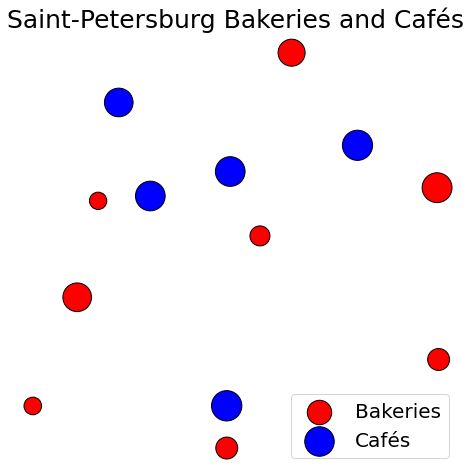

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
plt.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
plt.legend(fontsize=20)
plt.axis('off')
plt.title('Saint-Petersburg Bakeries and Cafés', fontsize=25)
plt.show()

Вычислим матрицу стоимости, где стоимость определяется расстоянием, вычислим такую матрицу используя расстояния $\ell_1$ и $\ell_2$.


In [ ]:
C_1 = np.zeros((8,5))
C_2 = np.zeros((8,5))
for i in range(8):
    for j in range(5):
        C_1[i,j] = np.linalg.norm(X[i]-Y[j])
        C_2[i,j] = C_1[i,j]**2

In [ ]:
C_2

array([[ 71806.93342368,  53471.0828867 ,  69887.03869363,
        107127.03809694, 238848.44404326],
       [ 96970.40680838,  50909.76872922,   1124.77519163,
         48223.42151718,  89551.35372338],
       [ 27132.25677185,  16403.91170975,  48964.31969921,
         53508.66342873, 160622.09827457],
       [  6891.46056701,   5078.79502259,  57203.84434635,
         32988.64839201, 127010.6812586 ],
       [ 48282.38735754,  23345.76498866,  20255.04876894,
          4253.1375545 ,  22866.76271036],
       [231840.24371169, 171361.67266306,  84853.12272464,
        102993.20141004,  41155.08908898],
       [192952.48705117, 152915.82619273, 112289.98326498,
         79700.15466443,  12905.66653869],
       [ 57096.65880001,  50052.26323952,  86438.64553436,
         15901.14198628,  13481.57001385]])

Теперь вычислим с помощью библиотеки ОТ оптимальную траспортировку выпечки из перкарен в кафе, для двух матриц расстояния по $\ell_1$ и $\ell_2$

In [ ]:
optimal_plan_1 = ot.emd(a, b, C_1)
print(optimal_plan_1)
optimal_cost_1 = np.sum(optimal_plan_1*C_1)
print('1-Wasserstein distance =', optimal_cost_1)
print('')

optimal_plan_2 = ot.emd(a, b, C_2)
print(optimal_plan_2)
optimal_cost_2 = np.sum(optimal_plan_2*C_2)
print('2-Wasserstein distance =', np.sqrt(optimal_cost_2))

[[ 0. 31.  0.  0.  0.]
 [ 0.  0. 48.  0.  0.]
 [25. 57.  0.  0.  0.]
 [30.  0.  0.  0.  0.]
 [ 0.  0.  0. 40.  0.]
 [ 0.  0. 44.  2.  2.]
 [ 0.  0.  0.  0. 89.]
 [27.  0.  0. 46.  0.]]
1-Wasserstein distance = 61523.15971278249

[[ 0. 31.  0.  0.  0.]
 [ 0.  0. 48.  0.  0.]
 [52. 30.  0.  0.  0.]
 [30.  0.  0.  0.  0.]
 [ 0. 27.  0. 13.  0.]
 [ 0.  0. 44.  2.  2.]
 [ 0.  0.  0.  0. 89.]
 [ 0.  0.  0. 73.  0.]]
2-Wasserstein distance = 3292.139032582319


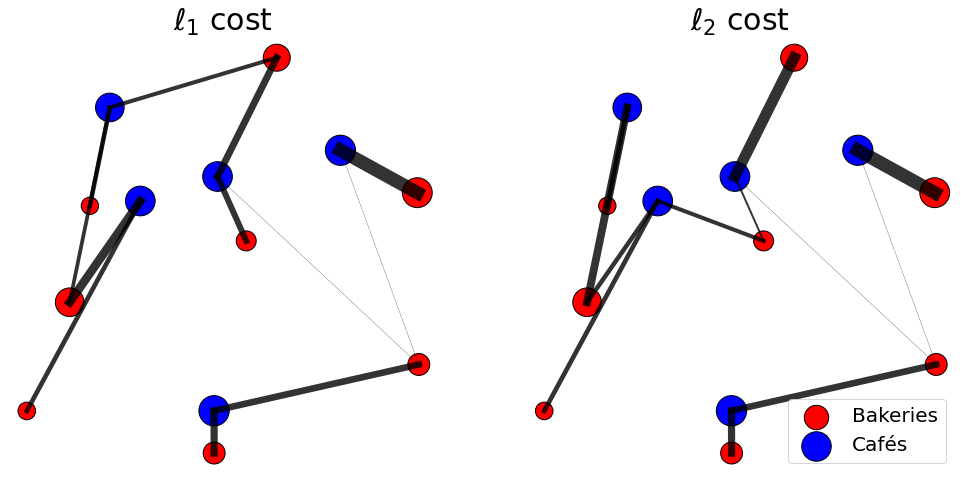

In [ ]:
fig = plt.figure(figsize=(17,8))

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
ax.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
for i in range(8):
    for j in range(5):
        ax.plot([X[i,0], Y[j,0]], [X[i,1], Y[j,1]], c='k', lw=0.15*optimal_plan_1[i,j], alpha=0.8)
ax.axis('off')
ax.set_title('$\ell_1$ cost', fontsize=30)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
ax.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
for i in range(8):
    for j in range(5):
        ax.plot([X[i,0], Y[j,0]], [X[i,1], Y[j,1]], c='k', lw=0.15*optimal_plan_2[i,j], alpha=0.8)
ax.axis('off')
ax.set_title('$\ell_2$ cost', fontsize=30)

plt.legend(fontsize=20)
plt.show()

## Использование теории оптимальной транспортировки для задачи транспортировки/трансфера цвета между изображениями

Для исходного и целевого изображений цель передачи цвета состоит в том, чтобы преобразовать цвета исходного изображения так, чтобы оно было похоже на цветовую палитру целевого изображения. В конце концов, мы хотим найти «цветовое отображение», дающее каждому цвету исходного изображения новый цвет. Это можно сделать, вычислив оптимальный транспортный план между двумя изображениями, которые видны как облака точек в пространстве RGB.

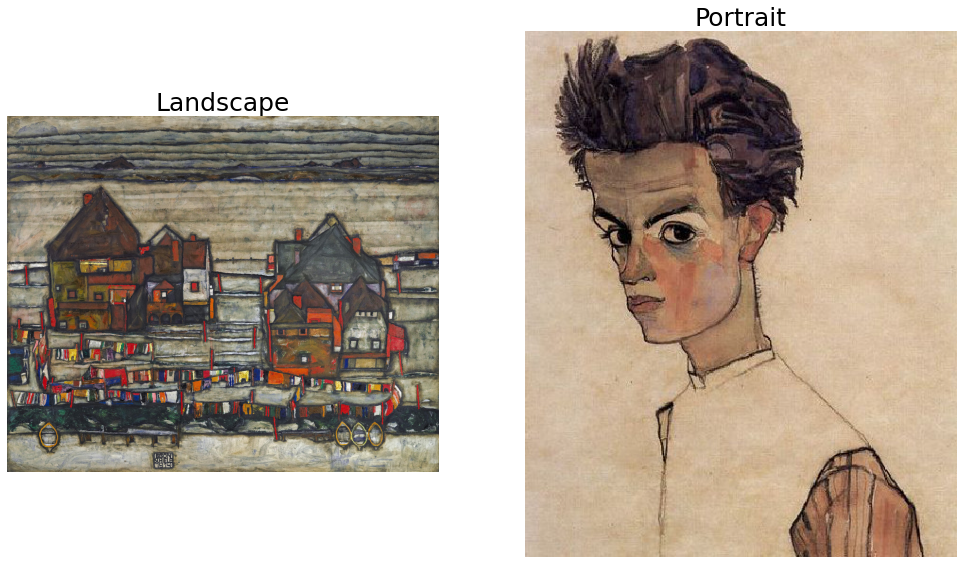

In [ ]:
import numpy as np
import ot
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from mpl_toolkits.mplot3d import Axes3D

I1 = imread(DATA_PATH + 'schiele.jpg').astype(np.float64) / 256
I2 = imread(DATA_PATH + 'schiele2.jpg').astype(np.float64) / 256

fig = plt.figure(figsize=(17, 30))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(I1)
ax.set_title('Landscape', fontsize=25)
ax.axis('off')

ax = fig.add_subplot(1, 2, 2)
ax.imshow(I2)
ax.set_title('Portrait', fontsize=25)
ax.axis('off')

plt.show()

Нам нужно будет работать с «матрицами» вместо изображений. Поскольку существует 3 цвета, изображения имеют форму (Ширина, Высота, 3), а соответствующие матрицы будут иметь форму (Ширина * Высота, 3).

In [ ]:
def im2mat(I):
    '''Convert image I to matrix.'''
    return I.reshape(-1,3)

def mat2im(X, shape):
    '''Convert matrix X to image with shape 'shape'.'''
    return X.reshape(shape)

X1 = im2mat(I1)
X2 = im2mat(I2)

В реальных изображениях слишком много разных цветов, поэтому нам потребуется их подвыборка. Для этого мы используем K-средние для всех цветов и оставляем только вычисленные центроиды. Обратите внимание, что использование мини-пакетных K-средних ускоряет вычисления.

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Size of the subsampled point clouds
nbsamples = 1000

kmeans1 = MiniBatchKMeans(n_clusters=nbsamples, init_size=nbsamples).fit(X1)
X1_sampled = kmeans1.cluster_centers_

kmeans2 = MiniBatchKMeans(n_clusters=nbsamples, init_size=nbsamples).fit(X2)
X2_sampled = kmeans2.cluster_centers_

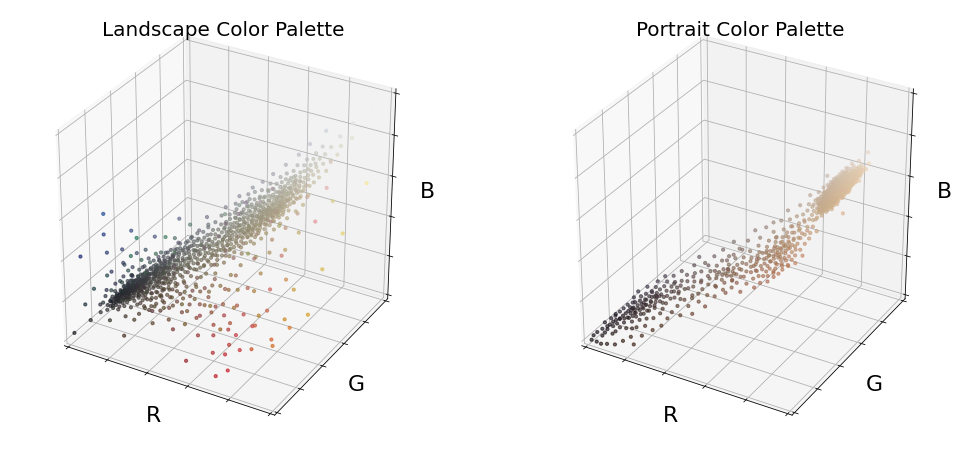

In [ ]:
def showImageAsPointCloud(X, Y):
    '''Show the color palette associated with images X and Y.'''
    fig = plt.figure(figsize=(17,8))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_xlim(0,1)
    ax.scatter(X[:,0], X[:,1], X[:,2], c=X, s=10, marker='o', alpha=0.6)
    ax.set_xlabel('R',fontsize=22)
    ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_ylabel('G',fontsize=22)
    ax.set_yticklabels([])
    ax.set_zlim(0,1)
    ax.set_zlabel('B',fontsize=22)
    ax.set_zticklabels([])
    ax.set_title('Landscape Color Palette', fontsize=20)
    ax.grid('off')
    
    ax = fig.add_subplot(122, projection='3d')
    ax.set_xlim(0,1)
    ax.scatter(Y[:,0], Y[:,1], Y[:,2], c=Y, s=10, marker='o', alpha=0.6)
    ax.set_xlabel('R',fontsize=22)
    ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_ylabel('G',fontsize=22)
    ax.set_yticklabels([])
    ax.set_zlim(0,1)
    ax.set_zlabel('B',fontsize=22)
    ax.set_zticklabels([])
    ax.set_title('Portrait Color Palette', fontsize=20)
    ax.grid('off')
    
    plt.show()
showImageAsPointCloud(X1_sampled, X2_sampled)

Для того, чтобы вычислить оптимальную траспортировку между двумя облаками точек, как и в предыдущей задаче, мы сперва должны задать некоторую дистанцию и в данной задаче мы будем использовать квадратичную дистанцию $C_{ij} = \|X_i - Y_j\|^2$.

In [ ]:
C_1 = np.ones((nbsamples,nbsamples))
C_2 = np.ones((nbsamples,nbsamples))
for i in range(nbsamples):
    for j in range(nbsamples):
        C_1[i,j] = np.linalg.norm(X1_sampled[i]-X2_sampled[j])
        C_2[i,j] = C_1[i,j]**2

In [ ]:
OT_plan = ot.emd(np.ones(nbsamples), np.ones(nbsamples), C_2)

In [ ]:
def colorTransfer(OT_plan, kmeans1, kmeans2, shape):
    '''Return the color-transfered image of shape "shape".'''
    samples_transformed = OT_plan.dot(kmeans2.cluster_centers_)
    X1_transformed = samples_transformed[kmeans1.labels_]
    return mat2im(X1_transformed, shape)

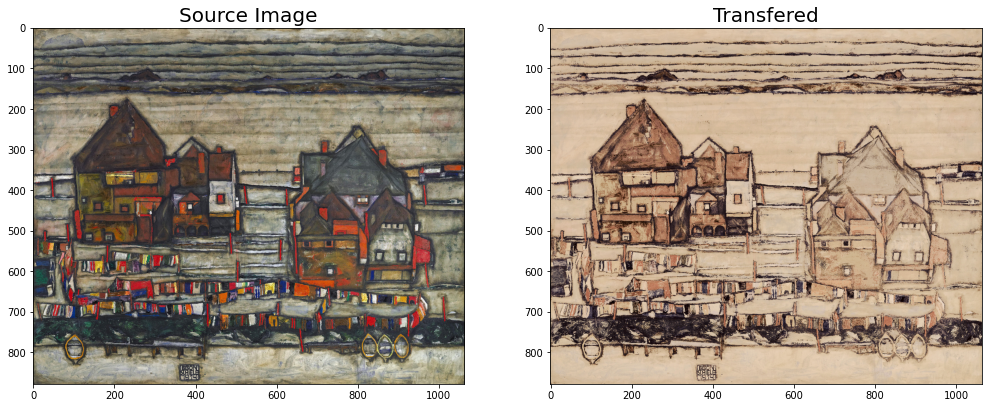

In [ ]:
fig = plt.figure(figsize=(17, 20))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(I1)
ax.set_title('Source Image', fontsize=20)

ax = fig.add_subplot(1, 2, 2)
I = colorTransfer(OT_plan, kmeans1, kmeans2, I1.shape)
ax.imshow(I)
ax.set_title('Transfered', fontsize=20)

plt.show()

--- 

 ## Дистанция Вассерштейна и Генеративно-Состязательные Сети 

## Двойственная постановка Канторовича


\\

$$Primal:\inf_{P\in \prod ( \mu ,\nu )}\iint c( x,y) \ P( dx,\ dy)$$ 

\\

$$Dual:\displaystyle \sup _{ \begin{array}{{>{\displaystyle}l}}
\phi \in L_{1}( \mu ) ,\ \psi \ \in L_{1}( \nu )\\
\phi ( x) \ +\psi ( y) \ \leqslant c( x,y)
\end{array}}\int \phi d\mu +\int \psi d\nu \ $$  

\\
Логически возникающий вопрос: откуда двойственная постановка собственно возникает, и что означают переменные там возникающие?

Глобально, идея данного подхода заключается в перестановке ограничений и переменных местами, при этом задача минимизации меняется на задачу максимизации.

Осуществим вывод двойственной постановки:

\\

$$ 
L_{\prod }( P) \ =\ \sup _{\phi ,\psi }\left[\int \phi d\mu +\int \psi d\nu -\iint \phi \ \oplus \ \psi dP\right] \ =\{0\ if\ P\in \prod ( \mu ,\nu ) \ \ or\ +\infty \ otherwise\ \\
$$

\\
Данное выражение выглядит достаточно сложно. Глобально это выражение есть представление задачи оптимизации в такой форме, чтобы оптимизируя ее, мы смогли найти правильную функцию P, то есть правильный coupling. 

Это выражение утверждает, что функция от $\displaystyle P\ $(coupling) равна нулю, если мы имеем правильные маргинальные распределения, и плюс бесконечность в любом другом случае. 


В данном выражении мы берем supremum от 

$$\displaystyle \int \phi d\mu +\int \psi d\nu $$

\\

Отнимаем от этих функций

$$\displaystyle \iint \phi \ \oplus \ \psi dP$$ 
Где это выражение есть ничто иное как: 

\\
$$\displaystyle \iint \phi \ ( x) \ dP(x ,y) \ +\ \iint \psi ( y) dP( x,y)$$
\\

Как результат, если функция P задает правильные маргиналы, то, так как 

\\
$$\displaystyle \int \phi d\mu \ =\iint \phi ( x) dP(x ,y) \ \ и\ \int \psi d\nu \ =\ \iint \psi ( y) dP( x,y) $$ 

\\
Наше выражение будет равно нулю. Если coupling неверный, значит, где-то мы будем иметь ненулевое значение, и следовательно, мы всегда можем максимизировать функции $\displaystyle \phi ,\ \psi $ в плюс бесконечность. 



Далее проделываем трюк перехода в двойственную задачу. 

Запишем функцию, которую необходимо оптимизировать:

\\

$$\displaystyle \inf_{P\in \prod ( \mu ,\nu )}\iint cdP$$ и у нас есть некоторое условие, которое мы можем превратить в часть объектной функции 
$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint cdP+\ L_{\prod }( P)$$

\\

Запишем задачу в более детальной форме.

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint cdP+\sup _{\phi ,\psi }\int \phi d\mu +\int \psi d\nu -\iint \phi \ \oplus \ \psi dP\ $$

\\

Далее начинается алгебраическая игра по упрощению выражения. Осуществим перемещение мест $\displaystyle \inf ,\sup $. Доказательство возможности такой перестановки выходит за рамки данного курса.  

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\sup _{\phi ,\psi }\iint cdP+\int \phi d\mu +\int \psi d\nu -\iint \phi \ \oplus \ \psi dP$$

\\

Перенесем все члены (terms) с $\displaystyle P$ влево

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\sup _{\phi ,\psi }\iint cdP-\iint \phi \ \oplus \ \psi dP+\int \phi d\mu +\int \psi d\nu $$
\\
 

В таком случае более явно видно, что мы имеем два двойных интеграла по $\displaystyle P$. Их можно объеденить. 

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\sup _{\phi ,\psi }\iint ( c-\phi \ \oplus \ \psi ) dP+\int \phi d\mu +\int \psi d\nu $$

\\

И снова инверсия $\displaystyle \sup -\inf \ $

$$\displaystyle \sup _{\phi ,\psi } \ \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint ( c-\phi \ \oplus \ \psi ) dP+\int \phi d\mu +\int \psi d\nu $$

\\

В таком случае, в выражении, в первую очередь происходит интегрирование по $\displaystyle P$ и только потом по $\displaystyle \psi ,\phi $. 

\\

Вопрос, насколько низкие значения может принимать первая часть выражения? 

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\left[\iint ( c-\phi \ \oplus \ \psi ) dP\right] =\ \inf_{P\in P_{+}\left( \Omega^{2}\right)}\left[ с( x,y) -\iint \phi ( x) dP(x ,y) \ +\iint \psi ( y) dP( x,y)\right] \ $$  

 

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint ( c-\phi \ \oplus \ \psi ) dP\ =\ 0\ if\ \ c-\phi \ \oplus \ \psi \ \geqslant \ 0\ \ and\ -\infty \ otherwise$$


То есть если $\displaystyle c-\phi \ \oplus \ \psi $ ⩽ 0, то так как мы берем infimum, наши значения функций будут принимать значения, уходящие в минус бесконечность. Но если у нас $\displaystyle c-\phi \ \oplus \ \psi $ ⩾ 0,  то, так как мы берем infimum, самый минимум, который мы можем получить это 0. Так как мы не максимизируем, риска, что выражение начнет принимать значение плюс бесконечность у нас нет. Поэтому имеем два условия, и затем просто транслируем это свойство, как необходимое условие для того, чтобы мы имели решение двойственной постановки. 

$$\displaystyle \sup _{\phi \ \oplus \ \psi \ \leqslant c}\int \phi d\mu +\int \psi d\nu $$ - Dual


## Дистанция Вассерштейна

Дистанция Вассерштейна есть ничто иное, как задача Кантаровича, на которой задана некоторая метрика. В зависимости от метрики у нас будут выстраиваться определенные свойства.

Дистанция Вассерштейна определяется в любой размерности и имеет следующий общий вид: 
$$W_{p}^{p}(\mu ,\nu)=\inf _{P} \int P(x, y)\|x-y\|_{k}^{k} d x d y$$

Дистанция Вассерштейна в двойственной постановке.



$$\displaystyle W^{p}_{p}( \mu ,\nu ) \ =\ \sup _{ \begin{array}{{>{\displaystyle}l}}
\phi \ ( x) \in L_{1}( \mu ) ,\ \psi ( y) \ \in L_{1}( \nu )\\
\phi ( x) \ \oplus \ \psi ( y) \ \leqslant D^{p}( x,y)
\end{array}}\int \phi d\mu +\int \psi d\nu $$

При двойственной постановке возникает вопрос о возможности еще сократить размерность параметров, которые нам необхомдимо оптимизировать. Несмотря на то, что мы сократили размер параметров, некоторая сложность c размерностью $\displaystyle \Omega$ все же сохраняется. 



Чтобы сократить размерность была применена достаточно интересная теория, под названием D - transforms, которая уходит корнями к выпуклой оптимизации. 



Идея ее в следующем: 

Представим, что мы нашли некоторую функцию $\displaystyle \phi $. Как мы можем найти $\displaystyle \psi $?

Имея заданное нами ограничение $\displaystyle \phi \ \oplus \ \psi \ \leqslant D( x,y)$ мы можем легко вывести $\displaystyle \psi $ при имеющемся $\displaystyle \phi $.



$\displaystyle  \begin{array}{{>{\displaystyle}l}}
\psi ( y) \ \leqslant D^{p}( x,y) -\ \phi ( x) \ \\
\\
\psi ( y) \ \leqslant \inf_{x} D^{p}( x,y) -\ \phi ( x) \ 
\end{array}$



Определяя в этом уравнении infimum мы собственно и определяем функцию $\displaystyle \psi $



$\displaystyle \phi ^{'}( y) \ \leqslant \inf_{x} D^{p}( x,y) -\ \phi ( x)$

$\displaystyle W^{p}_{p}( \mu ,\nu ) \ =\ \sup _{\phi \ }\int \phi d\mu +\int \phi 'd\nu $


$\displaystyle W^{p}_{p}( \mu ,\nu ) \ =\ \sup _{\phi \ is\ D^{p} \ concave}\int \phi d\mu +\int \phi 'd\nu $ - Semi Dual 



Важным замечанием является то, что: $\displaystyle D^{p} \ concave\ equal\ to\ L_{1} \ Lipshetz\ $

То есть, если функции Липшецевы, тогда дистанция является дистанцией Вассерштейна. Доказательство этого выходит за рамки данного семинара.




В случае если $\displaystyle D^{1}$, то есть p=1, тогда мы можем записать дистанцию Вассерштейна так:



$\displaystyle W^{1}_{p}( \mu ,\nu ) \ =\ \sup _{\phi \ is\ D^{p} \ concave}\int \phi ( d\mu -d\nu )$


Для удобства заменим обозначение функции через $f$


$$W_{c}[p, q]=\sup _{f \in L_{c}}\left[\int f(x) p(x) d x-\int f(y) q(y) d y\right]$$

И запишем условие этой оптимизации такое, что функция $f$ должна оставаться Липшецевой 

Давайте теперь подумаем еще раз, какую задачу решает функция $f$ в данной формулировке: Предположим что распределения, с которыми мы работаем, являются распределениями изображений людей $P$ и животных $Q$

Однако сама по себе формула имеет довольно интуитивное толкование. Очевидно, что если
p равно q, разница между их ожидаемыми значениями любой функции f будет равна нулю, и, следовательно, расхождение исчезнет. Теперь предположим, что p и q различаются в некоторой области своего домена. В этом случае расхождение получается путем нахождения функции f, которая максимизирует эту разницу в терминах ее ожидаемого значения. Другими словами, f действует как детектор признаков, максимально отличающих p от q. Например, представьте, что p - это распределение по изображениям ландшафта без следов человеческой деятельности, а q - распределение по изображениям ландшафта с самолетом в небе. В этом случае оптимальным f будет плоский детектор. Из этого примера вы можете увидеть, как f играет роль дискриминатора в Wasserstein GAN. Обратите внимание, что без каких-либо ограничений на f любую небольшую разницу в распределениях можно произвольно увеличить, и расхождение будет бесконечным.

Давайте теперь используем нейронные сети в качестве функции $f$

In [1]:
import argparse
import os
import numpy as np
import math
import sys

In [2]:
#!pip install torch

In [3]:
#!pip install torchvision

In [4]:
import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

In [5]:
dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       #transforms.Normalize((0.1307,), (0.3081,)
                       transforms.Normalize(mean=(0.5,), std=(0.5,))
                   ])),
    batch_size=64, shuffle=True)

In [7]:
img_shape = (1, 28, 28)
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(int(np.prod(28*28)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
        )

    def forward(self, img):
        img_flat = img.view(img.shape[0], -1)
        validity = self.model(img_flat)
        return validity


# Initialize generator and discriminator
discriminator = Discriminator().to(device)

# Optimizers
optimizer_D = torch.optim.RMSprop(discriminator.parameters(), lr=0.00005)

Но какие распределения мы будем использовать? Давайте попробуем вместо P использовать распределения, которые мы получаем некоторой функцией, преобразующей нормальное распределение некоторой размерности. 

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(100, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.shape[0], *img_shape)
        return img

generator = Generator().to(device)
optimizer_G = torch.optim.RMSprop(generator.parameters(), lr=0.00005)


Теперь попробуем обучить функцию генератора таким образом, чтобы то распределение, в которое он трансформирует нормальное было максимально близко к распределению изображений $P_{θ}=g_{\theta}(Z)$ to match $P_r$. 

Мы можем для фиксированного $g_{\theta}$ вычислить функцию $f_{w}$ так, чтобы она показывала точную дистанцию Вассерштейна между сгенерированными и реальными изображениями.
Затем мы можем использовать данное значение для обучения генератора с помощью backprop

$$\begin{aligned} \nabla_{\theta} W\left(P_{r}, P_{\theta}\right) &=\nabla_{\theta}\left(\mathbb{E}_{x \sim P_{r}}\left[f_{w}(x)\right]-\mathbb{E}_{z \sim Z}\left[f_{w}\left(g_{\theta}(z)\right)\right]\right) \\ &=-\mathbb{E}_{z \sim Z}\left[\nabla_{\theta} f_{w}\left(g_{\theta}(z)\right)\right] \end{aligned}$$ 

Алгоритм будет выглядеть так:

*   For a fixed $\theta$, compute an approximation of $W(P_r,P_\theta)$ by training fw to convergence.
* Once we find the optimal fw, compute the θ gradient $ -\mathbb{E}_{z \sim Z}\left[\nabla_{\theta} f_{w}\left(g_{\theta}(z)\right)\right]$ by sampling several $z$.
*   Update θ, and repeat the process.



In [9]:
# denormalization image from range (-1)-1 to range 0-1 to display it
def denorm(x):
    max_pixel_value = 1.
    image = (x + max_pixel_value) / 2
    
    return image

In [10]:
sample_dir = "./images"

if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

# function to save the sample output of generator
def save_fake_images_mnist(G_model, index):
    # sample_vectors = torch.randn(batch_size, latent_size).to(device)
    sample_vectors = torch.Tensor(np.random.normal(0, 1, (100, 100))).to(
        device
    )
    fake_images = G_model(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    #print(fake_images)
    fake_fname = "fake_images-{0:0=4d}.png".format(index)
    print("Saving", fake_fname)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=10)

In [ ]:
Tensor = torch.FloatTensor
batches_done = 0
for epoch in range(300):

    for i, (imgs, _) in enumerate(dataloader):

        # Configure input
        real_imgs = Variable(imgs.to(device))

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Sample noise as generator input
        z = Variable(Tensor(np.random.normal(0, 1, (imgs.shape[0], 100))).to(device))

        # Generate a batch of images
        fake_imgs = generator(z).detach()
        # Adversarial loss
        d_real = discriminator(real_imgs)
        d_fake = discriminator(fake_imgs)
        
        loss_D = d_fake.mean() - d_real.mean()

        loss_D.backward()
        optimizer_D.step()

        # Clip weights of discriminator
        for p in discriminator.parameters():
            p.data.clamp_(-0.01, 0.01)

        # Train the generator every n_critic iterations
        if i % 5 == 0:

            # -----------------
            #  Train Generator
            # -----------------

            optimizer_G.zero_grad()

            # Generate a batch of images
            gen_imgs = generator(z)
            d_fake = discriminator(gen_imgs)
            # Adversarial loss
            loss_G = - d_fake.mean()

            loss_G.backward()
            optimizer_G.step()

            print(
                "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
                % (epoch, 300, batches_done % len(dataloader), len(dataloader), loss_D.item(), loss_G.item())
            )
            
        batches_done += 1
        
    save_fake_images_mnist(generator, epoch)

[Epoch 0/300] [Batch 0/938] [D loss: -0.086492] [G loss: -0.010114]
[Epoch 0/300] [Batch 5/938] [D loss: -0.120923] [G loss: -0.011123]
[Epoch 0/300] [Batch 10/938] [D loss: -0.406922] [G loss: -0.015023]
[Epoch 0/300] [Batch 15/938] [D loss: -0.850359] [G loss: -0.028218]
[Epoch 0/300] [Batch 20/938] [D loss: -1.387620] [G loss: -0.057885]
[Epoch 0/300] [Batch 25/938] [D loss: -2.036891] [G loss: -0.101035]
[Epoch 0/300] [Batch 30/938] [D loss: -2.707958] [G loss: -0.165139]
[Epoch 0/300] [Batch 35/938] [D loss: -3.294835] [G loss: -0.249822]
[Epoch 0/300] [Batch 40/938] [D loss: -4.010245] [G loss: -0.351725]
[Epoch 0/300] [Batch 45/938] [D loss: -4.788077] [G loss: -0.484057]
[Epoch 0/300] [Batch 50/938] [D loss: -5.287063] [G loss: -0.634006]
[Epoch 0/300] [Batch 55/938] [D loss: -5.925013] [G loss: -0.824246]
[Epoch 0/300] [Batch 60/938] [D loss: -6.520885] [G loss: -1.000662]
[Epoch 0/300] [Batch 65/938] [D loss: -6.913369] [G loss: -1.243020]
[Epoch 0/300] [Batch 70/938] [D loss

[Epoch 0/300] [Batch 585/938] [D loss: -1.525963] [G loss: -18.787928]
[Epoch 0/300] [Batch 590/938] [D loss: -1.794613] [G loss: -18.584389]
[Epoch 0/300] [Batch 595/938] [D loss: -1.271194] [G loss: -18.715389]
[Epoch 0/300] [Batch 600/938] [D loss: -1.131023] [G loss: -18.766609]
[Epoch 0/300] [Batch 605/938] [D loss: -1.488073] [G loss: -18.550209]
[Epoch 0/300] [Batch 610/938] [D loss: -1.106421] [G loss: -18.493315]
[Epoch 0/300] [Batch 615/938] [D loss: -1.777811] [G loss: -18.290945]
[Epoch 0/300] [Batch 620/938] [D loss: -1.598768] [G loss: -18.380480]
[Epoch 0/300] [Batch 625/938] [D loss: -1.402929] [G loss: -18.348942]
[Epoch 0/300] [Batch 630/938] [D loss: -1.721424] [G loss: -18.452959]
[Epoch 0/300] [Batch 635/938] [D loss: -1.316174] [G loss: -18.256790]
[Epoch 0/300] [Batch 640/938] [D loss: -1.212238] [G loss: -18.166439]
[Epoch 0/300] [Batch 645/938] [D loss: -1.290606] [G loss: -18.022114]
[Epoch 0/300] [Batch 650/938] [D loss: -1.211445] [G loss: -18.013088]
[Epoch

[Epoch 1/300] [Batch 230/938] [D loss: -0.484895] [G loss: -14.674214]
[Epoch 1/300] [Batch 235/938] [D loss: -0.384434] [G loss: -14.699003]
[Epoch 1/300] [Batch 240/938] [D loss: -0.399549] [G loss: -14.680311]
[Epoch 1/300] [Batch 245/938] [D loss: -0.527269] [G loss: -14.608895]
[Epoch 1/300] [Batch 250/938] [D loss: -0.587048] [G loss: -14.567499]
[Epoch 1/300] [Batch 255/938] [D loss: -0.382037] [G loss: -14.634469]
[Epoch 1/300] [Batch 260/938] [D loss: -0.442702] [G loss: -14.610837]
[Epoch 1/300] [Batch 265/938] [D loss: -0.441209] [G loss: -14.629878]
[Epoch 1/300] [Batch 270/938] [D loss: -0.465912] [G loss: -14.594541]
[Epoch 1/300] [Batch 275/938] [D loss: -0.364388] [G loss: -14.568119]
[Epoch 1/300] [Batch 280/938] [D loss: -0.535542] [G loss: -14.543337]
[Epoch 1/300] [Batch 285/938] [D loss: -0.558961] [G loss: -14.509846]
[Epoch 1/300] [Batch 290/938] [D loss: -0.341532] [G loss: -14.591995]
[Epoch 1/300] [Batch 295/938] [D loss: -0.348737] [G loss: -14.571459]
[Epoch

[Epoch 1/300] [Batch 815/938] [D loss: -0.271902] [G loss: -13.133464]
[Epoch 1/300] [Batch 820/938] [D loss: -0.145499] [G loss: -13.143930]
[Epoch 1/300] [Batch 825/938] [D loss: -0.118848] [G loss: -13.151783]
[Epoch 1/300] [Batch 830/938] [D loss: -0.199409] [G loss: -13.149130]
[Epoch 1/300] [Batch 835/938] [D loss: -0.113808] [G loss: -13.169798]
[Epoch 1/300] [Batch 840/938] [D loss: -0.083608] [G loss: -13.202626]
[Epoch 1/300] [Batch 845/938] [D loss: -0.164429] [G loss: -13.182321]
[Epoch 1/300] [Batch 850/938] [D loss: -0.194459] [G loss: -13.197380]
[Epoch 1/300] [Batch 855/938] [D loss: -0.086730] [G loss: -13.244294]
[Epoch 1/300] [Batch 860/938] [D loss: -0.150112] [G loss: -13.232254]
[Epoch 1/300] [Batch 865/938] [D loss: -0.188934] [G loss: -13.306238]
[Epoch 1/300] [Batch 870/938] [D loss: -0.221010] [G loss: -13.241646]
[Epoch 1/300] [Batch 875/938] [D loss: -0.081738] [G loss: -13.258476]
[Epoch 1/300] [Batch 880/938] [D loss: -0.097038] [G loss: -13.241103]
[Epoch

[Epoch 2/300] [Batch 460/938] [D loss: -0.102070] [G loss: -12.201700]
[Epoch 2/300] [Batch 465/938] [D loss: -0.118505] [G loss: -12.209062]
[Epoch 2/300] [Batch 470/938] [D loss: -0.125601] [G loss: -12.265198]
[Epoch 2/300] [Batch 475/938] [D loss: -0.132401] [G loss: -12.366364]
[Epoch 2/300] [Batch 480/938] [D loss: -0.013255] [G loss: -12.337882]
[Epoch 2/300] [Batch 485/938] [D loss: -0.121801] [G loss: -12.374695]
[Epoch 2/300] [Batch 490/938] [D loss: -0.075629] [G loss: -12.366772]
[Epoch 2/300] [Batch 495/938] [D loss: -0.107275] [G loss: -12.371746]
[Epoch 2/300] [Batch 500/938] [D loss: -0.168383] [G loss: -12.515879]
[Epoch 2/300] [Batch 505/938] [D loss: -0.038804] [G loss: -12.562097]
[Epoch 2/300] [Batch 510/938] [D loss: -0.110975] [G loss: -12.541722]
[Epoch 2/300] [Batch 515/938] [D loss: -0.043237] [G loss: -12.576964]
[Epoch 2/300] [Batch 520/938] [D loss: -0.064347] [G loss: -12.602374]
[Epoch 2/300] [Batch 525/938] [D loss: -0.112194] [G loss: -12.618428]
[Epoch

[Epoch 3/300] [Batch 110/938] [D loss: -0.059508] [G loss: -1.702137]
[Epoch 3/300] [Batch 115/938] [D loss: -0.046780] [G loss: -1.524550]
[Epoch 3/300] [Batch 120/938] [D loss: -0.023985] [G loss: -1.278055]
[Epoch 3/300] [Batch 125/938] [D loss: -0.019861] [G loss: -1.078755]
[Epoch 3/300] [Batch 130/938] [D loss: -0.013747] [G loss: -0.936789]
[Epoch 3/300] [Batch 135/938] [D loss: -0.050389] [G loss: -0.778609]
[Epoch 3/300] [Batch 140/938] [D loss: -0.023958] [G loss: -0.612950]
[Epoch 3/300] [Batch 145/938] [D loss: -0.030508] [G loss: -0.473807]
[Epoch 3/300] [Batch 150/938] [D loss: 0.001723] [G loss: -0.095117]
[Epoch 3/300] [Batch 155/938] [D loss: -0.034840] [G loss: -0.520105]
[Epoch 3/300] [Batch 160/938] [D loss: 0.005301] [G loss: -0.474059]
[Epoch 3/300] [Batch 165/938] [D loss: -0.005470] [G loss: -0.414658]
[Epoch 3/300] [Batch 170/938] [D loss: -0.033163] [G loss: -0.280961]
[Epoch 3/300] [Batch 175/938] [D loss: -0.045160] [G loss: -0.326189]
[Epoch 3/300] [Batch 1

[Epoch 3/300] [Batch 700/938] [D loss: -0.077443] [G loss: 0.529743]
[Epoch 3/300] [Batch 705/938] [D loss: -0.019553] [G loss: 0.528612]
[Epoch 3/300] [Batch 710/938] [D loss: -0.020085] [G loss: 0.376188]
[Epoch 3/300] [Batch 715/938] [D loss: -0.025198] [G loss: 0.354956]
[Epoch 3/300] [Batch 720/938] [D loss: -0.043778] [G loss: 0.259526]
[Epoch 3/300] [Batch 725/938] [D loss: -0.006758] [G loss: 0.220910]
[Epoch 3/300] [Batch 730/938] [D loss: -0.121088] [G loss: 0.055904]
[Epoch 3/300] [Batch 735/938] [D loss: -0.090147] [G loss: 0.011230]
[Epoch 3/300] [Batch 740/938] [D loss: -0.022512] [G loss: -0.071536]
[Epoch 3/300] [Batch 745/938] [D loss: -0.088753] [G loss: 0.017431]
[Epoch 3/300] [Batch 750/938] [D loss: -0.073076] [G loss: 0.002910]
[Epoch 3/300] [Batch 755/938] [D loss: -0.115925] [G loss: -0.010928]
[Epoch 3/300] [Batch 760/938] [D loss: -0.041143] [G loss: -0.040335]
[Epoch 3/300] [Batch 765/938] [D loss: -0.113775] [G loss: -0.124529]
[Epoch 3/300] [Batch 770/938] 

[Epoch 4/300] [Batch 365/938] [D loss: -0.058395] [G loss: -1.524952]
[Epoch 4/300] [Batch 370/938] [D loss: -0.117649] [G loss: -1.530496]
[Epoch 4/300] [Batch 375/938] [D loss: -0.128708] [G loss: -1.456219]
[Epoch 4/300] [Batch 380/938] [D loss: -0.081869] [G loss: -1.423839]
[Epoch 4/300] [Batch 385/938] [D loss: -0.089967] [G loss: -1.344542]
[Epoch 4/300] [Batch 390/938] [D loss: -0.163705] [G loss: -1.292640]
[Epoch 4/300] [Batch 395/938] [D loss: -0.135635] [G loss: -1.229265]
[Epoch 4/300] [Batch 400/938] [D loss: -0.147189] [G loss: -1.215865]
[Epoch 4/300] [Batch 405/938] [D loss: -0.152097] [G loss: -1.222168]
[Epoch 4/300] [Batch 410/938] [D loss: -0.189015] [G loss: -1.232153]
[Epoch 4/300] [Batch 415/938] [D loss: -0.138760] [G loss: -1.190129]
[Epoch 4/300] [Batch 420/938] [D loss: -0.121750] [G loss: -1.149146]
[Epoch 4/300] [Batch 425/938] [D loss: -0.139943] [G loss: -1.097093]
[Epoch 4/300] [Batch 430/938] [D loss: -0.139219] [G loss: -1.067837]
[Epoch 4/300] [Batch

[Epoch 5/300] [Batch 20/938] [D loss: -0.241526] [G loss: -3.510545]
[Epoch 5/300] [Batch 25/938] [D loss: -0.315882] [G loss: -3.630109]
[Epoch 5/300] [Batch 30/938] [D loss: -0.258358] [G loss: -3.716926]
[Epoch 5/300] [Batch 35/938] [D loss: -0.258453] [G loss: -3.686614]
[Epoch 5/300] [Batch 40/938] [D loss: -0.272018] [G loss: -3.731570]
[Epoch 5/300] [Batch 45/938] [D loss: -0.251826] [G loss: -3.661260]
[Epoch 5/300] [Batch 50/938] [D loss: -0.298160] [G loss: -3.685394]
[Epoch 5/300] [Batch 55/938] [D loss: -0.273630] [G loss: -3.735794]
[Epoch 5/300] [Batch 60/938] [D loss: -0.314057] [G loss: -3.717008]
[Epoch 5/300] [Batch 65/938] [D loss: -0.244023] [G loss: -3.677232]
[Epoch 5/300] [Batch 70/938] [D loss: -0.287813] [G loss: -3.561934]
[Epoch 5/300] [Batch 75/938] [D loss: -0.274495] [G loss: -3.636296]
[Epoch 5/300] [Batch 80/938] [D loss: -0.309940] [G loss: -3.590305]
[Epoch 5/300] [Batch 85/938] [D loss: -0.318029] [G loss: -3.572552]
[Epoch 5/300] [Batch 90/938] [D lo

[Epoch 5/300] [Batch 610/938] [D loss: -0.281202] [G loss: -2.854373]
[Epoch 5/300] [Batch 615/938] [D loss: -0.317099] [G loss: -2.757282]
[Epoch 5/300] [Batch 620/938] [D loss: -0.263615] [G loss: -2.841261]
[Epoch 5/300] [Batch 625/938] [D loss: -0.225322] [G loss: -2.933790]
[Epoch 5/300] [Batch 630/938] [D loss: -0.277264] [G loss: -2.924937]
[Epoch 5/300] [Batch 635/938] [D loss: -0.306000] [G loss: -2.979043]
[Epoch 5/300] [Batch 640/938] [D loss: -0.275214] [G loss: -3.000210]
[Epoch 5/300] [Batch 645/938] [D loss: -0.307911] [G loss: -3.191712]
[Epoch 5/300] [Batch 650/938] [D loss: -0.269886] [G loss: -3.194313]
[Epoch 5/300] [Batch 655/938] [D loss: -0.302898] [G loss: -3.296664]
[Epoch 5/300] [Batch 660/938] [D loss: -0.300673] [G loss: -3.353345]
[Epoch 5/300] [Batch 665/938] [D loss: -0.330948] [G loss: -3.308554]
[Epoch 5/300] [Batch 670/938] [D loss: -0.320282] [G loss: -3.398637]
[Epoch 5/300] [Batch 675/938] [D loss: -0.297482] [G loss: -3.467492]
[Epoch 5/300] [Batch

[Epoch 6/300] [Batch 260/938] [D loss: -0.412822] [G loss: -2.506623]
[Epoch 6/300] [Batch 265/938] [D loss: -0.321667] [G loss: -2.489635]
[Epoch 6/300] [Batch 270/938] [D loss: -0.404189] [G loss: -2.428228]
[Epoch 6/300] [Batch 275/938] [D loss: -0.339833] [G loss: -2.465194]
[Epoch 6/300] [Batch 280/938] [D loss: -0.374110] [G loss: -2.337803]
[Epoch 6/300] [Batch 285/938] [D loss: -0.409646] [G loss: -2.378153]
[Epoch 6/300] [Batch 290/938] [D loss: -0.377431] [G loss: -2.397130]
[Epoch 6/300] [Batch 295/938] [D loss: -0.362068] [G loss: -2.416507]
[Epoch 6/300] [Batch 300/938] [D loss: -0.421145] [G loss: -2.325091]
[Epoch 6/300] [Batch 305/938] [D loss: -0.359579] [G loss: -2.353464]
[Epoch 6/300] [Batch 310/938] [D loss: -0.410676] [G loss: -2.278519]
[Epoch 6/300] [Batch 315/938] [D loss: -0.413063] [G loss: -2.228920]
[Epoch 6/300] [Batch 320/938] [D loss: -0.382887] [G loss: -2.250994]
[Epoch 6/300] [Batch 325/938] [D loss: -0.419127] [G loss: -2.261431]
[Epoch 6/300] [Batch

[Epoch 6/300] [Batch 855/938] [D loss: -0.267939] [G loss: -2.428568]
[Epoch 6/300] [Batch 860/938] [D loss: -0.325462] [G loss: -2.422381]
[Epoch 6/300] [Batch 865/938] [D loss: -0.292186] [G loss: -2.326568]
[Epoch 6/300] [Batch 870/938] [D loss: -0.301252] [G loss: -2.371610]
[Epoch 6/300] [Batch 875/938] [D loss: -0.332939] [G loss: -2.208731]
[Epoch 6/300] [Batch 880/938] [D loss: -0.306122] [G loss: -2.204688]
[Epoch 6/300] [Batch 885/938] [D loss: -0.263405] [G loss: -2.183608]
[Epoch 6/300] [Batch 890/938] [D loss: -0.328375] [G loss: -2.190586]
[Epoch 6/300] [Batch 895/938] [D loss: -0.297928] [G loss: -2.182417]
[Epoch 6/300] [Batch 900/938] [D loss: -0.269940] [G loss: -2.215703]
[Epoch 6/300] [Batch 905/938] [D loss: -0.287597] [G loss: -2.266132]
[Epoch 6/300] [Batch 910/938] [D loss: -0.274585] [G loss: -2.281141]
[Epoch 6/300] [Batch 915/938] [D loss: -0.323349] [G loss: -2.441366]
[Epoch 6/300] [Batch 920/938] [D loss: -0.307539] [G loss: -2.562444]
[Epoch 6/300] [Batch

[Epoch 7/300] [Batch 510/938] [D loss: -0.392104] [G loss: -3.003574]
[Epoch 7/300] [Batch 515/938] [D loss: -0.328631] [G loss: -2.985764]
[Epoch 7/300] [Batch 520/938] [D loss: -0.318657] [G loss: -2.774625]
[Epoch 7/300] [Batch 525/938] [D loss: -0.344605] [G loss: -2.692268]
[Epoch 7/300] [Batch 530/938] [D loss: -0.305408] [G loss: -2.561121]
[Epoch 7/300] [Batch 535/938] [D loss: -0.314319] [G loss: -2.490280]
[Epoch 7/300] [Batch 540/938] [D loss: -0.325371] [G loss: -2.484055]
[Epoch 7/300] [Batch 545/938] [D loss: -0.361444] [G loss: -2.391381]
[Epoch 7/300] [Batch 550/938] [D loss: -0.265517] [G loss: -2.263937]
[Epoch 7/300] [Batch 555/938] [D loss: -0.294974] [G loss: -2.253204]
[Epoch 7/300] [Batch 560/938] [D loss: -0.367848] [G loss: -2.220777]
[Epoch 7/300] [Batch 565/938] [D loss: -0.292498] [G loss: -2.174947]
[Epoch 7/300] [Batch 570/938] [D loss: -0.263032] [G loss: -2.164594]
[Epoch 7/300] [Batch 575/938] [D loss: -0.275937] [G loss: -2.216392]
[Epoch 7/300] [Batch

[Epoch 8/300] [Batch 160/938] [D loss: -0.266069] [G loss: -2.425809]
[Epoch 8/300] [Batch 165/938] [D loss: -0.303508] [G loss: -2.518027]
[Epoch 8/300] [Batch 170/938] [D loss: -0.261178] [G loss: -2.598121]
[Epoch 8/300] [Batch 175/938] [D loss: -0.308131] [G loss: -2.512102]
[Epoch 8/300] [Batch 180/938] [D loss: -0.276416] [G loss: -2.453584]
[Epoch 8/300] [Batch 185/938] [D loss: -0.223794] [G loss: -2.379260]
[Epoch 8/300] [Batch 190/938] [D loss: -0.265562] [G loss: -2.411356]
[Epoch 8/300] [Batch 195/938] [D loss: -0.294174] [G loss: -2.370545]
[Epoch 8/300] [Batch 200/938] [D loss: -0.274878] [G loss: -2.285487]
[Epoch 8/300] [Batch 205/938] [D loss: -0.297875] [G loss: -2.147962]
[Epoch 8/300] [Batch 210/938] [D loss: -0.261898] [G loss: -2.122753]
[Epoch 8/300] [Batch 215/938] [D loss: -0.286170] [G loss: -2.095866]
[Epoch 8/300] [Batch 220/938] [D loss: -0.319129] [G loss: -2.029138]
[Epoch 8/300] [Batch 225/938] [D loss: -0.311202] [G loss: -1.996245]
[Epoch 8/300] [Batch

[Epoch 8/300] [Batch 760/938] [D loss: -0.282531] [G loss: -2.167374]
[Epoch 8/300] [Batch 765/938] [D loss: -0.266542] [G loss: -2.260323]
[Epoch 8/300] [Batch 770/938] [D loss: -0.273107] [G loss: -2.325833]
[Epoch 8/300] [Batch 775/938] [D loss: -0.342412] [G loss: -2.290897]
[Epoch 8/300] [Batch 780/938] [D loss: -0.327615] [G loss: -2.237720]
[Epoch 8/300] [Batch 785/938] [D loss: -0.315695] [G loss: -2.167022]
[Epoch 8/300] [Batch 790/938] [D loss: -0.301577] [G loss: -2.094532]
[Epoch 8/300] [Batch 795/938] [D loss: -0.275705] [G loss: -2.028708]
[Epoch 8/300] [Batch 800/938] [D loss: -0.307891] [G loss: -1.966401]
[Epoch 8/300] [Batch 805/938] [D loss: -0.297761] [G loss: -1.850409]
[Epoch 8/300] [Batch 810/938] [D loss: -0.263092] [G loss: -1.813146]
[Epoch 8/300] [Batch 815/938] [D loss: -0.224664] [G loss: -1.760423]
[Epoch 8/300] [Batch 820/938] [D loss: -0.283251] [G loss: -1.678653]
[Epoch 8/300] [Batch 825/938] [D loss: -0.335500] [G loss: -1.633360]
[Epoch 8/300] [Batch

[Epoch 9/300] [Batch 410/938] [D loss: -0.304872] [G loss: -2.585596]
[Epoch 9/300] [Batch 415/938] [D loss: -0.265268] [G loss: -2.563477]
[Epoch 9/300] [Batch 420/938] [D loss: -0.257563] [G loss: -2.580697]
[Epoch 9/300] [Batch 425/938] [D loss: -0.273794] [G loss: -2.465541]
[Epoch 9/300] [Batch 430/938] [D loss: -0.277970] [G loss: -2.454307]
[Epoch 9/300] [Batch 435/938] [D loss: -0.296025] [G loss: -2.496715]
[Epoch 9/300] [Batch 440/938] [D loss: -0.258364] [G loss: -2.477590]
[Epoch 9/300] [Batch 445/938] [D loss: -0.254393] [G loss: -2.395448]
[Epoch 9/300] [Batch 450/938] [D loss: -0.275228] [G loss: -2.363122]
[Epoch 9/300] [Batch 455/938] [D loss: -0.281584] [G loss: -2.341443]
[Epoch 9/300] [Batch 460/938] [D loss: -0.301702] [G loss: -2.351625]
[Epoch 9/300] [Batch 465/938] [D loss: -0.291077] [G loss: -2.264474]
[Epoch 9/300] [Batch 470/938] [D loss: -0.300556] [G loss: -2.254805]
[Epoch 9/300] [Batch 475/938] [D loss: -0.275743] [G loss: -2.195681]
[Epoch 9/300] [Batch

[Epoch 10/300] [Batch 60/938] [D loss: -0.298102] [G loss: -1.626724]
[Epoch 10/300] [Batch 65/938] [D loss: -0.292586] [G loss: -1.640476]
[Epoch 10/300] [Batch 70/938] [D loss: -0.353683] [G loss: -1.632712]
[Epoch 10/300] [Batch 75/938] [D loss: -0.324626] [G loss: -1.671723]
[Epoch 10/300] [Batch 80/938] [D loss: -0.228182] [G loss: -1.733642]
[Epoch 10/300] [Batch 85/938] [D loss: -0.298075] [G loss: -1.767529]
[Epoch 10/300] [Batch 90/938] [D loss: -0.290084] [G loss: -1.811064]
[Epoch 10/300] [Batch 95/938] [D loss: -0.367099] [G loss: -1.836981]
[Epoch 10/300] [Batch 100/938] [D loss: -0.280836] [G loss: -1.924450]
[Epoch 10/300] [Batch 105/938] [D loss: -0.257681] [G loss: -2.022403]
[Epoch 10/300] [Batch 110/938] [D loss: -0.282475] [G loss: -2.043735]
[Epoch 10/300] [Batch 115/938] [D loss: -0.309324] [G loss: -2.254899]
[Epoch 10/300] [Batch 120/938] [D loss: -0.328291] [G loss: -2.299325]
[Epoch 10/300] [Batch 125/938] [D loss: -0.310409] [G loss: -2.332537]
[Epoch 10/300]

[Epoch 10/300] [Batch 640/938] [D loss: -0.253195] [G loss: -2.781137]
[Epoch 10/300] [Batch 645/938] [D loss: -0.259057] [G loss: -2.729517]
[Epoch 10/300] [Batch 650/938] [D loss: -0.234712] [G loss: -2.566073]
[Epoch 10/300] [Batch 655/938] [D loss: -0.230134] [G loss: -2.478386]
[Epoch 10/300] [Batch 660/938] [D loss: -0.248001] [G loss: -2.443491]
[Epoch 10/300] [Batch 665/938] [D loss: -0.264203] [G loss: -2.257711]
[Epoch 10/300] [Batch 670/938] [D loss: -0.270214] [G loss: -2.261219]
[Epoch 10/300] [Batch 675/938] [D loss: -0.240972] [G loss: -2.251894]
[Epoch 10/300] [Batch 680/938] [D loss: -0.269036] [G loss: -2.230250]
[Epoch 10/300] [Batch 685/938] [D loss: -0.259166] [G loss: -2.223809]
[Epoch 10/300] [Batch 690/938] [D loss: -0.262302] [G loss: -2.132343]
[Epoch 10/300] [Batch 695/938] [D loss: -0.211261] [G loss: -2.154830]
[Epoch 10/300] [Batch 700/938] [D loss: -0.253657] [G loss: -2.218578]
[Epoch 10/300] [Batch 705/938] [D loss: -0.270125] [G loss: -2.207548]
[Epoch

[Epoch 11/300] [Batch 290/938] [D loss: -0.316538] [G loss: -1.986200]
[Epoch 11/300] [Batch 295/938] [D loss: -0.271792] [G loss: -1.945679]
[Epoch 11/300] [Batch 300/938] [D loss: -0.281434] [G loss: -2.011636]
[Epoch 11/300] [Batch 305/938] [D loss: -0.320750] [G loss: -2.016657]
[Epoch 11/300] [Batch 310/938] [D loss: -0.274849] [G loss: -2.033862]
[Epoch 11/300] [Batch 315/938] [D loss: -0.305136] [G loss: -1.913075]
[Epoch 11/300] [Batch 320/938] [D loss: -0.303361] [G loss: -1.940087]
[Epoch 11/300] [Batch 325/938] [D loss: -0.276367] [G loss: -1.898551]
[Epoch 11/300] [Batch 330/938] [D loss: -0.236600] [G loss: -1.792733]
[Epoch 11/300] [Batch 335/938] [D loss: -0.317268] [G loss: -1.748628]
[Epoch 11/300] [Batch 340/938] [D loss: -0.263951] [G loss: -1.764276]
[Epoch 11/300] [Batch 345/938] [D loss: -0.214082] [G loss: -1.749783]
[Epoch 11/300] [Batch 350/938] [D loss: -0.257945] [G loss: -1.676707]
[Epoch 11/300] [Batch 355/938] [D loss: -0.216075] [G loss: -1.630673]
[Epoch

[Epoch 11/300] [Batch 870/938] [D loss: -0.315192] [G loss: -2.073699]
[Epoch 11/300] [Batch 875/938] [D loss: -0.348376] [G loss: -2.115570]
[Epoch 11/300] [Batch 880/938] [D loss: -0.251204] [G loss: -2.129364]
[Epoch 11/300] [Batch 885/938] [D loss: -0.285939] [G loss: -2.083953]
[Epoch 11/300] [Batch 890/938] [D loss: -0.330105] [G loss: -2.038535]
[Epoch 11/300] [Batch 895/938] [D loss: -0.273333] [G loss: -2.008588]
[Epoch 11/300] [Batch 900/938] [D loss: -0.296088] [G loss: -1.946497]
[Epoch 11/300] [Batch 905/938] [D loss: -0.301300] [G loss: -1.998893]
[Epoch 11/300] [Batch 910/938] [D loss: -0.244664] [G loss: -1.986382]
[Epoch 11/300] [Batch 915/938] [D loss: -0.271217] [G loss: -1.982640]
[Epoch 11/300] [Batch 920/938] [D loss: -0.279378] [G loss: -1.952809]
[Epoch 11/300] [Batch 925/938] [D loss: -0.294483] [G loss: -1.906014]
[Epoch 11/300] [Batch 930/938] [D loss: -0.286012] [G loss: -1.900034]
[Epoch 11/300] [Batch 935/938] [D loss: -0.266156] [G loss: -1.895693]
Saving

[Epoch 12/300] [Batch 515/938] [D loss: -0.266266] [G loss: -1.243863]
[Epoch 12/300] [Batch 520/938] [D loss: -0.295870] [G loss: -1.258053]
[Epoch 12/300] [Batch 525/938] [D loss: -0.319165] [G loss: -1.241652]
[Epoch 12/300] [Batch 530/938] [D loss: -0.303074] [G loss: -1.192063]
[Epoch 12/300] [Batch 535/938] [D loss: -0.307272] [G loss: -1.315062]
[Epoch 12/300] [Batch 540/938] [D loss: -0.308216] [G loss: -1.340070]
[Epoch 12/300] [Batch 545/938] [D loss: -0.269938] [G loss: -1.272969]
[Epoch 12/300] [Batch 550/938] [D loss: -0.317967] [G loss: -1.226159]
[Epoch 12/300] [Batch 555/938] [D loss: -0.297399] [G loss: -1.106363]
[Epoch 12/300] [Batch 560/938] [D loss: -0.299341] [G loss: -1.208643]
[Epoch 12/300] [Batch 565/938] [D loss: -0.280131] [G loss: -1.192084]
[Epoch 12/300] [Batch 570/938] [D loss: -0.279973] [G loss: -1.157339]
[Epoch 12/300] [Batch 575/938] [D loss: -0.320297] [G loss: -1.136220]
[Epoch 12/300] [Batch 580/938] [D loss: -0.266121] [G loss: -1.084553]
[Epoch

[Epoch 13/300] [Batch 160/938] [D loss: -0.283000] [G loss: -2.130471]
[Epoch 13/300] [Batch 165/938] [D loss: -0.309336] [G loss: -2.168319]
[Epoch 13/300] [Batch 170/938] [D loss: -0.270054] [G loss: -2.158153]
[Epoch 13/300] [Batch 175/938] [D loss: -0.278464] [G loss: -2.213747]
[Epoch 13/300] [Batch 180/938] [D loss: -0.305061] [G loss: -2.111031]
[Epoch 13/300] [Batch 185/938] [D loss: -0.285113] [G loss: -2.036953]
[Epoch 13/300] [Batch 190/938] [D loss: -0.362525] [G loss: -1.974957]
[Epoch 13/300] [Batch 195/938] [D loss: -0.284791] [G loss: -2.016050]
[Epoch 13/300] [Batch 200/938] [D loss: -0.361447] [G loss: -1.950700]
[Epoch 13/300] [Batch 205/938] [D loss: -0.300028] [G loss: -1.939611]
[Epoch 13/300] [Batch 210/938] [D loss: -0.296599] [G loss: -1.856806]
[Epoch 13/300] [Batch 215/938] [D loss: -0.283525] [G loss: -1.858747]
[Epoch 13/300] [Batch 220/938] [D loss: -0.299723] [G loss: -1.872856]
[Epoch 13/300] [Batch 225/938] [D loss: -0.326723] [G loss: -1.848562]
[Epoch

[Epoch 13/300] [Batch 745/938] [D loss: -0.308444] [G loss: -1.334332]
[Epoch 13/300] [Batch 750/938] [D loss: -0.277958] [G loss: -1.338263]
[Epoch 13/300] [Batch 755/938] [D loss: -0.257850] [G loss: -1.340791]
[Epoch 13/300] [Batch 760/938] [D loss: -0.282555] [G loss: -1.278724]
[Epoch 13/300] [Batch 765/938] [D loss: -0.315722] [G loss: -1.303421]
[Epoch 13/300] [Batch 770/938] [D loss: -0.331971] [G loss: -1.275558]
[Epoch 13/300] [Batch 775/938] [D loss: -0.289949] [G loss: -1.287613]
[Epoch 13/300] [Batch 780/938] [D loss: -0.292798] [G loss: -1.332636]
[Epoch 13/300] [Batch 785/938] [D loss: -0.279494] [G loss: -1.282440]
[Epoch 13/300] [Batch 790/938] [D loss: -0.305613] [G loss: -1.289217]
[Epoch 13/300] [Batch 795/938] [D loss: -0.303450] [G loss: -1.310506]
[Epoch 13/300] [Batch 800/938] [D loss: -0.289243] [G loss: -1.329684]
[Epoch 13/300] [Batch 805/938] [D loss: -0.298131] [G loss: -1.256855]
[Epoch 13/300] [Batch 810/938] [D loss: -0.276251] [G loss: -1.267276]
[Epoch

[Epoch 14/300] [Batch 395/938] [D loss: -0.252883] [G loss: -1.996387]
[Epoch 14/300] [Batch 400/938] [D loss: -0.310830] [G loss: -1.990592]
[Epoch 14/300] [Batch 405/938] [D loss: -0.324276] [G loss: -2.090072]
[Epoch 14/300] [Batch 410/938] [D loss: -0.297478] [G loss: -2.096263]
[Epoch 14/300] [Batch 415/938] [D loss: -0.314238] [G loss: -2.096641]
[Epoch 14/300] [Batch 420/938] [D loss: -0.325557] [G loss: -2.097363]
[Epoch 14/300] [Batch 425/938] [D loss: -0.292833] [G loss: -2.033295]
[Epoch 14/300] [Batch 430/938] [D loss: -0.281245] [G loss: -2.048948]
[Epoch 14/300] [Batch 435/938] [D loss: -0.294643] [G loss: -1.968757]
[Epoch 14/300] [Batch 440/938] [D loss: -0.330578] [G loss: -1.790541]
[Epoch 14/300] [Batch 445/938] [D loss: -0.287231] [G loss: -1.768257]
[Epoch 14/300] [Batch 450/938] [D loss: -0.308401] [G loss: -1.691906]
[Epoch 14/300] [Batch 455/938] [D loss: -0.322156] [G loss: -1.665987]
[Epoch 14/300] [Batch 460/938] [D loss: -0.301700] [G loss: -1.590165]
[Epoch

[Epoch 15/300] [Batch 45/938] [D loss: -0.373404] [G loss: -0.963515]
[Epoch 15/300] [Batch 50/938] [D loss: -0.398919] [G loss: -0.890704]
[Epoch 15/300] [Batch 55/938] [D loss: -0.370188] [G loss: -0.791167]
[Epoch 15/300] [Batch 60/938] [D loss: -0.380724] [G loss: -0.763857]
[Epoch 15/300] [Batch 65/938] [D loss: -0.335111] [G loss: -0.810546]
[Epoch 15/300] [Batch 70/938] [D loss: -0.318847] [G loss: -0.766135]
[Epoch 15/300] [Batch 75/938] [D loss: -0.371272] [G loss: -0.796873]
[Epoch 15/300] [Batch 80/938] [D loss: -0.384732] [G loss: -0.798242]
[Epoch 15/300] [Batch 85/938] [D loss: -0.382473] [G loss: -0.824433]
[Epoch 15/300] [Batch 90/938] [D loss: -0.315798] [G loss: -0.852987]
[Epoch 15/300] [Batch 95/938] [D loss: -0.343613] [G loss: -0.922083]
[Epoch 15/300] [Batch 100/938] [D loss: -0.305519] [G loss: -1.028644]
[Epoch 15/300] [Batch 105/938] [D loss: -0.392924] [G loss: -1.117533]
[Epoch 15/300] [Batch 110/938] [D loss: -0.371870] [G loss: -1.234188]
[Epoch 15/300] [B

[Epoch 15/300] [Batch 630/938] [D loss: -0.322254] [G loss: -1.903177]
[Epoch 15/300] [Batch 635/938] [D loss: -0.334101] [G loss: -1.887244]
[Epoch 15/300] [Batch 640/938] [D loss: -0.345915] [G loss: -1.917224]
[Epoch 15/300] [Batch 645/938] [D loss: -0.309861] [G loss: -1.847399]
[Epoch 15/300] [Batch 650/938] [D loss: -0.328175] [G loss: -1.761435]
[Epoch 15/300] [Batch 655/938] [D loss: -0.298678] [G loss: -1.732376]
[Epoch 15/300] [Batch 660/938] [D loss: -0.374434] [G loss: -1.703828]
[Epoch 15/300] [Batch 665/938] [D loss: -0.336097] [G loss: -1.679875]
[Epoch 15/300] [Batch 670/938] [D loss: -0.355014] [G loss: -1.580364]
[Epoch 15/300] [Batch 675/938] [D loss: -0.354690] [G loss: -1.670469]
[Epoch 15/300] [Batch 680/938] [D loss: -0.378996] [G loss: -1.645556]
[Epoch 15/300] [Batch 685/938] [D loss: -0.347919] [G loss: -1.635065]
[Epoch 15/300] [Batch 690/938] [D loss: -0.341370] [G loss: -1.662334]
[Epoch 15/300] [Batch 695/938] [D loss: -0.351734] [G loss: -1.691708]
[Epoch

[Epoch 16/300] [Batch 280/938] [D loss: -0.314948] [G loss: -1.417747]
[Epoch 16/300] [Batch 285/938] [D loss: -0.296397] [G loss: -1.377235]
[Epoch 16/300] [Batch 290/938] [D loss: -0.409080] [G loss: -1.372520]
[Epoch 16/300] [Batch 295/938] [D loss: -0.352265] [G loss: -1.342296]
[Epoch 16/300] [Batch 300/938] [D loss: -0.323381] [G loss: -1.345510]
[Epoch 16/300] [Batch 305/938] [D loss: -0.335174] [G loss: -1.391876]
[Epoch 16/300] [Batch 310/938] [D loss: -0.358372] [G loss: -1.428849]
[Epoch 16/300] [Batch 315/938] [D loss: -0.349007] [G loss: -1.411338]
[Epoch 16/300] [Batch 320/938] [D loss: -0.305023] [G loss: -1.559158]
[Epoch 16/300] [Batch 325/938] [D loss: -0.349960] [G loss: -1.546894]
[Epoch 16/300] [Batch 330/938] [D loss: -0.360736] [G loss: -1.591361]
[Epoch 16/300] [Batch 335/938] [D loss: -0.321733] [G loss: -1.643943]
[Epoch 16/300] [Batch 340/938] [D loss: -0.338959] [G loss: -1.675817]
[Epoch 16/300] [Batch 345/938] [D loss: -0.340829] [G loss: -1.794866]
[Epoch

[Epoch 16/300] [Batch 865/938] [D loss: -0.363041] [G loss: -1.613206]
[Epoch 16/300] [Batch 870/938] [D loss: -0.370424] [G loss: -1.646410]
[Epoch 16/300] [Batch 875/938] [D loss: -0.358647] [G loss: -1.544210]
[Epoch 16/300] [Batch 880/938] [D loss: -0.367451] [G loss: -1.527580]
[Epoch 16/300] [Batch 885/938] [D loss: -0.326747] [G loss: -1.492821]
[Epoch 16/300] [Batch 890/938] [D loss: -0.363867] [G loss: -1.450595]
[Epoch 16/300] [Batch 895/938] [D loss: -0.369376] [G loss: -1.364676]
[Epoch 16/300] [Batch 900/938] [D loss: -0.378556] [G loss: -1.322577]
[Epoch 16/300] [Batch 905/938] [D loss: -0.376868] [G loss: -1.276055]
[Epoch 16/300] [Batch 910/938] [D loss: -0.353584] [G loss: -1.290503]
[Epoch 16/300] [Batch 915/938] [D loss: -0.373852] [G loss: -1.195676]
[Epoch 16/300] [Batch 920/938] [D loss: -0.397115] [G loss: -1.077737]
[Epoch 16/300] [Batch 925/938] [D loss: -0.408184] [G loss: -1.075609]
[Epoch 16/300] [Batch 930/938] [D loss: -0.334495] [G loss: -1.056523]
[Epoch

[Epoch 17/300] [Batch 515/938] [D loss: -0.293060] [G loss: -0.511996]
[Epoch 17/300] [Batch 520/938] [D loss: -0.290473] [G loss: -0.544729]
[Epoch 17/300] [Batch 525/938] [D loss: -0.405287] [G loss: -0.505801]
[Epoch 17/300] [Batch 530/938] [D loss: -0.336931] [G loss: -0.528079]
[Epoch 17/300] [Batch 535/938] [D loss: -0.394731] [G loss: -0.452859]
[Epoch 17/300] [Batch 540/938] [D loss: -0.301539] [G loss: -0.510575]
[Epoch 17/300] [Batch 545/938] [D loss: -0.351305] [G loss: -0.459087]
[Epoch 17/300] [Batch 550/938] [D loss: -0.320238] [G loss: -0.610756]
[Epoch 17/300] [Batch 555/938] [D loss: -0.393179] [G loss: -0.497783]
[Epoch 17/300] [Batch 560/938] [D loss: -0.336129] [G loss: -0.561356]
[Epoch 17/300] [Batch 565/938] [D loss: -0.348181] [G loss: -0.583038]
[Epoch 17/300] [Batch 570/938] [D loss: -0.346957] [G loss: -0.566873]
[Epoch 17/300] [Batch 575/938] [D loss: -0.379662] [G loss: -0.588739]
[Epoch 17/300] [Batch 580/938] [D loss: -0.348506] [G loss: -0.635167]
[Epoch

[Epoch 18/300] [Batch 165/938] [D loss: -0.342037] [G loss: -1.379062]
[Epoch 18/300] [Batch 170/938] [D loss: -0.348801] [G loss: -1.475899]
[Epoch 18/300] [Batch 175/938] [D loss: -0.344111] [G loss: -1.532145]
[Epoch 18/300] [Batch 180/938] [D loss: -0.326559] [G loss: -1.530505]
[Epoch 18/300] [Batch 185/938] [D loss: -0.348655] [G loss: -1.503955]
[Epoch 18/300] [Batch 190/938] [D loss: -0.350456] [G loss: -1.538403]
[Epoch 18/300] [Batch 195/938] [D loss: -0.322523] [G loss: -1.569183]
[Epoch 18/300] [Batch 200/938] [D loss: -0.344688] [G loss: -1.682222]
[Epoch 18/300] [Batch 205/938] [D loss: -0.379627] [G loss: -1.644148]
[Epoch 18/300] [Batch 210/938] [D loss: -0.325480] [G loss: -1.592033]
[Epoch 18/300] [Batch 215/938] [D loss: -0.362774] [G loss: -1.681655]
[Epoch 18/300] [Batch 220/938] [D loss: -0.335263] [G loss: -1.778083]
[Epoch 18/300] [Batch 225/938] [D loss: -0.327612] [G loss: -1.879860]
[Epoch 18/300] [Batch 230/938] [D loss: -0.331630] [G loss: -1.857631]
[Epoch

[Epoch 18/300] [Batch 755/938] [D loss: -0.364925] [G loss: -0.851562]
[Epoch 18/300] [Batch 760/938] [D loss: -0.350373] [G loss: -0.800073]
[Epoch 18/300] [Batch 765/938] [D loss: -0.443280] [G loss: -0.821106]
[Epoch 18/300] [Batch 770/938] [D loss: -0.375707] [G loss: -0.893582]
[Epoch 18/300] [Batch 775/938] [D loss: -0.417718] [G loss: -0.886518]
[Epoch 18/300] [Batch 780/938] [D loss: -0.406448] [G loss: -0.890250]
[Epoch 18/300] [Batch 785/938] [D loss: -0.368545] [G loss: -0.941043]
[Epoch 18/300] [Batch 790/938] [D loss: -0.342600] [G loss: -0.965435]
[Epoch 18/300] [Batch 795/938] [D loss: -0.370820] [G loss: -0.903471]
[Epoch 18/300] [Batch 800/938] [D loss: -0.364186] [G loss: -0.975907]
[Epoch 18/300] [Batch 805/938] [D loss: -0.364563] [G loss: -0.921143]
[Epoch 18/300] [Batch 810/938] [D loss: -0.358768] [G loss: -1.034221]
[Epoch 18/300] [Batch 815/938] [D loss: -0.375095] [G loss: -1.022983]
[Epoch 18/300] [Batch 820/938] [D loss: -0.383344] [G loss: -1.106761]
[Epoch

[Epoch 19/300] [Batch 405/938] [D loss: -0.320003] [G loss: -1.129537]
[Epoch 19/300] [Batch 410/938] [D loss: -0.288375] [G loss: -1.169774]
[Epoch 19/300] [Batch 415/938] [D loss: -0.305752] [G loss: -1.226778]
[Epoch 19/300] [Batch 420/938] [D loss: -0.309130] [G loss: -1.312611]
[Epoch 19/300] [Batch 425/938] [D loss: -0.280353] [G loss: -1.232122]
[Epoch 19/300] [Batch 430/938] [D loss: -0.285003] [G loss: -1.353156]
[Epoch 19/300] [Batch 435/938] [D loss: -0.302192] [G loss: -1.383828]
[Epoch 19/300] [Batch 440/938] [D loss: -0.279979] [G loss: -1.492767]
[Epoch 19/300] [Batch 445/938] [D loss: -0.311063] [G loss: -1.533625]
[Epoch 19/300] [Batch 450/938] [D loss: -0.319229] [G loss: -1.536560]
[Epoch 19/300] [Batch 455/938] [D loss: -0.349322] [G loss: -1.524852]
[Epoch 19/300] [Batch 460/938] [D loss: -0.349409] [G loss: -1.506968]
[Epoch 19/300] [Batch 465/938] [D loss: -0.341180] [G loss: -1.479144]
[Epoch 19/300] [Batch 470/938] [D loss: -0.283662] [G loss: -1.484627]
[Epoch

[Epoch 20/300] [Batch 55/938] [D loss: -0.386701] [G loss: -0.869272]
[Epoch 20/300] [Batch 60/938] [D loss: -0.333096] [G loss: -0.843468]
[Epoch 20/300] [Batch 65/938] [D loss: -0.382834] [G loss: -0.786400]
[Epoch 20/300] [Batch 70/938] [D loss: -0.353727] [G loss: -0.869779]
[Epoch 20/300] [Batch 75/938] [D loss: -0.318875] [G loss: -0.819145]
[Epoch 20/300] [Batch 80/938] [D loss: -0.332268] [G loss: -0.814868]
[Epoch 20/300] [Batch 85/938] [D loss: -0.336680] [G loss: -0.843516]
[Epoch 20/300] [Batch 90/938] [D loss: -0.337927] [G loss: -0.844230]
[Epoch 20/300] [Batch 95/938] [D loss: -0.333358] [G loss: -0.886412]
[Epoch 20/300] [Batch 100/938] [D loss: -0.302037] [G loss: -0.884003]
[Epoch 20/300] [Batch 105/938] [D loss: -0.313674] [G loss: -0.842678]
[Epoch 20/300] [Batch 110/938] [D loss: -0.301748] [G loss: -0.833390]
[Epoch 20/300] [Batch 115/938] [D loss: -0.362276] [G loss: -0.836215]
[Epoch 20/300] [Batch 120/938] [D loss: -0.346210] [G loss: -0.784812]
[Epoch 20/300] 

[Epoch 20/300] [Batch 640/938] [D loss: -0.351596] [G loss: -1.298555]
[Epoch 20/300] [Batch 645/938] [D loss: -0.326038] [G loss: -1.284008]
[Epoch 20/300] [Batch 650/938] [D loss: -0.346591] [G loss: -1.210203]
[Epoch 20/300] [Batch 655/938] [D loss: -0.335307] [G loss: -1.288660]
[Epoch 20/300] [Batch 660/938] [D loss: -0.330225] [G loss: -1.233553]
[Epoch 20/300] [Batch 665/938] [D loss: -0.382735] [G loss: -1.143418]
[Epoch 20/300] [Batch 670/938] [D loss: -0.374033] [G loss: -1.126927]
[Epoch 20/300] [Batch 675/938] [D loss: -0.327170] [G loss: -1.084662]
[Epoch 20/300] [Batch 680/938] [D loss: -0.359631] [G loss: -1.108023]
[Epoch 20/300] [Batch 685/938] [D loss: -0.369119] [G loss: -0.964067]
[Epoch 20/300] [Batch 690/938] [D loss: -0.377823] [G loss: -0.900009]
[Epoch 20/300] [Batch 695/938] [D loss: -0.335228] [G loss: -0.988128]
[Epoch 20/300] [Batch 700/938] [D loss: -0.410070] [G loss: -0.859331]
[Epoch 20/300] [Batch 705/938] [D loss: -0.340416] [G loss: -0.905599]
[Epoch

[Epoch 21/300] [Batch 290/938] [D loss: -0.364942] [G loss: -0.904295]
[Epoch 21/300] [Batch 295/938] [D loss: -0.377319] [G loss: -0.937147]
[Epoch 21/300] [Batch 300/938] [D loss: -0.384694] [G loss: -0.884620]
[Epoch 21/300] [Batch 305/938] [D loss: -0.345316] [G loss: -0.922714]
[Epoch 21/300] [Batch 310/938] [D loss: -0.359798] [G loss: -0.903826]
[Epoch 21/300] [Batch 315/938] [D loss: -0.376118] [G loss: -0.837103]
[Epoch 21/300] [Batch 320/938] [D loss: -0.349529] [G loss: -0.821629]
[Epoch 21/300] [Batch 325/938] [D loss: -0.322015] [G loss: -0.791004]
[Epoch 21/300] [Batch 330/938] [D loss: -0.343774] [G loss: -0.768343]
[Epoch 21/300] [Batch 335/938] [D loss: -0.349329] [G loss: -0.733386]
[Epoch 21/300] [Batch 340/938] [D loss: -0.395165] [G loss: -0.769509]
[Epoch 21/300] [Batch 345/938] [D loss: -0.350157] [G loss: -0.787991]
[Epoch 21/300] [Batch 350/938] [D loss: -0.380469] [G loss: -0.739656]
[Epoch 21/300] [Batch 355/938] [D loss: -0.339079] [G loss: -0.758370]
[Epoch

[Epoch 21/300] [Batch 875/938] [D loss: -0.400434] [G loss: -0.932352]
[Epoch 21/300] [Batch 880/938] [D loss: -0.342873] [G loss: -0.871411]
[Epoch 21/300] [Batch 885/938] [D loss: -0.396949] [G loss: -0.886327]
[Epoch 21/300] [Batch 890/938] [D loss: -0.364739] [G loss: -0.915400]
[Epoch 21/300] [Batch 895/938] [D loss: -0.414394] [G loss: -0.896966]
[Epoch 21/300] [Batch 900/938] [D loss: -0.368425] [G loss: -0.901524]
[Epoch 21/300] [Batch 905/938] [D loss: -0.429026] [G loss: -0.918389]
[Epoch 21/300] [Batch 910/938] [D loss: -0.411308] [G loss: -0.948447]
[Epoch 21/300] [Batch 915/938] [D loss: -0.411106] [G loss: -0.922350]
[Epoch 21/300] [Batch 920/938] [D loss: -0.379330] [G loss: -0.945231]
[Epoch 21/300] [Batch 925/938] [D loss: -0.401759] [G loss: -0.895948]
[Epoch 21/300] [Batch 930/938] [D loss: -0.371052] [G loss: -0.965645]
[Epoch 21/300] [Batch 935/938] [D loss: -0.386323] [G loss: -1.015766]
Saving fake_images-0021.png
[Epoch 22/300] [Batch 0/938] [D loss: -0.380917] 

[Epoch 22/300] [Batch 525/938] [D loss: -0.352413] [G loss: -1.372276]
[Epoch 22/300] [Batch 530/938] [D loss: -0.365037] [G loss: -1.434841]
[Epoch 22/300] [Batch 535/938] [D loss: -0.320089] [G loss: -1.477135]
[Epoch 22/300] [Batch 540/938] [D loss: -0.330006] [G loss: -1.444088]
[Epoch 22/300] [Batch 545/938] [D loss: -0.289972] [G loss: -1.387539]
[Epoch 22/300] [Batch 550/938] [D loss: -0.244173] [G loss: -1.299301]
[Epoch 22/300] [Batch 555/938] [D loss: -0.309510] [G loss: -1.322731]
[Epoch 22/300] [Batch 560/938] [D loss: -0.352376] [G loss: -1.294985]
[Epoch 22/300] [Batch 565/938] [D loss: -0.267322] [G loss: -1.391550]
[Epoch 22/300] [Batch 570/938] [D loss: -0.276964] [G loss: -1.361708]
[Epoch 22/300] [Batch 575/938] [D loss: -0.307697] [G loss: -1.355046]
[Epoch 22/300] [Batch 580/938] [D loss: -0.227734] [G loss: -1.251705]
[Epoch 22/300] [Batch 585/938] [D loss: -0.278234] [G loss: -1.355561]
[Epoch 22/300] [Batch 590/938] [D loss: -0.286286] [G loss: -1.273892]
[Epoch

[Epoch 23/300] [Batch 175/938] [D loss: -0.316998] [G loss: -0.989085]
[Epoch 23/300] [Batch 180/938] [D loss: -0.321451] [G loss: -1.017109]
[Epoch 23/300] [Batch 185/938] [D loss: -0.305139] [G loss: -1.032857]
[Epoch 23/300] [Batch 190/938] [D loss: -0.328051] [G loss: -1.062519]
[Epoch 23/300] [Batch 195/938] [D loss: -0.313935] [G loss: -1.109089]
[Epoch 23/300] [Batch 200/938] [D loss: -0.304909] [G loss: -1.085137]
[Epoch 23/300] [Batch 205/938] [D loss: -0.316569] [G loss: -1.071817]
[Epoch 23/300] [Batch 210/938] [D loss: -0.321650] [G loss: -0.990337]
[Epoch 23/300] [Batch 215/938] [D loss: -0.300622] [G loss: -0.946468]
[Epoch 23/300] [Batch 220/938] [D loss: -0.316464] [G loss: -0.899260]
[Epoch 23/300] [Batch 225/938] [D loss: -0.320573] [G loss: -0.926491]
[Epoch 23/300] [Batch 230/938] [D loss: -0.282592] [G loss: -0.908165]
[Epoch 23/300] [Batch 235/938] [D loss: -0.341803] [G loss: -0.856248]
[Epoch 23/300] [Batch 240/938] [D loss: -0.313517] [G loss: -0.881824]
[Epoch

[Epoch 23/300] [Batch 760/938] [D loss: -0.356214] [G loss: -1.053390]
[Epoch 23/300] [Batch 765/938] [D loss: -0.366965] [G loss: -1.075347]
[Epoch 23/300] [Batch 770/938] [D loss: -0.366826] [G loss: -1.118251]
[Epoch 23/300] [Batch 775/938] [D loss: -0.349859] [G loss: -1.071912]
[Epoch 23/300] [Batch 780/938] [D loss: -0.352790] [G loss: -1.094036]
[Epoch 23/300] [Batch 785/938] [D loss: -0.343614] [G loss: -1.117146]
[Epoch 23/300] [Batch 790/938] [D loss: -0.375653] [G loss: -1.166171]
[Epoch 23/300] [Batch 795/938] [D loss: -0.319089] [G loss: -1.194667]
[Epoch 23/300] [Batch 800/938] [D loss: -0.348608] [G loss: -1.187382]
[Epoch 23/300] [Batch 805/938] [D loss: -0.295048] [G loss: -1.140433]
[Epoch 23/300] [Batch 810/938] [D loss: -0.364285] [G loss: -1.166595]
[Epoch 23/300] [Batch 815/938] [D loss: -0.359083] [G loss: -1.147121]
[Epoch 23/300] [Batch 820/938] [D loss: -0.314169] [G loss: -1.085490]
[Epoch 23/300] [Batch 825/938] [D loss: -0.340892] [G loss: -1.058624]
[Epoch

[Epoch 24/300] [Batch 410/938] [D loss: -0.354242] [G loss: -1.069281]
[Epoch 24/300] [Batch 415/938] [D loss: -0.334957] [G loss: -1.109413]
[Epoch 24/300] [Batch 420/938] [D loss: -0.360986] [G loss: -1.120754]
[Epoch 24/300] [Batch 425/938] [D loss: -0.330647] [G loss: -1.119283]
[Epoch 24/300] [Batch 430/938] [D loss: -0.352093] [G loss: -1.159027]
[Epoch 24/300] [Batch 435/938] [D loss: -0.350060] [G loss: -1.104786]
[Epoch 24/300] [Batch 440/938] [D loss: -0.300621] [G loss: -1.051881]
[Epoch 24/300] [Batch 445/938] [D loss: -0.382227] [G loss: -1.039169]
[Epoch 24/300] [Batch 450/938] [D loss: -0.366794] [G loss: -1.027790]
[Epoch 24/300] [Batch 455/938] [D loss: -0.370663] [G loss: -0.961990]
[Epoch 24/300] [Batch 460/938] [D loss: -0.366478] [G loss: -0.925298]
[Epoch 24/300] [Batch 465/938] [D loss: -0.324608] [G loss: -0.927107]
[Epoch 24/300] [Batch 470/938] [D loss: -0.349991] [G loss: -0.854995]
[Epoch 24/300] [Batch 475/938] [D loss: -0.390832] [G loss: -0.733147]
[Epoch

[Epoch 25/300] [Batch 60/938] [D loss: -0.386749] [G loss: -0.857903]
[Epoch 25/300] [Batch 65/938] [D loss: -0.344197] [G loss: -0.865442]
[Epoch 25/300] [Batch 70/938] [D loss: -0.355946] [G loss: -0.946028]
[Epoch 25/300] [Batch 75/938] [D loss: -0.360842] [G loss: -0.935037]
[Epoch 25/300] [Batch 80/938] [D loss: -0.339024] [G loss: -0.931191]
[Epoch 25/300] [Batch 85/938] [D loss: -0.342513] [G loss: -0.992234]
[Epoch 25/300] [Batch 90/938] [D loss: -0.367564] [G loss: -1.006021]
[Epoch 25/300] [Batch 95/938] [D loss: -0.384124] [G loss: -1.050056]
[Epoch 25/300] [Batch 100/938] [D loss: -0.356282] [G loss: -1.082255]
[Epoch 25/300] [Batch 105/938] [D loss: -0.345149] [G loss: -1.121244]
[Epoch 25/300] [Batch 110/938] [D loss: -0.350753] [G loss: -1.072563]
[Epoch 25/300] [Batch 115/938] [D loss: -0.346910] [G loss: -1.083215]
[Epoch 25/300] [Batch 120/938] [D loss: -0.326220] [G loss: -1.129675]
[Epoch 25/300] [Batch 125/938] [D loss: -0.328060] [G loss: -1.119291]
[Epoch 25/300]

[Epoch 25/300] [Batch 650/938] [D loss: -0.289107] [G loss: -0.981625]
[Epoch 25/300] [Batch 655/938] [D loss: -0.296332] [G loss: -1.064888]
[Epoch 25/300] [Batch 660/938] [D loss: -0.330988] [G loss: -1.050686]
[Epoch 25/300] [Batch 665/938] [D loss: -0.326566] [G loss: -1.026727]
[Epoch 25/300] [Batch 670/938] [D loss: -0.278801] [G loss: -1.144509]
[Epoch 25/300] [Batch 675/938] [D loss: -0.319126] [G loss: -1.089812]
[Epoch 25/300] [Batch 680/938] [D loss: -0.304193] [G loss: -1.113045]
[Epoch 25/300] [Batch 685/938] [D loss: -0.299893] [G loss: -1.058159]
[Epoch 25/300] [Batch 690/938] [D loss: -0.276668] [G loss: -1.050295]
[Epoch 25/300] [Batch 695/938] [D loss: -0.315873] [G loss: -1.015020]
[Epoch 25/300] [Batch 700/938] [D loss: -0.273096] [G loss: -1.041213]
[Epoch 25/300] [Batch 705/938] [D loss: -0.285401] [G loss: -1.014318]
[Epoch 25/300] [Batch 710/938] [D loss: -0.295023] [G loss: -1.005347]
[Epoch 25/300] [Batch 715/938] [D loss: -0.305006] [G loss: -0.949860]
[Epoch

[Epoch 26/300] [Batch 290/938] [D loss: -0.300542] [G loss: -1.065797]
[Epoch 26/300] [Batch 295/938] [D loss: -0.324587] [G loss: -1.005331]
[Epoch 26/300] [Batch 300/938] [D loss: -0.348239] [G loss: -0.969679]
[Epoch 26/300] [Batch 305/938] [D loss: -0.343253] [G loss: -0.942635]
[Epoch 26/300] [Batch 310/938] [D loss: -0.315589] [G loss: -0.913081]
[Epoch 26/300] [Batch 315/938] [D loss: -0.325503] [G loss: -0.954457]
[Epoch 26/300] [Batch 320/938] [D loss: -0.290629] [G loss: -0.967973]
[Epoch 26/300] [Batch 325/938] [D loss: -0.270043] [G loss: -0.984746]
[Epoch 26/300] [Batch 330/938] [D loss: -0.329716] [G loss: -0.926362]
[Epoch 26/300] [Batch 335/938] [D loss: -0.295613] [G loss: -1.018679]
[Epoch 26/300] [Batch 340/938] [D loss: -0.281500] [G loss: -1.008657]
[Epoch 26/300] [Batch 345/938] [D loss: -0.294380] [G loss: -0.997764]
[Epoch 26/300] [Batch 350/938] [D loss: -0.313867] [G loss: -0.923226]
[Epoch 26/300] [Batch 355/938] [D loss: -0.338545] [G loss: -0.982322]
[Epoch

[Epoch 26/300] [Batch 870/938] [D loss: -0.279380] [G loss: -0.674003]
[Epoch 26/300] [Batch 875/938] [D loss: -0.362885] [G loss: -0.596483]
[Epoch 26/300] [Batch 880/938] [D loss: -0.378867] [G loss: -0.598587]
[Epoch 26/300] [Batch 885/938] [D loss: -0.351093] [G loss: -0.543592]
[Epoch 26/300] [Batch 890/938] [D loss: -0.345414] [G loss: -0.540520]
[Epoch 26/300] [Batch 895/938] [D loss: -0.373847] [G loss: -0.510055]
[Epoch 26/300] [Batch 900/938] [D loss: -0.331441] [G loss: -0.483401]
[Epoch 26/300] [Batch 905/938] [D loss: -0.329690] [G loss: -0.513932]
[Epoch 26/300] [Batch 910/938] [D loss: -0.264606] [G loss: -0.593772]
[Epoch 26/300] [Batch 915/938] [D loss: -0.356486] [G loss: -0.529099]
[Epoch 26/300] [Batch 920/938] [D loss: -0.340929] [G loss: -0.477794]
[Epoch 26/300] [Batch 925/938] [D loss: -0.313794] [G loss: -0.579208]
[Epoch 26/300] [Batch 930/938] [D loss: -0.306073] [G loss: -0.618390]
[Epoch 26/300] [Batch 935/938] [D loss: -0.286178] [G loss: -0.644399]
Saving

[Epoch 27/300] [Batch 520/938] [D loss: -0.321743] [G loss: -0.806619]
[Epoch 27/300] [Batch 525/938] [D loss: -0.355738] [G loss: -0.822618]
[Epoch 27/300] [Batch 530/938] [D loss: -0.332405] [G loss: -0.791957]
[Epoch 27/300] [Batch 535/938] [D loss: -0.326230] [G loss: -0.767995]
[Epoch 27/300] [Batch 540/938] [D loss: -0.342839] [G loss: -0.771651]
[Epoch 27/300] [Batch 545/938] [D loss: -0.314381] [G loss: -0.743969]
[Epoch 27/300] [Batch 550/938] [D loss: -0.337576] [G loss: -0.758983]
[Epoch 27/300] [Batch 555/938] [D loss: -0.346519] [G loss: -0.659707]
[Epoch 27/300] [Batch 560/938] [D loss: -0.346831] [G loss: -0.659136]
[Epoch 27/300] [Batch 565/938] [D loss: -0.347692] [G loss: -0.633333]
[Epoch 27/300] [Batch 570/938] [D loss: -0.321277] [G loss: -0.589470]
[Epoch 27/300] [Batch 575/938] [D loss: -0.344886] [G loss: -0.655649]
[Epoch 27/300] [Batch 580/938] [D loss: -0.343095] [G loss: -0.624371]
[Epoch 27/300] [Batch 585/938] [D loss: -0.310998] [G loss: -0.650193]
[Epoch

[Epoch 28/300] [Batch 170/938] [D loss: -0.292524] [G loss: -1.071530]
[Epoch 28/300] [Batch 175/938] [D loss: -0.301475] [G loss: -1.025592]
[Epoch 28/300] [Batch 180/938] [D loss: -0.309492] [G loss: -1.004702]
[Epoch 28/300] [Batch 185/938] [D loss: -0.285392] [G loss: -1.064660]
[Epoch 28/300] [Batch 190/938] [D loss: -0.287607] [G loss: -1.105330]
[Epoch 28/300] [Batch 195/938] [D loss: -0.298542] [G loss: -1.051762]
[Epoch 28/300] [Batch 200/938] [D loss: -0.300613] [G loss: -0.976924]
[Epoch 28/300] [Batch 205/938] [D loss: -0.283494] [G loss: -0.934209]
[Epoch 28/300] [Batch 210/938] [D loss: -0.322271] [G loss: -0.920042]
[Epoch 28/300] [Batch 215/938] [D loss: -0.276116] [G loss: -0.812764]
[Epoch 28/300] [Batch 220/938] [D loss: -0.308575] [G loss: -0.789842]
[Epoch 28/300] [Batch 225/938] [D loss: -0.295804] [G loss: -0.752958]
[Epoch 28/300] [Batch 230/938] [D loss: -0.322588] [G loss: -0.717167]
[Epoch 28/300] [Batch 235/938] [D loss: -0.306562] [G loss: -0.691354]
[Epoch

[Epoch 28/300] [Batch 750/938] [D loss: -0.368826] [G loss: -1.093096]
[Epoch 28/300] [Batch 755/938] [D loss: -0.334175] [G loss: -0.981565]
[Epoch 28/300] [Batch 760/938] [D loss: -0.330264] [G loss: -0.932720]
[Epoch 28/300] [Batch 765/938] [D loss: -0.321345] [G loss: -1.001620]
[Epoch 28/300] [Batch 770/938] [D loss: -0.343674] [G loss: -1.001430]
[Epoch 28/300] [Batch 775/938] [D loss: -0.358509] [G loss: -0.867375]
[Epoch 28/300] [Batch 780/938] [D loss: -0.290832] [G loss: -0.872499]
[Epoch 28/300] [Batch 785/938] [D loss: -0.327948] [G loss: -0.856142]
[Epoch 28/300] [Batch 790/938] [D loss: -0.319118] [G loss: -0.895916]
[Epoch 28/300] [Batch 795/938] [D loss: -0.343214] [G loss: -0.950961]
[Epoch 28/300] [Batch 800/938] [D loss: -0.317872] [G loss: -0.886311]
[Epoch 28/300] [Batch 805/938] [D loss: -0.338347] [G loss: -0.784201]
[Epoch 28/300] [Batch 810/938] [D loss: -0.355830] [G loss: -0.739104]
[Epoch 28/300] [Batch 815/938] [D loss: -0.352561] [G loss: -0.660341]
[Epoch

[Epoch 29/300] [Batch 390/938] [D loss: -0.321467] [G loss: -0.466282]
[Epoch 29/300] [Batch 395/938] [D loss: -0.325765] [G loss: -0.448211]
[Epoch 29/300] [Batch 400/938] [D loss: -0.323993] [G loss: -0.513287]
[Epoch 29/300] [Batch 405/938] [D loss: -0.329421] [G loss: -0.473845]
[Epoch 29/300] [Batch 410/938] [D loss: -0.370807] [G loss: -0.479994]
[Epoch 29/300] [Batch 415/938] [D loss: -0.356009] [G loss: -0.462036]
[Epoch 29/300] [Batch 420/938] [D loss: -0.372661] [G loss: -0.472043]
[Epoch 29/300] [Batch 425/938] [D loss: -0.413496] [G loss: -0.448619]
[Epoch 29/300] [Batch 430/938] [D loss: -0.339355] [G loss: -0.424819]
[Epoch 29/300] [Batch 435/938] [D loss: -0.335151] [G loss: -0.513729]
[Epoch 29/300] [Batch 440/938] [D loss: -0.294516] [G loss: -0.576896]
[Epoch 29/300] [Batch 445/938] [D loss: -0.355733] [G loss: -0.589249]
[Epoch 29/300] [Batch 450/938] [D loss: -0.353597] [G loss: -0.617319]
[Epoch 29/300] [Batch 455/938] [D loss: -0.370360] [G loss: -0.646190]
[Epoch

[Epoch 30/300] [Batch 40/938] [D loss: -0.288936] [G loss: -0.838633]
[Epoch 30/300] [Batch 45/938] [D loss: -0.269688] [G loss: -0.715799]
[Epoch 30/300] [Batch 50/938] [D loss: -0.290803] [G loss: -0.710740]
[Epoch 30/300] [Batch 55/938] [D loss: -0.268817] [G loss: -0.708549]
[Epoch 30/300] [Batch 60/938] [D loss: -0.304127] [G loss: -0.726083]
[Epoch 30/300] [Batch 65/938] [D loss: -0.322098] [G loss: -0.726513]
[Epoch 30/300] [Batch 70/938] [D loss: -0.314735] [G loss: -0.699030]
[Epoch 30/300] [Batch 75/938] [D loss: -0.277296] [G loss: -0.725999]
[Epoch 30/300] [Batch 80/938] [D loss: -0.318789] [G loss: -0.742992]
[Epoch 30/300] [Batch 85/938] [D loss: -0.295033] [G loss: -0.736975]
[Epoch 30/300] [Batch 90/938] [D loss: -0.312252] [G loss: -0.837861]
[Epoch 30/300] [Batch 95/938] [D loss: -0.299755] [G loss: -0.809229]
[Epoch 30/300] [Batch 100/938] [D loss: -0.348912] [G loss: -0.835881]
[Epoch 30/300] [Batch 105/938] [D loss: -0.315398] [G loss: -0.863157]
[Epoch 30/300] [Ba

[Epoch 30/300] [Batch 620/938] [D loss: -0.323746] [G loss: -0.713889]
[Epoch 30/300] [Batch 625/938] [D loss: -0.294498] [G loss: -0.766629]
[Epoch 30/300] [Batch 630/938] [D loss: -0.340908] [G loss: -0.805389]
[Epoch 30/300] [Batch 635/938] [D loss: -0.310228] [G loss: -0.784239]
[Epoch 30/300] [Batch 640/938] [D loss: -0.303395] [G loss: -0.766408]
[Epoch 30/300] [Batch 645/938] [D loss: -0.290899] [G loss: -0.728145]
[Epoch 30/300] [Batch 650/938] [D loss: -0.302472] [G loss: -0.762310]
[Epoch 30/300] [Batch 655/938] [D loss: -0.329437] [G loss: -0.769903]
[Epoch 30/300] [Batch 660/938] [D loss: -0.301625] [G loss: -0.734353]
[Epoch 30/300] [Batch 665/938] [D loss: -0.295737] [G loss: -0.875129]
[Epoch 30/300] [Batch 670/938] [D loss: -0.296707] [G loss: -0.727436]
[Epoch 30/300] [Batch 675/938] [D loss: -0.311322] [G loss: -0.808173]
[Epoch 30/300] [Batch 680/938] [D loss: -0.302067] [G loss: -0.739567]
[Epoch 30/300] [Batch 685/938] [D loss: -0.290205] [G loss: -0.760235]
[Epoch

[Epoch 31/300] [Batch 265/938] [D loss: -0.312049] [G loss: -0.589237]
[Epoch 31/300] [Batch 270/938] [D loss: -0.289119] [G loss: -0.723954]
[Epoch 31/300] [Batch 275/938] [D loss: -0.314898] [G loss: -0.720635]
[Epoch 31/300] [Batch 280/938] [D loss: -0.310255] [G loss: -0.737390]
[Epoch 31/300] [Batch 285/938] [D loss: -0.283453] [G loss: -0.785828]
[Epoch 31/300] [Batch 290/938] [D loss: -0.337507] [G loss: -0.647697]
[Epoch 31/300] [Batch 295/938] [D loss: -0.365474] [G loss: -0.622599]
[Epoch 31/300] [Batch 300/938] [D loss: -0.298528] [G loss: -0.675506]
[Epoch 31/300] [Batch 305/938] [D loss: -0.326157] [G loss: -0.695654]
[Epoch 31/300] [Batch 310/938] [D loss: -0.319005] [G loss: -0.736236]
[Epoch 31/300] [Batch 315/938] [D loss: -0.308135] [G loss: -0.750529]
[Epoch 31/300] [Batch 320/938] [D loss: -0.325920] [G loss: -0.771949]
[Epoch 31/300] [Batch 325/938] [D loss: -0.328351] [G loss: -0.836886]
[Epoch 31/300] [Batch 330/938] [D loss: -0.363733] [G loss: -0.770814]
[Epoch

[Epoch 31/300] [Batch 845/938] [D loss: -0.306768] [G loss: -0.712220]
[Epoch 31/300] [Batch 850/938] [D loss: -0.329002] [G loss: -0.761386]
[Epoch 31/300] [Batch 855/938] [D loss: -0.359184] [G loss: -0.735691]
[Epoch 31/300] [Batch 860/938] [D loss: -0.354203] [G loss: -0.797376]
[Epoch 31/300] [Batch 865/938] [D loss: -0.355085] [G loss: -0.869692]
[Epoch 31/300] [Batch 870/938] [D loss: -0.333596] [G loss: -0.942109]
[Epoch 31/300] [Batch 875/938] [D loss: -0.344854] [G loss: -1.004331]
[Epoch 31/300] [Batch 880/938] [D loss: -0.358154] [G loss: -1.016417]
[Epoch 31/300] [Batch 885/938] [D loss: -0.367392] [G loss: -1.084672]
[Epoch 31/300] [Batch 890/938] [D loss: -0.338398] [G loss: -1.130492]
[Epoch 31/300] [Batch 895/938] [D loss: -0.282612] [G loss: -1.182541]
[Epoch 31/300] [Batch 900/938] [D loss: -0.334600] [G loss: -1.251432]
[Epoch 31/300] [Batch 905/938] [D loss: -0.335071] [G loss: -1.204138]
[Epoch 31/300] [Batch 910/938] [D loss: -0.348478] [G loss: -1.224799]
[Epoch

[Epoch 32/300] [Batch 495/938] [D loss: -0.301986] [G loss: -0.861351]
[Epoch 32/300] [Batch 500/938] [D loss: -0.306430] [G loss: -0.707381]
[Epoch 32/300] [Batch 505/938] [D loss: -0.301121] [G loss: -0.719138]
[Epoch 32/300] [Batch 510/938] [D loss: -0.316161] [G loss: -0.737231]
[Epoch 32/300] [Batch 515/938] [D loss: -0.322292] [G loss: -0.692009]
[Epoch 32/300] [Batch 520/938] [D loss: -0.296298] [G loss: -0.691760]
[Epoch 32/300] [Batch 525/938] [D loss: -0.305802] [G loss: -0.709933]
[Epoch 32/300] [Batch 530/938] [D loss: -0.275780] [G loss: -0.733561]
[Epoch 32/300] [Batch 535/938] [D loss: -0.317433] [G loss: -0.703881]
[Epoch 32/300] [Batch 540/938] [D loss: -0.307648] [G loss: -0.632788]
[Epoch 32/300] [Batch 545/938] [D loss: -0.292119] [G loss: -0.649882]
[Epoch 32/300] [Batch 550/938] [D loss: -0.281118] [G loss: -0.779651]
[Epoch 32/300] [Batch 555/938] [D loss: -0.313997] [G loss: -0.684982]
[Epoch 32/300] [Batch 560/938] [D loss: -0.271035] [G loss: -0.691570]
[Epoch

[Epoch 33/300] [Batch 145/938] [D loss: -0.320825] [G loss: -0.778332]
[Epoch 33/300] [Batch 150/938] [D loss: -0.278106] [G loss: -0.849633]
[Epoch 33/300] [Batch 155/938] [D loss: -0.308846] [G loss: -0.842260]
[Epoch 33/300] [Batch 160/938] [D loss: -0.330599] [G loss: -0.880651]
[Epoch 33/300] [Batch 165/938] [D loss: -0.327300] [G loss: -0.862006]
[Epoch 33/300] [Batch 170/938] [D loss: -0.309357] [G loss: -0.874046]
[Epoch 33/300] [Batch 175/938] [D loss: -0.315545] [G loss: -0.889011]
[Epoch 33/300] [Batch 180/938] [D loss: -0.333418] [G loss: -0.901581]
[Epoch 33/300] [Batch 185/938] [D loss: -0.328201] [G loss: -0.824284]
[Epoch 33/300] [Batch 190/938] [D loss: -0.321149] [G loss: -0.890810]
[Epoch 33/300] [Batch 195/938] [D loss: -0.301163] [G loss: -0.978737]
[Epoch 33/300] [Batch 200/938] [D loss: -0.294335] [G loss: -0.997943]
[Epoch 33/300] [Batch 205/938] [D loss: -0.320643] [G loss: -1.020153]
[Epoch 33/300] [Batch 210/938] [D loss: -0.277184] [G loss: -1.069812]
[Epoch

[Epoch 33/300] [Batch 725/938] [D loss: -0.303712] [G loss: -0.636883]
[Epoch 33/300] [Batch 730/938] [D loss: -0.328055] [G loss: -0.665599]
[Epoch 33/300] [Batch 735/938] [D loss: -0.310908] [G loss: -0.710811]
[Epoch 33/300] [Batch 740/938] [D loss: -0.329206] [G loss: -0.749492]
[Epoch 33/300] [Batch 745/938] [D loss: -0.301435] [G loss: -0.731304]
[Epoch 33/300] [Batch 750/938] [D loss: -0.338547] [G loss: -0.717267]
[Epoch 33/300] [Batch 755/938] [D loss: -0.295543] [G loss: -0.747389]
[Epoch 33/300] [Batch 760/938] [D loss: -0.353035] [G loss: -0.741100]
[Epoch 33/300] [Batch 765/938] [D loss: -0.331468] [G loss: -0.834680]
[Epoch 33/300] [Batch 770/938] [D loss: -0.333702] [G loss: -0.849321]
[Epoch 33/300] [Batch 775/938] [D loss: -0.379547] [G loss: -0.856983]
[Epoch 33/300] [Batch 780/938] [D loss: -0.321972] [G loss: -0.866230]
[Epoch 33/300] [Batch 785/938] [D loss: -0.326023] [G loss: -0.870357]
[Epoch 33/300] [Batch 790/938] [D loss: -0.338021] [G loss: -0.784568]
[Epoch

[Epoch 34/300] [Batch 365/938] [D loss: -0.321523] [G loss: -0.681481]
[Epoch 34/300] [Batch 370/938] [D loss: -0.288006] [G loss: -0.653121]
[Epoch 34/300] [Batch 375/938] [D loss: -0.344755] [G loss: -0.577478]
[Epoch 34/300] [Batch 380/938] [D loss: -0.327781] [G loss: -0.551150]
[Epoch 34/300] [Batch 385/938] [D loss: -0.348780] [G loss: -0.425520]
[Epoch 34/300] [Batch 390/938] [D loss: -0.299862] [G loss: -0.464597]
[Epoch 34/300] [Batch 395/938] [D loss: -0.361098] [G loss: -0.419010]
[Epoch 34/300] [Batch 400/938] [D loss: -0.340047] [G loss: -0.464096]
[Epoch 34/300] [Batch 405/938] [D loss: -0.283154] [G loss: -0.443238]
[Epoch 34/300] [Batch 410/938] [D loss: -0.316447] [G loss: -0.435004]
[Epoch 34/300] [Batch 415/938] [D loss: -0.335735] [G loss: -0.460070]
[Epoch 34/300] [Batch 420/938] [D loss: -0.293394] [G loss: -0.473307]
[Epoch 34/300] [Batch 425/938] [D loss: -0.296346] [G loss: -0.553093]
[Epoch 34/300] [Batch 430/938] [D loss: -0.333807] [G loss: -0.557815]
[Epoch

[Epoch 35/300] [Batch 10/938] [D loss: -0.297200] [G loss: -0.798412]
[Epoch 35/300] [Batch 15/938] [D loss: -0.270955] [G loss: -0.817976]
[Epoch 35/300] [Batch 20/938] [D loss: -0.311377] [G loss: -0.892000]
[Epoch 35/300] [Batch 25/938] [D loss: -0.307850] [G loss: -0.821676]
[Epoch 35/300] [Batch 30/938] [D loss: -0.319750] [G loss: -0.722779]
[Epoch 35/300] [Batch 35/938] [D loss: -0.349146] [G loss: -0.729069]
[Epoch 35/300] [Batch 40/938] [D loss: -0.263742] [G loss: -0.736327]
[Epoch 35/300] [Batch 45/938] [D loss: -0.320497] [G loss: -0.657185]
[Epoch 35/300] [Batch 50/938] [D loss: -0.311495] [G loss: -0.581207]
[Epoch 35/300] [Batch 55/938] [D loss: -0.341000] [G loss: -0.520861]
[Epoch 35/300] [Batch 60/938] [D loss: -0.306925] [G loss: -0.463617]
[Epoch 35/300] [Batch 65/938] [D loss: -0.328217] [G loss: -0.529106]
[Epoch 35/300] [Batch 70/938] [D loss: -0.305350] [G loss: -0.459272]
[Epoch 35/300] [Batch 75/938] [D loss: -0.357307] [G loss: -0.403857]
[Epoch 35/300] [Batc

[Epoch 35/300] [Batch 600/938] [D loss: -0.347531] [G loss: -0.965399]
[Epoch 35/300] [Batch 605/938] [D loss: -0.319309] [G loss: -1.010275]
[Epoch 35/300] [Batch 610/938] [D loss: -0.313277] [G loss: -1.053204]
[Epoch 35/300] [Batch 615/938] [D loss: -0.322481] [G loss: -0.969822]
[Epoch 35/300] [Batch 620/938] [D loss: -0.293404] [G loss: -0.962193]
[Epoch 35/300] [Batch 625/938] [D loss: -0.344549] [G loss: -0.964483]
[Epoch 35/300] [Batch 630/938] [D loss: -0.322677] [G loss: -0.912360]
[Epoch 35/300] [Batch 635/938] [D loss: -0.352037] [G loss: -0.823358]
[Epoch 35/300] [Batch 640/938] [D loss: -0.329212] [G loss: -0.767602]
[Epoch 35/300] [Batch 645/938] [D loss: -0.320051] [G loss: -0.742830]
[Epoch 35/300] [Batch 650/938] [D loss: -0.329311] [G loss: -0.706240]
[Epoch 35/300] [Batch 655/938] [D loss: -0.331984] [G loss: -0.705235]
[Epoch 35/300] [Batch 660/938] [D loss: -0.332063] [G loss: -0.713445]
[Epoch 35/300] [Batch 665/938] [D loss: -0.356253] [G loss: -0.712015]
[Epoch

[Epoch 36/300] [Batch 250/938] [D loss: -0.318336] [G loss: -0.415172]
[Epoch 36/300] [Batch 255/938] [D loss: -0.307024] [G loss: -0.455366]
[Epoch 36/300] [Batch 260/938] [D loss: -0.311071] [G loss: -0.468618]
[Epoch 36/300] [Batch 265/938] [D loss: -0.355370] [G loss: -0.422957]
[Epoch 36/300] [Batch 270/938] [D loss: -0.319863] [G loss: -0.338810]
[Epoch 36/300] [Batch 275/938] [D loss: -0.309934] [G loss: -0.385578]
[Epoch 36/300] [Batch 280/938] [D loss: -0.301829] [G loss: -0.351501]
[Epoch 36/300] [Batch 285/938] [D loss: -0.270836] [G loss: -0.428821]
[Epoch 36/300] [Batch 290/938] [D loss: -0.319340] [G loss: -0.413746]
[Epoch 36/300] [Batch 295/938] [D loss: -0.315433] [G loss: -0.420824]
[Epoch 36/300] [Batch 300/938] [D loss: -0.315464] [G loss: -0.445493]
[Epoch 36/300] [Batch 305/938] [D loss: -0.308776] [G loss: -0.446485]
[Epoch 36/300] [Batch 310/938] [D loss: -0.285925] [G loss: -0.458222]
[Epoch 36/300] [Batch 315/938] [D loss: -0.329920] [G loss: -0.391288]
[Epoch

[Epoch 36/300] [Batch 830/938] [D loss: -0.311711] [G loss: -0.654741]
[Epoch 36/300] [Batch 835/938] [D loss: -0.310539] [G loss: -0.609875]
[Epoch 36/300] [Batch 840/938] [D loss: -0.296447] [G loss: -0.590088]
[Epoch 36/300] [Batch 845/938] [D loss: -0.278535] [G loss: -0.629273]
[Epoch 36/300] [Batch 850/938] [D loss: -0.297843] [G loss: -0.732616]
[Epoch 36/300] [Batch 855/938] [D loss: -0.322640] [G loss: -0.752824]
[Epoch 36/300] [Batch 860/938] [D loss: -0.323645] [G loss: -0.715266]
[Epoch 36/300] [Batch 865/938] [D loss: -0.306016] [G loss: -0.645455]
[Epoch 36/300] [Batch 870/938] [D loss: -0.277189] [G loss: -0.692462]
[Epoch 36/300] [Batch 875/938] [D loss: -0.323659] [G loss: -0.643316]
[Epoch 36/300] [Batch 880/938] [D loss: -0.290905] [G loss: -0.636050]
[Epoch 36/300] [Batch 885/938] [D loss: -0.296525] [G loss: -0.644978]
[Epoch 36/300] [Batch 890/938] [D loss: -0.309364] [G loss: -0.629858]
[Epoch 36/300] [Batch 895/938] [D loss: -0.334612] [G loss: -0.593696]
[Epoch

[Epoch 37/300] [Batch 470/938] [D loss: -0.306108] [G loss: -0.674689]
[Epoch 37/300] [Batch 475/938] [D loss: -0.284241] [G loss: -0.805541]
[Epoch 37/300] [Batch 480/938] [D loss: -0.365298] [G loss: -0.789352]
[Epoch 37/300] [Batch 485/938] [D loss: -0.295884] [G loss: -0.847518]
[Epoch 37/300] [Batch 490/938] [D loss: -0.296922] [G loss: -0.837625]
[Epoch 37/300] [Batch 495/938] [D loss: -0.298695] [G loss: -0.863554]
[Epoch 37/300] [Batch 500/938] [D loss: -0.302190] [G loss: -0.941867]
[Epoch 37/300] [Batch 505/938] [D loss: -0.273485] [G loss: -0.978389]
[Epoch 37/300] [Batch 510/938] [D loss: -0.284405] [G loss: -0.924528]
[Epoch 37/300] [Batch 515/938] [D loss: -0.291062] [G loss: -0.955069]
[Epoch 37/300] [Batch 520/938] [D loss: -0.316825] [G loss: -0.875290]
[Epoch 37/300] [Batch 525/938] [D loss: -0.303587] [G loss: -0.849534]
[Epoch 37/300] [Batch 530/938] [D loss: -0.365242] [G loss: -0.878967]
[Epoch 37/300] [Batch 535/938] [D loss: -0.320284] [G loss: -0.828165]
[Epoch

[Epoch 38/300] [Batch 115/938] [D loss: -0.370989] [G loss: -0.893955]
[Epoch 38/300] [Batch 120/938] [D loss: -0.315312] [G loss: -0.827747]
[Epoch 38/300] [Batch 125/938] [D loss: -0.331998] [G loss: -0.795843]
[Epoch 38/300] [Batch 130/938] [D loss: -0.337969] [G loss: -0.742037]
[Epoch 38/300] [Batch 135/938] [D loss: -0.287222] [G loss: -0.750644]
[Epoch 38/300] [Batch 140/938] [D loss: -0.335587] [G loss: -0.757443]
[Epoch 38/300] [Batch 145/938] [D loss: -0.338466] [G loss: -0.784760]
[Epoch 38/300] [Batch 150/938] [D loss: -0.372484] [G loss: -0.789913]
[Epoch 38/300] [Batch 155/938] [D loss: -0.358060] [G loss: -0.741605]
[Epoch 38/300] [Batch 160/938] [D loss: -0.320301] [G loss: -0.671020]
[Epoch 38/300] [Batch 165/938] [D loss: -0.339594] [G loss: -0.576903]
[Epoch 38/300] [Batch 170/938] [D loss: -0.330395] [G loss: -0.638434]
[Epoch 38/300] [Batch 175/938] [D loss: -0.341127] [G loss: -0.605337]
[Epoch 38/300] [Batch 180/938] [D loss: -0.329926] [G loss: -0.694343]
[Epoch

[Epoch 38/300] [Batch 705/938] [D loss: -0.298005] [G loss: -1.072518]
[Epoch 38/300] [Batch 710/938] [D loss: -0.294950] [G loss: -1.046064]
[Epoch 38/300] [Batch 715/938] [D loss: -0.290341] [G loss: -1.091617]
[Epoch 38/300] [Batch 720/938] [D loss: -0.296648] [G loss: -1.080781]
[Epoch 38/300] [Batch 725/938] [D loss: -0.294324] [G loss: -1.059755]
[Epoch 38/300] [Batch 730/938] [D loss: -0.297963] [G loss: -1.032416]
[Epoch 38/300] [Batch 735/938] [D loss: -0.247734] [G loss: -1.073506]
[Epoch 38/300] [Batch 740/938] [D loss: -0.287809] [G loss: -1.080119]
[Epoch 38/300] [Batch 745/938] [D loss: -0.281853] [G loss: -1.088087]
[Epoch 38/300] [Batch 750/938] [D loss: -0.286741] [G loss: -1.051471]
[Epoch 38/300] [Batch 755/938] [D loss: -0.310883] [G loss: -1.122778]
[Epoch 38/300] [Batch 760/938] [D loss: -0.284837] [G loss: -1.158956]
[Epoch 38/300] [Batch 765/938] [D loss: -0.300231] [G loss: -1.210234]
[Epoch 38/300] [Batch 770/938] [D loss: -0.239892] [G loss: -1.210001]
[Epoch

[Epoch 39/300] [Batch 345/938] [D loss: -0.298722] [G loss: -0.609471]
[Epoch 39/300] [Batch 350/938] [D loss: -0.304751] [G loss: -0.677582]
[Epoch 39/300] [Batch 355/938] [D loss: -0.318008] [G loss: -0.479473]
[Epoch 39/300] [Batch 360/938] [D loss: -0.336531] [G loss: -0.457074]
[Epoch 39/300] [Batch 365/938] [D loss: -0.313718] [G loss: -0.430691]
[Epoch 39/300] [Batch 370/938] [D loss: -0.325664] [G loss: -0.403577]
[Epoch 39/300] [Batch 375/938] [D loss: -0.304944] [G loss: -0.444574]
[Epoch 39/300] [Batch 380/938] [D loss: -0.294019] [G loss: -0.478264]
[Epoch 39/300] [Batch 385/938] [D loss: -0.282480] [G loss: -0.529330]
[Epoch 39/300] [Batch 390/938] [D loss: -0.311523] [G loss: -0.554501]
[Epoch 39/300] [Batch 395/938] [D loss: -0.278896] [G loss: -0.576514]
[Epoch 39/300] [Batch 400/938] [D loss: -0.303989] [G loss: -0.588467]
[Epoch 39/300] [Batch 405/938] [D loss: -0.320269] [G loss: -0.491400]
[Epoch 39/300] [Batch 410/938] [D loss: -0.340586] [G loss: -0.563927]
[Epoch

[Epoch 39/300] [Batch 930/938] [D loss: -0.307916] [G loss: -1.068213]
[Epoch 39/300] [Batch 935/938] [D loss: -0.314736] [G loss: -1.002170]
Saving fake_images-0039.png
[Epoch 40/300] [Batch 0/938] [D loss: -0.296441] [G loss: -0.997444]
[Epoch 40/300] [Batch 5/938] [D loss: -0.320191] [G loss: -0.929520]
[Epoch 40/300] [Batch 10/938] [D loss: -0.299380] [G loss: -0.883998]
[Epoch 40/300] [Batch 15/938] [D loss: -0.274598] [G loss: -0.870242]
[Epoch 40/300] [Batch 20/938] [D loss: -0.279040] [G loss: -0.821976]
[Epoch 40/300] [Batch 25/938] [D loss: -0.289610] [G loss: -0.815155]
[Epoch 40/300] [Batch 30/938] [D loss: -0.299379] [G loss: -0.774374]
[Epoch 40/300] [Batch 35/938] [D loss: -0.319794] [G loss: -0.727804]
[Epoch 40/300] [Batch 40/938] [D loss: -0.304665] [G loss: -0.741372]
[Epoch 40/300] [Batch 45/938] [D loss: -0.303074] [G loss: -0.712615]
[Epoch 40/300] [Batch 50/938] [D loss: -0.266150] [G loss: -0.707455]
[Epoch 40/300] [Batch 55/938] [D loss: -0.335326] [G loss: -0.

[Epoch 40/300] [Batch 570/938] [D loss: -0.280035] [G loss: -0.763607]
[Epoch 40/300] [Batch 575/938] [D loss: -0.312697] [G loss: -0.662030]
[Epoch 40/300] [Batch 580/938] [D loss: -0.272353] [G loss: -0.701471]
[Epoch 40/300] [Batch 585/938] [D loss: -0.322371] [G loss: -0.727555]
[Epoch 40/300] [Batch 590/938] [D loss: -0.293458] [G loss: -0.622222]
[Epoch 40/300] [Batch 595/938] [D loss: -0.279625] [G loss: -0.632085]
[Epoch 40/300] [Batch 600/938] [D loss: -0.270556] [G loss: -0.549637]
[Epoch 40/300] [Batch 605/938] [D loss: -0.321036] [G loss: -0.456221]
[Epoch 40/300] [Batch 610/938] [D loss: -0.270007] [G loss: -0.476961]
[Epoch 40/300] [Batch 615/938] [D loss: -0.323828] [G loss: -0.512805]
[Epoch 40/300] [Batch 620/938] [D loss: -0.273194] [G loss: -0.530420]
[Epoch 40/300] [Batch 625/938] [D loss: -0.272731] [G loss: -0.540334]
[Epoch 40/300] [Batch 630/938] [D loss: -0.303721] [G loss: -0.448677]
[Epoch 40/300] [Batch 635/938] [D loss: -0.315264] [G loss: -0.488541]
[Epoch

[Epoch 41/300] [Batch 220/938] [D loss: -0.281997] [G loss: -0.615133]
[Epoch 41/300] [Batch 225/938] [D loss: -0.315910] [G loss: -0.598648]
[Epoch 41/300] [Batch 230/938] [D loss: -0.286732] [G loss: -0.613023]
[Epoch 41/300] [Batch 235/938] [D loss: -0.256526] [G loss: -0.630337]
[Epoch 41/300] [Batch 240/938] [D loss: -0.306226] [G loss: -0.586613]
[Epoch 41/300] [Batch 245/938] [D loss: -0.302200] [G loss: -0.615886]
[Epoch 41/300] [Batch 250/938] [D loss: -0.299690] [G loss: -0.522908]
[Epoch 41/300] [Batch 255/938] [D loss: -0.310426] [G loss: -0.537799]
[Epoch 41/300] [Batch 260/938] [D loss: -0.278542] [G loss: -0.552702]
[Epoch 41/300] [Batch 265/938] [D loss: -0.255530] [G loss: -0.542319]
[Epoch 41/300] [Batch 270/938] [D loss: -0.290872] [G loss: -0.492572]
[Epoch 41/300] [Batch 275/938] [D loss: -0.295428] [G loss: -0.480245]
[Epoch 41/300] [Batch 280/938] [D loss: -0.262590] [G loss: -0.439485]
[Epoch 41/300] [Batch 285/938] [D loss: -0.270276] [G loss: -0.424193]
[Epoch

[Epoch 41/300] [Batch 805/938] [D loss: -0.323147] [G loss: -0.663682]
[Epoch 41/300] [Batch 810/938] [D loss: -0.295457] [G loss: -0.637358]
[Epoch 41/300] [Batch 815/938] [D loss: -0.289135] [G loss: -0.616669]
[Epoch 41/300] [Batch 820/938] [D loss: -0.258888] [G loss: -0.569523]
[Epoch 41/300] [Batch 825/938] [D loss: -0.308137] [G loss: -0.553893]
[Epoch 41/300] [Batch 830/938] [D loss: -0.277579] [G loss: -0.620295]
[Epoch 41/300] [Batch 835/938] [D loss: -0.286409] [G loss: -0.561139]
[Epoch 41/300] [Batch 840/938] [D loss: -0.275953] [G loss: -0.577389]
[Epoch 41/300] [Batch 845/938] [D loss: -0.335830] [G loss: -0.543981]
[Epoch 41/300] [Batch 850/938] [D loss: -0.337771] [G loss: -0.546281]
[Epoch 41/300] [Batch 855/938] [D loss: -0.297278] [G loss: -0.582950]
[Epoch 41/300] [Batch 860/938] [D loss: -0.267161] [G loss: -0.532021]
[Epoch 41/300] [Batch 865/938] [D loss: -0.270442] [G loss: -0.593857]
[Epoch 41/300] [Batch 870/938] [D loss: -0.289600] [G loss: -0.685872]
[Epoch

[Epoch 42/300] [Batch 445/938] [D loss: -0.272104] [G loss: -0.769223]
[Epoch 42/300] [Batch 450/938] [D loss: -0.293792] [G loss: -0.682779]
[Epoch 42/300] [Batch 455/938] [D loss: -0.290490] [G loss: -0.743297]
[Epoch 42/300] [Batch 460/938] [D loss: -0.288681] [G loss: -0.733603]
[Epoch 42/300] [Batch 465/938] [D loss: -0.265906] [G loss: -0.710038]
[Epoch 42/300] [Batch 470/938] [D loss: -0.258536] [G loss: -0.709240]
[Epoch 42/300] [Batch 475/938] [D loss: -0.268261] [G loss: -0.713965]
[Epoch 42/300] [Batch 480/938] [D loss: -0.297310] [G loss: -0.712648]
[Epoch 42/300] [Batch 485/938] [D loss: -0.276043] [G loss: -0.764196]
[Epoch 42/300] [Batch 490/938] [D loss: -0.336400] [G loss: -0.772402]
[Epoch 42/300] [Batch 495/938] [D loss: -0.263134] [G loss: -0.803130]
[Epoch 42/300] [Batch 500/938] [D loss: -0.276206] [G loss: -0.738175]
[Epoch 42/300] [Batch 505/938] [D loss: -0.274086] [G loss: -0.691011]
[Epoch 42/300] [Batch 510/938] [D loss: -0.271309] [G loss: -0.706553]
[Epoch

[Epoch 43/300] [Batch 95/938] [D loss: -0.276409] [G loss: -0.623933]
[Epoch 43/300] [Batch 100/938] [D loss: -0.297065] [G loss: -0.607857]
[Epoch 43/300] [Batch 105/938] [D loss: -0.253600] [G loss: -0.674237]
[Epoch 43/300] [Batch 110/938] [D loss: -0.283693] [G loss: -0.671889]
[Epoch 43/300] [Batch 115/938] [D loss: -0.267816] [G loss: -0.689672]
[Epoch 43/300] [Batch 120/938] [D loss: -0.302793] [G loss: -0.635242]
[Epoch 43/300] [Batch 125/938] [D loss: -0.283776] [G loss: -0.630489]
[Epoch 43/300] [Batch 130/938] [D loss: -0.276659] [G loss: -0.557239]
[Epoch 43/300] [Batch 135/938] [D loss: -0.249945] [G loss: -0.611791]
[Epoch 43/300] [Batch 140/938] [D loss: -0.294258] [G loss: -0.537511]
[Epoch 43/300] [Batch 145/938] [D loss: -0.287510] [G loss: -0.514649]
[Epoch 43/300] [Batch 150/938] [D loss: -0.274426] [G loss: -0.565252]
[Epoch 43/300] [Batch 155/938] [D loss: -0.255288] [G loss: -0.508511]
[Epoch 43/300] [Batch 160/938] [D loss: -0.292376] [G loss: -0.486313]
[Epoch 

[Epoch 43/300] [Batch 680/938] [D loss: -0.304337] [G loss: -0.796004]
[Epoch 43/300] [Batch 685/938] [D loss: -0.338349] [G loss: -0.811668]
[Epoch 43/300] [Batch 690/938] [D loss: -0.296917] [G loss: -0.748080]
[Epoch 43/300] [Batch 695/938] [D loss: -0.332087] [G loss: -0.755372]
[Epoch 43/300] [Batch 700/938] [D loss: -0.296509] [G loss: -0.797252]
[Epoch 43/300] [Batch 705/938] [D loss: -0.321609] [G loss: -0.771440]
[Epoch 43/300] [Batch 710/938] [D loss: -0.302875] [G loss: -0.764295]
[Epoch 43/300] [Batch 715/938] [D loss: -0.326647] [G loss: -0.729792]
[Epoch 43/300] [Batch 720/938] [D loss: -0.340672] [G loss: -0.772337]
[Epoch 43/300] [Batch 725/938] [D loss: -0.306461] [G loss: -0.680515]
[Epoch 43/300] [Batch 730/938] [D loss: -0.291856] [G loss: -0.716131]
[Epoch 43/300] [Batch 735/938] [D loss: -0.274930] [G loss: -0.707866]
[Epoch 43/300] [Batch 740/938] [D loss: -0.283010] [G loss: -0.726352]
[Epoch 43/300] [Batch 745/938] [D loss: -0.290959] [G loss: -0.678458]
[Epoch

[Epoch 44/300] [Batch 320/938] [D loss: -0.306619] [G loss: -0.652783]
[Epoch 44/300] [Batch 325/938] [D loss: -0.297972] [G loss: -0.772655]
[Epoch 44/300] [Batch 330/938] [D loss: -0.261348] [G loss: -0.783710]
[Epoch 44/300] [Batch 335/938] [D loss: -0.266903] [G loss: -0.827695]
[Epoch 44/300] [Batch 340/938] [D loss: -0.249482] [G loss: -0.830712]
[Epoch 44/300] [Batch 345/938] [D loss: -0.287140] [G loss: -0.799037]
[Epoch 44/300] [Batch 350/938] [D loss: -0.286493] [G loss: -0.749201]
[Epoch 44/300] [Batch 355/938] [D loss: -0.263346] [G loss: -0.780247]
[Epoch 44/300] [Batch 360/938] [D loss: -0.266589] [G loss: -0.814387]
[Epoch 44/300] [Batch 365/938] [D loss: -0.228969] [G loss: -0.858641]
[Epoch 44/300] [Batch 370/938] [D loss: -0.269773] [G loss: -0.751128]
[Epoch 44/300] [Batch 375/938] [D loss: -0.254315] [G loss: -0.679365]
[Epoch 44/300] [Batch 380/938] [D loss: -0.293215] [G loss: -0.697414]
[Epoch 44/300] [Batch 385/938] [D loss: -0.232716] [G loss: -0.787126]
[Epoch

[Epoch 44/300] [Batch 900/938] [D loss: -0.262726] [G loss: -0.598695]
[Epoch 44/300] [Batch 905/938] [D loss: -0.233010] [G loss: -0.587715]
[Epoch 44/300] [Batch 910/938] [D loss: -0.274950] [G loss: -0.596191]
[Epoch 44/300] [Batch 915/938] [D loss: -0.260362] [G loss: -0.589653]
[Epoch 44/300] [Batch 920/938] [D loss: -0.258203] [G loss: -0.620526]
[Epoch 44/300] [Batch 925/938] [D loss: -0.259920] [G loss: -0.555527]
[Epoch 44/300] [Batch 930/938] [D loss: -0.239360] [G loss: -0.481872]
[Epoch 44/300] [Batch 935/938] [D loss: -0.250438] [G loss: -0.484805]
Saving fake_images-0044.png
[Epoch 45/300] [Batch 0/938] [D loss: -0.289900] [G loss: -0.521000]
[Epoch 45/300] [Batch 5/938] [D loss: -0.259849] [G loss: -0.493589]
[Epoch 45/300] [Batch 10/938] [D loss: -0.275618] [G loss: -0.518036]
[Epoch 45/300] [Batch 15/938] [D loss: -0.270141] [G loss: -0.449096]
[Epoch 45/300] [Batch 20/938] [D loss: -0.230851] [G loss: -0.495419]
[Epoch 45/300] [Batch 25/938] [D loss: -0.246845] [G los

[Epoch 45/300] [Batch 550/938] [D loss: -0.226117] [G loss: -0.657897]
[Epoch 45/300] [Batch 555/938] [D loss: -0.243061] [G loss: -0.667756]
[Epoch 45/300] [Batch 560/938] [D loss: -0.287814] [G loss: -0.718683]
[Epoch 45/300] [Batch 565/938] [D loss: -0.239734] [G loss: -0.795430]
[Epoch 45/300] [Batch 570/938] [D loss: -0.242545] [G loss: -0.831509]
[Epoch 45/300] [Batch 575/938] [D loss: -0.278459] [G loss: -0.934406]
[Epoch 45/300] [Batch 580/938] [D loss: -0.242815] [G loss: -0.980774]
[Epoch 45/300] [Batch 585/938] [D loss: -0.261958] [G loss: -0.946592]
[Epoch 45/300] [Batch 590/938] [D loss: -0.266720] [G loss: -0.972849]
[Epoch 45/300] [Batch 595/938] [D loss: -0.259917] [G loss: -0.946419]
[Epoch 45/300] [Batch 600/938] [D loss: -0.237381] [G loss: -0.935276]
[Epoch 45/300] [Batch 605/938] [D loss: -0.237482] [G loss: -0.984275]
[Epoch 45/300] [Batch 610/938] [D loss: -0.288104] [G loss: -1.064224]
[Epoch 45/300] [Batch 615/938] [D loss: -0.271654] [G loss: -1.043767]
[Epoch

[Epoch 46/300] [Batch 190/938] [D loss: -0.237350] [G loss: -0.783394]
[Epoch 46/300] [Batch 195/938] [D loss: -0.219855] [G loss: -0.761751]
[Epoch 46/300] [Batch 200/938] [D loss: -0.225071] [G loss: -0.707762]
[Epoch 46/300] [Batch 205/938] [D loss: -0.254329] [G loss: -0.662793]
[Epoch 46/300] [Batch 210/938] [D loss: -0.240564] [G loss: -0.577127]
[Epoch 46/300] [Batch 215/938] [D loss: -0.245644] [G loss: -0.629323]
[Epoch 46/300] [Batch 220/938] [D loss: -0.277521] [G loss: -0.656052]
[Epoch 46/300] [Batch 225/938] [D loss: -0.233105] [G loss: -0.652712]
[Epoch 46/300] [Batch 230/938] [D loss: -0.267347] [G loss: -0.638615]
[Epoch 46/300] [Batch 235/938] [D loss: -0.262858] [G loss: -0.620532]
[Epoch 46/300] [Batch 240/938] [D loss: -0.254529] [G loss: -0.633849]
[Epoch 46/300] [Batch 245/938] [D loss: -0.246825] [G loss: -0.558523]
[Epoch 46/300] [Batch 250/938] [D loss: -0.244125] [G loss: -0.541295]
[Epoch 46/300] [Batch 255/938] [D loss: -0.247382] [G loss: -0.553730]
[Epoch

[Epoch 46/300] [Batch 775/938] [D loss: -0.267539] [G loss: -0.618896]
[Epoch 46/300] [Batch 780/938] [D loss: -0.278867] [G loss: -0.576020]
[Epoch 46/300] [Batch 785/938] [D loss: -0.271184] [G loss: -0.513136]
[Epoch 46/300] [Batch 790/938] [D loss: -0.265305] [G loss: -0.502028]
[Epoch 46/300] [Batch 795/938] [D loss: -0.244215] [G loss: -0.525381]
[Epoch 46/300] [Batch 800/938] [D loss: -0.283100] [G loss: -0.562796]
[Epoch 46/300] [Batch 805/938] [D loss: -0.287370] [G loss: -0.520018]
[Epoch 46/300] [Batch 810/938] [D loss: -0.242970] [G loss: -0.619923]
[Epoch 46/300] [Batch 815/938] [D loss: -0.242796] [G loss: -0.573293]
[Epoch 46/300] [Batch 820/938] [D loss: -0.253423] [G loss: -0.589227]
[Epoch 46/300] [Batch 825/938] [D loss: -0.257680] [G loss: -0.616827]
[Epoch 46/300] [Batch 830/938] [D loss: -0.250395] [G loss: -0.596195]
[Epoch 46/300] [Batch 835/938] [D loss: -0.233263] [G loss: -0.610620]
[Epoch 46/300] [Batch 840/938] [D loss: -0.244035] [G loss: -0.707971]
[Epoch

[Epoch 47/300] [Batch 425/938] [D loss: -0.284687] [G loss: -0.480375]
[Epoch 47/300] [Batch 430/938] [D loss: -0.235536] [G loss: -0.485621]
[Epoch 47/300] [Batch 435/938] [D loss: -0.226688] [G loss: -0.496602]
[Epoch 47/300] [Batch 440/938] [D loss: -0.209108] [G loss: -0.476808]
[Epoch 47/300] [Batch 445/938] [D loss: -0.219546] [G loss: -0.486215]
[Epoch 47/300] [Batch 450/938] [D loss: -0.247188] [G loss: -0.505929]
[Epoch 47/300] [Batch 455/938] [D loss: -0.254052] [G loss: -0.504330]
[Epoch 47/300] [Batch 460/938] [D loss: -0.236599] [G loss: -0.508773]
[Epoch 47/300] [Batch 465/938] [D loss: -0.254821] [G loss: -0.543114]
[Epoch 47/300] [Batch 470/938] [D loss: -0.243480] [G loss: -0.560601]
[Epoch 47/300] [Batch 475/938] [D loss: -0.239488] [G loss: -0.678388]
[Epoch 47/300] [Batch 480/938] [D loss: -0.236393] [G loss: -0.646012]
[Epoch 47/300] [Batch 485/938] [D loss: -0.213853] [G loss: -0.662321]
[Epoch 47/300] [Batch 490/938] [D loss: -0.263376] [G loss: -0.676506]
[Epoch

[Epoch 48/300] [Batch 75/938] [D loss: -0.227853] [G loss: -0.756865]
[Epoch 48/300] [Batch 80/938] [D loss: -0.244821] [G loss: -0.760604]
[Epoch 48/300] [Batch 85/938] [D loss: -0.231830] [G loss: -0.688988]
[Epoch 48/300] [Batch 90/938] [D loss: -0.203742] [G loss: -0.727308]
[Epoch 48/300] [Batch 95/938] [D loss: -0.267704] [G loss: -0.808973]
[Epoch 48/300] [Batch 100/938] [D loss: -0.244941] [G loss: -0.753235]
[Epoch 48/300] [Batch 105/938] [D loss: -0.225762] [G loss: -0.766595]
[Epoch 48/300] [Batch 110/938] [D loss: -0.228243] [G loss: -0.783512]
[Epoch 48/300] [Batch 115/938] [D loss: -0.263363] [G loss: -0.695097]
[Epoch 48/300] [Batch 120/938] [D loss: -0.275403] [G loss: -0.674448]
[Epoch 48/300] [Batch 125/938] [D loss: -0.267858] [G loss: -0.675356]
[Epoch 48/300] [Batch 130/938] [D loss: -0.233030] [G loss: -0.653559]
[Epoch 48/300] [Batch 135/938] [D loss: -0.229656] [G loss: -0.714387]
[Epoch 48/300] [Batch 140/938] [D loss: -0.237005] [G loss: -0.689969]
[Epoch 48/3

[Epoch 48/300] [Batch 660/938] [D loss: -0.223224] [G loss: -0.678333]
[Epoch 48/300] [Batch 665/938] [D loss: -0.284096] [G loss: -0.674928]
[Epoch 48/300] [Batch 670/938] [D loss: -0.293199] [G loss: -0.645131]
[Epoch 48/300] [Batch 675/938] [D loss: -0.266506] [G loss: -0.731503]
[Epoch 48/300] [Batch 680/938] [D loss: -0.272533] [G loss: -0.726764]
[Epoch 48/300] [Batch 685/938] [D loss: -0.276497] [G loss: -0.766124]
[Epoch 48/300] [Batch 690/938] [D loss: -0.243961] [G loss: -0.737738]
[Epoch 48/300] [Batch 695/938] [D loss: -0.276362] [G loss: -0.762450]
[Epoch 48/300] [Batch 700/938] [D loss: -0.241601] [G loss: -0.773134]
[Epoch 48/300] [Batch 705/938] [D loss: -0.244144] [G loss: -0.772644]
[Epoch 48/300] [Batch 710/938] [D loss: -0.231931] [G loss: -0.755086]
[Epoch 48/300] [Batch 715/938] [D loss: -0.255731] [G loss: -0.834864]
[Epoch 48/300] [Batch 720/938] [D loss: -0.247994] [G loss: -0.807412]
[Epoch 48/300] [Batch 725/938] [D loss: -0.241410] [G loss: -0.847082]
[Epoch

[Epoch 49/300] [Batch 315/938] [D loss: -0.256976] [G loss: -0.669375]
[Epoch 49/300] [Batch 320/938] [D loss: -0.261483] [G loss: -0.666031]
[Epoch 49/300] [Batch 325/938] [D loss: -0.237878] [G loss: -0.626141]
[Epoch 49/300] [Batch 330/938] [D loss: -0.271966] [G loss: -0.658690]
[Epoch 49/300] [Batch 335/938] [D loss: -0.264090] [G loss: -0.579556]
[Epoch 49/300] [Batch 340/938] [D loss: -0.255809] [G loss: -0.510791]
[Epoch 49/300] [Batch 345/938] [D loss: -0.245160] [G loss: -0.524611]
[Epoch 49/300] [Batch 350/938] [D loss: -0.236425] [G loss: -0.478084]
[Epoch 49/300] [Batch 355/938] [D loss: -0.282341] [G loss: -0.463348]
[Epoch 49/300] [Batch 360/938] [D loss: -0.240784] [G loss: -0.480446]
[Epoch 49/300] [Batch 365/938] [D loss: -0.233148] [G loss: -0.468582]
[Epoch 49/300] [Batch 370/938] [D loss: -0.244800] [G loss: -0.512940]
[Epoch 49/300] [Batch 375/938] [D loss: -0.268667] [G loss: -0.523052]
[Epoch 49/300] [Batch 380/938] [D loss: -0.237033] [G loss: -0.597177]
[Epoch

[Epoch 49/300] [Batch 895/938] [D loss: -0.234747] [G loss: -0.494892]
[Epoch 49/300] [Batch 900/938] [D loss: -0.210783] [G loss: -0.460322]
[Epoch 49/300] [Batch 905/938] [D loss: -0.207498] [G loss: -0.509596]
[Epoch 49/300] [Batch 910/938] [D loss: -0.260874] [G loss: -0.459396]
[Epoch 49/300] [Batch 915/938] [D loss: -0.252236] [G loss: -0.467640]
[Epoch 49/300] [Batch 920/938] [D loss: -0.246000] [G loss: -0.490605]
[Epoch 49/300] [Batch 925/938] [D loss: -0.233580] [G loss: -0.483096]
[Epoch 49/300] [Batch 930/938] [D loss: -0.263498] [G loss: -0.412112]
[Epoch 49/300] [Batch 935/938] [D loss: -0.241338] [G loss: -0.382316]
Saving fake_images-0049.png
[Epoch 50/300] [Batch 0/938] [D loss: -0.230926] [G loss: -0.451788]
[Epoch 50/300] [Batch 5/938] [D loss: -0.273075] [G loss: -0.405816]
[Epoch 50/300] [Batch 10/938] [D loss: -0.257351] [G loss: -0.356514]
[Epoch 50/300] [Batch 15/938] [D loss: -0.255942] [G loss: -0.378893]
[Epoch 50/300] [Batch 20/938] [D loss: -0.258774] [G lo

[Epoch 50/300] [Batch 545/938] [D loss: -0.261178] [G loss: -0.399044]
[Epoch 50/300] [Batch 550/938] [D loss: -0.248994] [G loss: -0.432321]
[Epoch 50/300] [Batch 555/938] [D loss: -0.246449] [G loss: -0.458658]
[Epoch 50/300] [Batch 560/938] [D loss: -0.219842] [G loss: -0.451415]
[Epoch 50/300] [Batch 565/938] [D loss: -0.222297] [G loss: -0.473687]
[Epoch 50/300] [Batch 570/938] [D loss: -0.239302] [G loss: -0.465269]
[Epoch 50/300] [Batch 575/938] [D loss: -0.273392] [G loss: -0.422182]
[Epoch 50/300] [Batch 580/938] [D loss: -0.229954] [G loss: -0.480537]
[Epoch 50/300] [Batch 585/938] [D loss: -0.208631] [G loss: -0.486009]
[Epoch 50/300] [Batch 590/938] [D loss: -0.269243] [G loss: -0.462524]
[Epoch 50/300] [Batch 595/938] [D loss: -0.237387] [G loss: -0.502845]
[Epoch 50/300] [Batch 600/938] [D loss: -0.271746] [G loss: -0.476092]
[Epoch 50/300] [Batch 605/938] [D loss: -0.255255] [G loss: -0.567240]
[Epoch 50/300] [Batch 610/938] [D loss: -0.251109] [G loss: -0.598124]
[Epoch

[Epoch 51/300] [Batch 195/938] [D loss: -0.262113] [G loss: -0.585590]
[Epoch 51/300] [Batch 200/938] [D loss: -0.276900] [G loss: -0.588597]
[Epoch 51/300] [Batch 205/938] [D loss: -0.248960] [G loss: -0.617320]
[Epoch 51/300] [Batch 210/938] [D loss: -0.261170] [G loss: -0.612359]
[Epoch 51/300] [Batch 215/938] [D loss: -0.257694] [G loss: -0.605079]
[Epoch 51/300] [Batch 220/938] [D loss: -0.241048] [G loss: -0.564318]
[Epoch 51/300] [Batch 225/938] [D loss: -0.266467] [G loss: -0.552347]
[Epoch 51/300] [Batch 230/938] [D loss: -0.250576] [G loss: -0.533449]
[Epoch 51/300] [Batch 235/938] [D loss: -0.247863] [G loss: -0.556711]
[Epoch 51/300] [Batch 240/938] [D loss: -0.288016] [G loss: -0.624049]
[Epoch 51/300] [Batch 245/938] [D loss: -0.245527] [G loss: -0.581798]
[Epoch 51/300] [Batch 250/938] [D loss: -0.235677] [G loss: -0.525577]
[Epoch 51/300] [Batch 255/938] [D loss: -0.280100] [G loss: -0.532347]
[Epoch 51/300] [Batch 260/938] [D loss: -0.258328] [G loss: -0.552002]
[Epoch

[Epoch 51/300] [Batch 780/938] [D loss: -0.197492] [G loss: -0.705805]
[Epoch 51/300] [Batch 785/938] [D loss: -0.230202] [G loss: -0.696200]
[Epoch 51/300] [Batch 790/938] [D loss: -0.257252] [G loss: -0.684121]
[Epoch 51/300] [Batch 795/938] [D loss: -0.225311] [G loss: -0.723548]
[Epoch 51/300] [Batch 800/938] [D loss: -0.227108] [G loss: -0.748910]
[Epoch 51/300] [Batch 805/938] [D loss: -0.242897] [G loss: -0.791269]
[Epoch 51/300] [Batch 810/938] [D loss: -0.237045] [G loss: -0.801490]
[Epoch 51/300] [Batch 815/938] [D loss: -0.243160] [G loss: -0.730952]
[Epoch 51/300] [Batch 820/938] [D loss: -0.201726] [G loss: -0.700938]
[Epoch 51/300] [Batch 825/938] [D loss: -0.253251] [G loss: -0.716248]
[Epoch 51/300] [Batch 830/938] [D loss: -0.232078] [G loss: -0.664685]
[Epoch 51/300] [Batch 835/938] [D loss: -0.256464] [G loss: -0.643817]
[Epoch 51/300] [Batch 840/938] [D loss: -0.217196] [G loss: -0.670065]
[Epoch 51/300] [Batch 845/938] [D loss: -0.228679] [G loss: -0.713383]
[Epoch

[Epoch 52/300] [Batch 420/938] [D loss: -0.241050] [G loss: -0.729882]
[Epoch 52/300] [Batch 425/938] [D loss: -0.289869] [G loss: -0.706962]
[Epoch 52/300] [Batch 430/938] [D loss: -0.244950] [G loss: -0.739498]
[Epoch 52/300] [Batch 435/938] [D loss: -0.242866] [G loss: -0.701401]
[Epoch 52/300] [Batch 440/938] [D loss: -0.240094] [G loss: -0.678193]
[Epoch 52/300] [Batch 445/938] [D loss: -0.188909] [G loss: -0.718438]
[Epoch 52/300] [Batch 450/938] [D loss: -0.244008] [G loss: -0.656019]
[Epoch 52/300] [Batch 455/938] [D loss: -0.241770] [G loss: -0.663776]
[Epoch 52/300] [Batch 460/938] [D loss: -0.235184] [G loss: -0.663836]
[Epoch 52/300] [Batch 465/938] [D loss: -0.274721] [G loss: -0.637366]
[Epoch 52/300] [Batch 470/938] [D loss: -0.233364] [G loss: -0.667666]
[Epoch 52/300] [Batch 475/938] [D loss: -0.225679] [G loss: -0.606167]
[Epoch 52/300] [Batch 480/938] [D loss: -0.196186] [G loss: -0.611714]
[Epoch 52/300] [Batch 485/938] [D loss: -0.233987] [G loss: -0.588859]
[Epoch

[Epoch 53/300] [Batch 70/938] [D loss: -0.257823] [G loss: -0.436877]
[Epoch 53/300] [Batch 75/938] [D loss: -0.214814] [G loss: -0.456395]
[Epoch 53/300] [Batch 80/938] [D loss: -0.242580] [G loss: -0.452999]
[Epoch 53/300] [Batch 85/938] [D loss: -0.204549] [G loss: -0.495225]
[Epoch 53/300] [Batch 90/938] [D loss: -0.233926] [G loss: -0.484846]
[Epoch 53/300] [Batch 95/938] [D loss: -0.237786] [G loss: -0.536643]
[Epoch 53/300] [Batch 100/938] [D loss: -0.211611] [G loss: -0.568948]
[Epoch 53/300] [Batch 105/938] [D loss: -0.226762] [G loss: -0.529238]
[Epoch 53/300] [Batch 110/938] [D loss: -0.184958] [G loss: -0.462393]
[Epoch 53/300] [Batch 115/938] [D loss: -0.231863] [G loss: -0.420905]
[Epoch 53/300] [Batch 120/938] [D loss: -0.202683] [G loss: -0.472669]
[Epoch 53/300] [Batch 125/938] [D loss: -0.241753] [G loss: -0.481957]
[Epoch 53/300] [Batch 130/938] [D loss: -0.184691] [G loss: -0.490032]
[Epoch 53/300] [Batch 135/938] [D loss: -0.250212] [G loss: -0.447281]
[Epoch 53/30

[Epoch 53/300] [Batch 665/938] [D loss: -0.196461] [G loss: -0.491623]
[Epoch 53/300] [Batch 670/938] [D loss: -0.238049] [G loss: -0.368746]
[Epoch 53/300] [Batch 675/938] [D loss: -0.241027] [G loss: -0.348277]
[Epoch 53/300] [Batch 680/938] [D loss: -0.239249] [G loss: -0.405558]
[Epoch 53/300] [Batch 685/938] [D loss: -0.222696] [G loss: -0.440385]
[Epoch 53/300] [Batch 690/938] [D loss: -0.223450] [G loss: -0.460695]
[Epoch 53/300] [Batch 695/938] [D loss: -0.230419] [G loss: -0.469753]
[Epoch 53/300] [Batch 700/938] [D loss: -0.229516] [G loss: -0.409466]
[Epoch 53/300] [Batch 705/938] [D loss: -0.226352] [G loss: -0.412172]
[Epoch 53/300] [Batch 710/938] [D loss: -0.198823] [G loss: -0.442016]
[Epoch 53/300] [Batch 715/938] [D loss: -0.226422] [G loss: -0.426706]
[Epoch 53/300] [Batch 720/938] [D loss: -0.231800] [G loss: -0.463229]
[Epoch 53/300] [Batch 725/938] [D loss: -0.237287] [G loss: -0.410645]
[Epoch 53/300] [Batch 730/938] [D loss: -0.216641] [G loss: -0.487862]
[Epoch

[Epoch 54/300] [Batch 305/938] [D loss: -0.220122] [G loss: -0.474474]
[Epoch 54/300] [Batch 310/938] [D loss: -0.225908] [G loss: -0.501935]
[Epoch 54/300] [Batch 315/938] [D loss: -0.231751] [G loss: -0.458933]
[Epoch 54/300] [Batch 320/938] [D loss: -0.219720] [G loss: -0.446696]
[Epoch 54/300] [Batch 325/938] [D loss: -0.239211] [G loss: -0.420552]
[Epoch 54/300] [Batch 330/938] [D loss: -0.209389] [G loss: -0.476093]
[Epoch 54/300] [Batch 335/938] [D loss: -0.219848] [G loss: -0.399175]
[Epoch 54/300] [Batch 340/938] [D loss: -0.230038] [G loss: -0.421322]
[Epoch 54/300] [Batch 345/938] [D loss: -0.201154] [G loss: -0.386440]
[Epoch 54/300] [Batch 350/938] [D loss: -0.199125] [G loss: -0.421226]
[Epoch 54/300] [Batch 355/938] [D loss: -0.239312] [G loss: -0.393423]
[Epoch 54/300] [Batch 360/938] [D loss: -0.230208] [G loss: -0.387205]
[Epoch 54/300] [Batch 365/938] [D loss: -0.254371] [G loss: -0.420827]
[Epoch 54/300] [Batch 370/938] [D loss: -0.215296] [G loss: -0.405682]
[Epoch

[Epoch 54/300] [Batch 895/938] [D loss: -0.247395] [G loss: -0.630329]
[Epoch 54/300] [Batch 900/938] [D loss: -0.250394] [G loss: -0.666824]
[Epoch 54/300] [Batch 905/938] [D loss: -0.269804] [G loss: -0.528738]
[Epoch 54/300] [Batch 910/938] [D loss: -0.251002] [G loss: -0.500360]
[Epoch 54/300] [Batch 915/938] [D loss: -0.225210] [G loss: -0.517739]
[Epoch 54/300] [Batch 920/938] [D loss: -0.243253] [G loss: -0.528332]
[Epoch 54/300] [Batch 925/938] [D loss: -0.231062] [G loss: -0.488000]
[Epoch 54/300] [Batch 930/938] [D loss: -0.233385] [G loss: -0.446286]
[Epoch 54/300] [Batch 935/938] [D loss: -0.249646] [G loss: -0.474338]
Saving fake_images-0054.png
[Epoch 55/300] [Batch 0/938] [D loss: -0.233337] [G loss: -0.508969]
[Epoch 55/300] [Batch 5/938] [D loss: -0.249463] [G loss: -0.501606]
[Epoch 55/300] [Batch 10/938] [D loss: -0.208938] [G loss: -0.488013]
[Epoch 55/300] [Batch 15/938] [D loss: -0.248815] [G loss: -0.468317]
[Epoch 55/300] [Batch 20/938] [D loss: -0.216748] [G lo

[Epoch 55/300] [Batch 545/938] [D loss: -0.214740] [G loss: -0.682353]
[Epoch 55/300] [Batch 550/938] [D loss: -0.181420] [G loss: -0.640102]
[Epoch 55/300] [Batch 555/938] [D loss: -0.212877] [G loss: -0.645304]
[Epoch 55/300] [Batch 560/938] [D loss: -0.214104] [G loss: -0.598481]
[Epoch 55/300] [Batch 565/938] [D loss: -0.214650] [G loss: -0.581799]
[Epoch 55/300] [Batch 570/938] [D loss: -0.224310] [G loss: -0.578875]
[Epoch 55/300] [Batch 575/938] [D loss: -0.230528] [G loss: -0.575813]
[Epoch 55/300] [Batch 580/938] [D loss: -0.205426] [G loss: -0.531898]
[Epoch 55/300] [Batch 585/938] [D loss: -0.172133] [G loss: -0.579760]
[Epoch 55/300] [Batch 590/938] [D loss: -0.180976] [G loss: -0.581622]
[Epoch 55/300] [Batch 595/938] [D loss: -0.213697] [G loss: -0.490382]
[Epoch 55/300] [Batch 600/938] [D loss: -0.203260] [G loss: -0.462695]
[Epoch 55/300] [Batch 605/938] [D loss: -0.181242] [G loss: -0.509876]
[Epoch 55/300] [Batch 610/938] [D loss: -0.195728] [G loss: -0.459942]
[Epoch

[Epoch 56/300] [Batch 195/938] [D loss: -0.222765] [G loss: -0.585768]
[Epoch 56/300] [Batch 200/938] [D loss: -0.218623] [G loss: -0.600049]
[Epoch 56/300] [Batch 205/938] [D loss: -0.202877] [G loss: -0.588369]
[Epoch 56/300] [Batch 210/938] [D loss: -0.211127] [G loss: -0.647343]
[Epoch 56/300] [Batch 215/938] [D loss: -0.206153] [G loss: -0.654252]
[Epoch 56/300] [Batch 220/938] [D loss: -0.185304] [G loss: -0.687633]
[Epoch 56/300] [Batch 225/938] [D loss: -0.197409] [G loss: -0.649113]
[Epoch 56/300] [Batch 230/938] [D loss: -0.205603] [G loss: -0.638072]
[Epoch 56/300] [Batch 235/938] [D loss: -0.220215] [G loss: -0.565048]
[Epoch 56/300] [Batch 240/938] [D loss: -0.212199] [G loss: -0.633505]
[Epoch 56/300] [Batch 245/938] [D loss: -0.210224] [G loss: -0.518747]
[Epoch 56/300] [Batch 250/938] [D loss: -0.215482] [G loss: -0.525823]
[Epoch 56/300] [Batch 255/938] [D loss: -0.202399] [G loss: -0.530803]
[Epoch 56/300] [Batch 260/938] [D loss: -0.207471] [G loss: -0.561404]
[Epoch

[Epoch 56/300] [Batch 785/938] [D loss: -0.204805] [G loss: -0.527385]
[Epoch 56/300] [Batch 790/938] [D loss: -0.205575] [G loss: -0.519878]
[Epoch 56/300] [Batch 795/938] [D loss: -0.222736] [G loss: -0.519499]
[Epoch 56/300] [Batch 800/938] [D loss: -0.235327] [G loss: -0.520138]
[Epoch 56/300] [Batch 805/938] [D loss: -0.221961] [G loss: -0.550256]
[Epoch 56/300] [Batch 810/938] [D loss: -0.234937] [G loss: -0.454063]
[Epoch 56/300] [Batch 815/938] [D loss: -0.237593] [G loss: -0.518864]
[Epoch 56/300] [Batch 820/938] [D loss: -0.219170] [G loss: -0.665695]
[Epoch 56/300] [Batch 825/938] [D loss: -0.223078] [G loss: -0.631189]
[Epoch 56/300] [Batch 830/938] [D loss: -0.204565] [G loss: -0.605304]
[Epoch 56/300] [Batch 835/938] [D loss: -0.239733] [G loss: -0.498107]
[Epoch 56/300] [Batch 840/938] [D loss: -0.208080] [G loss: -0.542349]
[Epoch 56/300] [Batch 845/938] [D loss: -0.206726] [G loss: -0.580508]
[Epoch 56/300] [Batch 850/938] [D loss: -0.215272] [G loss: -0.536488]
[Epoch

[Epoch 57/300] [Batch 435/938] [D loss: -0.201837] [G loss: -0.389340]
[Epoch 57/300] [Batch 440/938] [D loss: -0.234812] [G loss: -0.325744]
[Epoch 57/300] [Batch 445/938] [D loss: -0.228530] [G loss: -0.317167]
[Epoch 57/300] [Batch 450/938] [D loss: -0.232686] [G loss: -0.348727]
[Epoch 57/300] [Batch 455/938] [D loss: -0.210195] [G loss: -0.324882]
[Epoch 57/300] [Batch 460/938] [D loss: -0.194133] [G loss: -0.351489]
[Epoch 57/300] [Batch 465/938] [D loss: -0.215059] [G loss: -0.415869]
[Epoch 57/300] [Batch 470/938] [D loss: -0.224289] [G loss: -0.349546]
[Epoch 57/300] [Batch 475/938] [D loss: -0.234120] [G loss: -0.354732]
[Epoch 57/300] [Batch 480/938] [D loss: -0.229496] [G loss: -0.317291]
[Epoch 57/300] [Batch 485/938] [D loss: -0.218956] [G loss: -0.292640]
[Epoch 57/300] [Batch 490/938] [D loss: -0.221100] [G loss: -0.250451]
[Epoch 57/300] [Batch 495/938] [D loss: -0.227120] [G loss: -0.340478]
[Epoch 57/300] [Batch 500/938] [D loss: -0.180872] [G loss: -0.381301]
[Epoch

[Epoch 58/300] [Batch 85/938] [D loss: -0.227636] [G loss: -0.450026]
[Epoch 58/300] [Batch 90/938] [D loss: -0.239685] [G loss: -0.374411]
[Epoch 58/300] [Batch 95/938] [D loss: -0.191893] [G loss: -0.393039]
[Epoch 58/300] [Batch 100/938] [D loss: -0.231612] [G loss: -0.359018]
[Epoch 58/300] [Batch 105/938] [D loss: -0.225788] [G loss: -0.359755]
[Epoch 58/300] [Batch 110/938] [D loss: -0.209447] [G loss: -0.385734]
[Epoch 58/300] [Batch 115/938] [D loss: -0.203923] [G loss: -0.376677]
[Epoch 58/300] [Batch 120/938] [D loss: -0.178541] [G loss: -0.418262]
[Epoch 58/300] [Batch 125/938] [D loss: -0.218316] [G loss: -0.378265]
[Epoch 58/300] [Batch 130/938] [D loss: -0.217937] [G loss: -0.418867]
[Epoch 58/300] [Batch 135/938] [D loss: -0.192575] [G loss: -0.396594]
[Epoch 58/300] [Batch 140/938] [D loss: -0.188510] [G loss: -0.348705]
[Epoch 58/300] [Batch 145/938] [D loss: -0.227415] [G loss: -0.459141]
[Epoch 58/300] [Batch 150/938] [D loss: -0.203083] [G loss: -0.430238]
[Epoch 58

[Epoch 58/300] [Batch 670/938] [D loss: -0.223080] [G loss: -0.318706]
[Epoch 58/300] [Batch 675/938] [D loss: -0.200334] [G loss: -0.425276]
[Epoch 58/300] [Batch 680/938] [D loss: -0.186809] [G loss: -0.420715]
[Epoch 58/300] [Batch 685/938] [D loss: -0.191520] [G loss: -0.424373]
[Epoch 58/300] [Batch 690/938] [D loss: -0.208869] [G loss: -0.389992]
[Epoch 58/300] [Batch 695/938] [D loss: -0.226161] [G loss: -0.390043]
[Epoch 58/300] [Batch 700/938] [D loss: -0.202244] [G loss: -0.362002]
[Epoch 58/300] [Batch 705/938] [D loss: -0.179942] [G loss: -0.392304]
[Epoch 58/300] [Batch 710/938] [D loss: -0.196634] [G loss: -0.380337]
[Epoch 58/300] [Batch 715/938] [D loss: -0.195145] [G loss: -0.409439]
[Epoch 58/300] [Batch 720/938] [D loss: -0.191555] [G loss: -0.455070]
[Epoch 58/300] [Batch 725/938] [D loss: -0.201989] [G loss: -0.465245]
[Epoch 58/300] [Batch 730/938] [D loss: -0.190976] [G loss: -0.457079]
[Epoch 58/300] [Batch 735/938] [D loss: -0.185600] [G loss: -0.436472]
[Epoch

[Epoch 59/300] [Batch 310/938] [D loss: -0.193891] [G loss: -0.558517]
[Epoch 59/300] [Batch 315/938] [D loss: -0.218853] [G loss: -0.562903]
[Epoch 59/300] [Batch 320/938] [D loss: -0.207637] [G loss: -0.559279]
[Epoch 59/300] [Batch 325/938] [D loss: -0.190545] [G loss: -0.577648]
[Epoch 59/300] [Batch 330/938] [D loss: -0.215810] [G loss: -0.572259]
[Epoch 59/300] [Batch 335/938] [D loss: -0.199764] [G loss: -0.551060]
[Epoch 59/300] [Batch 340/938] [D loss: -0.240123] [G loss: -0.541060]
[Epoch 59/300] [Batch 345/938] [D loss: -0.218870] [G loss: -0.534139]
[Epoch 59/300] [Batch 350/938] [D loss: -0.215106] [G loss: -0.472552]
[Epoch 59/300] [Batch 355/938] [D loss: -0.200815] [G loss: -0.492047]
[Epoch 59/300] [Batch 360/938] [D loss: -0.190402] [G loss: -0.485352]
[Epoch 59/300] [Batch 365/938] [D loss: -0.205340] [G loss: -0.453476]
[Epoch 59/300] [Batch 370/938] [D loss: -0.215341] [G loss: -0.460158]
[Epoch 59/300] [Batch 375/938] [D loss: -0.212279] [G loss: -0.459522]
[Epoch

[Epoch 59/300] [Batch 900/938] [D loss: -0.218890] [G loss: -0.490000]
[Epoch 59/300] [Batch 905/938] [D loss: -0.228436] [G loss: -0.476688]
[Epoch 59/300] [Batch 910/938] [D loss: -0.219732] [G loss: -0.451270]
[Epoch 59/300] [Batch 915/938] [D loss: -0.222319] [G loss: -0.459562]
[Epoch 59/300] [Batch 920/938] [D loss: -0.241335] [G loss: -0.464889]
[Epoch 59/300] [Batch 925/938] [D loss: -0.248628] [G loss: -0.475169]
[Epoch 59/300] [Batch 930/938] [D loss: -0.224481] [G loss: -0.508360]
[Epoch 59/300] [Batch 935/938] [D loss: -0.232337] [G loss: -0.545173]
Saving fake_images-0059.png
[Epoch 60/300] [Batch 0/938] [D loss: -0.217573] [G loss: -0.513020]
[Epoch 60/300] [Batch 5/938] [D loss: -0.229146] [G loss: -0.524930]
[Epoch 60/300] [Batch 10/938] [D loss: -0.208352] [G loss: -0.466941]
[Epoch 60/300] [Batch 15/938] [D loss: -0.236210] [G loss: -0.455113]
[Epoch 60/300] [Batch 20/938] [D loss: -0.204339] [G loss: -0.504952]
[Epoch 60/300] [Batch 25/938] [D loss: -0.214065] [G los

[Epoch 60/300] [Batch 550/938] [D loss: -0.236477] [G loss: -0.371557]
[Epoch 60/300] [Batch 555/938] [D loss: -0.211036] [G loss: -0.403376]
[Epoch 60/300] [Batch 560/938] [D loss: -0.193820] [G loss: -0.428154]
[Epoch 60/300] [Batch 565/938] [D loss: -0.225720] [G loss: -0.408340]
[Epoch 60/300] [Batch 570/938] [D loss: -0.226814] [G loss: -0.393040]
[Epoch 60/300] [Batch 575/938] [D loss: -0.223636] [G loss: -0.403650]
[Epoch 60/300] [Batch 580/938] [D loss: -0.222668] [G loss: -0.351937]
[Epoch 60/300] [Batch 585/938] [D loss: -0.208382] [G loss: -0.424110]
[Epoch 60/300] [Batch 590/938] [D loss: -0.222344] [G loss: -0.434215]
[Epoch 60/300] [Batch 595/938] [D loss: -0.235508] [G loss: -0.437979]
[Epoch 60/300] [Batch 600/938] [D loss: -0.226352] [G loss: -0.375753]
[Epoch 60/300] [Batch 605/938] [D loss: -0.206466] [G loss: -0.367720]
[Epoch 60/300] [Batch 610/938] [D loss: -0.212348] [G loss: -0.494897]
[Epoch 60/300] [Batch 615/938] [D loss: -0.220231] [G loss: -0.495323]
[Epoch

[Epoch 61/300] [Batch 205/938] [D loss: -0.198119] [G loss: -0.434263]
[Epoch 61/300] [Batch 210/938] [D loss: -0.216103] [G loss: -0.430357]
[Epoch 61/300] [Batch 215/938] [D loss: -0.227720] [G loss: -0.427048]
[Epoch 61/300] [Batch 220/938] [D loss: -0.225403] [G loss: -0.397580]
[Epoch 61/300] [Batch 225/938] [D loss: -0.197331] [G loss: -0.414064]
[Epoch 61/300] [Batch 230/938] [D loss: -0.213084] [G loss: -0.405551]
[Epoch 61/300] [Batch 235/938] [D loss: -0.229634] [G loss: -0.413222]
[Epoch 61/300] [Batch 240/938] [D loss: -0.229891] [G loss: -0.442326]
[Epoch 61/300] [Batch 245/938] [D loss: -0.220658] [G loss: -0.384154]
[Epoch 61/300] [Batch 250/938] [D loss: -0.220152] [G loss: -0.398704]
[Epoch 61/300] [Batch 255/938] [D loss: -0.227040] [G loss: -0.407553]
[Epoch 61/300] [Batch 260/938] [D loss: -0.235068] [G loss: -0.368353]
[Epoch 61/300] [Batch 265/938] [D loss: -0.235311] [G loss: -0.322184]
[Epoch 61/300] [Batch 270/938] [D loss: -0.221158] [G loss: -0.394756]
[Epoch

[Epoch 61/300] [Batch 785/938] [D loss: -0.209722] [G loss: -0.413095]
[Epoch 61/300] [Batch 790/938] [D loss: -0.211932] [G loss: -0.367940]
[Epoch 61/300] [Batch 795/938] [D loss: -0.218532] [G loss: -0.388243]
[Epoch 61/300] [Batch 800/938] [D loss: -0.212638] [G loss: -0.444159]
[Epoch 61/300] [Batch 805/938] [D loss: -0.237085] [G loss: -0.392806]
[Epoch 61/300] [Batch 810/938] [D loss: -0.194399] [G loss: -0.342415]
[Epoch 61/300] [Batch 815/938] [D loss: -0.199705] [G loss: -0.374324]
[Epoch 61/300] [Batch 820/938] [D loss: -0.213472] [G loss: -0.340683]
[Epoch 61/300] [Batch 825/938] [D loss: -0.208984] [G loss: -0.317473]
[Epoch 61/300] [Batch 830/938] [D loss: -0.228846] [G loss: -0.311769]
[Epoch 61/300] [Batch 835/938] [D loss: -0.199446] [G loss: -0.323524]
[Epoch 61/300] [Batch 840/938] [D loss: -0.215424] [G loss: -0.355874]
[Epoch 61/300] [Batch 845/938] [D loss: -0.219780] [G loss: -0.370760]
[Epoch 61/300] [Batch 850/938] [D loss: -0.213363] [G loss: -0.418828]
[Epoch

[Epoch 62/300] [Batch 430/938] [D loss: -0.199678] [G loss: -0.478424]
[Epoch 62/300] [Batch 435/938] [D loss: -0.214148] [G loss: -0.445451]
[Epoch 62/300] [Batch 440/938] [D loss: -0.193740] [G loss: -0.448321]
[Epoch 62/300] [Batch 445/938] [D loss: -0.229659] [G loss: -0.437443]
[Epoch 62/300] [Batch 450/938] [D loss: -0.214024] [G loss: -0.423110]
[Epoch 62/300] [Batch 455/938] [D loss: -0.204769] [G loss: -0.487603]
[Epoch 62/300] [Batch 460/938] [D loss: -0.187206] [G loss: -0.466612]
[Epoch 62/300] [Batch 465/938] [D loss: -0.204286] [G loss: -0.487436]
[Epoch 62/300] [Batch 470/938] [D loss: -0.196905] [G loss: -0.490655]
[Epoch 62/300] [Batch 475/938] [D loss: -0.188380] [G loss: -0.512922]
[Epoch 62/300] [Batch 480/938] [D loss: -0.201036] [G loss: -0.425656]
[Epoch 62/300] [Batch 485/938] [D loss: -0.214096] [G loss: -0.428703]
[Epoch 62/300] [Batch 490/938] [D loss: -0.222924] [G loss: -0.415628]
[Epoch 62/300] [Batch 495/938] [D loss: -0.191139] [G loss: -0.367960]
[Epoch

[Epoch 63/300] [Batch 70/938] [D loss: -0.213161] [G loss: -0.373418]
[Epoch 63/300] [Batch 75/938] [D loss: -0.219904] [G loss: -0.352915]
[Epoch 63/300] [Batch 80/938] [D loss: -0.184031] [G loss: -0.307309]
[Epoch 63/300] [Batch 85/938] [D loss: -0.207346] [G loss: -0.323173]
[Epoch 63/300] [Batch 90/938] [D loss: -0.221831] [G loss: -0.355196]
[Epoch 63/300] [Batch 95/938] [D loss: -0.214731] [G loss: -0.396800]
[Epoch 63/300] [Batch 100/938] [D loss: -0.201804] [G loss: -0.374648]
[Epoch 63/300] [Batch 105/938] [D loss: -0.203930] [G loss: -0.421539]
[Epoch 63/300] [Batch 110/938] [D loss: -0.177915] [G loss: -0.358115]
[Epoch 63/300] [Batch 115/938] [D loss: -0.221675] [G loss: -0.376546]
[Epoch 63/300] [Batch 120/938] [D loss: -0.198463] [G loss: -0.306276]
[Epoch 63/300] [Batch 125/938] [D loss: -0.199556] [G loss: -0.328423]
[Epoch 63/300] [Batch 130/938] [D loss: -0.184308] [G loss: -0.354376]
[Epoch 63/300] [Batch 135/938] [D loss: -0.187661] [G loss: -0.448084]
[Epoch 63/30

[Epoch 63/300] [Batch 655/938] [D loss: -0.193044] [G loss: -0.418820]
[Epoch 63/300] [Batch 660/938] [D loss: -0.206272] [G loss: -0.451010]
[Epoch 63/300] [Batch 665/938] [D loss: -0.190260] [G loss: -0.445820]
[Epoch 63/300] [Batch 670/938] [D loss: -0.187943] [G loss: -0.407659]
[Epoch 63/300] [Batch 675/938] [D loss: -0.193996] [G loss: -0.396620]
[Epoch 63/300] [Batch 680/938] [D loss: -0.192746] [G loss: -0.462157]
[Epoch 63/300] [Batch 685/938] [D loss: -0.202833] [G loss: -0.485456]
[Epoch 63/300] [Batch 690/938] [D loss: -0.194662] [G loss: -0.462179]
[Epoch 63/300] [Batch 695/938] [D loss: -0.157679] [G loss: -0.535137]
[Epoch 63/300] [Batch 700/938] [D loss: -0.204879] [G loss: -0.471704]
[Epoch 63/300] [Batch 705/938] [D loss: -0.190296] [G loss: -0.477094]
[Epoch 63/300] [Batch 710/938] [D loss: -0.187788] [G loss: -0.463843]
[Epoch 63/300] [Batch 715/938] [D loss: -0.188259] [G loss: -0.431192]
[Epoch 63/300] [Batch 720/938] [D loss: -0.197766] [G loss: -0.426721]
[Epoch

[Epoch 64/300] [Batch 295/938] [D loss: -0.221081] [G loss: -0.292563]
[Epoch 64/300] [Batch 300/938] [D loss: -0.184854] [G loss: -0.330849]
[Epoch 64/300] [Batch 305/938] [D loss: -0.227042] [G loss: -0.347603]
[Epoch 64/300] [Batch 310/938] [D loss: -0.222253] [G loss: -0.354518]
[Epoch 64/300] [Batch 315/938] [D loss: -0.185944] [G loss: -0.318695]
[Epoch 64/300] [Batch 320/938] [D loss: -0.195559] [G loss: -0.344436]
[Epoch 64/300] [Batch 325/938] [D loss: -0.184617] [G loss: -0.429598]
[Epoch 64/300] [Batch 330/938] [D loss: -0.201498] [G loss: -0.362202]
[Epoch 64/300] [Batch 335/938] [D loss: -0.171765] [G loss: -0.393275]
[Epoch 64/300] [Batch 340/938] [D loss: -0.211044] [G loss: -0.449622]
[Epoch 64/300] [Batch 345/938] [D loss: -0.194131] [G loss: -0.415676]
[Epoch 64/300] [Batch 350/938] [D loss: -0.223754] [G loss: -0.368580]
[Epoch 64/300] [Batch 355/938] [D loss: -0.190742] [G loss: -0.338931]
[Epoch 64/300] [Batch 360/938] [D loss: -0.216565] [G loss: -0.416376]
[Epoch

[Epoch 64/300] [Batch 875/938] [D loss: -0.213579] [G loss: -0.383235]
[Epoch 64/300] [Batch 880/938] [D loss: -0.205290] [G loss: -0.392832]
[Epoch 64/300] [Batch 885/938] [D loss: -0.195242] [G loss: -0.384128]
[Epoch 64/300] [Batch 890/938] [D loss: -0.223374] [G loss: -0.482769]
[Epoch 64/300] [Batch 895/938] [D loss: -0.230708] [G loss: -0.382476]
[Epoch 64/300] [Batch 900/938] [D loss: -0.217665] [G loss: -0.385606]
[Epoch 64/300] [Batch 905/938] [D loss: -0.203076] [G loss: -0.404946]
[Epoch 64/300] [Batch 910/938] [D loss: -0.190907] [G loss: -0.422792]
[Epoch 64/300] [Batch 915/938] [D loss: -0.216913] [G loss: -0.359894]
[Epoch 64/300] [Batch 920/938] [D loss: -0.179805] [G loss: -0.401255]
[Epoch 64/300] [Batch 925/938] [D loss: -0.227627] [G loss: -0.324762]
[Epoch 64/300] [Batch 930/938] [D loss: -0.219627] [G loss: -0.321484]
[Epoch 64/300] [Batch 935/938] [D loss: -0.223822] [G loss: -0.371543]
Saving fake_images-0064.png
[Epoch 65/300] [Batch 0/938] [D loss: -0.203304] 

[Epoch 65/300] [Batch 515/938] [D loss: -0.203878] [G loss: -0.277191]
[Epoch 65/300] [Batch 520/938] [D loss: -0.196125] [G loss: -0.272323]
[Epoch 65/300] [Batch 525/938] [D loss: -0.205968] [G loss: -0.238359]
[Epoch 65/300] [Batch 530/938] [D loss: -0.205398] [G loss: -0.293300]
[Epoch 65/300] [Batch 535/938] [D loss: -0.195109] [G loss: -0.277214]
[Epoch 65/300] [Batch 540/938] [D loss: -0.229752] [G loss: -0.264189]
[Epoch 65/300] [Batch 545/938] [D loss: -0.213542] [G loss: -0.272265]
[Epoch 65/300] [Batch 550/938] [D loss: -0.219267] [G loss: -0.367643]
[Epoch 65/300] [Batch 555/938] [D loss: -0.223004] [G loss: -0.330023]
[Epoch 65/300] [Batch 560/938] [D loss: -0.220059] [G loss: -0.286343]
[Epoch 65/300] [Batch 565/938] [D loss: -0.224974] [G loss: -0.347959]
[Epoch 65/300] [Batch 570/938] [D loss: -0.190371] [G loss: -0.390550]
[Epoch 65/300] [Batch 575/938] [D loss: -0.173903] [G loss: -0.337195]
[Epoch 65/300] [Batch 580/938] [D loss: -0.205374] [G loss: -0.310413]
[Epoch

[Epoch 66/300] [Batch 165/938] [D loss: -0.196738] [G loss: -0.306637]
[Epoch 66/300] [Batch 170/938] [D loss: -0.163970] [G loss: -0.364060]
[Epoch 66/300] [Batch 175/938] [D loss: -0.210450] [G loss: -0.305671]
[Epoch 66/300] [Batch 180/938] [D loss: -0.185549] [G loss: -0.318807]
[Epoch 66/300] [Batch 185/938] [D loss: -0.224651] [G loss: -0.346069]
[Epoch 66/300] [Batch 190/938] [D loss: -0.203876] [G loss: -0.343400]
[Epoch 66/300] [Batch 195/938] [D loss: -0.196628] [G loss: -0.386473]
[Epoch 66/300] [Batch 200/938] [D loss: -0.212729] [G loss: -0.353642]
[Epoch 66/300] [Batch 205/938] [D loss: -0.168348] [G loss: -0.430695]
[Epoch 66/300] [Batch 210/938] [D loss: -0.218614] [G loss: -0.365724]
[Epoch 66/300] [Batch 215/938] [D loss: -0.152821] [G loss: -0.454528]
[Epoch 66/300] [Batch 220/938] [D loss: -0.235258] [G loss: -0.377567]
[Epoch 66/300] [Batch 225/938] [D loss: -0.207276] [G loss: -0.435331]
[Epoch 66/300] [Batch 230/938] [D loss: -0.179494] [G loss: -0.453084]
[Epoch

[Epoch 66/300] [Batch 750/938] [D loss: -0.185031] [G loss: -0.661288]
[Epoch 66/300] [Batch 755/938] [D loss: -0.176648] [G loss: -0.563088]
[Epoch 66/300] [Batch 760/938] [D loss: -0.162136] [G loss: -0.540799]
[Epoch 66/300] [Batch 765/938] [D loss: -0.213494] [G loss: -0.563937]
[Epoch 66/300] [Batch 770/938] [D loss: -0.180849] [G loss: -0.487955]
[Epoch 66/300] [Batch 775/938] [D loss: -0.216936] [G loss: -0.486583]
[Epoch 66/300] [Batch 780/938] [D loss: -0.172214] [G loss: -0.472654]
[Epoch 66/300] [Batch 785/938] [D loss: -0.199792] [G loss: -0.505527]
[Epoch 66/300] [Batch 790/938] [D loss: -0.199943] [G loss: -0.479213]
[Epoch 66/300] [Batch 795/938] [D loss: -0.212830] [G loss: -0.482170]
[Epoch 66/300] [Batch 800/938] [D loss: -0.182385] [G loss: -0.482160]
[Epoch 66/300] [Batch 805/938] [D loss: -0.183227] [G loss: -0.379324]
[Epoch 66/300] [Batch 810/938] [D loss: -0.225288] [G loss: -0.369664]
[Epoch 66/300] [Batch 815/938] [D loss: -0.205864] [G loss: -0.401966]
[Epoch

[Epoch 67/300] [Batch 400/938] [D loss: -0.181760] [G loss: -0.414077]
[Epoch 67/300] [Batch 405/938] [D loss: -0.202096] [G loss: -0.339261]
[Epoch 67/300] [Batch 410/938] [D loss: -0.173610] [G loss: -0.371638]
[Epoch 67/300] [Batch 415/938] [D loss: -0.188607] [G loss: -0.352626]
[Epoch 67/300] [Batch 420/938] [D loss: -0.179903] [G loss: -0.400968]
[Epoch 67/300] [Batch 425/938] [D loss: -0.188140] [G loss: -0.331973]
[Epoch 67/300] [Batch 430/938] [D loss: -0.162101] [G loss: -0.338584]
[Epoch 67/300] [Batch 435/938] [D loss: -0.181474] [G loss: -0.395526]
[Epoch 67/300] [Batch 440/938] [D loss: -0.211761] [G loss: -0.361036]
[Epoch 67/300] [Batch 445/938] [D loss: -0.185085] [G loss: -0.400211]
[Epoch 67/300] [Batch 450/938] [D loss: -0.164120] [G loss: -0.403273]
[Epoch 67/300] [Batch 455/938] [D loss: -0.182411] [G loss: -0.377148]
[Epoch 67/300] [Batch 460/938] [D loss: -0.159445] [G loss: -0.361668]
[Epoch 67/300] [Batch 465/938] [D loss: -0.168934] [G loss: -0.364669]
[Epoch

[Epoch 68/300] [Batch 50/938] [D loss: -0.223977] [G loss: -0.268133]
[Epoch 68/300] [Batch 55/938] [D loss: -0.200298] [G loss: -0.312758]
[Epoch 68/300] [Batch 60/938] [D loss: -0.197431] [G loss: -0.399074]
[Epoch 68/300] [Batch 65/938] [D loss: -0.199363] [G loss: -0.451266]
[Epoch 68/300] [Batch 70/938] [D loss: -0.236778] [G loss: -0.464994]
[Epoch 68/300] [Batch 75/938] [D loss: -0.207840] [G loss: -0.444909]
[Epoch 68/300] [Batch 80/938] [D loss: -0.187955] [G loss: -0.444613]
[Epoch 68/300] [Batch 85/938] [D loss: -0.200325] [G loss: -0.437753]
[Epoch 68/300] [Batch 90/938] [D loss: -0.220369] [G loss: -0.444449]
[Epoch 68/300] [Batch 95/938] [D loss: -0.207413] [G loss: -0.455031]
[Epoch 68/300] [Batch 100/938] [D loss: -0.202590] [G loss: -0.450669]
[Epoch 68/300] [Batch 105/938] [D loss: -0.192338] [G loss: -0.423687]
[Epoch 68/300] [Batch 110/938] [D loss: -0.190222] [G loss: -0.423812]
[Epoch 68/300] [Batch 115/938] [D loss: -0.219040] [G loss: -0.496101]
[Epoch 68/300] [

[Epoch 68/300] [Batch 635/938] [D loss: -0.219384] [G loss: -0.295442]
[Epoch 68/300] [Batch 640/938] [D loss: -0.203224] [G loss: -0.292412]
[Epoch 68/300] [Batch 645/938] [D loss: -0.181525] [G loss: -0.275539]
[Epoch 68/300] [Batch 650/938] [D loss: -0.185099] [G loss: -0.334228]
[Epoch 68/300] [Batch 655/938] [D loss: -0.187276] [G loss: -0.306884]
[Epoch 68/300] [Batch 660/938] [D loss: -0.179298] [G loss: -0.353718]
[Epoch 68/300] [Batch 665/938] [D loss: -0.162493] [G loss: -0.341498]
[Epoch 68/300] [Batch 670/938] [D loss: -0.187498] [G loss: -0.353688]
[Epoch 68/300] [Batch 675/938] [D loss: -0.213394] [G loss: -0.367973]
[Epoch 68/300] [Batch 680/938] [D loss: -0.188474] [G loss: -0.362556]
[Epoch 68/300] [Batch 685/938] [D loss: -0.187416] [G loss: -0.393648]
[Epoch 68/300] [Batch 690/938] [D loss: -0.192346] [G loss: -0.374752]
[Epoch 68/300] [Batch 695/938] [D loss: -0.178921] [G loss: -0.407639]
[Epoch 68/300] [Batch 700/938] [D loss: -0.207593] [G loss: -0.429216]
[Epoch

[Epoch 69/300] [Batch 285/938] [D loss: -0.201881] [G loss: -0.458295]
[Epoch 69/300] [Batch 290/938] [D loss: -0.164281] [G loss: -0.431506]
[Epoch 69/300] [Batch 295/938] [D loss: -0.191071] [G loss: -0.421127]
[Epoch 69/300] [Batch 300/938] [D loss: -0.192217] [G loss: -0.409723]
[Epoch 69/300] [Batch 305/938] [D loss: -0.203930] [G loss: -0.399783]
[Epoch 69/300] [Batch 310/938] [D loss: -0.199353] [G loss: -0.417889]
[Epoch 69/300] [Batch 315/938] [D loss: -0.194593] [G loss: -0.428660]
[Epoch 69/300] [Batch 320/938] [D loss: -0.197295] [G loss: -0.443581]
[Epoch 69/300] [Batch 325/938] [D loss: -0.178887] [G loss: -0.500993]
[Epoch 69/300] [Batch 330/938] [D loss: -0.184588] [G loss: -0.435990]
[Epoch 69/300] [Batch 335/938] [D loss: -0.202710] [G loss: -0.427204]
[Epoch 69/300] [Batch 340/938] [D loss: -0.175617] [G loss: -0.394798]
[Epoch 69/300] [Batch 345/938] [D loss: -0.197297] [G loss: -0.409863]
[Epoch 69/300] [Batch 350/938] [D loss: -0.222033] [G loss: -0.410518]
[Epoch

[Epoch 69/300] [Batch 875/938] [D loss: -0.210010] [G loss: -0.329212]
[Epoch 69/300] [Batch 880/938] [D loss: -0.210077] [G loss: -0.346386]
[Epoch 69/300] [Batch 885/938] [D loss: -0.172679] [G loss: -0.355003]
[Epoch 69/300] [Batch 890/938] [D loss: -0.177915] [G loss: -0.365776]
[Epoch 69/300] [Batch 895/938] [D loss: -0.120805] [G loss: -0.358209]
[Epoch 69/300] [Batch 900/938] [D loss: -0.188748] [G loss: -0.332289]
[Epoch 69/300] [Batch 905/938] [D loss: -0.150949] [G loss: -0.377013]
[Epoch 69/300] [Batch 910/938] [D loss: -0.166549] [G loss: -0.401996]
[Epoch 69/300] [Batch 915/938] [D loss: -0.169155] [G loss: -0.365668]
[Epoch 69/300] [Batch 920/938] [D loss: -0.171614] [G loss: -0.307715]
[Epoch 69/300] [Batch 925/938] [D loss: -0.175160] [G loss: -0.398087]
[Epoch 69/300] [Batch 930/938] [D loss: -0.164153] [G loss: -0.400015]
[Epoch 69/300] [Batch 935/938] [D loss: -0.161449] [G loss: -0.426220]
Saving fake_images-0069.png
[Epoch 70/300] [Batch 0/938] [D loss: -0.169791] 

[Epoch 70/300] [Batch 515/938] [D loss: -0.192137] [G loss: -0.310830]
[Epoch 70/300] [Batch 520/938] [D loss: -0.208094] [G loss: -0.316713]
[Epoch 70/300] [Batch 525/938] [D loss: -0.163668] [G loss: -0.339310]
[Epoch 70/300] [Batch 530/938] [D loss: -0.200298] [G loss: -0.347068]
[Epoch 70/300] [Batch 535/938] [D loss: -0.189713] [G loss: -0.370781]
[Epoch 70/300] [Batch 540/938] [D loss: -0.219264] [G loss: -0.321635]
[Epoch 70/300] [Batch 545/938] [D loss: -0.188882] [G loss: -0.307926]
[Epoch 70/300] [Batch 550/938] [D loss: -0.191725] [G loss: -0.351069]
[Epoch 70/300] [Batch 555/938] [D loss: -0.201722] [G loss: -0.367854]
[Epoch 70/300] [Batch 560/938] [D loss: -0.189637] [G loss: -0.329280]
[Epoch 70/300] [Batch 565/938] [D loss: -0.230779] [G loss: -0.239493]
[Epoch 70/300] [Batch 570/938] [D loss: -0.214541] [G loss: -0.272027]
[Epoch 70/300] [Batch 575/938] [D loss: -0.205549] [G loss: -0.299356]
[Epoch 70/300] [Batch 580/938] [D loss: -0.179514] [G loss: -0.291996]
[Epoch

[Epoch 71/300] [Batch 155/938] [D loss: -0.170955] [G loss: -0.330944]
[Epoch 71/300] [Batch 160/938] [D loss: -0.151032] [G loss: -0.373408]
[Epoch 71/300] [Batch 165/938] [D loss: -0.177114] [G loss: -0.338289]
[Epoch 71/300] [Batch 170/938] [D loss: -0.176840] [G loss: -0.316555]
[Epoch 71/300] [Batch 175/938] [D loss: -0.168629] [G loss: -0.344478]
[Epoch 71/300] [Batch 180/938] [D loss: -0.199058] [G loss: -0.330985]
[Epoch 71/300] [Batch 185/938] [D loss: -0.186785] [G loss: -0.227855]
[Epoch 71/300] [Batch 190/938] [D loss: -0.195791] [G loss: -0.291077]
[Epoch 71/300] [Batch 195/938] [D loss: -0.150798] [G loss: -0.303460]
[Epoch 71/300] [Batch 200/938] [D loss: -0.169692] [G loss: -0.316841]
[Epoch 71/300] [Batch 205/938] [D loss: -0.174224] [G loss: -0.332426]
[Epoch 71/300] [Batch 210/938] [D loss: -0.157929] [G loss: -0.356259]
[Epoch 71/300] [Batch 215/938] [D loss: -0.194279] [G loss: -0.354814]
[Epoch 71/300] [Batch 220/938] [D loss: -0.202199] [G loss: -0.340672]
[Epoch

[Epoch 71/300] [Batch 740/938] [D loss: -0.173881] [G loss: -0.361755]
[Epoch 71/300] [Batch 745/938] [D loss: -0.198210] [G loss: -0.352987]
[Epoch 71/300] [Batch 750/938] [D loss: -0.185379] [G loss: -0.395713]
[Epoch 71/300] [Batch 755/938] [D loss: -0.196377] [G loss: -0.350742]
[Epoch 71/300] [Batch 760/938] [D loss: -0.213016] [G loss: -0.297290]
[Epoch 71/300] [Batch 765/938] [D loss: -0.181405] [G loss: -0.349519]
[Epoch 71/300] [Batch 770/938] [D loss: -0.207568] [G loss: -0.307459]
[Epoch 71/300] [Batch 775/938] [D loss: -0.187336] [G loss: -0.307469]
[Epoch 71/300] [Batch 780/938] [D loss: -0.177579] [G loss: -0.273426]
[Epoch 71/300] [Batch 785/938] [D loss: -0.218856] [G loss: -0.301615]
[Epoch 71/300] [Batch 790/938] [D loss: -0.197469] [G loss: -0.275492]
[Epoch 71/300] [Batch 795/938] [D loss: -0.214391] [G loss: -0.225154]
[Epoch 71/300] [Batch 800/938] [D loss: -0.216916] [G loss: -0.241371]
[Epoch 71/300] [Batch 805/938] [D loss: -0.204016] [G loss: -0.285360]
[Epoch

[Epoch 72/300] [Batch 390/938] [D loss: -0.178071] [G loss: -0.423503]
[Epoch 72/300] [Batch 395/938] [D loss: -0.176938] [G loss: -0.420477]
[Epoch 72/300] [Batch 400/938] [D loss: -0.189263] [G loss: -0.438767]
[Epoch 72/300] [Batch 405/938] [D loss: -0.188277] [G loss: -0.368040]
[Epoch 72/300] [Batch 410/938] [D loss: -0.192785] [G loss: -0.385155]
[Epoch 72/300] [Batch 415/938] [D loss: -0.198504] [G loss: -0.352569]
[Epoch 72/300] [Batch 420/938] [D loss: -0.200211] [G loss: -0.347020]
[Epoch 72/300] [Batch 425/938] [D loss: -0.221347] [G loss: -0.323872]
[Epoch 72/300] [Batch 430/938] [D loss: -0.183976] [G loss: -0.335639]
[Epoch 72/300] [Batch 435/938] [D loss: -0.201668] [G loss: -0.338659]
[Epoch 72/300] [Batch 440/938] [D loss: -0.192124] [G loss: -0.323429]
[Epoch 72/300] [Batch 445/938] [D loss: -0.159207] [G loss: -0.332389]
[Epoch 72/300] [Batch 450/938] [D loss: -0.183910] [G loss: -0.300700]
[Epoch 72/300] [Batch 455/938] [D loss: -0.187456] [G loss: -0.330146]
[Epoch

[Epoch 73/300] [Batch 30/938] [D loss: -0.181534] [G loss: -0.286111]
[Epoch 73/300] [Batch 35/938] [D loss: -0.172019] [G loss: -0.294131]
[Epoch 73/300] [Batch 40/938] [D loss: -0.184945] [G loss: -0.351080]
[Epoch 73/300] [Batch 45/938] [D loss: -0.186726] [G loss: -0.321355]
[Epoch 73/300] [Batch 50/938] [D loss: -0.184365] [G loss: -0.366054]
[Epoch 73/300] [Batch 55/938] [D loss: -0.208680] [G loss: -0.314106]
[Epoch 73/300] [Batch 60/938] [D loss: -0.192609] [G loss: -0.286738]
[Epoch 73/300] [Batch 65/938] [D loss: -0.193430] [G loss: -0.291444]
[Epoch 73/300] [Batch 70/938] [D loss: -0.199584] [G loss: -0.301349]
[Epoch 73/300] [Batch 75/938] [D loss: -0.165356] [G loss: -0.364377]
[Epoch 73/300] [Batch 80/938] [D loss: -0.211861] [G loss: -0.336264]
[Epoch 73/300] [Batch 85/938] [D loss: -0.197294] [G loss: -0.335705]
[Epoch 73/300] [Batch 90/938] [D loss: -0.163014] [G loss: -0.348437]
[Epoch 73/300] [Batch 95/938] [D loss: -0.174010] [G loss: -0.333736]
[Epoch 73/300] [Batc

[Epoch 73/300] [Batch 615/938] [D loss: -0.181324] [G loss: -0.370355]
[Epoch 73/300] [Batch 620/938] [D loss: -0.157888] [G loss: -0.348572]
[Epoch 73/300] [Batch 625/938] [D loss: -0.194321] [G loss: -0.385993]
[Epoch 73/300] [Batch 630/938] [D loss: -0.164927] [G loss: -0.378002]
[Epoch 73/300] [Batch 635/938] [D loss: -0.162625] [G loss: -0.376477]
[Epoch 73/300] [Batch 640/938] [D loss: -0.182977] [G loss: -0.359648]
[Epoch 73/300] [Batch 645/938] [D loss: -0.177100] [G loss: -0.421904]
[Epoch 73/300] [Batch 650/938] [D loss: -0.175103] [G loss: -0.472817]
[Epoch 73/300] [Batch 655/938] [D loss: -0.156298] [G loss: -0.465342]
[Epoch 73/300] [Batch 660/938] [D loss: -0.150769] [G loss: -0.443694]
[Epoch 73/300] [Batch 665/938] [D loss: -0.166069] [G loss: -0.429579]
[Epoch 73/300] [Batch 670/938] [D loss: -0.173484] [G loss: -0.441866]
[Epoch 73/300] [Batch 675/938] [D loss: -0.164951] [G loss: -0.467778]
[Epoch 73/300] [Batch 680/938] [D loss: -0.156809] [G loss: -0.394080]
[Epoch

[Epoch 74/300] [Batch 260/938] [D loss: -0.172171] [G loss: -0.321397]
[Epoch 74/300] [Batch 265/938] [D loss: -0.192533] [G loss: -0.369652]
[Epoch 74/300] [Batch 270/938] [D loss: -0.186585] [G loss: -0.340019]
[Epoch 74/300] [Batch 275/938] [D loss: -0.202125] [G loss: -0.338662]
[Epoch 74/300] [Batch 280/938] [D loss: -0.199970] [G loss: -0.314133]
[Epoch 74/300] [Batch 285/938] [D loss: -0.160712] [G loss: -0.355831]
[Epoch 74/300] [Batch 290/938] [D loss: -0.164653] [G loss: -0.292030]
[Epoch 74/300] [Batch 295/938] [D loss: -0.179492] [G loss: -0.198451]
[Epoch 74/300] [Batch 300/938] [D loss: -0.185291] [G loss: -0.211614]
[Epoch 74/300] [Batch 305/938] [D loss: -0.203894] [G loss: -0.255137]
[Epoch 74/300] [Batch 310/938] [D loss: -0.154181] [G loss: -0.278535]
[Epoch 74/300] [Batch 315/938] [D loss: -0.183199] [G loss: -0.287163]
[Epoch 74/300] [Batch 320/938] [D loss: -0.202009] [G loss: -0.212123]
[Epoch 74/300] [Batch 325/938] [D loss: -0.184186] [G loss: -0.208160]
[Epoch

[Epoch 74/300] [Batch 845/938] [D loss: -0.176149] [G loss: -0.290342]
[Epoch 74/300] [Batch 850/938] [D loss: -0.201845] [G loss: -0.254701]
[Epoch 74/300] [Batch 855/938] [D loss: -0.179141] [G loss: -0.332040]
[Epoch 74/300] [Batch 860/938] [D loss: -0.206248] [G loss: -0.322912]
[Epoch 74/300] [Batch 865/938] [D loss: -0.228378] [G loss: -0.270480]
[Epoch 74/300] [Batch 870/938] [D loss: -0.143041] [G loss: -0.306219]
[Epoch 74/300] [Batch 875/938] [D loss: -0.193250] [G loss: -0.325391]
[Epoch 74/300] [Batch 880/938] [D loss: -0.176444] [G loss: -0.333402]
[Epoch 74/300] [Batch 885/938] [D loss: -0.129995] [G loss: -0.313749]
[Epoch 74/300] [Batch 890/938] [D loss: -0.168653] [G loss: -0.323062]
[Epoch 74/300] [Batch 895/938] [D loss: -0.160594] [G loss: -0.303219]
[Epoch 74/300] [Batch 900/938] [D loss: -0.165146] [G loss: -0.314257]
[Epoch 74/300] [Batch 905/938] [D loss: -0.171452] [G loss: -0.297453]
[Epoch 74/300] [Batch 910/938] [D loss: -0.187352] [G loss: -0.263532]
[Epoch

[Epoch 75/300] [Batch 485/938] [D loss: -0.184077] [G loss: -0.197387]
[Epoch 75/300] [Batch 490/938] [D loss: -0.141956] [G loss: -0.246526]
[Epoch 75/300] [Batch 495/938] [D loss: -0.201114] [G loss: -0.260734]
[Epoch 75/300] [Batch 500/938] [D loss: -0.195132] [G loss: -0.285464]
[Epoch 75/300] [Batch 505/938] [D loss: -0.176059] [G loss: -0.285091]
[Epoch 75/300] [Batch 510/938] [D loss: -0.173057] [G loss: -0.285467]
[Epoch 75/300] [Batch 515/938] [D loss: -0.170224] [G loss: -0.250009]
[Epoch 75/300] [Batch 520/938] [D loss: -0.159386] [G loss: -0.294833]
[Epoch 75/300] [Batch 525/938] [D loss: -0.163974] [G loss: -0.248306]
[Epoch 75/300] [Batch 530/938] [D loss: -0.191314] [G loss: -0.277941]
[Epoch 75/300] [Batch 535/938] [D loss: -0.179923] [G loss: -0.294049]
[Epoch 75/300] [Batch 540/938] [D loss: -0.181301] [G loss: -0.315513]
[Epoch 75/300] [Batch 545/938] [D loss: -0.194087] [G loss: -0.254388]
[Epoch 75/300] [Batch 550/938] [D loss: -0.175410] [G loss: -0.238692]
[Epoch

[Epoch 76/300] [Batch 130/938] [D loss: -0.203164] [G loss: -0.213865]
[Epoch 76/300] [Batch 135/938] [D loss: -0.178721] [G loss: -0.208461]
[Epoch 76/300] [Batch 140/938] [D loss: -0.173868] [G loss: -0.205459]
[Epoch 76/300] [Batch 145/938] [D loss: -0.195705] [G loss: -0.186844]
[Epoch 76/300] [Batch 150/938] [D loss: -0.196057] [G loss: -0.187034]
[Epoch 76/300] [Batch 155/938] [D loss: -0.173115] [G loss: -0.236521]
[Epoch 76/300] [Batch 160/938] [D loss: -0.204768] [G loss: -0.244316]
[Epoch 76/300] [Batch 165/938] [D loss: -0.195523] [G loss: -0.203856]
[Epoch 76/300] [Batch 170/938] [D loss: -0.145941] [G loss: -0.225122]
[Epoch 76/300] [Batch 175/938] [D loss: -0.177621] [G loss: -0.236030]
[Epoch 76/300] [Batch 180/938] [D loss: -0.181228] [G loss: -0.242481]
[Epoch 76/300] [Batch 185/938] [D loss: -0.189646] [G loss: -0.245099]
[Epoch 76/300] [Batch 190/938] [D loss: -0.187068] [G loss: -0.170579]
[Epoch 76/300] [Batch 195/938] [D loss: -0.188700] [G loss: -0.210679]
[Epoch

[Epoch 76/300] [Batch 715/938] [D loss: -0.152427] [G loss: -0.263953]
[Epoch 76/300] [Batch 720/938] [D loss: -0.168673] [G loss: -0.278915]
[Epoch 76/300] [Batch 725/938] [D loss: -0.142550] [G loss: -0.278889]
[Epoch 76/300] [Batch 730/938] [D loss: -0.167022] [G loss: -0.309438]
[Epoch 76/300] [Batch 735/938] [D loss: -0.132088] [G loss: -0.324369]
[Epoch 76/300] [Batch 740/938] [D loss: -0.145679] [G loss: -0.287041]
[Epoch 76/300] [Batch 745/938] [D loss: -0.143117] [G loss: -0.333340]
[Epoch 76/300] [Batch 750/938] [D loss: -0.126751] [G loss: -0.307793]
[Epoch 76/300] [Batch 755/938] [D loss: -0.171057] [G loss: -0.355453]
[Epoch 76/300] [Batch 760/938] [D loss: -0.156826] [G loss: -0.306543]
[Epoch 76/300] [Batch 765/938] [D loss: -0.169918] [G loss: -0.300763]
[Epoch 76/300] [Batch 770/938] [D loss: -0.154394] [G loss: -0.274908]
[Epoch 76/300] [Batch 775/938] [D loss: -0.150600] [G loss: -0.296216]
[Epoch 76/300] [Batch 780/938] [D loss: -0.179451] [G loss: -0.347616]
[Epoch

[Epoch 77/300] [Batch 355/938] [D loss: -0.186678] [G loss: -0.209744]
[Epoch 77/300] [Batch 360/938] [D loss: -0.169027] [G loss: -0.218233]
[Epoch 77/300] [Batch 365/938] [D loss: -0.195633] [G loss: -0.223404]
[Epoch 77/300] [Batch 370/938] [D loss: -0.197593] [G loss: -0.190378]
[Epoch 77/300] [Batch 375/938] [D loss: -0.193879] [G loss: -0.188127]
[Epoch 77/300] [Batch 380/938] [D loss: -0.168610] [G loss: -0.220069]
[Epoch 77/300] [Batch 385/938] [D loss: -0.185560] [G loss: -0.204943]
[Epoch 77/300] [Batch 390/938] [D loss: -0.205635] [G loss: -0.206569]
[Epoch 77/300] [Batch 395/938] [D loss: -0.191933] [G loss: -0.226801]
[Epoch 77/300] [Batch 400/938] [D loss: -0.202181] [G loss: -0.205683]
[Epoch 77/300] [Batch 405/938] [D loss: -0.218633] [G loss: -0.212821]
[Epoch 77/300] [Batch 410/938] [D loss: -0.198441] [G loss: -0.219906]
[Epoch 77/300] [Batch 415/938] [D loss: -0.157204] [G loss: -0.239183]
[Epoch 77/300] [Batch 420/938] [D loss: -0.186429] [G loss: -0.237536]
[Epoch

[Epoch 78/300] [Batch 5/938] [D loss: -0.156652] [G loss: -0.353707]
[Epoch 78/300] [Batch 10/938] [D loss: -0.199845] [G loss: -0.332849]
[Epoch 78/300] [Batch 15/938] [D loss: -0.201149] [G loss: -0.371676]
[Epoch 78/300] [Batch 20/938] [D loss: -0.178824] [G loss: -0.361703]
[Epoch 78/300] [Batch 25/938] [D loss: -0.189524] [G loss: -0.399365]
[Epoch 78/300] [Batch 30/938] [D loss: -0.176841] [G loss: -0.397561]
[Epoch 78/300] [Batch 35/938] [D loss: -0.190977] [G loss: -0.407805]
[Epoch 78/300] [Batch 40/938] [D loss: -0.143886] [G loss: -0.378492]
[Epoch 78/300] [Batch 45/938] [D loss: -0.191901] [G loss: -0.418430]
[Epoch 78/300] [Batch 50/938] [D loss: -0.171057] [G loss: -0.389437]
[Epoch 78/300] [Batch 55/938] [D loss: -0.216700] [G loss: -0.387570]
[Epoch 78/300] [Batch 60/938] [D loss: -0.197732] [G loss: -0.411800]
[Epoch 78/300] [Batch 65/938] [D loss: -0.200469] [G loss: -0.383921]
[Epoch 78/300] [Batch 70/938] [D loss: -0.160380] [G loss: -0.405661]
[Epoch 78/300] [Batch

[Epoch 78/300] [Batch 590/938] [D loss: -0.173905] [G loss: -0.312351]
[Epoch 78/300] [Batch 595/938] [D loss: -0.185570] [G loss: -0.365190]
[Epoch 78/300] [Batch 600/938] [D loss: -0.175437] [G loss: -0.376852]
[Epoch 78/300] [Batch 605/938] [D loss: -0.164436] [G loss: -0.359966]
[Epoch 78/300] [Batch 610/938] [D loss: -0.149047] [G loss: -0.385199]
[Epoch 78/300] [Batch 615/938] [D loss: -0.179619] [G loss: -0.317733]
[Epoch 78/300] [Batch 620/938] [D loss: -0.167860] [G loss: -0.350899]
[Epoch 78/300] [Batch 625/938] [D loss: -0.174008] [G loss: -0.341744]
[Epoch 78/300] [Batch 630/938] [D loss: -0.190364] [G loss: -0.332245]
[Epoch 78/300] [Batch 635/938] [D loss: -0.159895] [G loss: -0.315693]
[Epoch 78/300] [Batch 640/938] [D loss: -0.164733] [G loss: -0.313681]
[Epoch 78/300] [Batch 645/938] [D loss: -0.166887] [G loss: -0.323307]
[Epoch 78/300] [Batch 650/938] [D loss: -0.152348] [G loss: -0.254224]
[Epoch 78/300] [Batch 655/938] [D loss: -0.165177] [G loss: -0.231926]
[Epoch

[Epoch 79/300] [Batch 230/938] [D loss: -0.151234] [G loss: -0.248480]
[Epoch 79/300] [Batch 235/938] [D loss: -0.182596] [G loss: -0.217876]
[Epoch 79/300] [Batch 240/938] [D loss: -0.152745] [G loss: -0.223025]
[Epoch 79/300] [Batch 245/938] [D loss: -0.161447] [G loss: -0.245401]
[Epoch 79/300] [Batch 250/938] [D loss: -0.177602] [G loss: -0.241045]
[Epoch 79/300] [Batch 255/938] [D loss: -0.151642] [G loss: -0.256147]
[Epoch 79/300] [Batch 260/938] [D loss: -0.165516] [G loss: -0.240905]
[Epoch 79/300] [Batch 265/938] [D loss: -0.162223] [G loss: -0.215639]
[Epoch 79/300] [Batch 270/938] [D loss: -0.193196] [G loss: -0.198003]
[Epoch 79/300] [Batch 275/938] [D loss: -0.162881] [G loss: -0.268321]
[Epoch 79/300] [Batch 280/938] [D loss: -0.175482] [G loss: -0.173509]
[Epoch 79/300] [Batch 285/938] [D loss: -0.155556] [G loss: -0.182711]
[Epoch 79/300] [Batch 290/938] [D loss: -0.167776] [G loss: -0.161540]
[Epoch 79/300] [Batch 295/938] [D loss: -0.168064] [G loss: -0.173289]
[Epoch

[Epoch 79/300] [Batch 815/938] [D loss: -0.166654] [G loss: -0.125272]
[Epoch 79/300] [Batch 820/938] [D loss: -0.148090] [G loss: -0.149080]
[Epoch 79/300] [Batch 825/938] [D loss: -0.186353] [G loss: -0.146890]
[Epoch 79/300] [Batch 830/938] [D loss: -0.144100] [G loss: -0.152979]
[Epoch 79/300] [Batch 835/938] [D loss: -0.175287] [G loss: -0.104238]
[Epoch 79/300] [Batch 840/938] [D loss: -0.156430] [G loss: -0.096978]
[Epoch 79/300] [Batch 845/938] [D loss: -0.172132] [G loss: -0.085787]
[Epoch 79/300] [Batch 850/938] [D loss: -0.161827] [G loss: -0.079315]
[Epoch 79/300] [Batch 855/938] [D loss: -0.184191] [G loss: -0.090202]
[Epoch 79/300] [Batch 860/938] [D loss: -0.175015] [G loss: -0.111997]
[Epoch 79/300] [Batch 865/938] [D loss: -0.177307] [G loss: -0.113275]
[Epoch 79/300] [Batch 870/938] [D loss: -0.159756] [G loss: -0.138702]
[Epoch 79/300] [Batch 875/938] [D loss: -0.168976] [G loss: -0.104995]
[Epoch 79/300] [Batch 880/938] [D loss: -0.188647] [G loss: -0.125457]
[Epoch

[Epoch 80/300] [Batch 465/938] [D loss: -0.160422] [G loss: -0.172220]
[Epoch 80/300] [Batch 470/938] [D loss: -0.200951] [G loss: -0.167361]
[Epoch 80/300] [Batch 475/938] [D loss: -0.181470] [G loss: -0.182485]
[Epoch 80/300] [Batch 480/938] [D loss: -0.179793] [G loss: -0.207607]
[Epoch 80/300] [Batch 485/938] [D loss: -0.180440] [G loss: -0.225042]
[Epoch 80/300] [Batch 490/938] [D loss: -0.177762] [G loss: -0.226360]
[Epoch 80/300] [Batch 495/938] [D loss: -0.190552] [G loss: -0.224435]
[Epoch 80/300] [Batch 500/938] [D loss: -0.190413] [G loss: -0.226990]
[Epoch 80/300] [Batch 505/938] [D loss: -0.158334] [G loss: -0.253258]
[Epoch 80/300] [Batch 510/938] [D loss: -0.185938] [G loss: -0.250255]
[Epoch 80/300] [Batch 515/938] [D loss: -0.200546] [G loss: -0.228529]
[Epoch 80/300] [Batch 520/938] [D loss: -0.169876] [G loss: -0.229434]
[Epoch 80/300] [Batch 525/938] [D loss: -0.175866] [G loss: -0.241328]
[Epoch 80/300] [Batch 530/938] [D loss: -0.205009] [G loss: -0.228089]
[Epoch

[Epoch 81/300] [Batch 110/938] [D loss: -0.185138] [G loss: -0.144989]
[Epoch 81/300] [Batch 115/938] [D loss: -0.195563] [G loss: -0.144650]
[Epoch 81/300] [Batch 120/938] [D loss: -0.139095] [G loss: -0.216582]
[Epoch 81/300] [Batch 125/938] [D loss: -0.179973] [G loss: -0.217425]
[Epoch 81/300] [Batch 130/938] [D loss: -0.155827] [G loss: -0.224071]
[Epoch 81/300] [Batch 135/938] [D loss: -0.158531] [G loss: -0.236970]
[Epoch 81/300] [Batch 140/938] [D loss: -0.150446] [G loss: -0.219840]
[Epoch 81/300] [Batch 145/938] [D loss: -0.173693] [G loss: -0.157583]
[Epoch 81/300] [Batch 150/938] [D loss: -0.170196] [G loss: -0.139149]
[Epoch 81/300] [Batch 155/938] [D loss: -0.171561] [G loss: -0.150369]
[Epoch 81/300] [Batch 160/938] [D loss: -0.147572] [G loss: -0.198738]
[Epoch 81/300] [Batch 165/938] [D loss: -0.140152] [G loss: -0.149136]
[Epoch 81/300] [Batch 170/938] [D loss: -0.205683] [G loss: -0.135237]
[Epoch 81/300] [Batch 175/938] [D loss: -0.147269] [G loss: -0.180785]
[Epoch

[Epoch 81/300] [Batch 695/938] [D loss: -0.171261] [G loss: -0.259201]
[Epoch 81/300] [Batch 700/938] [D loss: -0.168983] [G loss: -0.323994]
[Epoch 81/300] [Batch 705/938] [D loss: -0.172964] [G loss: -0.289805]
[Epoch 81/300] [Batch 710/938] [D loss: -0.171516] [G loss: -0.268057]
[Epoch 81/300] [Batch 715/938] [D loss: -0.157873] [G loss: -0.256013]
[Epoch 81/300] [Batch 720/938] [D loss: -0.175323] [G loss: -0.231229]
[Epoch 81/300] [Batch 725/938] [D loss: -0.140106] [G loss: -0.228384]
[Epoch 81/300] [Batch 730/938] [D loss: -0.179848] [G loss: -0.242026]
[Epoch 81/300] [Batch 735/938] [D loss: -0.174964] [G loss: -0.220956]
[Epoch 81/300] [Batch 740/938] [D loss: -0.177199] [G loss: -0.224220]
[Epoch 81/300] [Batch 745/938] [D loss: -0.169713] [G loss: -0.204658]
[Epoch 81/300] [Batch 750/938] [D loss: -0.167264] [G loss: -0.247215]
[Epoch 81/300] [Batch 755/938] [D loss: -0.206028] [G loss: -0.229783]
[Epoch 81/300] [Batch 760/938] [D loss: -0.171277] [G loss: -0.273550]
[Epoch

[Epoch 82/300] [Batch 340/938] [D loss: -0.144472] [G loss: -0.199749]
[Epoch 82/300] [Batch 345/938] [D loss: -0.180602] [G loss: -0.176132]
[Epoch 82/300] [Batch 350/938] [D loss: -0.181178] [G loss: -0.177855]
[Epoch 82/300] [Batch 355/938] [D loss: -0.134532] [G loss: -0.208341]
[Epoch 82/300] [Batch 360/938] [D loss: -0.101137] [G loss: -0.215332]
[Epoch 82/300] [Batch 365/938] [D loss: -0.135154] [G loss: -0.238891]
[Epoch 82/300] [Batch 370/938] [D loss: -0.154654] [G loss: -0.235169]
[Epoch 82/300] [Batch 375/938] [D loss: -0.171144] [G loss: -0.225243]
[Epoch 82/300] [Batch 380/938] [D loss: -0.197178] [G loss: -0.212728]
[Epoch 82/300] [Batch 385/938] [D loss: -0.136745] [G loss: -0.256193]
[Epoch 82/300] [Batch 390/938] [D loss: -0.127697] [G loss: -0.271454]
[Epoch 82/300] [Batch 395/938] [D loss: -0.166619] [G loss: -0.252787]
[Epoch 82/300] [Batch 400/938] [D loss: -0.152844] [G loss: -0.212241]
[Epoch 82/300] [Batch 405/938] [D loss: -0.159203] [G loss: -0.209067]
[Epoch

[Epoch 82/300] [Batch 920/938] [D loss: -0.175629] [G loss: -0.216687]
[Epoch 82/300] [Batch 925/938] [D loss: -0.186325] [G loss: -0.212760]
[Epoch 82/300] [Batch 930/938] [D loss: -0.154965] [G loss: -0.248339]
[Epoch 82/300] [Batch 935/938] [D loss: -0.191142] [G loss: -0.244105]
Saving fake_images-0082.png
[Epoch 83/300] [Batch 0/938] [D loss: -0.190757] [G loss: -0.301393]
[Epoch 83/300] [Batch 5/938] [D loss: -0.177650] [G loss: -0.250036]
[Epoch 83/300] [Batch 10/938] [D loss: -0.155658] [G loss: -0.274999]
[Epoch 83/300] [Batch 15/938] [D loss: -0.174321] [G loss: -0.270340]
[Epoch 83/300] [Batch 20/938] [D loss: -0.176487] [G loss: -0.218180]
[Epoch 83/300] [Batch 25/938] [D loss: -0.147648] [G loss: -0.212356]
[Epoch 83/300] [Batch 30/938] [D loss: -0.153609] [G loss: -0.199163]
[Epoch 83/300] [Batch 35/938] [D loss: -0.170299] [G loss: -0.173352]
[Epoch 83/300] [Batch 40/938] [D loss: -0.144070] [G loss: -0.236520]
[Epoch 83/300] [Batch 45/938] [D loss: -0.134956] [G loss: -

[Epoch 83/300] [Batch 575/938] [D loss: -0.156895] [G loss: -0.169628]
[Epoch 83/300] [Batch 580/938] [D loss: -0.152007] [G loss: -0.179035]
[Epoch 83/300] [Batch 585/938] [D loss: -0.168242] [G loss: -0.144307]
[Epoch 83/300] [Batch 590/938] [D loss: -0.171465] [G loss: -0.122609]
[Epoch 83/300] [Batch 595/938] [D loss: -0.155173] [G loss: -0.105250]
[Epoch 83/300] [Batch 600/938] [D loss: -0.184974] [G loss: -0.109380]
[Epoch 83/300] [Batch 605/938] [D loss: -0.158532] [G loss: -0.077586]
[Epoch 83/300] [Batch 610/938] [D loss: -0.175325] [G loss: -0.089160]
[Epoch 83/300] [Batch 615/938] [D loss: -0.165083] [G loss: -0.086055]
[Epoch 83/300] [Batch 620/938] [D loss: -0.183570] [G loss: -0.080437]
[Epoch 83/300] [Batch 625/938] [D loss: -0.175502] [G loss: -0.096259]
[Epoch 83/300] [Batch 630/938] [D loss: -0.178458] [G loss: -0.072470]
[Epoch 83/300] [Batch 635/938] [D loss: -0.165927] [G loss: -0.057749]
[Epoch 83/300] [Batch 640/938] [D loss: -0.215474] [G loss: -0.029425]
[Epoch

[Epoch 84/300] [Batch 230/938] [D loss: -0.158466] [G loss: -0.144275]
[Epoch 84/300] [Batch 235/938] [D loss: -0.162699] [G loss: -0.134156]
[Epoch 84/300] [Batch 240/938] [D loss: -0.128188] [G loss: -0.113683]
[Epoch 84/300] [Batch 245/938] [D loss: -0.161310] [G loss: -0.116918]
[Epoch 84/300] [Batch 250/938] [D loss: -0.168720] [G loss: -0.098528]
[Epoch 84/300] [Batch 255/938] [D loss: -0.172770] [G loss: -0.097310]
[Epoch 84/300] [Batch 260/938] [D loss: -0.147461] [G loss: -0.102698]
[Epoch 84/300] [Batch 265/938] [D loss: -0.179190] [G loss: -0.093811]
[Epoch 84/300] [Batch 270/938] [D loss: -0.159031] [G loss: -0.155723]
[Epoch 84/300] [Batch 275/938] [D loss: -0.155565] [G loss: -0.139590]
[Epoch 84/300] [Batch 280/938] [D loss: -0.166519] [G loss: -0.118017]
[Epoch 84/300] [Batch 285/938] [D loss: -0.145602] [G loss: -0.183930]
[Epoch 84/300] [Batch 290/938] [D loss: -0.158601] [G loss: -0.154886]
[Epoch 84/300] [Batch 295/938] [D loss: -0.175386] [G loss: -0.208331]
[Epoch

[Epoch 84/300] [Batch 810/938] [D loss: -0.138685] [G loss: -0.125019]
[Epoch 84/300] [Batch 815/938] [D loss: -0.175257] [G loss: -0.118462]
[Epoch 84/300] [Batch 820/938] [D loss: -0.172945] [G loss: -0.101863]
[Epoch 84/300] [Batch 825/938] [D loss: -0.158445] [G loss: -0.100302]
[Epoch 84/300] [Batch 830/938] [D loss: -0.142179] [G loss: -0.110019]
[Epoch 84/300] [Batch 835/938] [D loss: -0.156948] [G loss: -0.129392]
[Epoch 84/300] [Batch 840/938] [D loss: -0.150594] [G loss: -0.149194]
[Epoch 84/300] [Batch 845/938] [D loss: -0.165059] [G loss: -0.132137]
[Epoch 84/300] [Batch 850/938] [D loss: -0.154218] [G loss: -0.145203]
[Epoch 84/300] [Batch 855/938] [D loss: -0.149518] [G loss: -0.131031]
[Epoch 84/300] [Batch 860/938] [D loss: -0.166527] [G loss: -0.116268]
[Epoch 84/300] [Batch 865/938] [D loss: -0.167087] [G loss: -0.142311]
[Epoch 84/300] [Batch 870/938] [D loss: -0.179590] [G loss: -0.114343]
[Epoch 84/300] [Batch 875/938] [D loss: -0.171439] [G loss: -0.120972]
[Epoch

[Epoch 85/300] [Batch 460/938] [D loss: -0.149962] [G loss: -0.123632]
[Epoch 85/300] [Batch 465/938] [D loss: -0.183133] [G loss: -0.100345]
[Epoch 85/300] [Batch 470/938] [D loss: -0.164979] [G loss: -0.167095]
[Epoch 85/300] [Batch 475/938] [D loss: -0.152104] [G loss: -0.134835]
[Epoch 85/300] [Batch 480/938] [D loss: -0.168811] [G loss: -0.170089]
[Epoch 85/300] [Batch 485/938] [D loss: -0.162391] [G loss: -0.147882]
[Epoch 85/300] [Batch 490/938] [D loss: -0.171436] [G loss: -0.162076]
[Epoch 85/300] [Batch 495/938] [D loss: -0.177960] [G loss: -0.158681]
[Epoch 85/300] [Batch 500/938] [D loss: -0.180416] [G loss: -0.159874]
[Epoch 85/300] [Batch 505/938] [D loss: -0.165339] [G loss: -0.162146]
[Epoch 85/300] [Batch 510/938] [D loss: -0.184391] [G loss: -0.153271]
[Epoch 85/300] [Batch 515/938] [D loss: -0.183045] [G loss: -0.130035]
[Epoch 85/300] [Batch 520/938] [D loss: -0.139994] [G loss: -0.138608]
[Epoch 85/300] [Batch 525/938] [D loss: -0.166469] [G loss: -0.160701]
[Epoch

[Epoch 86/300] [Batch 115/938] [D loss: -0.170804] [G loss: -0.200979]
[Epoch 86/300] [Batch 120/938] [D loss: -0.159707] [G loss: -0.164492]
[Epoch 86/300] [Batch 125/938] [D loss: -0.189483] [G loss: -0.166960]
[Epoch 86/300] [Batch 130/938] [D loss: -0.179368] [G loss: -0.145519]
[Epoch 86/300] [Batch 135/938] [D loss: -0.178606] [G loss: -0.152310]
[Epoch 86/300] [Batch 140/938] [D loss: -0.155397] [G loss: -0.185279]
[Epoch 86/300] [Batch 145/938] [D loss: -0.154883] [G loss: -0.192431]
[Epoch 86/300] [Batch 150/938] [D loss: -0.159184] [G loss: -0.201811]
[Epoch 86/300] [Batch 155/938] [D loss: -0.168986] [G loss: -0.204945]
[Epoch 86/300] [Batch 160/938] [D loss: -0.167065] [G loss: -0.236663]
[Epoch 86/300] [Batch 165/938] [D loss: -0.149226] [G loss: -0.203946]
[Epoch 86/300] [Batch 170/938] [D loss: -0.141771] [G loss: -0.197871]
[Epoch 86/300] [Batch 175/938] [D loss: -0.167984] [G loss: -0.186963]
[Epoch 86/300] [Batch 180/938] [D loss: -0.140512] [G loss: -0.164998]
[Epoch

[Epoch 86/300] [Batch 700/938] [D loss: -0.182518] [G loss: -0.172887]
[Epoch 86/300] [Batch 705/938] [D loss: -0.168717] [G loss: -0.091462]
[Epoch 86/300] [Batch 710/938] [D loss: -0.179588] [G loss: -0.124248]
[Epoch 86/300] [Batch 715/938] [D loss: -0.149709] [G loss: -0.119790]
[Epoch 86/300] [Batch 720/938] [D loss: -0.172396] [G loss: -0.131069]
[Epoch 86/300] [Batch 725/938] [D loss: -0.154201] [G loss: -0.131317]
[Epoch 86/300] [Batch 730/938] [D loss: -0.180002] [G loss: -0.136561]
[Epoch 86/300] [Batch 735/938] [D loss: -0.163368] [G loss: -0.132872]
[Epoch 86/300] [Batch 740/938] [D loss: -0.146229] [G loss: -0.134046]
[Epoch 86/300] [Batch 745/938] [D loss: -0.159714] [G loss: -0.121741]
[Epoch 86/300] [Batch 750/938] [D loss: -0.166240] [G loss: -0.057831]
[Epoch 86/300] [Batch 755/938] [D loss: -0.154064] [G loss: -0.128576]
[Epoch 86/300] [Batch 760/938] [D loss: -0.151727] [G loss: -0.160433]
[Epoch 86/300] [Batch 765/938] [D loss: -0.148418] [G loss: -0.127499]
[Epoch

[Epoch 87/300] [Batch 350/938] [D loss: -0.162443] [G loss: -0.079404]
[Epoch 87/300] [Batch 355/938] [D loss: -0.153397] [G loss: -0.100820]
[Epoch 87/300] [Batch 360/938] [D loss: -0.154400] [G loss: -0.145590]
[Epoch 87/300] [Batch 365/938] [D loss: -0.173101] [G loss: -0.169859]
[Epoch 87/300] [Batch 370/938] [D loss: -0.136210] [G loss: -0.141747]
[Epoch 87/300] [Batch 375/938] [D loss: -0.186795] [G loss: -0.127254]
[Epoch 87/300] [Batch 380/938] [D loss: -0.153433] [G loss: -0.070641]
[Epoch 87/300] [Batch 385/938] [D loss: -0.170930] [G loss: -0.069000]
[Epoch 87/300] [Batch 390/938] [D loss: -0.154969] [G loss: -0.063642]
[Epoch 87/300] [Batch 395/938] [D loss: -0.165333] [G loss: -0.092610]
[Epoch 87/300] [Batch 400/938] [D loss: -0.157562] [G loss: -0.126933]
[Epoch 87/300] [Batch 405/938] [D loss: -0.141301] [G loss: -0.144947]
[Epoch 87/300] [Batch 410/938] [D loss: -0.124809] [G loss: -0.137597]
[Epoch 87/300] [Batch 415/938] [D loss: -0.169512] [G loss: -0.154282]
[Epoch

[Epoch 88/300] [Batch 5/938] [D loss: -0.197348] [G loss: -0.167329]
[Epoch 88/300] [Batch 10/938] [D loss: -0.149759] [G loss: -0.177484]
[Epoch 88/300] [Batch 15/938] [D loss: -0.141311] [G loss: -0.195142]
[Epoch 88/300] [Batch 20/938] [D loss: -0.187122] [G loss: -0.156825]
[Epoch 88/300] [Batch 25/938] [D loss: -0.170676] [G loss: -0.163394]
[Epoch 88/300] [Batch 30/938] [D loss: -0.137259] [G loss: -0.166287]
[Epoch 88/300] [Batch 35/938] [D loss: -0.173842] [G loss: -0.146551]
[Epoch 88/300] [Batch 40/938] [D loss: -0.136914] [G loss: -0.172224]
[Epoch 88/300] [Batch 45/938] [D loss: -0.184468] [G loss: -0.137030]
[Epoch 88/300] [Batch 50/938] [D loss: -0.168407] [G loss: -0.157648]
[Epoch 88/300] [Batch 55/938] [D loss: -0.192791] [G loss: -0.148929]
[Epoch 88/300] [Batch 60/938] [D loss: -0.176220] [G loss: -0.191969]
[Epoch 88/300] [Batch 65/938] [D loss: -0.146993] [G loss: -0.189706]
[Epoch 88/300] [Batch 70/938] [D loss: -0.172236] [G loss: -0.156429]
[Epoch 88/300] [Batch

[Epoch 88/300] [Batch 590/938] [D loss: -0.196442] [G loss: -0.040762]
[Epoch 88/300] [Batch 595/938] [D loss: -0.170459] [G loss: -0.119137]
[Epoch 88/300] [Batch 600/938] [D loss: -0.154012] [G loss: -0.140998]
[Epoch 88/300] [Batch 605/938] [D loss: -0.167424] [G loss: -0.089917]
[Epoch 88/300] [Batch 610/938] [D loss: -0.149672] [G loss: -0.115615]
[Epoch 88/300] [Batch 615/938] [D loss: -0.145947] [G loss: -0.157304]
[Epoch 88/300] [Batch 620/938] [D loss: -0.165822] [G loss: -0.143276]
[Epoch 88/300] [Batch 625/938] [D loss: -0.151443] [G loss: -0.120136]
[Epoch 88/300] [Batch 630/938] [D loss: -0.147914] [G loss: -0.128591]
[Epoch 88/300] [Batch 635/938] [D loss: -0.145746] [G loss: -0.141905]
[Epoch 88/300] [Batch 640/938] [D loss: -0.130204] [G loss: -0.132343]
[Epoch 88/300] [Batch 645/938] [D loss: -0.186545] [G loss: -0.049274]
[Epoch 88/300] [Batch 650/938] [D loss: -0.154123] [G loss: -0.078772]
[Epoch 88/300] [Batch 655/938] [D loss: -0.149635] [G loss: -0.097414]
[Epoch

[Epoch 89/300] [Batch 235/938] [D loss: -0.160400] [G loss: -0.132339]
[Epoch 89/300] [Batch 240/938] [D loss: -0.144826] [G loss: -0.136231]
[Epoch 89/300] [Batch 245/938] [D loss: -0.149769] [G loss: -0.116660]
[Epoch 89/300] [Batch 250/938] [D loss: -0.163814] [G loss: -0.176719]
[Epoch 89/300] [Batch 255/938] [D loss: -0.159019] [G loss: -0.143497]
[Epoch 89/300] [Batch 260/938] [D loss: -0.153643] [G loss: -0.161670]
[Epoch 89/300] [Batch 265/938] [D loss: -0.166240] [G loss: -0.159117]
[Epoch 89/300] [Batch 270/938] [D loss: -0.159941] [G loss: -0.194676]
[Epoch 89/300] [Batch 275/938] [D loss: -0.170606] [G loss: -0.110606]
[Epoch 89/300] [Batch 280/938] [D loss: -0.143960] [G loss: -0.124323]
[Epoch 89/300] [Batch 285/938] [D loss: -0.149380] [G loss: -0.139570]
[Epoch 89/300] [Batch 290/938] [D loss: -0.147402] [G loss: -0.091477]
[Epoch 89/300] [Batch 295/938] [D loss: -0.160294] [G loss: -0.100023]
[Epoch 89/300] [Batch 300/938] [D loss: -0.164892] [G loss: -0.107494]
[Epoch

[Epoch 89/300] [Batch 825/938] [D loss: -0.179563] [G loss: -0.145655]
[Epoch 89/300] [Batch 830/938] [D loss: -0.170881] [G loss: -0.133753]
[Epoch 89/300] [Batch 835/938] [D loss: -0.150689] [G loss: -0.140972]
[Epoch 89/300] [Batch 840/938] [D loss: -0.155631] [G loss: -0.114797]
[Epoch 89/300] [Batch 845/938] [D loss: -0.144183] [G loss: -0.114562]
[Epoch 89/300] [Batch 850/938] [D loss: -0.133516] [G loss: -0.114877]
[Epoch 89/300] [Batch 855/938] [D loss: -0.155749] [G loss: -0.189237]
[Epoch 89/300] [Batch 860/938] [D loss: -0.147554] [G loss: -0.113695]
[Epoch 89/300] [Batch 865/938] [D loss: -0.140419] [G loss: -0.116422]
[Epoch 89/300] [Batch 870/938] [D loss: -0.151064] [G loss: -0.115422]
[Epoch 89/300] [Batch 875/938] [D loss: -0.175826] [G loss: -0.067100]
[Epoch 89/300] [Batch 880/938] [D loss: -0.176020] [G loss: -0.080590]
[Epoch 89/300] [Batch 885/938] [D loss: -0.164928] [G loss: -0.048584]
[Epoch 89/300] [Batch 890/938] [D loss: -0.157574] [G loss: -0.106727]
[Epoch

[Epoch 90/300] [Batch 470/938] [D loss: -0.151353] [G loss: -0.098713]
[Epoch 90/300] [Batch 475/938] [D loss: -0.159481] [G loss: -0.117649]
[Epoch 90/300] [Batch 480/938] [D loss: -0.161420] [G loss: -0.117358]
[Epoch 90/300] [Batch 485/938] [D loss: -0.129557] [G loss: -0.136189]
[Epoch 90/300] [Batch 490/938] [D loss: -0.149780] [G loss: -0.136376]
[Epoch 90/300] [Batch 495/938] [D loss: -0.160567] [G loss: -0.128171]
[Epoch 90/300] [Batch 500/938] [D loss: -0.167392] [G loss: -0.074108]
[Epoch 90/300] [Batch 505/938] [D loss: -0.146758] [G loss: -0.072965]
[Epoch 90/300] [Batch 510/938] [D loss: -0.155658] [G loss: -0.067695]
[Epoch 90/300] [Batch 515/938] [D loss: -0.147258] [G loss: 0.005219]
[Epoch 90/300] [Batch 520/938] [D loss: -0.145569] [G loss: -0.054741]
[Epoch 90/300] [Batch 525/938] [D loss: -0.154457] [G loss: -0.117745]
[Epoch 90/300] [Batch 530/938] [D loss: -0.173338] [G loss: -0.067627]
[Epoch 90/300] [Batch 535/938] [D loss: -0.146825] [G loss: -0.063963]
[Epoch 

[Epoch 91/300] [Batch 120/938] [D loss: -0.189378] [G loss: -0.023020]
[Epoch 91/300] [Batch 125/938] [D loss: -0.130139] [G loss: -0.093063]
[Epoch 91/300] [Batch 130/938] [D loss: -0.157790] [G loss: -0.092377]
[Epoch 91/300] [Batch 135/938] [D loss: -0.140715] [G loss: -0.110126]
[Epoch 91/300] [Batch 140/938] [D loss: -0.140844] [G loss: -0.100804]
[Epoch 91/300] [Batch 145/938] [D loss: -0.154437] [G loss: -0.063666]
[Epoch 91/300] [Batch 150/938] [D loss: -0.165996] [G loss: -0.122172]
[Epoch 91/300] [Batch 155/938] [D loss: -0.133398] [G loss: -0.116705]
[Epoch 91/300] [Batch 160/938] [D loss: -0.132777] [G loss: -0.111354]
[Epoch 91/300] [Batch 165/938] [D loss: -0.153854] [G loss: -0.105812]
[Epoch 91/300] [Batch 170/938] [D loss: -0.133089] [G loss: -0.088622]
[Epoch 91/300] [Batch 175/938] [D loss: -0.162791] [G loss: -0.139997]
[Epoch 91/300] [Batch 180/938] [D loss: -0.160677] [G loss: -0.164114]
[Epoch 91/300] [Batch 185/938] [D loss: -0.168141] [G loss: -0.133179]
[Epoch

[Epoch 91/300] [Batch 705/938] [D loss: -0.125873] [G loss: -0.107539]
[Epoch 91/300] [Batch 710/938] [D loss: -0.151826] [G loss: -0.088935]
[Epoch 91/300] [Batch 715/938] [D loss: -0.142281] [G loss: -0.107486]
[Epoch 91/300] [Batch 720/938] [D loss: -0.157521] [G loss: -0.094114]
[Epoch 91/300] [Batch 725/938] [D loss: -0.141790] [G loss: -0.069725]
[Epoch 91/300] [Batch 730/938] [D loss: -0.153202] [G loss: -0.015001]
[Epoch 91/300] [Batch 735/938] [D loss: -0.139713] [G loss: -0.109187]
[Epoch 91/300] [Batch 740/938] [D loss: -0.159157] [G loss: -0.073309]
[Epoch 91/300] [Batch 745/938] [D loss: -0.176275] [G loss: -0.079348]
[Epoch 91/300] [Batch 750/938] [D loss: -0.180776] [G loss: -0.039218]
[Epoch 91/300] [Batch 755/938] [D loss: -0.158085] [G loss: -0.082832]
[Epoch 91/300] [Batch 760/938] [D loss: -0.141553] [G loss: -0.110568]
[Epoch 91/300] [Batch 765/938] [D loss: -0.147745] [G loss: -0.070162]
[Epoch 91/300] [Batch 770/938] [D loss: -0.143005] [G loss: -0.077113]
[Epoch

[Epoch 92/300] [Batch 355/938] [D loss: -0.166628] [G loss: -0.093008]
[Epoch 92/300] [Batch 360/938] [D loss: -0.177146] [G loss: -0.091179]
[Epoch 92/300] [Batch 365/938] [D loss: -0.138814] [G loss: -0.114087]
[Epoch 92/300] [Batch 370/938] [D loss: -0.165618] [G loss: -0.080541]
[Epoch 92/300] [Batch 375/938] [D loss: -0.162278] [G loss: -0.091059]
[Epoch 92/300] [Batch 380/938] [D loss: -0.146913] [G loss: -0.122899]
[Epoch 92/300] [Batch 385/938] [D loss: -0.177188] [G loss: -0.086889]
[Epoch 92/300] [Batch 390/938] [D loss: -0.141745] [G loss: -0.088805]
[Epoch 92/300] [Batch 395/938] [D loss: -0.156767] [G loss: -0.094704]
[Epoch 92/300] [Batch 400/938] [D loss: -0.179497] [G loss: -0.065467]
[Epoch 92/300] [Batch 405/938] [D loss: -0.149999] [G loss: -0.152451]
[Epoch 92/300] [Batch 410/938] [D loss: -0.184232] [G loss: -0.133314]
[Epoch 92/300] [Batch 415/938] [D loss: -0.150750] [G loss: -0.164544]
[Epoch 92/300] [Batch 420/938] [D loss: -0.124197] [G loss: -0.120338]
[Epoch

[Epoch 93/300] [Batch 5/938] [D loss: -0.150355] [G loss: -0.035768]
[Epoch 93/300] [Batch 10/938] [D loss: -0.170827] [G loss: -0.075586]
[Epoch 93/300] [Batch 15/938] [D loss: -0.164420] [G loss: -0.057615]
[Epoch 93/300] [Batch 20/938] [D loss: -0.142021] [G loss: -0.090103]
[Epoch 93/300] [Batch 25/938] [D loss: -0.166800] [G loss: -0.012617]
[Epoch 93/300] [Batch 30/938] [D loss: -0.134512] [G loss: -0.063640]
[Epoch 93/300] [Batch 35/938] [D loss: -0.138892] [G loss: -0.081129]
[Epoch 93/300] [Batch 40/938] [D loss: -0.158911] [G loss: -0.039587]
[Epoch 93/300] [Batch 45/938] [D loss: -0.165434] [G loss: -0.032390]
[Epoch 93/300] [Batch 50/938] [D loss: -0.153582] [G loss: -0.048592]
[Epoch 93/300] [Batch 55/938] [D loss: -0.118470] [G loss: -0.070279]
[Epoch 93/300] [Batch 60/938] [D loss: -0.159475] [G loss: -0.066860]
[Epoch 93/300] [Batch 65/938] [D loss: -0.142310] [G loss: -0.040674]
[Epoch 93/300] [Batch 70/938] [D loss: -0.126966] [G loss: -0.055010]
[Epoch 93/300] [Batch

[Epoch 93/300] [Batch 595/938] [D loss: -0.146333] [G loss: -0.066763]
[Epoch 93/300] [Batch 600/938] [D loss: -0.138213] [G loss: -0.048658]
[Epoch 93/300] [Batch 605/938] [D loss: -0.149370] [G loss: -0.082731]
[Epoch 93/300] [Batch 610/938] [D loss: -0.151777] [G loss: -0.076751]
[Epoch 93/300] [Batch 615/938] [D loss: -0.159334] [G loss: -0.035233]
[Epoch 93/300] [Batch 620/938] [D loss: -0.178260] [G loss: -0.105705]
[Epoch 93/300] [Batch 625/938] [D loss: -0.164209] [G loss: -0.102146]
[Epoch 93/300] [Batch 630/938] [D loss: -0.154247] [G loss: -0.141724]
[Epoch 93/300] [Batch 635/938] [D loss: -0.176598] [G loss: -0.111145]
[Epoch 93/300] [Batch 640/938] [D loss: -0.151118] [G loss: -0.102579]
[Epoch 93/300] [Batch 645/938] [D loss: -0.134349] [G loss: -0.070469]
[Epoch 93/300] [Batch 650/938] [D loss: -0.168531] [G loss: -0.067047]
[Epoch 93/300] [Batch 655/938] [D loss: -0.175014] [G loss: -0.048352]
[Epoch 93/300] [Batch 660/938] [D loss: -0.162022] [G loss: -0.109420]
[Epoch

[Epoch 94/300] [Batch 245/938] [D loss: -0.136623] [G loss: -0.087941]
[Epoch 94/300] [Batch 250/938] [D loss: -0.148590] [G loss: -0.082503]
[Epoch 94/300] [Batch 255/938] [D loss: -0.143836] [G loss: -0.091019]
[Epoch 94/300] [Batch 260/938] [D loss: -0.153572] [G loss: -0.111480]
[Epoch 94/300] [Batch 265/938] [D loss: -0.139121] [G loss: -0.121888]
[Epoch 94/300] [Batch 270/938] [D loss: -0.159480] [G loss: -0.098800]
[Epoch 94/300] [Batch 275/938] [D loss: -0.168868] [G loss: -0.131601]
[Epoch 94/300] [Batch 280/938] [D loss: -0.141337] [G loss: -0.119132]
[Epoch 94/300] [Batch 285/938] [D loss: -0.134884] [G loss: -0.143469]
[Epoch 94/300] [Batch 290/938] [D loss: -0.138738] [G loss: -0.128907]
[Epoch 94/300] [Batch 295/938] [D loss: -0.136276] [G loss: -0.097149]
[Epoch 94/300] [Batch 300/938] [D loss: -0.153593] [G loss: -0.065809]
[Epoch 94/300] [Batch 305/938] [D loss: -0.155269] [G loss: -0.042235]
[Epoch 94/300] [Batch 310/938] [D loss: -0.145825] [G loss: -0.072908]
[Epoch

[Epoch 94/300] [Batch 835/938] [D loss: -0.146786] [G loss: -0.102941]
[Epoch 94/300] [Batch 840/938] [D loss: -0.150759] [G loss: -0.074728]
[Epoch 94/300] [Batch 845/938] [D loss: -0.156036] [G loss: -0.114022]
[Epoch 94/300] [Batch 850/938] [D loss: -0.169316] [G loss: -0.082659]
[Epoch 94/300] [Batch 855/938] [D loss: -0.167855] [G loss: -0.104719]
[Epoch 94/300] [Batch 860/938] [D loss: -0.157051] [G loss: -0.090560]
[Epoch 94/300] [Batch 865/938] [D loss: -0.146147] [G loss: -0.066167]
[Epoch 94/300] [Batch 870/938] [D loss: -0.134796] [G loss: -0.129181]
[Epoch 94/300] [Batch 875/938] [D loss: -0.148450] [G loss: -0.101227]
[Epoch 94/300] [Batch 880/938] [D loss: -0.162950] [G loss: -0.059403]
[Epoch 94/300] [Batch 885/938] [D loss: -0.147166] [G loss: -0.070621]
[Epoch 94/300] [Batch 890/938] [D loss: -0.167152] [G loss: -0.069967]
[Epoch 94/300] [Batch 895/938] [D loss: -0.185749] [G loss: -0.066174]
[Epoch 94/300] [Batch 900/938] [D loss: -0.149744] [G loss: -0.066432]
[Epoch

[Epoch 95/300] [Batch 475/938] [D loss: -0.144200] [G loss: -0.100610]
[Epoch 95/300] [Batch 480/938] [D loss: -0.174995] [G loss: -0.111930]
[Epoch 95/300] [Batch 485/938] [D loss: -0.141085] [G loss: -0.123975]
[Epoch 95/300] [Batch 490/938] [D loss: -0.176967] [G loss: -0.155605]
[Epoch 95/300] [Batch 495/938] [D loss: -0.168348] [G loss: -0.097288]
[Epoch 95/300] [Batch 500/938] [D loss: -0.148999] [G loss: -0.086360]
[Epoch 95/300] [Batch 505/938] [D loss: -0.128512] [G loss: -0.121129]
[Epoch 95/300] [Batch 510/938] [D loss: -0.177507] [G loss: -0.141285]
[Epoch 95/300] [Batch 515/938] [D loss: -0.139530] [G loss: -0.177014]
[Epoch 95/300] [Batch 520/938] [D loss: -0.141109] [G loss: -0.114677]
[Epoch 95/300] [Batch 525/938] [D loss: -0.142757] [G loss: -0.144973]
[Epoch 95/300] [Batch 530/938] [D loss: -0.155478] [G loss: -0.173797]
[Epoch 95/300] [Batch 535/938] [D loss: -0.141342] [G loss: -0.167484]
[Epoch 95/300] [Batch 540/938] [D loss: -0.170144] [G loss: -0.129484]
[Epoch

[Epoch 96/300] [Batch 115/938] [D loss: -0.147679] [G loss: -0.188285]
[Epoch 96/300] [Batch 120/938] [D loss: -0.176641] [G loss: -0.179615]
[Epoch 96/300] [Batch 125/938] [D loss: -0.162184] [G loss: -0.170015]
[Epoch 96/300] [Batch 130/938] [D loss: -0.137595] [G loss: -0.146994]
[Epoch 96/300] [Batch 135/938] [D loss: -0.163889] [G loss: -0.133008]
[Epoch 96/300] [Batch 140/938] [D loss: -0.172919] [G loss: -0.127823]
[Epoch 96/300] [Batch 145/938] [D loss: -0.144984] [G loss: -0.157618]
[Epoch 96/300] [Batch 150/938] [D loss: -0.168048] [G loss: -0.183141]
[Epoch 96/300] [Batch 155/938] [D loss: -0.152860] [G loss: -0.192456]
[Epoch 96/300] [Batch 160/938] [D loss: -0.138251] [G loss: -0.158449]
[Epoch 96/300] [Batch 165/938] [D loss: -0.138139] [G loss: -0.186004]
[Epoch 96/300] [Batch 170/938] [D loss: -0.146534] [G loss: -0.186144]
[Epoch 96/300] [Batch 175/938] [D loss: -0.131864] [G loss: -0.174548]
[Epoch 96/300] [Batch 180/938] [D loss: -0.149991] [G loss: -0.138881]
[Epoch

[Epoch 96/300] [Batch 705/938] [D loss: -0.138929] [G loss: -0.153846]
[Epoch 96/300] [Batch 710/938] [D loss: -0.153538] [G loss: -0.074689]
[Epoch 96/300] [Batch 715/938] [D loss: -0.127805] [G loss: -0.120376]
[Epoch 96/300] [Batch 720/938] [D loss: -0.147642] [G loss: -0.117606]
[Epoch 96/300] [Batch 725/938] [D loss: -0.159530] [G loss: -0.158480]
[Epoch 96/300] [Batch 730/938] [D loss: -0.149295] [G loss: -0.083740]
[Epoch 96/300] [Batch 735/938] [D loss: -0.162556] [G loss: -0.125470]
[Epoch 96/300] [Batch 740/938] [D loss: -0.170470] [G loss: -0.088815]
[Epoch 96/300] [Batch 745/938] [D loss: -0.164535] [G loss: -0.088307]
[Epoch 96/300] [Batch 750/938] [D loss: -0.149206] [G loss: -0.112254]
[Epoch 96/300] [Batch 755/938] [D loss: -0.139081] [G loss: -0.082676]
[Epoch 96/300] [Batch 760/938] [D loss: -0.142143] [G loss: -0.091943]
[Epoch 96/300] [Batch 765/938] [D loss: -0.134296] [G loss: -0.091117]
[Epoch 96/300] [Batch 770/938] [D loss: -0.163223] [G loss: -0.134823]
[Epoch

[Epoch 97/300] [Batch 355/938] [D loss: -0.155823] [G loss: -0.097556]
[Epoch 97/300] [Batch 360/938] [D loss: -0.155145] [G loss: -0.059099]
[Epoch 97/300] [Batch 365/938] [D loss: -0.158255] [G loss: -0.074207]
[Epoch 97/300] [Batch 370/938] [D loss: -0.135308] [G loss: -0.083775]
[Epoch 97/300] [Batch 375/938] [D loss: -0.166749] [G loss: -0.065707]
[Epoch 97/300] [Batch 380/938] [D loss: -0.135149] [G loss: -0.092052]
[Epoch 97/300] [Batch 385/938] [D loss: -0.157455] [G loss: -0.073341]
[Epoch 97/300] [Batch 390/938] [D loss: -0.148879] [G loss: -0.123167]
[Epoch 97/300] [Batch 395/938] [D loss: -0.159611] [G loss: -0.123402]
[Epoch 97/300] [Batch 400/938] [D loss: -0.151165] [G loss: -0.116048]
[Epoch 97/300] [Batch 405/938] [D loss: -0.116348] [G loss: -0.106200]
[Epoch 97/300] [Batch 410/938] [D loss: -0.143027] [G loss: -0.099315]
[Epoch 97/300] [Batch 415/938] [D loss: -0.117668] [G loss: -0.093962]
[Epoch 97/300] [Batch 420/938] [D loss: -0.150991] [G loss: -0.036681]
[Epoch

[Epoch 98/300] [Batch 5/938] [D loss: -0.141768] [G loss: -0.150906]
[Epoch 98/300] [Batch 10/938] [D loss: -0.171600] [G loss: -0.112643]
[Epoch 98/300] [Batch 15/938] [D loss: -0.184065] [G loss: -0.115314]
[Epoch 98/300] [Batch 20/938] [D loss: -0.175264] [G loss: -0.077787]
[Epoch 98/300] [Batch 25/938] [D loss: -0.146853] [G loss: -0.093624]
[Epoch 98/300] [Batch 30/938] [D loss: -0.142871] [G loss: -0.072482]
[Epoch 98/300] [Batch 35/938] [D loss: -0.140440] [G loss: -0.113512]
[Epoch 98/300] [Batch 40/938] [D loss: -0.137568] [G loss: -0.117260]
[Epoch 98/300] [Batch 45/938] [D loss: -0.147911] [G loss: -0.100398]
[Epoch 98/300] [Batch 50/938] [D loss: -0.141480] [G loss: -0.133006]
[Epoch 98/300] [Batch 55/938] [D loss: -0.152122] [G loss: -0.096587]
[Epoch 98/300] [Batch 60/938] [D loss: -0.143111] [G loss: -0.129601]
[Epoch 98/300] [Batch 65/938] [D loss: -0.147528] [G loss: -0.147541]
[Epoch 98/300] [Batch 70/938] [D loss: -0.138040] [G loss: -0.108030]
[Epoch 98/300] [Batch

[Epoch 98/300] [Batch 585/938] [D loss: -0.167270] [G loss: -0.060889]
[Epoch 98/300] [Batch 590/938] [D loss: -0.131246] [G loss: -0.043121]
[Epoch 98/300] [Batch 595/938] [D loss: -0.134028] [G loss: -0.078419]
[Epoch 98/300] [Batch 600/938] [D loss: -0.118070] [G loss: -0.068429]
[Epoch 98/300] [Batch 605/938] [D loss: -0.128339] [G loss: -0.069443]
[Epoch 98/300] [Batch 610/938] [D loss: -0.165959] [G loss: -0.016378]
[Epoch 98/300] [Batch 615/938] [D loss: -0.159921] [G loss: -0.069313]
[Epoch 98/300] [Batch 620/938] [D loss: -0.130622] [G loss: -0.038290]
[Epoch 98/300] [Batch 625/938] [D loss: -0.123359] [G loss: -0.031787]
[Epoch 98/300] [Batch 630/938] [D loss: -0.128187] [G loss: -0.091835]
[Epoch 98/300] [Batch 635/938] [D loss: -0.148646] [G loss: -0.080846]
[Epoch 98/300] [Batch 640/938] [D loss: -0.147923] [G loss: -0.032714]
[Epoch 98/300] [Batch 645/938] [D loss: -0.170226] [G loss: -0.031362]
[Epoch 98/300] [Batch 650/938] [D loss: -0.147184] [G loss: -0.054671]
[Epoch

[Epoch 99/300] [Batch 230/938] [D loss: -0.153408] [G loss: -0.179625]
[Epoch 99/300] [Batch 235/938] [D loss: -0.119670] [G loss: -0.123472]
[Epoch 99/300] [Batch 240/938] [D loss: -0.147903] [G loss: -0.113233]
[Epoch 99/300] [Batch 245/938] [D loss: -0.142475] [G loss: -0.163052]
[Epoch 99/300] [Batch 250/938] [D loss: -0.164559] [G loss: -0.154969]
[Epoch 99/300] [Batch 255/938] [D loss: -0.165964] [G loss: -0.164881]
[Epoch 99/300] [Batch 260/938] [D loss: -0.149523] [G loss: -0.156077]
[Epoch 99/300] [Batch 265/938] [D loss: -0.161186] [G loss: -0.128147]
[Epoch 99/300] [Batch 270/938] [D loss: -0.149657] [G loss: -0.122423]
[Epoch 99/300] [Batch 275/938] [D loss: -0.119106] [G loss: -0.152117]
[Epoch 99/300] [Batch 280/938] [D loss: -0.132726] [G loss: -0.131983]
[Epoch 99/300] [Batch 285/938] [D loss: -0.145535] [G loss: -0.048971]
[Epoch 99/300] [Batch 290/938] [D loss: -0.171408] [G loss: -0.040419]
[Epoch 99/300] [Batch 295/938] [D loss: -0.135098] [G loss: -0.084327]
[Epoch

[Epoch 99/300] [Batch 815/938] [D loss: -0.104670] [G loss: -0.217930]
[Epoch 99/300] [Batch 820/938] [D loss: -0.139942] [G loss: -0.178059]
[Epoch 99/300] [Batch 825/938] [D loss: -0.129453] [G loss: -0.175493]
[Epoch 99/300] [Batch 830/938] [D loss: -0.136118] [G loss: -0.116867]
[Epoch 99/300] [Batch 835/938] [D loss: -0.125974] [G loss: -0.107834]
[Epoch 99/300] [Batch 840/938] [D loss: -0.163655] [G loss: -0.098172]
[Epoch 99/300] [Batch 845/938] [D loss: -0.171489] [G loss: -0.054606]
[Epoch 99/300] [Batch 850/938] [D loss: -0.147838] [G loss: -0.114182]
[Epoch 99/300] [Batch 855/938] [D loss: -0.160374] [G loss: -0.089889]
[Epoch 99/300] [Batch 860/938] [D loss: -0.152930] [G loss: -0.051331]
[Epoch 99/300] [Batch 865/938] [D loss: -0.134505] [G loss: -0.019353]
[Epoch 99/300] [Batch 870/938] [D loss: -0.155994] [G loss: -0.058146]
[Epoch 99/300] [Batch 875/938] [D loss: -0.117716] [G loss: -0.056484]
[Epoch 99/300] [Batch 880/938] [D loss: -0.125582] [G loss: -0.082343]
[Epoch

[Epoch 100/300] [Batch 455/938] [D loss: -0.124811] [G loss: -0.052926]
[Epoch 100/300] [Batch 460/938] [D loss: -0.148124] [G loss: -0.033674]
[Epoch 100/300] [Batch 465/938] [D loss: -0.136686] [G loss: -0.036819]
[Epoch 100/300] [Batch 470/938] [D loss: -0.143669] [G loss: -0.029510]
[Epoch 100/300] [Batch 475/938] [D loss: -0.135368] [G loss: -0.025808]
[Epoch 100/300] [Batch 480/938] [D loss: -0.166689] [G loss: -0.009458]
[Epoch 100/300] [Batch 485/938] [D loss: -0.166853] [G loss: -0.017232]
[Epoch 100/300] [Batch 490/938] [D loss: -0.157205] [G loss: -0.034504]
[Epoch 100/300] [Batch 495/938] [D loss: -0.126777] [G loss: -0.119841]
[Epoch 100/300] [Batch 500/938] [D loss: -0.126468] [G loss: -0.070335]
[Epoch 100/300] [Batch 505/938] [D loss: -0.135247] [G loss: -0.125010]
[Epoch 100/300] [Batch 510/938] [D loss: -0.165912] [G loss: -0.083406]
[Epoch 100/300] [Batch 515/938] [D loss: -0.111236] [G loss: -0.073962]
[Epoch 100/300] [Batch 520/938] [D loss: -0.154713] [G loss: -0.

[Epoch 101/300] [Batch 95/938] [D loss: -0.159574] [G loss: -0.071407]
[Epoch 101/300] [Batch 100/938] [D loss: -0.165199] [G loss: -0.055863]
[Epoch 101/300] [Batch 105/938] [D loss: -0.140790] [G loss: -0.049838]
[Epoch 101/300] [Batch 110/938] [D loss: -0.160495] [G loss: -0.096627]
[Epoch 101/300] [Batch 115/938] [D loss: -0.144275] [G loss: -0.069769]
[Epoch 101/300] [Batch 120/938] [D loss: -0.124670] [G loss: -0.106589]
[Epoch 101/300] [Batch 125/938] [D loss: -0.128041] [G loss: -0.111264]
[Epoch 101/300] [Batch 130/938] [D loss: -0.154953] [G loss: -0.138867]
[Epoch 101/300] [Batch 135/938] [D loss: -0.145140] [G loss: -0.126652]
[Epoch 101/300] [Batch 140/938] [D loss: -0.145061] [G loss: -0.127773]
[Epoch 101/300] [Batch 145/938] [D loss: -0.137531] [G loss: -0.170152]
[Epoch 101/300] [Batch 150/938] [D loss: -0.134673] [G loss: -0.132158]
[Epoch 101/300] [Batch 155/938] [D loss: -0.142969] [G loss: -0.130274]
[Epoch 101/300] [Batch 160/938] [D loss: -0.154262] [G loss: -0.1

[Epoch 101/300] [Batch 665/938] [D loss: -0.134924] [G loss: -0.112877]
[Epoch 101/300] [Batch 670/938] [D loss: -0.129062] [G loss: -0.124143]
[Epoch 101/300] [Batch 675/938] [D loss: -0.145019] [G loss: -0.072002]
[Epoch 101/300] [Batch 680/938] [D loss: -0.144704] [G loss: -0.072579]
[Epoch 101/300] [Batch 685/938] [D loss: -0.151270] [G loss: -0.114707]
[Epoch 101/300] [Batch 690/938] [D loss: -0.140462] [G loss: -0.083929]
[Epoch 101/300] [Batch 695/938] [D loss: -0.162456] [G loss: -0.108308]
[Epoch 101/300] [Batch 700/938] [D loss: -0.147903] [G loss: -0.083614]
[Epoch 101/300] [Batch 705/938] [D loss: -0.134486] [G loss: -0.090017]
[Epoch 101/300] [Batch 710/938] [D loss: -0.134433] [G loss: -0.084265]
[Epoch 101/300] [Batch 715/938] [D loss: -0.141464] [G loss: -0.070482]
[Epoch 101/300] [Batch 720/938] [D loss: -0.128680] [G loss: -0.123298]
[Epoch 101/300] [Batch 725/938] [D loss: -0.126283] [G loss: -0.128444]
[Epoch 101/300] [Batch 730/938] [D loss: -0.151416] [G loss: -0.

[Epoch 102/300] [Batch 305/938] [D loss: -0.139325] [G loss: -0.025643]
[Epoch 102/300] [Batch 310/938] [D loss: -0.114466] [G loss: -0.056518]
[Epoch 102/300] [Batch 315/938] [D loss: -0.149196] [G loss: -0.063400]
[Epoch 102/300] [Batch 320/938] [D loss: -0.136553] [G loss: -0.068981]
[Epoch 102/300] [Batch 325/938] [D loss: -0.137424] [G loss: -0.106222]
[Epoch 102/300] [Batch 330/938] [D loss: -0.153254] [G loss: -0.155536]
[Epoch 102/300] [Batch 335/938] [D loss: -0.129735] [G loss: -0.082600]
[Epoch 102/300] [Batch 340/938] [D loss: -0.135200] [G loss: -0.070850]
[Epoch 102/300] [Batch 345/938] [D loss: -0.127580] [G loss: -0.100685]
[Epoch 102/300] [Batch 350/938] [D loss: -0.122028] [G loss: -0.058450]
[Epoch 102/300] [Batch 355/938] [D loss: -0.128468] [G loss: -0.026340]
[Epoch 102/300] [Batch 360/938] [D loss: -0.151598] [G loss: -0.021714]
[Epoch 102/300] [Batch 365/938] [D loss: -0.154553] [G loss: -0.034256]
[Epoch 102/300] [Batch 370/938] [D loss: -0.144129] [G loss: -0.

[Epoch 102/300] [Batch 880/938] [D loss: -0.149543] [G loss: -0.062844]
[Epoch 102/300] [Batch 885/938] [D loss: -0.146875] [G loss: -0.040083]
[Epoch 102/300] [Batch 890/938] [D loss: -0.100624] [G loss: -0.034704]
[Epoch 102/300] [Batch 895/938] [D loss: -0.176667] [G loss: -0.053178]
[Epoch 102/300] [Batch 900/938] [D loss: -0.140045] [G loss: -0.066450]
[Epoch 102/300] [Batch 905/938] [D loss: -0.164408] [G loss: -0.056085]
[Epoch 102/300] [Batch 910/938] [D loss: -0.177623] [G loss: -0.033155]
[Epoch 102/300] [Batch 915/938] [D loss: -0.141885] [G loss: -0.107339]
[Epoch 102/300] [Batch 920/938] [D loss: -0.122773] [G loss: -0.064949]
[Epoch 102/300] [Batch 925/938] [D loss: -0.142958] [G loss: -0.091809]
[Epoch 102/300] [Batch 930/938] [D loss: -0.159549] [G loss: -0.101504]
[Epoch 102/300] [Batch 935/938] [D loss: -0.154708] [G loss: -0.069221]
Saving fake_images-0102.png
[Epoch 103/300] [Batch 0/938] [D loss: -0.143037] [G loss: -0.082534]
[Epoch 103/300] [Batch 5/938] [D loss:

[Epoch 103/300] [Batch 510/938] [D loss: -0.149090] [G loss: -0.030799]
[Epoch 103/300] [Batch 515/938] [D loss: -0.167006] [G loss: 0.000175]
[Epoch 103/300] [Batch 520/938] [D loss: -0.150129] [G loss: -0.047347]
[Epoch 103/300] [Batch 525/938] [D loss: -0.117323] [G loss: -0.049232]
[Epoch 103/300] [Batch 530/938] [D loss: -0.150508] [G loss: -0.088597]
[Epoch 103/300] [Batch 535/938] [D loss: -0.116252] [G loss: -0.104266]
[Epoch 103/300] [Batch 540/938] [D loss: -0.083418] [G loss: -0.134284]
[Epoch 103/300] [Batch 545/938] [D loss: -0.159851] [G loss: -0.049917]
[Epoch 103/300] [Batch 550/938] [D loss: -0.157380] [G loss: -0.075535]
[Epoch 103/300] [Batch 555/938] [D loss: -0.140246] [G loss: -0.082654]
[Epoch 103/300] [Batch 560/938] [D loss: -0.140499] [G loss: -0.086506]
[Epoch 103/300] [Batch 565/938] [D loss: -0.139694] [G loss: -0.101845]
[Epoch 103/300] [Batch 570/938] [D loss: -0.163604] [G loss: -0.083024]
[Epoch 103/300] [Batch 575/938] [D loss: -0.125130] [G loss: -0.1

[Epoch 104/300] [Batch 145/938] [D loss: -0.133766] [G loss: -0.178462]
[Epoch 104/300] [Batch 150/938] [D loss: -0.122025] [G loss: -0.118334]
[Epoch 104/300] [Batch 155/938] [D loss: -0.151130] [G loss: -0.118944]
[Epoch 104/300] [Batch 160/938] [D loss: -0.132623] [G loss: -0.103032]
[Epoch 104/300] [Batch 165/938] [D loss: -0.140951] [G loss: -0.096765]
[Epoch 104/300] [Batch 170/938] [D loss: -0.148585] [G loss: -0.128243]
[Epoch 104/300] [Batch 175/938] [D loss: -0.133633] [G loss: -0.156806]
[Epoch 104/300] [Batch 180/938] [D loss: -0.125525] [G loss: -0.177250]
[Epoch 104/300] [Batch 185/938] [D loss: -0.147414] [G loss: -0.164078]
[Epoch 104/300] [Batch 190/938] [D loss: -0.139225] [G loss: -0.173181]
[Epoch 104/300] [Batch 195/938] [D loss: -0.137134] [G loss: -0.163811]
[Epoch 104/300] [Batch 200/938] [D loss: -0.163932] [G loss: -0.143347]
[Epoch 104/300] [Batch 205/938] [D loss: -0.145969] [G loss: -0.127130]
[Epoch 104/300] [Batch 210/938] [D loss: -0.151590] [G loss: -0.

[Epoch 104/300] [Batch 730/938] [D loss: -0.137779] [G loss: -0.094990]
[Epoch 104/300] [Batch 735/938] [D loss: -0.108842] [G loss: -0.072459]
[Epoch 104/300] [Batch 740/938] [D loss: -0.147333] [G loss: -0.108127]
[Epoch 104/300] [Batch 745/938] [D loss: -0.115909] [G loss: -0.113463]
[Epoch 104/300] [Batch 750/938] [D loss: -0.141460] [G loss: -0.101326]
[Epoch 104/300] [Batch 755/938] [D loss: -0.155443] [G loss: -0.065584]
[Epoch 104/300] [Batch 760/938] [D loss: -0.128313] [G loss: -0.036661]
[Epoch 104/300] [Batch 765/938] [D loss: -0.156862] [G loss: -0.048986]
[Epoch 104/300] [Batch 770/938] [D loss: -0.147768] [G loss: -0.052082]
[Epoch 104/300] [Batch 775/938] [D loss: -0.125592] [G loss: -0.021392]
[Epoch 104/300] [Batch 780/938] [D loss: -0.126553] [G loss: -0.045291]
[Epoch 104/300] [Batch 785/938] [D loss: -0.135224] [G loss: -0.030526]
[Epoch 104/300] [Batch 790/938] [D loss: -0.131850] [G loss: -0.026904]
[Epoch 104/300] [Batch 795/938] [D loss: -0.138843] [G loss: -0.

[Epoch 105/300] [Batch 360/938] [D loss: -0.131634] [G loss: -0.111330]
[Epoch 105/300] [Batch 365/938] [D loss: -0.146206] [G loss: -0.056373]
[Epoch 105/300] [Batch 370/938] [D loss: -0.139175] [G loss: -0.096000]
[Epoch 105/300] [Batch 375/938] [D loss: -0.132665] [G loss: -0.140413]
[Epoch 105/300] [Batch 380/938] [D loss: -0.153980] [G loss: -0.103557]
[Epoch 105/300] [Batch 385/938] [D loss: -0.164068] [G loss: -0.077525]
[Epoch 105/300] [Batch 390/938] [D loss: -0.127436] [G loss: -0.095450]
[Epoch 105/300] [Batch 395/938] [D loss: -0.146286] [G loss: -0.066820]
[Epoch 105/300] [Batch 400/938] [D loss: -0.151912] [G loss: -0.125062]
[Epoch 105/300] [Batch 405/938] [D loss: -0.129073] [G loss: -0.155630]
[Epoch 105/300] [Batch 410/938] [D loss: -0.143574] [G loss: -0.153098]
[Epoch 105/300] [Batch 415/938] [D loss: -0.143608] [G loss: -0.142285]
[Epoch 105/300] [Batch 420/938] [D loss: -0.136634] [G loss: -0.112919]
[Epoch 105/300] [Batch 425/938] [D loss: -0.134274] [G loss: -0.

[Epoch 105/300] [Batch 930/938] [D loss: -0.124276] [G loss: -0.061657]
[Epoch 105/300] [Batch 935/938] [D loss: -0.114581] [G loss: -0.035765]
Saving fake_images-0105.png
[Epoch 106/300] [Batch 0/938] [D loss: -0.111268] [G loss: -0.031411]
[Epoch 106/300] [Batch 5/938] [D loss: -0.142030] [G loss: -0.108101]
[Epoch 106/300] [Batch 10/938] [D loss: -0.111638] [G loss: -0.165003]
[Epoch 106/300] [Batch 15/938] [D loss: -0.120502] [G loss: -0.156838]
[Epoch 106/300] [Batch 20/938] [D loss: -0.125755] [G loss: -0.139929]
[Epoch 106/300] [Batch 25/938] [D loss: -0.140436] [G loss: -0.133257]
[Epoch 106/300] [Batch 30/938] [D loss: -0.138549] [G loss: -0.108642]
[Epoch 106/300] [Batch 35/938] [D loss: -0.148204] [G loss: -0.112870]
[Epoch 106/300] [Batch 40/938] [D loss: -0.121030] [G loss: -0.132936]
[Epoch 106/300] [Batch 45/938] [D loss: -0.151042] [G loss: -0.138255]
[Epoch 106/300] [Batch 50/938] [D loss: -0.133674] [G loss: -0.153860]
[Epoch 106/300] [Batch 55/938] [D loss: -0.145030

[Epoch 106/300] [Batch 565/938] [D loss: -0.124418] [G loss: -0.064358]
[Epoch 106/300] [Batch 570/938] [D loss: -0.123365] [G loss: -0.047747]
[Epoch 106/300] [Batch 575/938] [D loss: -0.140124] [G loss: -0.101864]
[Epoch 106/300] [Batch 580/938] [D loss: -0.145386] [G loss: -0.020344]
[Epoch 106/300] [Batch 585/938] [D loss: -0.141737] [G loss: -0.080858]
[Epoch 106/300] [Batch 590/938] [D loss: -0.115203] [G loss: -0.078521]
[Epoch 106/300] [Batch 595/938] [D loss: -0.147856] [G loss: -0.071949]
[Epoch 106/300] [Batch 600/938] [D loss: -0.149848] [G loss: -0.041297]
[Epoch 106/300] [Batch 605/938] [D loss: -0.128493] [G loss: -0.045972]
[Epoch 106/300] [Batch 610/938] [D loss: -0.134603] [G loss: -0.075735]
[Epoch 106/300] [Batch 615/938] [D loss: -0.149145] [G loss: -0.047939]
[Epoch 106/300] [Batch 620/938] [D loss: -0.110012] [G loss: -0.103210]
[Epoch 106/300] [Batch 625/938] [D loss: -0.166856] [G loss: -0.030658]
[Epoch 106/300] [Batch 630/938] [D loss: -0.121233] [G loss: -0.

[Epoch 107/300] [Batch 195/938] [D loss: -0.126243] [G loss: -0.074534]
[Epoch 107/300] [Batch 200/938] [D loss: -0.135790] [G loss: -0.081667]
[Epoch 107/300] [Batch 205/938] [D loss: -0.110824] [G loss: -0.073580]
[Epoch 107/300] [Batch 210/938] [D loss: -0.125316] [G loss: -0.125171]
[Epoch 107/300] [Batch 215/938] [D loss: -0.135339] [G loss: -0.085626]
[Epoch 107/300] [Batch 220/938] [D loss: -0.124368] [G loss: -0.062503]
[Epoch 107/300] [Batch 225/938] [D loss: -0.127934] [G loss: -0.089406]
[Epoch 107/300] [Batch 230/938] [D loss: -0.135466] [G loss: -0.054266]
[Epoch 107/300] [Batch 235/938] [D loss: -0.151050] [G loss: 0.026724]
[Epoch 107/300] [Batch 240/938] [D loss: -0.124025] [G loss: -0.062431]
[Epoch 107/300] [Batch 245/938] [D loss: -0.138011] [G loss: -0.055866]
[Epoch 107/300] [Batch 250/938] [D loss: -0.165882] [G loss: -0.021729]
[Epoch 107/300] [Batch 255/938] [D loss: -0.097217] [G loss: -0.084483]
[Epoch 107/300] [Batch 260/938] [D loss: -0.135259] [G loss: -0.1

[Epoch 107/300] [Batch 765/938] [D loss: -0.131203] [G loss: -0.017388]
[Epoch 107/300] [Batch 770/938] [D loss: -0.136501] [G loss: -0.063917]
[Epoch 107/300] [Batch 775/938] [D loss: -0.131986] [G loss: -0.054835]
[Epoch 107/300] [Batch 780/938] [D loss: -0.136947] [G loss: -0.065848]
[Epoch 107/300] [Batch 785/938] [D loss: -0.129870] [G loss: -0.095026]
[Epoch 107/300] [Batch 790/938] [D loss: -0.131142] [G loss: -0.046395]
[Epoch 107/300] [Batch 795/938] [D loss: -0.121355] [G loss: -0.087904]
[Epoch 107/300] [Batch 800/938] [D loss: -0.136105] [G loss: -0.081261]
[Epoch 107/300] [Batch 805/938] [D loss: -0.157756] [G loss: -0.079234]
[Epoch 107/300] [Batch 810/938] [D loss: -0.152374] [G loss: -0.077174]
[Epoch 107/300] [Batch 815/938] [D loss: -0.153653] [G loss: -0.046620]
[Epoch 107/300] [Batch 820/938] [D loss: -0.124602] [G loss: -0.078725]
[Epoch 107/300] [Batch 825/938] [D loss: -0.120307] [G loss: -0.097079]
[Epoch 107/300] [Batch 830/938] [D loss: -0.134464] [G loss: -0.

[Epoch 108/300] [Batch 400/938] [D loss: -0.131368] [G loss: -0.023800]
[Epoch 108/300] [Batch 405/938] [D loss: -0.136936] [G loss: -0.056013]
[Epoch 108/300] [Batch 410/938] [D loss: -0.090063] [G loss: -0.080228]
[Epoch 108/300] [Batch 415/938] [D loss: -0.144854] [G loss: -0.063101]
[Epoch 108/300] [Batch 420/938] [D loss: -0.142191] [G loss: -0.041554]
[Epoch 108/300] [Batch 425/938] [D loss: -0.134336] [G loss: -0.040553]
[Epoch 108/300] [Batch 430/938] [D loss: -0.117161] [G loss: -0.072969]
[Epoch 108/300] [Batch 435/938] [D loss: -0.102811] [G loss: -0.149356]
[Epoch 108/300] [Batch 440/938] [D loss: -0.148958] [G loss: -0.070696]
[Epoch 108/300] [Batch 445/938] [D loss: -0.146326] [G loss: -0.097855]
[Epoch 108/300] [Batch 450/938] [D loss: -0.147590] [G loss: -0.076130]
[Epoch 108/300] [Batch 455/938] [D loss: -0.121052] [G loss: -0.048691]
[Epoch 108/300] [Batch 460/938] [D loss: -0.120393] [G loss: -0.058887]
[Epoch 108/300] [Batch 465/938] [D loss: -0.137519] [G loss: -0.

[Epoch 109/300] [Batch 35/938] [D loss: -0.122806] [G loss: -0.084489]
[Epoch 109/300] [Batch 40/938] [D loss: -0.141686] [G loss: -0.091356]
[Epoch 109/300] [Batch 45/938] [D loss: -0.123838] [G loss: -0.164270]
[Epoch 109/300] [Batch 50/938] [D loss: -0.125520] [G loss: -0.145539]
[Epoch 109/300] [Batch 55/938] [D loss: -0.135108] [G loss: -0.109660]
[Epoch 109/300] [Batch 60/938] [D loss: -0.137619] [G loss: -0.125633]
[Epoch 109/300] [Batch 65/938] [D loss: -0.137385] [G loss: -0.110620]
[Epoch 109/300] [Batch 70/938] [D loss: -0.139829] [G loss: -0.132660]
[Epoch 109/300] [Batch 75/938] [D loss: -0.132366] [G loss: -0.100559]
[Epoch 109/300] [Batch 80/938] [D loss: -0.132606] [G loss: -0.111526]
[Epoch 109/300] [Batch 85/938] [D loss: -0.117693] [G loss: -0.146696]
[Epoch 109/300] [Batch 90/938] [D loss: -0.132990] [G loss: -0.107313]
[Epoch 109/300] [Batch 95/938] [D loss: -0.138656] [G loss: -0.080161]
[Epoch 109/300] [Batch 100/938] [D loss: -0.127117] [G loss: -0.057981]
[Epoc

[Epoch 109/300] [Batch 605/938] [D loss: -0.147528] [G loss: -0.121071]
[Epoch 109/300] [Batch 610/938] [D loss: -0.130490] [G loss: -0.114069]
[Epoch 109/300] [Batch 615/938] [D loss: -0.149638] [G loss: -0.115231]
[Epoch 109/300] [Batch 620/938] [D loss: -0.117931] [G loss: -0.149780]
[Epoch 109/300] [Batch 625/938] [D loss: -0.145973] [G loss: -0.135484]
[Epoch 109/300] [Batch 630/938] [D loss: -0.129970] [G loss: -0.117493]
[Epoch 109/300] [Batch 635/938] [D loss: -0.136378] [G loss: -0.085419]
[Epoch 109/300] [Batch 640/938] [D loss: -0.153570] [G loss: -0.072424]
[Epoch 109/300] [Batch 645/938] [D loss: -0.139208] [G loss: -0.062577]
[Epoch 109/300] [Batch 650/938] [D loss: -0.110111] [G loss: -0.083693]
[Epoch 109/300] [Batch 655/938] [D loss: -0.122374] [G loss: -0.103050]
[Epoch 109/300] [Batch 660/938] [D loss: -0.150730] [G loss: -0.083270]
[Epoch 109/300] [Batch 665/938] [D loss: -0.117300] [G loss: -0.089772]
[Epoch 109/300] [Batch 670/938] [D loss: -0.109521] [G loss: -0.

[Epoch 110/300] [Batch 235/938] [D loss: -0.139379] [G loss: -0.063079]
[Epoch 110/300] [Batch 240/938] [D loss: -0.120109] [G loss: -0.067933]
[Epoch 110/300] [Batch 245/938] [D loss: -0.143289] [G loss: -0.070176]
[Epoch 110/300] [Batch 250/938] [D loss: -0.161965] [G loss: -0.076844]
[Epoch 110/300] [Batch 255/938] [D loss: -0.155659] [G loss: -0.045315]
[Epoch 110/300] [Batch 260/938] [D loss: -0.061891] [G loss: -0.086485]
[Epoch 110/300] [Batch 265/938] [D loss: -0.131111] [G loss: -0.070956]
[Epoch 110/300] [Batch 270/938] [D loss: -0.093117] [G loss: -0.097708]
[Epoch 110/300] [Batch 275/938] [D loss: -0.137287] [G loss: -0.105768]
[Epoch 110/300] [Batch 280/938] [D loss: -0.125905] [G loss: -0.109182]
[Epoch 110/300] [Batch 285/938] [D loss: -0.133662] [G loss: -0.125306]
[Epoch 110/300] [Batch 290/938] [D loss: -0.132042] [G loss: -0.100344]
[Epoch 110/300] [Batch 295/938] [D loss: -0.123783] [G loss: -0.097995]
[Epoch 110/300] [Batch 300/938] [D loss: -0.133337] [G loss: -0.

[Epoch 110/300] [Batch 805/938] [D loss: -0.108210] [G loss: -0.172480]
[Epoch 110/300] [Batch 810/938] [D loss: -0.126172] [G loss: -0.159238]
[Epoch 110/300] [Batch 815/938] [D loss: -0.125252] [G loss: -0.157267]
[Epoch 110/300] [Batch 820/938] [D loss: -0.127917] [G loss: -0.158232]
[Epoch 110/300] [Batch 825/938] [D loss: -0.162458] [G loss: -0.150739]
[Epoch 110/300] [Batch 830/938] [D loss: -0.131808] [G loss: -0.137981]
[Epoch 110/300] [Batch 835/938] [D loss: -0.142519] [G loss: -0.167526]
[Epoch 110/300] [Batch 840/938] [D loss: -0.105625] [G loss: -0.164280]
[Epoch 110/300] [Batch 845/938] [D loss: -0.145433] [G loss: -0.149172]
[Epoch 110/300] [Batch 850/938] [D loss: -0.119353] [G loss: -0.110989]
[Epoch 110/300] [Batch 855/938] [D loss: -0.134383] [G loss: -0.106767]
[Epoch 110/300] [Batch 860/938] [D loss: -0.104155] [G loss: -0.121485]
[Epoch 110/300] [Batch 865/938] [D loss: -0.134910] [G loss: -0.110782]
[Epoch 110/300] [Batch 870/938] [D loss: -0.135152] [G loss: -0.

[Epoch 111/300] [Batch 450/938] [D loss: -0.115899] [G loss: -0.088853]
[Epoch 111/300] [Batch 455/938] [D loss: -0.146958] [G loss: -0.059798]
[Epoch 111/300] [Batch 460/938] [D loss: -0.160172] [G loss: -0.064579]
[Epoch 111/300] [Batch 465/938] [D loss: -0.119830] [G loss: -0.070216]
[Epoch 111/300] [Batch 470/938] [D loss: -0.150183] [G loss: -0.096974]
[Epoch 111/300] [Batch 475/938] [D loss: -0.119221] [G loss: -0.097022]
[Epoch 111/300] [Batch 480/938] [D loss: -0.109010] [G loss: -0.095128]
[Epoch 111/300] [Batch 485/938] [D loss: -0.112486] [G loss: -0.105279]
[Epoch 111/300] [Batch 490/938] [D loss: -0.140803] [G loss: -0.038665]
[Epoch 111/300] [Batch 495/938] [D loss: -0.115892] [G loss: -0.094689]
[Epoch 111/300] [Batch 500/938] [D loss: -0.117667] [G loss: -0.075695]
[Epoch 111/300] [Batch 505/938] [D loss: -0.143349] [G loss: -0.084287]
[Epoch 111/300] [Batch 510/938] [D loss: -0.132598] [G loss: -0.082774]
[Epoch 111/300] [Batch 515/938] [D loss: -0.116477] [G loss: -0.

[Epoch 112/300] [Batch 85/938] [D loss: -0.116328] [G loss: -0.109327]
[Epoch 112/300] [Batch 90/938] [D loss: -0.151211] [G loss: -0.128589]
[Epoch 112/300] [Batch 95/938] [D loss: -0.119955] [G loss: -0.156937]
[Epoch 112/300] [Batch 100/938] [D loss: -0.128796] [G loss: -0.071801]
[Epoch 112/300] [Batch 105/938] [D loss: -0.119795] [G loss: -0.094515]
[Epoch 112/300] [Batch 110/938] [D loss: -0.123814] [G loss: -0.068124]
[Epoch 112/300] [Batch 115/938] [D loss: -0.110041] [G loss: -0.100701]
[Epoch 112/300] [Batch 120/938] [D loss: -0.136353] [G loss: -0.116208]
[Epoch 112/300] [Batch 125/938] [D loss: -0.138438] [G loss: -0.076158]
[Epoch 112/300] [Batch 130/938] [D loss: -0.123574] [G loss: -0.069804]
[Epoch 112/300] [Batch 135/938] [D loss: -0.121969] [G loss: -0.081044]
[Epoch 112/300] [Batch 140/938] [D loss: -0.131190] [G loss: -0.100456]
[Epoch 112/300] [Batch 145/938] [D loss: -0.093995] [G loss: -0.077243]
[Epoch 112/300] [Batch 150/938] [D loss: -0.125326] [G loss: -0.060

[Epoch 112/300] [Batch 670/938] [D loss: -0.106984] [G loss: -0.154312]
[Epoch 112/300] [Batch 675/938] [D loss: -0.133674] [G loss: -0.119055]
[Epoch 112/300] [Batch 680/938] [D loss: -0.116414] [G loss: -0.088439]
[Epoch 112/300] [Batch 685/938] [D loss: -0.135463] [G loss: -0.131892]
[Epoch 112/300] [Batch 690/938] [D loss: -0.129720] [G loss: -0.118315]
[Epoch 112/300] [Batch 695/938] [D loss: -0.103788] [G loss: -0.096536]
[Epoch 112/300] [Batch 700/938] [D loss: -0.120179] [G loss: -0.089367]
[Epoch 112/300] [Batch 705/938] [D loss: -0.128990] [G loss: -0.040221]
[Epoch 112/300] [Batch 710/938] [D loss: -0.106607] [G loss: -0.075313]
[Epoch 112/300] [Batch 715/938] [D loss: -0.119771] [G loss: -0.110479]
[Epoch 112/300] [Batch 720/938] [D loss: -0.121593] [G loss: -0.097092]
[Epoch 112/300] [Batch 725/938] [D loss: -0.088350] [G loss: -0.111858]
[Epoch 112/300] [Batch 730/938] [D loss: -0.105382] [G loss: -0.141955]
[Epoch 112/300] [Batch 735/938] [D loss: -0.140059] [G loss: -0.

[Epoch 113/300] [Batch 310/938] [D loss: -0.124820] [G loss: -0.086453]
[Epoch 113/300] [Batch 315/938] [D loss: -0.100352] [G loss: -0.073562]
[Epoch 113/300] [Batch 320/938] [D loss: -0.133190] [G loss: -0.096681]
[Epoch 113/300] [Batch 325/938] [D loss: -0.118340] [G loss: -0.093590]
[Epoch 113/300] [Batch 330/938] [D loss: -0.145382] [G loss: -0.111551]
[Epoch 113/300] [Batch 335/938] [D loss: -0.120525] [G loss: -0.060864]
[Epoch 113/300] [Batch 340/938] [D loss: -0.115725] [G loss: -0.048720]
[Epoch 113/300] [Batch 345/938] [D loss: -0.142668] [G loss: -0.070240]
[Epoch 113/300] [Batch 350/938] [D loss: -0.114497] [G loss: -0.092408]
[Epoch 113/300] [Batch 355/938] [D loss: -0.144380] [G loss: -0.140318]
[Epoch 113/300] [Batch 360/938] [D loss: -0.126719] [G loss: -0.092189]
[Epoch 113/300] [Batch 365/938] [D loss: -0.122886] [G loss: -0.108316]
[Epoch 113/300] [Batch 370/938] [D loss: -0.142167] [G loss: -0.097632]
[Epoch 113/300] [Batch 375/938] [D loss: -0.139789] [G loss: -0.

[Epoch 113/300] [Batch 890/938] [D loss: -0.124148] [G loss: -0.159426]
[Epoch 113/300] [Batch 895/938] [D loss: -0.130577] [G loss: -0.163139]
[Epoch 113/300] [Batch 900/938] [D loss: -0.131705] [G loss: -0.126058]
[Epoch 113/300] [Batch 905/938] [D loss: -0.139359] [G loss: -0.179022]
[Epoch 113/300] [Batch 910/938] [D loss: -0.098474] [G loss: -0.143610]
[Epoch 113/300] [Batch 915/938] [D loss: -0.143483] [G loss: -0.129127]
[Epoch 113/300] [Batch 920/938] [D loss: -0.133015] [G loss: -0.127215]
[Epoch 113/300] [Batch 925/938] [D loss: -0.152620] [G loss: -0.073812]
[Epoch 113/300] [Batch 930/938] [D loss: -0.117443] [G loss: -0.136741]
[Epoch 113/300] [Batch 935/938] [D loss: -0.112952] [G loss: -0.153655]
Saving fake_images-0113.png
[Epoch 114/300] [Batch 0/938] [D loss: -0.149529] [G loss: -0.093468]
[Epoch 114/300] [Batch 5/938] [D loss: -0.113321] [G loss: -0.092218]
[Epoch 114/300] [Batch 10/938] [D loss: -0.094086] [G loss: -0.160384]
[Epoch 114/300] [Batch 15/938] [D loss: -

[Epoch 114/300] [Batch 525/938] [D loss: -0.114585] [G loss: -0.091313]
[Epoch 114/300] [Batch 530/938] [D loss: -0.136793] [G loss: -0.108658]
[Epoch 114/300] [Batch 535/938] [D loss: -0.139747] [G loss: -0.164061]
[Epoch 114/300] [Batch 540/938] [D loss: -0.128437] [G loss: -0.122193]
[Epoch 114/300] [Batch 545/938] [D loss: -0.129917] [G loss: -0.116593]
[Epoch 114/300] [Batch 550/938] [D loss: -0.101954] [G loss: -0.132605]
[Epoch 114/300] [Batch 555/938] [D loss: -0.110477] [G loss: -0.101032]
[Epoch 114/300] [Batch 560/938] [D loss: -0.134080] [G loss: -0.099920]
[Epoch 114/300] [Batch 565/938] [D loss: -0.148097] [G loss: -0.096458]
[Epoch 114/300] [Batch 570/938] [D loss: -0.148411] [G loss: -0.111912]
[Epoch 114/300] [Batch 575/938] [D loss: -0.130045] [G loss: -0.170347]
[Epoch 114/300] [Batch 580/938] [D loss: -0.120044] [G loss: -0.171265]
[Epoch 114/300] [Batch 585/938] [D loss: -0.103625] [G loss: -0.159780]
[Epoch 114/300] [Batch 590/938] [D loss: -0.128199] [G loss: -0.

[Epoch 115/300] [Batch 155/938] [D loss: -0.089282] [G loss: -0.093021]
[Epoch 115/300] [Batch 160/938] [D loss: -0.135556] [G loss: -0.073944]
[Epoch 115/300] [Batch 165/938] [D loss: -0.154945] [G loss: -0.060332]
[Epoch 115/300] [Batch 170/938] [D loss: -0.150395] [G loss: -0.107975]
[Epoch 115/300] [Batch 175/938] [D loss: -0.092389] [G loss: -0.106010]
[Epoch 115/300] [Batch 180/938] [D loss: -0.131545] [G loss: -0.071404]
[Epoch 115/300] [Batch 185/938] [D loss: -0.125272] [G loss: -0.084039]
[Epoch 115/300] [Batch 190/938] [D loss: -0.119018] [G loss: -0.110031]
[Epoch 115/300] [Batch 195/938] [D loss: -0.121256] [G loss: -0.116720]
[Epoch 115/300] [Batch 200/938] [D loss: -0.125555] [G loss: -0.078531]
[Epoch 115/300] [Batch 205/938] [D loss: -0.136348] [G loss: -0.107309]
[Epoch 115/300] [Batch 210/938] [D loss: -0.140683] [G loss: -0.109074]
[Epoch 115/300] [Batch 215/938] [D loss: -0.108763] [G loss: -0.120004]
[Epoch 115/300] [Batch 220/938] [D loss: -0.117177] [G loss: -0.

[Epoch 115/300] [Batch 730/938] [D loss: -0.122352] [G loss: -0.132133]
[Epoch 115/300] [Batch 735/938] [D loss: -0.111268] [G loss: -0.103509]
[Epoch 115/300] [Batch 740/938] [D loss: -0.118921] [G loss: -0.110772]
[Epoch 115/300] [Batch 745/938] [D loss: -0.102198] [G loss: -0.127658]
[Epoch 115/300] [Batch 750/938] [D loss: -0.124711] [G loss: -0.092371]
[Epoch 115/300] [Batch 755/938] [D loss: -0.124430] [G loss: -0.052642]
[Epoch 115/300] [Batch 760/938] [D loss: -0.104233] [G loss: -0.088541]
[Epoch 115/300] [Batch 765/938] [D loss: -0.118024] [G loss: -0.091424]
[Epoch 115/300] [Batch 770/938] [D loss: -0.127926] [G loss: -0.081799]
[Epoch 115/300] [Batch 775/938] [D loss: -0.122954] [G loss: -0.137276]
[Epoch 115/300] [Batch 780/938] [D loss: -0.122583] [G loss: -0.065947]
[Epoch 115/300] [Batch 785/938] [D loss: -0.108937] [G loss: -0.069492]
[Epoch 115/300] [Batch 790/938] [D loss: -0.120461] [G loss: -0.124860]
[Epoch 115/300] [Batch 795/938] [D loss: -0.114383] [G loss: -0.

[Epoch 116/300] [Batch 365/938] [D loss: -0.107026] [G loss: -0.115747]
[Epoch 116/300] [Batch 370/938] [D loss: -0.116833] [G loss: -0.114280]
[Epoch 116/300] [Batch 375/938] [D loss: -0.121447] [G loss: -0.107450]
[Epoch 116/300] [Batch 380/938] [D loss: -0.137817] [G loss: -0.108575]
[Epoch 116/300] [Batch 385/938] [D loss: -0.125188] [G loss: -0.173557]
[Epoch 116/300] [Batch 390/938] [D loss: -0.094908] [G loss: -0.146109]
[Epoch 116/300] [Batch 395/938] [D loss: -0.101520] [G loss: -0.186966]
[Epoch 116/300] [Batch 400/938] [D loss: -0.105651] [G loss: -0.157578]
[Epoch 116/300] [Batch 405/938] [D loss: -0.123260] [G loss: -0.152476]
[Epoch 116/300] [Batch 410/938] [D loss: -0.148122] [G loss: -0.170495]
[Epoch 116/300] [Batch 415/938] [D loss: -0.122247] [G loss: -0.179241]
[Epoch 116/300] [Batch 420/938] [D loss: -0.121255] [G loss: -0.195909]
[Epoch 116/300] [Batch 425/938] [D loss: -0.130660] [G loss: -0.186996]
[Epoch 116/300] [Batch 430/938] [D loss: -0.103693] [G loss: -0.

[Epoch 116/300] [Batch 935/938] [D loss: -0.141980] [G loss: -0.227323]
Saving fake_images-0116.png
[Epoch 117/300] [Batch 0/938] [D loss: -0.098642] [G loss: -0.168891]
[Epoch 117/300] [Batch 5/938] [D loss: -0.116271] [G loss: -0.151755]
[Epoch 117/300] [Batch 10/938] [D loss: -0.092459] [G loss: -0.139288]
[Epoch 117/300] [Batch 15/938] [D loss: -0.114088] [G loss: -0.100760]
[Epoch 117/300] [Batch 20/938] [D loss: -0.114504] [G loss: -0.097291]
[Epoch 117/300] [Batch 25/938] [D loss: -0.109877] [G loss: -0.140549]
[Epoch 117/300] [Batch 30/938] [D loss: -0.127100] [G loss: -0.149810]
[Epoch 117/300] [Batch 35/938] [D loss: -0.141455] [G loss: -0.123983]
[Epoch 117/300] [Batch 40/938] [D loss: -0.139704] [G loss: -0.098544]
[Epoch 117/300] [Batch 45/938] [D loss: -0.137278] [G loss: -0.160236]
[Epoch 117/300] [Batch 50/938] [D loss: -0.123560] [G loss: -0.155688]
[Epoch 117/300] [Batch 55/938] [D loss: -0.094905] [G loss: -0.162220]
[Epoch 117/300] [Batch 60/938] [D loss: -0.121795]

[Epoch 117/300] [Batch 570/938] [D loss: -0.123002] [G loss: -0.159949]
[Epoch 117/300] [Batch 575/938] [D loss: -0.134309] [G loss: -0.138009]
[Epoch 117/300] [Batch 580/938] [D loss: -0.112853] [G loss: -0.162373]
[Epoch 117/300] [Batch 585/938] [D loss: -0.149692] [G loss: -0.089520]
[Epoch 117/300] [Batch 590/938] [D loss: -0.103943] [G loss: -0.093204]
[Epoch 117/300] [Batch 595/938] [D loss: -0.127945] [G loss: -0.165787]
[Epoch 117/300] [Batch 600/938] [D loss: -0.115425] [G loss: -0.135601]
[Epoch 117/300] [Batch 605/938] [D loss: -0.106201] [G loss: -0.157663]
[Epoch 117/300] [Batch 610/938] [D loss: -0.152426] [G loss: -0.092941]
[Epoch 117/300] [Batch 615/938] [D loss: -0.151730] [G loss: -0.119508]
[Epoch 117/300] [Batch 620/938] [D loss: -0.098214] [G loss: -0.132331]
[Epoch 117/300] [Batch 625/938] [D loss: -0.106678] [G loss: -0.148962]
[Epoch 117/300] [Batch 630/938] [D loss: -0.098113] [G loss: -0.180425]
[Epoch 117/300] [Batch 635/938] [D loss: -0.083888] [G loss: -0.

[Epoch 118/300] [Batch 210/938] [D loss: -0.136123] [G loss: -0.094240]
[Epoch 118/300] [Batch 215/938] [D loss: -0.121439] [G loss: -0.063299]
[Epoch 118/300] [Batch 220/938] [D loss: -0.123291] [G loss: -0.051605]
[Epoch 118/300] [Batch 225/938] [D loss: -0.143400] [G loss: -0.051877]
[Epoch 118/300] [Batch 230/938] [D loss: -0.128590] [G loss: -0.072971]
[Epoch 118/300] [Batch 235/938] [D loss: -0.137905] [G loss: -0.074087]
[Epoch 118/300] [Batch 240/938] [D loss: -0.127885] [G loss: -0.059999]
[Epoch 118/300] [Batch 245/938] [D loss: -0.105389] [G loss: -0.081885]
[Epoch 118/300] [Batch 250/938] [D loss: -0.125251] [G loss: -0.113027]
[Epoch 118/300] [Batch 255/938] [D loss: -0.129337] [G loss: -0.139949]
[Epoch 118/300] [Batch 260/938] [D loss: -0.127551] [G loss: -0.111891]
[Epoch 118/300] [Batch 265/938] [D loss: -0.164006] [G loss: -0.111939]
[Epoch 118/300] [Batch 270/938] [D loss: -0.137230] [G loss: -0.137846]
[Epoch 118/300] [Batch 275/938] [D loss: -0.120389] [G loss: -0.

[Epoch 118/300] [Batch 780/938] [D loss: -0.090190] [G loss: -0.145855]
[Epoch 118/300] [Batch 785/938] [D loss: -0.100435] [G loss: -0.162177]
[Epoch 118/300] [Batch 790/938] [D loss: -0.118777] [G loss: -0.163425]
[Epoch 118/300] [Batch 795/938] [D loss: -0.111076] [G loss: -0.131878]
[Epoch 118/300] [Batch 800/938] [D loss: -0.114712] [G loss: -0.186987]
[Epoch 118/300] [Batch 805/938] [D loss: -0.120870] [G loss: -0.172999]
[Epoch 118/300] [Batch 810/938] [D loss: -0.130755] [G loss: -0.181965]
[Epoch 118/300] [Batch 815/938] [D loss: -0.119740] [G loss: -0.232464]
[Epoch 118/300] [Batch 820/938] [D loss: -0.125819] [G loss: -0.162823]
[Epoch 118/300] [Batch 825/938] [D loss: -0.104673] [G loss: -0.173331]
[Epoch 118/300] [Batch 830/938] [D loss: -0.091316] [G loss: -0.194054]
[Epoch 118/300] [Batch 835/938] [D loss: -0.109941] [G loss: -0.167507]
[Epoch 118/300] [Batch 840/938] [D loss: -0.136107] [G loss: -0.172261]
[Epoch 118/300] [Batch 845/938] [D loss: -0.098280] [G loss: -0.

[Epoch 119/300] [Batch 415/938] [D loss: -0.131024] [G loss: -0.129627]
[Epoch 119/300] [Batch 420/938] [D loss: -0.107181] [G loss: -0.143109]
[Epoch 119/300] [Batch 425/938] [D loss: -0.106603] [G loss: -0.155063]
[Epoch 119/300] [Batch 430/938] [D loss: -0.113880] [G loss: -0.115515]
[Epoch 119/300] [Batch 435/938] [D loss: -0.083394] [G loss: -0.159028]
[Epoch 119/300] [Batch 440/938] [D loss: -0.096529] [G loss: -0.138560]
[Epoch 119/300] [Batch 445/938] [D loss: -0.101498] [G loss: -0.172033]
[Epoch 119/300] [Batch 450/938] [D loss: -0.115370] [G loss: -0.195656]
[Epoch 119/300] [Batch 455/938] [D loss: -0.107931] [G loss: -0.131898]
[Epoch 119/300] [Batch 460/938] [D loss: -0.131668] [G loss: -0.136756]
[Epoch 119/300] [Batch 465/938] [D loss: -0.105667] [G loss: -0.126062]
[Epoch 119/300] [Batch 470/938] [D loss: -0.140482] [G loss: -0.106975]
[Epoch 119/300] [Batch 475/938] [D loss: -0.147248] [G loss: -0.162668]
[Epoch 119/300] [Batch 480/938] [D loss: -0.124493] [G loss: -0.

[Epoch 120/300] [Batch 45/938] [D loss: -0.135465] [G loss: -0.094041]
[Epoch 120/300] [Batch 50/938] [D loss: -0.122741] [G loss: -0.077663]
[Epoch 120/300] [Batch 55/938] [D loss: -0.127472] [G loss: -0.115137]
[Epoch 120/300] [Batch 60/938] [D loss: -0.152750] [G loss: -0.151753]
[Epoch 120/300] [Batch 65/938] [D loss: -0.112300] [G loss: -0.087554]
[Epoch 120/300] [Batch 70/938] [D loss: -0.118500] [G loss: -0.121156]
[Epoch 120/300] [Batch 75/938] [D loss: -0.124037] [G loss: -0.154439]
[Epoch 120/300] [Batch 80/938] [D loss: -0.125945] [G loss: -0.163543]
[Epoch 120/300] [Batch 85/938] [D loss: -0.124685] [G loss: -0.134819]
[Epoch 120/300] [Batch 90/938] [D loss: -0.149271] [G loss: -0.095584]
[Epoch 120/300] [Batch 95/938] [D loss: -0.109090] [G loss: -0.115468]
[Epoch 120/300] [Batch 100/938] [D loss: -0.127574] [G loss: -0.130501]
[Epoch 120/300] [Batch 105/938] [D loss: -0.136318] [G loss: -0.144278]
[Epoch 120/300] [Batch 110/938] [D loss: -0.134586] [G loss: -0.178228]
[Ep

[Epoch 120/300] [Batch 620/938] [D loss: -0.115304] [G loss: -0.128682]
[Epoch 120/300] [Batch 625/938] [D loss: -0.105156] [G loss: -0.106353]
[Epoch 120/300] [Batch 630/938] [D loss: -0.101300] [G loss: -0.095391]
[Epoch 120/300] [Batch 635/938] [D loss: -0.095409] [G loss: -0.131636]
[Epoch 120/300] [Batch 640/938] [D loss: -0.096486] [G loss: -0.140175]
[Epoch 120/300] [Batch 645/938] [D loss: -0.130863] [G loss: -0.104724]
[Epoch 120/300] [Batch 650/938] [D loss: -0.086125] [G loss: -0.126717]
[Epoch 120/300] [Batch 655/938] [D loss: -0.119771] [G loss: -0.110730]
[Epoch 120/300] [Batch 660/938] [D loss: -0.124598] [G loss: -0.112219]
[Epoch 120/300] [Batch 665/938] [D loss: -0.116031] [G loss: -0.129221]
[Epoch 120/300] [Batch 670/938] [D loss: -0.100794] [G loss: -0.092751]
[Epoch 120/300] [Batch 675/938] [D loss: -0.136321] [G loss: -0.131886]
[Epoch 120/300] [Batch 680/938] [D loss: -0.146289] [G loss: -0.124528]
[Epoch 120/300] [Batch 685/938] [D loss: -0.112966] [G loss: -0.

[Epoch 121/300] [Batch 255/938] [D loss: -0.127344] [G loss: -0.185970]
[Epoch 121/300] [Batch 260/938] [D loss: -0.125788] [G loss: -0.188621]
[Epoch 121/300] [Batch 265/938] [D loss: -0.151311] [G loss: -0.208744]
[Epoch 121/300] [Batch 270/938] [D loss: -0.144975] [G loss: -0.218423]
[Epoch 121/300] [Batch 275/938] [D loss: -0.136500] [G loss: -0.245664]
[Epoch 121/300] [Batch 280/938] [D loss: -0.083828] [G loss: -0.186694]
[Epoch 121/300] [Batch 285/938] [D loss: -0.118950] [G loss: -0.158649]
[Epoch 121/300] [Batch 290/938] [D loss: -0.100935] [G loss: -0.194826]
[Epoch 121/300] [Batch 295/938] [D loss: -0.117925] [G loss: -0.183882]
[Epoch 121/300] [Batch 300/938] [D loss: -0.105318] [G loss: -0.149044]
[Epoch 121/300] [Batch 305/938] [D loss: -0.118257] [G loss: -0.130563]
[Epoch 121/300] [Batch 310/938] [D loss: -0.114028] [G loss: -0.111296]
[Epoch 121/300] [Batch 315/938] [D loss: -0.132524] [G loss: -0.103472]
[Epoch 121/300] [Batch 320/938] [D loss: -0.119281] [G loss: -0.

[Epoch 121/300] [Batch 825/938] [D loss: -0.115887] [G loss: -0.108453]
[Epoch 121/300] [Batch 830/938] [D loss: -0.128957] [G loss: -0.135275]
[Epoch 121/300] [Batch 835/938] [D loss: -0.149126] [G loss: -0.110023]
[Epoch 121/300] [Batch 840/938] [D loss: -0.115738] [G loss: -0.130988]
[Epoch 121/300] [Batch 845/938] [D loss: -0.100272] [G loss: -0.107053]
[Epoch 121/300] [Batch 850/938] [D loss: -0.118927] [G loss: -0.137013]
[Epoch 121/300] [Batch 855/938] [D loss: -0.111280] [G loss: -0.156524]
[Epoch 121/300] [Batch 860/938] [D loss: -0.115900] [G loss: -0.153531]
[Epoch 121/300] [Batch 865/938] [D loss: -0.118023] [G loss: -0.101327]
[Epoch 121/300] [Batch 870/938] [D loss: -0.139824] [G loss: -0.172152]
[Epoch 121/300] [Batch 875/938] [D loss: -0.128108] [G loss: -0.176350]
[Epoch 121/300] [Batch 880/938] [D loss: -0.110932] [G loss: -0.117184]
[Epoch 121/300] [Batch 885/938] [D loss: -0.111644] [G loss: -0.044885]
[Epoch 121/300] [Batch 890/938] [D loss: -0.105557] [G loss: -0.

[Epoch 122/300] [Batch 455/938] [D loss: -0.107107] [G loss: -0.040216]
[Epoch 122/300] [Batch 460/938] [D loss: -0.118848] [G loss: -0.084291]
[Epoch 122/300] [Batch 465/938] [D loss: -0.112772] [G loss: -0.120054]
[Epoch 122/300] [Batch 470/938] [D loss: -0.122649] [G loss: -0.123399]
[Epoch 122/300] [Batch 475/938] [D loss: -0.112822] [G loss: -0.135537]
[Epoch 122/300] [Batch 480/938] [D loss: -0.115612] [G loss: -0.149766]
[Epoch 122/300] [Batch 485/938] [D loss: -0.120384] [G loss: -0.138101]
[Epoch 122/300] [Batch 490/938] [D loss: -0.118739] [G loss: -0.166497]
[Epoch 122/300] [Batch 495/938] [D loss: -0.104911] [G loss: -0.158173]
[Epoch 122/300] [Batch 500/938] [D loss: -0.097784] [G loss: -0.191042]
[Epoch 122/300] [Batch 505/938] [D loss: -0.116491] [G loss: -0.237762]
[Epoch 122/300] [Batch 510/938] [D loss: -0.129645] [G loss: -0.176323]
[Epoch 122/300] [Batch 515/938] [D loss: -0.131543] [G loss: -0.108034]
[Epoch 122/300] [Batch 520/938] [D loss: -0.123892] [G loss: -0.

[Epoch 123/300] [Batch 100/938] [D loss: -0.098616] [G loss: -0.220105]
[Epoch 123/300] [Batch 105/938] [D loss: -0.139206] [G loss: -0.236870]
[Epoch 123/300] [Batch 110/938] [D loss: -0.098582] [G loss: -0.231044]
[Epoch 123/300] [Batch 115/938] [D loss: -0.137417] [G loss: -0.190247]
[Epoch 123/300] [Batch 120/938] [D loss: -0.100437] [G loss: -0.195091]
[Epoch 123/300] [Batch 125/938] [D loss: -0.106643] [G loss: -0.213565]
[Epoch 123/300] [Batch 130/938] [D loss: -0.134112] [G loss: -0.201898]
[Epoch 123/300] [Batch 135/938] [D loss: -0.110735] [G loss: -0.210342]
[Epoch 123/300] [Batch 140/938] [D loss: -0.134901] [G loss: -0.186245]
[Epoch 123/300] [Batch 145/938] [D loss: -0.112956] [G loss: -0.159590]
[Epoch 123/300] [Batch 150/938] [D loss: -0.117661] [G loss: -0.192794]
[Epoch 123/300] [Batch 155/938] [D loss: -0.103304] [G loss: -0.156632]
[Epoch 123/300] [Batch 160/938] [D loss: -0.120391] [G loss: -0.180769]
[Epoch 123/300] [Batch 165/938] [D loss: -0.095673] [G loss: -0.

[Epoch 123/300] [Batch 680/938] [D loss: -0.105598] [G loss: -0.141041]
[Epoch 123/300] [Batch 685/938] [D loss: -0.129505] [G loss: -0.154023]
[Epoch 123/300] [Batch 690/938] [D loss: -0.118102] [G loss: -0.149918]
[Epoch 123/300] [Batch 695/938] [D loss: -0.116471] [G loss: -0.159153]
[Epoch 123/300] [Batch 700/938] [D loss: -0.132528] [G loss: -0.128217]
[Epoch 123/300] [Batch 705/938] [D loss: -0.112832] [G loss: -0.123167]
[Epoch 123/300] [Batch 710/938] [D loss: -0.115157] [G loss: -0.117681]
[Epoch 123/300] [Batch 715/938] [D loss: -0.093918] [G loss: -0.099476]
[Epoch 123/300] [Batch 720/938] [D loss: -0.092927] [G loss: -0.110176]
[Epoch 123/300] [Batch 725/938] [D loss: -0.103975] [G loss: -0.161672]
[Epoch 123/300] [Batch 730/938] [D loss: -0.103547] [G loss: -0.114837]
[Epoch 123/300] [Batch 735/938] [D loss: -0.109096] [G loss: -0.099452]
[Epoch 123/300] [Batch 740/938] [D loss: -0.110119] [G loss: -0.109355]
[Epoch 123/300] [Batch 745/938] [D loss: -0.101756] [G loss: -0.

[Epoch 124/300] [Batch 320/938] [D loss: -0.106866] [G loss: -0.171085]
[Epoch 124/300] [Batch 325/938] [D loss: -0.131534] [G loss: -0.170396]
[Epoch 124/300] [Batch 330/938] [D loss: -0.138980] [G loss: -0.079785]
[Epoch 124/300] [Batch 335/938] [D loss: -0.101618] [G loss: -0.090769]
[Epoch 124/300] [Batch 340/938] [D loss: -0.118879] [G loss: -0.085462]
[Epoch 124/300] [Batch 345/938] [D loss: -0.127098] [G loss: -0.134152]
[Epoch 124/300] [Batch 350/938] [D loss: -0.108044] [G loss: -0.105258]
[Epoch 124/300] [Batch 355/938] [D loss: -0.104078] [G loss: -0.206528]
[Epoch 124/300] [Batch 360/938] [D loss: -0.123863] [G loss: -0.215896]
[Epoch 124/300] [Batch 365/938] [D loss: -0.107799] [G loss: -0.201335]
[Epoch 124/300] [Batch 370/938] [D loss: -0.103781] [G loss: -0.245491]
[Epoch 124/300] [Batch 375/938] [D loss: -0.128113] [G loss: -0.200939]
[Epoch 124/300] [Batch 380/938] [D loss: -0.112198] [G loss: -0.189367]
[Epoch 124/300] [Batch 385/938] [D loss: -0.130568] [G loss: -0.

[Epoch 124/300] [Batch 890/938] [D loss: -0.105675] [G loss: -0.141790]
[Epoch 124/300] [Batch 895/938] [D loss: -0.125570] [G loss: -0.238987]
[Epoch 124/300] [Batch 900/938] [D loss: -0.113155] [G loss: -0.239173]
[Epoch 124/300] [Batch 905/938] [D loss: -0.102935] [G loss: -0.239504]
[Epoch 124/300] [Batch 910/938] [D loss: -0.103930] [G loss: -0.233720]
[Epoch 124/300] [Batch 915/938] [D loss: -0.100921] [G loss: -0.243397]
[Epoch 124/300] [Batch 920/938] [D loss: -0.107684] [G loss: -0.204312]
[Epoch 124/300] [Batch 925/938] [D loss: -0.087674] [G loss: -0.221776]
[Epoch 124/300] [Batch 930/938] [D loss: -0.106935] [G loss: -0.273945]
[Epoch 124/300] [Batch 935/938] [D loss: -0.100965] [G loss: -0.220454]
Saving fake_images-0124.png
[Epoch 125/300] [Batch 0/938] [D loss: -0.101292] [G loss: -0.235483]
[Epoch 125/300] [Batch 5/938] [D loss: -0.128914] [G loss: -0.263535]
[Epoch 125/300] [Batch 10/938] [D loss: -0.094323] [G loss: -0.242602]
[Epoch 125/300] [Batch 15/938] [D loss: -

[Epoch 125/300] [Batch 525/938] [D loss: -0.106939] [G loss: -0.159622]
[Epoch 125/300] [Batch 530/938] [D loss: -0.126735] [G loss: -0.115297]
[Epoch 125/300] [Batch 535/938] [D loss: -0.107813] [G loss: -0.133726]
[Epoch 125/300] [Batch 540/938] [D loss: -0.096955] [G loss: -0.182253]
[Epoch 125/300] [Batch 545/938] [D loss: -0.091734] [G loss: -0.173999]
[Epoch 125/300] [Batch 550/938] [D loss: -0.116644] [G loss: -0.146942]
[Epoch 125/300] [Batch 555/938] [D loss: -0.124813] [G loss: -0.154584]
[Epoch 125/300] [Batch 560/938] [D loss: -0.131424] [G loss: -0.147609]
[Epoch 125/300] [Batch 565/938] [D loss: -0.107885] [G loss: -0.164030]
[Epoch 125/300] [Batch 570/938] [D loss: -0.111410] [G loss: -0.106324]
[Epoch 125/300] [Batch 575/938] [D loss: -0.109445] [G loss: -0.118026]
[Epoch 125/300] [Batch 580/938] [D loss: -0.114507] [G loss: -0.186391]
[Epoch 125/300] [Batch 585/938] [D loss: -0.118166] [G loss: -0.129157]
[Epoch 125/300] [Batch 590/938] [D loss: -0.109050] [G loss: -0.

[Epoch 126/300] [Batch 160/938] [D loss: -0.096721] [G loss: -0.157072]
[Epoch 126/300] [Batch 165/938] [D loss: -0.108125] [G loss: -0.123264]
[Epoch 126/300] [Batch 170/938] [D loss: -0.111432] [G loss: -0.147573]
[Epoch 126/300] [Batch 175/938] [D loss: -0.124657] [G loss: -0.120974]
[Epoch 126/300] [Batch 180/938] [D loss: -0.115715] [G loss: -0.148203]
[Epoch 126/300] [Batch 185/938] [D loss: -0.126234] [G loss: -0.096477]
[Epoch 126/300] [Batch 190/938] [D loss: -0.115584] [G loss: -0.117234]
[Epoch 126/300] [Batch 195/938] [D loss: -0.118230] [G loss: -0.113680]
[Epoch 126/300] [Batch 200/938] [D loss: -0.090233] [G loss: -0.113275]
[Epoch 126/300] [Batch 205/938] [D loss: -0.086346] [G loss: -0.145598]
[Epoch 126/300] [Batch 210/938] [D loss: -0.115248] [G loss: -0.133493]
[Epoch 126/300] [Batch 215/938] [D loss: -0.100473] [G loss: -0.125677]
[Epoch 126/300] [Batch 220/938] [D loss: -0.102998] [G loss: -0.151447]
[Epoch 126/300] [Batch 225/938] [D loss: -0.121521] [G loss: -0.

[Epoch 126/300] [Batch 735/938] [D loss: -0.129749] [G loss: -0.165073]
[Epoch 126/300] [Batch 740/938] [D loss: -0.115239] [G loss: -0.242007]
[Epoch 126/300] [Batch 745/938] [D loss: -0.090468] [G loss: -0.221989]
[Epoch 126/300] [Batch 750/938] [D loss: -0.103486] [G loss: -0.179943]
[Epoch 126/300] [Batch 755/938] [D loss: -0.116209] [G loss: -0.169728]
[Epoch 126/300] [Batch 760/938] [D loss: -0.113891] [G loss: -0.157776]
[Epoch 126/300] [Batch 765/938] [D loss: -0.075556] [G loss: -0.154738]
[Epoch 126/300] [Batch 770/938] [D loss: -0.110578] [G loss: -0.132516]
[Epoch 126/300] [Batch 775/938] [D loss: -0.099200] [G loss: -0.201132]
[Epoch 126/300] [Batch 780/938] [D loss: -0.132129] [G loss: -0.197847]
[Epoch 126/300] [Batch 785/938] [D loss: -0.112867] [G loss: -0.203057]
[Epoch 126/300] [Batch 790/938] [D loss: -0.107236] [G loss: -0.164459]
[Epoch 126/300] [Batch 795/938] [D loss: -0.105167] [G loss: -0.211014]
[Epoch 126/300] [Batch 800/938] [D loss: -0.107178] [G loss: -0.

[Epoch 127/300] [Batch 375/938] [D loss: -0.108960] [G loss: -0.153177]
[Epoch 127/300] [Batch 380/938] [D loss: -0.119031] [G loss: -0.130163]
[Epoch 127/300] [Batch 385/938] [D loss: -0.107989] [G loss: -0.158060]
[Epoch 127/300] [Batch 390/938] [D loss: -0.108903] [G loss: -0.180004]
[Epoch 127/300] [Batch 395/938] [D loss: -0.121332] [G loss: -0.147877]
[Epoch 127/300] [Batch 400/938] [D loss: -0.106761] [G loss: -0.148596]
[Epoch 127/300] [Batch 405/938] [D loss: -0.119859] [G loss: -0.177778]
[Epoch 127/300] [Batch 410/938] [D loss: -0.088271] [G loss: -0.250303]
[Epoch 127/300] [Batch 415/938] [D loss: -0.132068] [G loss: -0.214350]
[Epoch 127/300] [Batch 420/938] [D loss: -0.091578] [G loss: -0.174821]
[Epoch 127/300] [Batch 425/938] [D loss: -0.097159] [G loss: -0.186333]
[Epoch 127/300] [Batch 430/938] [D loss: -0.107198] [G loss: -0.171980]
[Epoch 127/300] [Batch 435/938] [D loss: -0.107169] [G loss: -0.207925]
[Epoch 127/300] [Batch 440/938] [D loss: -0.117694] [G loss: -0.

[Epoch 128/300] [Batch 5/938] [D loss: -0.123876] [G loss: -0.128185]
[Epoch 128/300] [Batch 10/938] [D loss: -0.091027] [G loss: -0.139011]
[Epoch 128/300] [Batch 15/938] [D loss: -0.121659] [G loss: -0.156149]
[Epoch 128/300] [Batch 20/938] [D loss: -0.099263] [G loss: -0.171372]
[Epoch 128/300] [Batch 25/938] [D loss: -0.115616] [G loss: -0.184194]
[Epoch 128/300] [Batch 30/938] [D loss: -0.117498] [G loss: -0.161112]
[Epoch 128/300] [Batch 35/938] [D loss: -0.128804] [G loss: -0.126076]
[Epoch 128/300] [Batch 40/938] [D loss: -0.120165] [G loss: -0.130277]
[Epoch 128/300] [Batch 45/938] [D loss: -0.120228] [G loss: -0.137791]
[Epoch 128/300] [Batch 50/938] [D loss: -0.113901] [G loss: -0.097708]
[Epoch 128/300] [Batch 55/938] [D loss: -0.106324] [G loss: -0.148711]
[Epoch 128/300] [Batch 60/938] [D loss: -0.116656] [G loss: -0.167355]
[Epoch 128/300] [Batch 65/938] [D loss: -0.113389] [G loss: -0.102720]
[Epoch 128/300] [Batch 70/938] [D loss: -0.105589] [G loss: -0.113037]
[Epoch 

[Epoch 128/300] [Batch 585/938] [D loss: -0.091223] [G loss: -0.115227]
[Epoch 128/300] [Batch 590/938] [D loss: -0.113668] [G loss: -0.076251]
[Epoch 128/300] [Batch 595/938] [D loss: -0.115270] [G loss: -0.120226]
[Epoch 128/300] [Batch 600/938] [D loss: -0.123431] [G loss: -0.096494]
[Epoch 128/300] [Batch 605/938] [D loss: -0.113558] [G loss: -0.102969]
[Epoch 128/300] [Batch 610/938] [D loss: -0.114326] [G loss: -0.105643]
[Epoch 128/300] [Batch 615/938] [D loss: -0.100275] [G loss: -0.084451]
[Epoch 128/300] [Batch 620/938] [D loss: -0.106092] [G loss: -0.139466]
[Epoch 128/300] [Batch 625/938] [D loss: -0.091080] [G loss: -0.077071]
[Epoch 128/300] [Batch 630/938] [D loss: -0.105921] [G loss: -0.046207]
[Epoch 128/300] [Batch 635/938] [D loss: -0.117667] [G loss: 0.003065]
[Epoch 128/300] [Batch 640/938] [D loss: -0.129120] [G loss: -0.045620]
[Epoch 128/300] [Batch 645/938] [D loss: -0.118805] [G loss: -0.062013]
[Epoch 128/300] [Batch 650/938] [D loss: -0.106905] [G loss: -0.1

[Epoch 129/300] [Batch 225/938] [D loss: -0.131786] [G loss: -0.208829]
[Epoch 129/300] [Batch 230/938] [D loss: -0.096903] [G loss: -0.247549]
[Epoch 129/300] [Batch 235/938] [D loss: -0.079790] [G loss: -0.214175]
[Epoch 129/300] [Batch 240/938] [D loss: -0.095376] [G loss: -0.184754]
[Epoch 129/300] [Batch 245/938] [D loss: -0.089284] [G loss: -0.156480]
[Epoch 129/300] [Batch 250/938] [D loss: -0.112298] [G loss: -0.118645]
[Epoch 129/300] [Batch 255/938] [D loss: -0.120185] [G loss: -0.168023]
[Epoch 129/300] [Batch 260/938] [D loss: -0.099380] [G loss: -0.170903]
[Epoch 129/300] [Batch 265/938] [D loss: -0.078131] [G loss: -0.211965]
[Epoch 129/300] [Batch 270/938] [D loss: -0.113149] [G loss: -0.163519]
[Epoch 129/300] [Batch 275/938] [D loss: -0.112499] [G loss: -0.144621]
[Epoch 129/300] [Batch 280/938] [D loss: -0.110985] [G loss: -0.150621]
[Epoch 129/300] [Batch 285/938] [D loss: -0.113168] [G loss: -0.140663]
[Epoch 129/300] [Batch 290/938] [D loss: -0.101590] [G loss: -0.

[Epoch 129/300] [Batch 805/938] [D loss: -0.106360] [G loss: -0.160019]
[Epoch 129/300] [Batch 810/938] [D loss: -0.112267] [G loss: -0.115847]
[Epoch 129/300] [Batch 815/938] [D loss: -0.110208] [G loss: -0.114219]
[Epoch 129/300] [Batch 820/938] [D loss: -0.105395] [G loss: -0.088780]
[Epoch 129/300] [Batch 825/938] [D loss: -0.123630] [G loss: -0.138926]
[Epoch 129/300] [Batch 830/938] [D loss: -0.103214] [G loss: -0.121203]
[Epoch 129/300] [Batch 835/938] [D loss: -0.103051] [G loss: -0.170384]
[Epoch 129/300] [Batch 840/938] [D loss: -0.098256] [G loss: -0.169080]
[Epoch 129/300] [Batch 845/938] [D loss: -0.106159] [G loss: -0.211683]
[Epoch 129/300] [Batch 850/938] [D loss: -0.138464] [G loss: -0.160761]
[Epoch 129/300] [Batch 855/938] [D loss: -0.103811] [G loss: -0.154523]
[Epoch 129/300] [Batch 860/938] [D loss: -0.089849] [G loss: -0.192517]
[Epoch 129/300] [Batch 865/938] [D loss: -0.096472] [G loss: -0.210982]
[Epoch 129/300] [Batch 870/938] [D loss: -0.125306] [G loss: -0.

[Epoch 130/300] [Batch 440/938] [D loss: -0.104981] [G loss: -0.188440]
[Epoch 130/300] [Batch 445/938] [D loss: -0.109742] [G loss: -0.142169]
[Epoch 130/300] [Batch 450/938] [D loss: -0.117129] [G loss: -0.126361]
[Epoch 130/300] [Batch 455/938] [D loss: -0.091487] [G loss: -0.164105]
[Epoch 130/300] [Batch 460/938] [D loss: -0.088116] [G loss: -0.097026]
[Epoch 130/300] [Batch 465/938] [D loss: -0.102718] [G loss: -0.107890]
[Epoch 130/300] [Batch 470/938] [D loss: -0.115970] [G loss: -0.041954]
[Epoch 130/300] [Batch 475/938] [D loss: -0.110965] [G loss: -0.091536]
[Epoch 130/300] [Batch 480/938] [D loss: -0.140308] [G loss: -0.035096]
[Epoch 130/300] [Batch 485/938] [D loss: -0.134003] [G loss: -0.061251]
[Epoch 130/300] [Batch 490/938] [D loss: -0.091303] [G loss: -0.108589]
[Epoch 130/300] [Batch 495/938] [D loss: -0.109925] [G loss: -0.136125]
[Epoch 130/300] [Batch 500/938] [D loss: -0.113958] [G loss: -0.151345]
[Epoch 130/300] [Batch 505/938] [D loss: -0.112382] [G loss: -0.

[Epoch 131/300] [Batch 75/938] [D loss: -0.128627] [G loss: -0.154463]
[Epoch 131/300] [Batch 80/938] [D loss: -0.123099] [G loss: -0.183418]
[Epoch 131/300] [Batch 85/938] [D loss: -0.091228] [G loss: -0.194268]
[Epoch 131/300] [Batch 90/938] [D loss: -0.072007] [G loss: -0.184259]
[Epoch 131/300] [Batch 95/938] [D loss: -0.101416] [G loss: -0.198796]
[Epoch 131/300] [Batch 100/938] [D loss: -0.095139] [G loss: -0.199675]
[Epoch 131/300] [Batch 105/938] [D loss: -0.119086] [G loss: -0.189797]
[Epoch 131/300] [Batch 110/938] [D loss: -0.117109] [G loss: -0.200657]
[Epoch 131/300] [Batch 115/938] [D loss: -0.109016] [G loss: -0.175616]
[Epoch 131/300] [Batch 120/938] [D loss: -0.092873] [G loss: -0.237375]
[Epoch 131/300] [Batch 125/938] [D loss: -0.088927] [G loss: -0.251529]
[Epoch 131/300] [Batch 130/938] [D loss: -0.103823] [G loss: -0.235542]
[Epoch 131/300] [Batch 135/938] [D loss: -0.098547] [G loss: -0.291788]
[Epoch 131/300] [Batch 140/938] [D loss: -0.097709] [G loss: -0.28117

[Epoch 131/300] [Batch 645/938] [D loss: -0.143077] [G loss: -0.199498]
[Epoch 131/300] [Batch 650/938] [D loss: -0.101118] [G loss: -0.220793]
[Epoch 131/300] [Batch 655/938] [D loss: -0.104909] [G loss: -0.222224]
[Epoch 131/300] [Batch 660/938] [D loss: -0.107216] [G loss: -0.219142]
[Epoch 131/300] [Batch 665/938] [D loss: -0.130717] [G loss: -0.216344]
[Epoch 131/300] [Batch 670/938] [D loss: -0.103457] [G loss: -0.206176]
[Epoch 131/300] [Batch 675/938] [D loss: -0.119117] [G loss: -0.245766]
[Epoch 131/300] [Batch 680/938] [D loss: -0.123700] [G loss: -0.202837]
[Epoch 131/300] [Batch 685/938] [D loss: -0.117832] [G loss: -0.210347]
[Epoch 131/300] [Batch 690/938] [D loss: -0.091086] [G loss: -0.227674]
[Epoch 131/300] [Batch 695/938] [D loss: -0.110312] [G loss: -0.237967]
[Epoch 131/300] [Batch 700/938] [D loss: -0.081323] [G loss: -0.194752]
[Epoch 131/300] [Batch 705/938] [D loss: -0.104620] [G loss: -0.184573]
[Epoch 131/300] [Batch 710/938] [D loss: -0.126542] [G loss: -0.

[Epoch 132/300] [Batch 275/938] [D loss: -0.113471] [G loss: -0.260698]
[Epoch 132/300] [Batch 280/938] [D loss: -0.120944] [G loss: -0.241032]
[Epoch 132/300] [Batch 285/938] [D loss: -0.116960] [G loss: -0.265383]
[Epoch 132/300] [Batch 290/938] [D loss: -0.100318] [G loss: -0.253252]
[Epoch 132/300] [Batch 295/938] [D loss: -0.110703] [G loss: -0.236402]
[Epoch 132/300] [Batch 300/938] [D loss: -0.119628] [G loss: -0.295949]
[Epoch 132/300] [Batch 305/938] [D loss: -0.100110] [G loss: -0.361048]
[Epoch 132/300] [Batch 310/938] [D loss: -0.105777] [G loss: -0.350712]
[Epoch 132/300] [Batch 315/938] [D loss: -0.094301] [G loss: -0.335774]
[Epoch 132/300] [Batch 320/938] [D loss: -0.115634] [G loss: -0.282779]
[Epoch 132/300] [Batch 325/938] [D loss: -0.121669] [G loss: -0.268143]
[Epoch 132/300] [Batch 330/938] [D loss: -0.102942] [G loss: -0.291453]
[Epoch 132/300] [Batch 335/938] [D loss: -0.090093] [G loss: -0.293441]
[Epoch 132/300] [Batch 340/938] [D loss: -0.119072] [G loss: -0.

[Epoch 132/300] [Batch 845/938] [D loss: -0.097319] [G loss: -0.151535]
[Epoch 132/300] [Batch 850/938] [D loss: -0.110726] [G loss: -0.138569]
[Epoch 132/300] [Batch 855/938] [D loss: -0.100058] [G loss: -0.122350]
[Epoch 132/300] [Batch 860/938] [D loss: -0.114623] [G loss: -0.137896]
[Epoch 132/300] [Batch 865/938] [D loss: -0.143388] [G loss: -0.178214]
[Epoch 132/300] [Batch 870/938] [D loss: -0.098028] [G loss: -0.223861]
[Epoch 132/300] [Batch 875/938] [D loss: -0.084228] [G loss: -0.236412]
[Epoch 132/300] [Batch 880/938] [D loss: -0.118029] [G loss: -0.235315]
[Epoch 132/300] [Batch 885/938] [D loss: -0.081948] [G loss: -0.197725]
[Epoch 132/300] [Batch 890/938] [D loss: -0.117188] [G loss: -0.241608]
[Epoch 132/300] [Batch 895/938] [D loss: -0.100758] [G loss: -0.228751]
[Epoch 132/300] [Batch 900/938] [D loss: -0.120426] [G loss: -0.262233]
[Epoch 132/300] [Batch 905/938] [D loss: -0.091980] [G loss: -0.261604]
[Epoch 132/300] [Batch 910/938] [D loss: -0.110951] [G loss: -0.

[Epoch 133/300] [Batch 475/938] [D loss: -0.118769] [G loss: -0.197680]
[Epoch 133/300] [Batch 480/938] [D loss: -0.100827] [G loss: -0.164644]
[Epoch 133/300] [Batch 485/938] [D loss: -0.105838] [G loss: -0.144716]
[Epoch 133/300] [Batch 490/938] [D loss: -0.102535] [G loss: -0.105540]
[Epoch 133/300] [Batch 495/938] [D loss: -0.083067] [G loss: -0.159219]
[Epoch 133/300] [Batch 500/938] [D loss: -0.114282] [G loss: -0.126764]
[Epoch 133/300] [Batch 505/938] [D loss: -0.121594] [G loss: -0.121655]
[Epoch 133/300] [Batch 510/938] [D loss: -0.090425] [G loss: -0.171879]
[Epoch 133/300] [Batch 515/938] [D loss: -0.102166] [G loss: -0.147800]
[Epoch 133/300] [Batch 520/938] [D loss: -0.114659] [G loss: -0.127237]
[Epoch 133/300] [Batch 525/938] [D loss: -0.106463] [G loss: -0.151284]
[Epoch 133/300] [Batch 530/938] [D loss: -0.105897] [G loss: -0.143771]
[Epoch 133/300] [Batch 535/938] [D loss: -0.108283] [G loss: -0.093687]
[Epoch 133/300] [Batch 540/938] [D loss: -0.101183] [G loss: -0.

[Epoch 134/300] [Batch 115/938] [D loss: -0.096176] [G loss: -0.152837]
[Epoch 134/300] [Batch 120/938] [D loss: -0.094845] [G loss: -0.076804]
[Epoch 134/300] [Batch 125/938] [D loss: -0.088462] [G loss: -0.150468]
[Epoch 134/300] [Batch 130/938] [D loss: -0.110711] [G loss: -0.140054]
[Epoch 134/300] [Batch 135/938] [D loss: -0.118398] [G loss: -0.187202]
[Epoch 134/300] [Batch 140/938] [D loss: -0.114148] [G loss: -0.119383]
[Epoch 134/300] [Batch 145/938] [D loss: -0.098068] [G loss: -0.110228]
[Epoch 134/300] [Batch 150/938] [D loss: -0.109879] [G loss: -0.126692]
[Epoch 134/300] [Batch 155/938] [D loss: -0.109775] [G loss: -0.133268]
[Epoch 134/300] [Batch 160/938] [D loss: -0.089189] [G loss: -0.125828]
[Epoch 134/300] [Batch 165/938] [D loss: -0.101418] [G loss: -0.154548]
[Epoch 134/300] [Batch 170/938] [D loss: -0.087774] [G loss: -0.203764]
[Epoch 134/300] [Batch 175/938] [D loss: -0.102717] [G loss: -0.166093]
[Epoch 134/300] [Batch 180/938] [D loss: -0.087740] [G loss: -0.

[Epoch 134/300] [Batch 685/938] [D loss: -0.111008] [G loss: -0.168290]
[Epoch 134/300] [Batch 690/938] [D loss: -0.105287] [G loss: -0.214613]
[Epoch 134/300] [Batch 695/938] [D loss: -0.089612] [G loss: -0.182252]
[Epoch 134/300] [Batch 700/938] [D loss: -0.133794] [G loss: -0.183115]
[Epoch 134/300] [Batch 705/938] [D loss: -0.114137] [G loss: -0.218151]
[Epoch 134/300] [Batch 710/938] [D loss: -0.094236] [G loss: -0.192739]
[Epoch 134/300] [Batch 715/938] [D loss: -0.105143] [G loss: -0.200148]
[Epoch 134/300] [Batch 720/938] [D loss: -0.105453] [G loss: -0.227549]
[Epoch 134/300] [Batch 725/938] [D loss: -0.103498] [G loss: -0.230108]
[Epoch 134/300] [Batch 730/938] [D loss: -0.104296] [G loss: -0.210585]
[Epoch 134/300] [Batch 735/938] [D loss: -0.101034] [G loss: -0.251215]
[Epoch 134/300] [Batch 740/938] [D loss: -0.113049] [G loss: -0.180206]
[Epoch 134/300] [Batch 745/938] [D loss: -0.115631] [G loss: -0.194388]
[Epoch 134/300] [Batch 750/938] [D loss: -0.122727] [G loss: -0.

[Epoch 135/300] [Batch 320/938] [D loss: -0.094582] [G loss: -0.164847]
[Epoch 135/300] [Batch 325/938] [D loss: -0.110486] [G loss: -0.179103]
[Epoch 135/300] [Batch 330/938] [D loss: -0.091056] [G loss: -0.152005]
[Epoch 135/300] [Batch 335/938] [D loss: -0.093352] [G loss: -0.161740]
[Epoch 135/300] [Batch 340/938] [D loss: -0.099882] [G loss: -0.140591]
[Epoch 135/300] [Batch 345/938] [D loss: -0.084016] [G loss: -0.164651]
[Epoch 135/300] [Batch 350/938] [D loss: -0.083489] [G loss: -0.190881]
[Epoch 135/300] [Batch 355/938] [D loss: -0.099236] [G loss: -0.189061]
[Epoch 135/300] [Batch 360/938] [D loss: -0.089757] [G loss: -0.201452]
[Epoch 135/300] [Batch 365/938] [D loss: -0.112035] [G loss: -0.199934]
[Epoch 135/300] [Batch 370/938] [D loss: -0.097268] [G loss: -0.177067]
[Epoch 135/300] [Batch 375/938] [D loss: -0.094026] [G loss: -0.152546]
[Epoch 135/300] [Batch 380/938] [D loss: -0.113442] [G loss: -0.203082]
[Epoch 135/300] [Batch 385/938] [D loss: -0.084841] [G loss: -0.

[Epoch 135/300] [Batch 900/938] [D loss: -0.108461] [G loss: -0.201451]
[Epoch 135/300] [Batch 905/938] [D loss: -0.113366] [G loss: -0.189072]
[Epoch 135/300] [Batch 910/938] [D loss: -0.091171] [G loss: -0.222280]
[Epoch 135/300] [Batch 915/938] [D loss: -0.086303] [G loss: -0.175743]
[Epoch 135/300] [Batch 920/938] [D loss: -0.070548] [G loss: -0.227622]
[Epoch 135/300] [Batch 925/938] [D loss: -0.101052] [G loss: -0.241086]
[Epoch 135/300] [Batch 930/938] [D loss: -0.103155] [G loss: -0.244908]
[Epoch 135/300] [Batch 935/938] [D loss: -0.104764] [G loss: -0.226341]
Saving fake_images-0135.png
[Epoch 136/300] [Batch 0/938] [D loss: -0.101917] [G loss: -0.179901]
[Epoch 136/300] [Batch 5/938] [D loss: -0.119016] [G loss: -0.198307]
[Epoch 136/300] [Batch 10/938] [D loss: -0.105631] [G loss: -0.187194]
[Epoch 136/300] [Batch 15/938] [D loss: -0.122504] [G loss: -0.203139]
[Epoch 136/300] [Batch 20/938] [D loss: -0.086863] [G loss: -0.221267]
[Epoch 136/300] [Batch 25/938] [D loss: -0.

[Epoch 136/300] [Batch 530/938] [D loss: -0.091756] [G loss: -0.275226]
[Epoch 136/300] [Batch 535/938] [D loss: -0.101292] [G loss: -0.158242]
[Epoch 136/300] [Batch 540/938] [D loss: -0.106819] [G loss: -0.247984]
[Epoch 136/300] [Batch 545/938] [D loss: -0.113579] [G loss: -0.206001]
[Epoch 136/300] [Batch 550/938] [D loss: -0.101656] [G loss: -0.190262]
[Epoch 136/300] [Batch 555/938] [D loss: -0.105342] [G loss: -0.187126]
[Epoch 136/300] [Batch 560/938] [D loss: -0.102402] [G loss: -0.133680]
[Epoch 136/300] [Batch 565/938] [D loss: -0.094769] [G loss: -0.159078]
[Epoch 136/300] [Batch 570/938] [D loss: -0.099341] [G loss: -0.124826]
[Epoch 136/300] [Batch 575/938] [D loss: -0.119630] [G loss: -0.198248]
[Epoch 136/300] [Batch 580/938] [D loss: -0.131242] [G loss: -0.175197]
[Epoch 136/300] [Batch 585/938] [D loss: -0.094064] [G loss: -0.124038]
[Epoch 136/300] [Batch 590/938] [D loss: -0.095875] [G loss: -0.100079]
[Epoch 136/300] [Batch 595/938] [D loss: -0.113701] [G loss: -0.

[Epoch 137/300] [Batch 160/938] [D loss: -0.096310] [G loss: -0.242525]
[Epoch 137/300] [Batch 165/938] [D loss: -0.084494] [G loss: -0.219617]
[Epoch 137/300] [Batch 170/938] [D loss: -0.140981] [G loss: -0.206591]
[Epoch 137/300] [Batch 175/938] [D loss: -0.119771] [G loss: -0.215874]
[Epoch 137/300] [Batch 180/938] [D loss: -0.101350] [G loss: -0.207894]
[Epoch 137/300] [Batch 185/938] [D loss: -0.088423] [G loss: -0.193892]
[Epoch 137/300] [Batch 190/938] [D loss: -0.046740] [G loss: -0.186332]
[Epoch 137/300] [Batch 195/938] [D loss: -0.116269] [G loss: -0.169035]
[Epoch 137/300] [Batch 200/938] [D loss: -0.122614] [G loss: -0.190657]
[Epoch 137/300] [Batch 205/938] [D loss: -0.118999] [G loss: -0.193118]
[Epoch 137/300] [Batch 210/938] [D loss: -0.112280] [G loss: -0.138185]
[Epoch 137/300] [Batch 215/938] [D loss: -0.117407] [G loss: -0.199739]
[Epoch 137/300] [Batch 220/938] [D loss: -0.119114] [G loss: -0.259389]
[Epoch 137/300] [Batch 225/938] [D loss: -0.108376] [G loss: -0.

[Epoch 137/300] [Batch 740/938] [D loss: -0.095569] [G loss: -0.204676]
[Epoch 137/300] [Batch 745/938] [D loss: -0.138375] [G loss: -0.158926]
[Epoch 137/300] [Batch 750/938] [D loss: -0.127106] [G loss: -0.160536]
[Epoch 137/300] [Batch 755/938] [D loss: -0.124363] [G loss: -0.144114]
[Epoch 137/300] [Batch 760/938] [D loss: -0.116829] [G loss: -0.142377]
[Epoch 137/300] [Batch 765/938] [D loss: -0.099092] [G loss: -0.186273]
[Epoch 137/300] [Batch 770/938] [D loss: -0.104991] [G loss: -0.159917]
[Epoch 137/300] [Batch 775/938] [D loss: -0.124129] [G loss: -0.143996]
[Epoch 137/300] [Batch 780/938] [D loss: -0.121948] [G loss: -0.125096]
[Epoch 137/300] [Batch 785/938] [D loss: -0.106126] [G loss: -0.114261]
[Epoch 137/300] [Batch 790/938] [D loss: -0.085287] [G loss: -0.172356]
[Epoch 137/300] [Batch 795/938] [D loss: -0.100077] [G loss: -0.204627]
[Epoch 137/300] [Batch 800/938] [D loss: -0.106690] [G loss: -0.185122]
[Epoch 137/300] [Batch 805/938] [D loss: -0.119852] [G loss: -0.

[Epoch 138/300] [Batch 370/938] [D loss: -0.126100] [G loss: -0.184887]
[Epoch 138/300] [Batch 375/938] [D loss: -0.100801] [G loss: -0.200066]
[Epoch 138/300] [Batch 380/938] [D loss: -0.096065] [G loss: -0.185460]
[Epoch 138/300] [Batch 385/938] [D loss: -0.101219] [G loss: -0.151104]
[Epoch 138/300] [Batch 390/938] [D loss: -0.095264] [G loss: -0.184166]
[Epoch 138/300] [Batch 395/938] [D loss: -0.070914] [G loss: -0.154162]
[Epoch 138/300] [Batch 400/938] [D loss: -0.115599] [G loss: -0.095436]
[Epoch 138/300] [Batch 405/938] [D loss: -0.121954] [G loss: -0.196792]
[Epoch 138/300] [Batch 410/938] [D loss: -0.101973] [G loss: -0.176985]
[Epoch 138/300] [Batch 415/938] [D loss: -0.099738] [G loss: -0.181180]
[Epoch 138/300] [Batch 420/938] [D loss: -0.086126] [G loss: -0.182414]
[Epoch 138/300] [Batch 425/938] [D loss: -0.110872] [G loss: -0.166165]
[Epoch 138/300] [Batch 430/938] [D loss: -0.100195] [G loss: -0.211471]
[Epoch 138/300] [Batch 435/938] [D loss: -0.109504] [G loss: -0.

[Epoch 139/300] [Batch 5/938] [D loss: -0.094497] [G loss: -0.140577]
[Epoch 139/300] [Batch 10/938] [D loss: -0.103443] [G loss: -0.151072]
[Epoch 139/300] [Batch 15/938] [D loss: -0.091780] [G loss: -0.148675]
[Epoch 139/300] [Batch 20/938] [D loss: -0.080960] [G loss: -0.101150]
[Epoch 139/300] [Batch 25/938] [D loss: -0.105160] [G loss: -0.124881]
[Epoch 139/300] [Batch 30/938] [D loss: -0.089902] [G loss: -0.132122]
[Epoch 139/300] [Batch 35/938] [D loss: -0.108767] [G loss: -0.131251]
[Epoch 139/300] [Batch 40/938] [D loss: -0.090993] [G loss: -0.119667]
[Epoch 139/300] [Batch 45/938] [D loss: -0.100749] [G loss: -0.135942]
[Epoch 139/300] [Batch 50/938] [D loss: -0.089305] [G loss: -0.165306]
[Epoch 139/300] [Batch 55/938] [D loss: -0.103309] [G loss: -0.142438]
[Epoch 139/300] [Batch 60/938] [D loss: -0.116241] [G loss: -0.153811]
[Epoch 139/300] [Batch 65/938] [D loss: -0.084310] [G loss: -0.089995]
[Epoch 139/300] [Batch 70/938] [D loss: -0.111734] [G loss: -0.099492]
[Epoch 

[Epoch 139/300] [Batch 580/938] [D loss: -0.088679] [G loss: -0.143293]
[Epoch 139/300] [Batch 585/938] [D loss: -0.101188] [G loss: -0.148274]
[Epoch 139/300] [Batch 590/938] [D loss: -0.114696] [G loss: -0.124829]
[Epoch 139/300] [Batch 595/938] [D loss: -0.107693] [G loss: -0.138275]
[Epoch 139/300] [Batch 600/938] [D loss: -0.101290] [G loss: -0.165765]
[Epoch 139/300] [Batch 605/938] [D loss: -0.111903] [G loss: -0.155390]
[Epoch 139/300] [Batch 610/938] [D loss: -0.097011] [G loss: -0.217948]
[Epoch 139/300] [Batch 615/938] [D loss: -0.097297] [G loss: -0.170207]
[Epoch 139/300] [Batch 620/938] [D loss: -0.103462] [G loss: -0.162997]
[Epoch 139/300] [Batch 625/938] [D loss: -0.115355] [G loss: -0.259341]
[Epoch 139/300] [Batch 630/938] [D loss: -0.103619] [G loss: -0.240882]
[Epoch 139/300] [Batch 635/938] [D loss: -0.119586] [G loss: -0.231532]
[Epoch 139/300] [Batch 640/938] [D loss: -0.084333] [G loss: -0.216309]
[Epoch 139/300] [Batch 645/938] [D loss: -0.101273] [G loss: -0.

[Epoch 140/300] [Batch 215/938] [D loss: -0.112778] [G loss: -0.150683]
[Epoch 140/300] [Batch 220/938] [D loss: -0.089792] [G loss: -0.181378]
[Epoch 140/300] [Batch 225/938] [D loss: -0.099174] [G loss: -0.158109]
[Epoch 140/300] [Batch 230/938] [D loss: -0.064675] [G loss: -0.181123]
[Epoch 140/300] [Batch 235/938] [D loss: -0.135210] [G loss: -0.168618]
[Epoch 140/300] [Batch 240/938] [D loss: -0.115026] [G loss: -0.211767]
[Epoch 140/300] [Batch 245/938] [D loss: -0.100817] [G loss: -0.207288]
[Epoch 140/300] [Batch 250/938] [D loss: -0.104018] [G loss: -0.226824]
[Epoch 140/300] [Batch 255/938] [D loss: -0.106308] [G loss: -0.182353]
[Epoch 140/300] [Batch 260/938] [D loss: -0.109499] [G loss: -0.185555]
[Epoch 140/300] [Batch 265/938] [D loss: -0.105094] [G loss: -0.210252]
[Epoch 140/300] [Batch 270/938] [D loss: -0.127519] [G loss: -0.234369]
[Epoch 140/300] [Batch 275/938] [D loss: -0.107098] [G loss: -0.207862]
[Epoch 140/300] [Batch 280/938] [D loss: -0.110205] [G loss: -0.

[Epoch 140/300] [Batch 790/938] [D loss: -0.122907] [G loss: -0.212777]
[Epoch 140/300] [Batch 795/938] [D loss: -0.097871] [G loss: -0.221307]
[Epoch 140/300] [Batch 800/938] [D loss: -0.106161] [G loss: -0.254378]
[Epoch 140/300] [Batch 805/938] [D loss: -0.118647] [G loss: -0.252834]
[Epoch 140/300] [Batch 810/938] [D loss: -0.114196] [G loss: -0.215733]
[Epoch 140/300] [Batch 815/938] [D loss: -0.101614] [G loss: -0.211317]
[Epoch 140/300] [Batch 820/938] [D loss: -0.093887] [G loss: -0.201211]
[Epoch 140/300] [Batch 825/938] [D loss: -0.112966] [G loss: -0.227489]
[Epoch 140/300] [Batch 830/938] [D loss: -0.101752] [G loss: -0.228832]
[Epoch 140/300] [Batch 835/938] [D loss: -0.081013] [G loss: -0.192801]
[Epoch 140/300] [Batch 840/938] [D loss: -0.083444] [G loss: -0.204019]
[Epoch 140/300] [Batch 845/938] [D loss: -0.101358] [G loss: -0.203227]
[Epoch 140/300] [Batch 850/938] [D loss: -0.100431] [G loss: -0.175979]
[Epoch 140/300] [Batch 855/938] [D loss: -0.099316] [G loss: -0.

[Epoch 141/300] [Batch 425/938] [D loss: -0.089704] [G loss: -0.161803]
[Epoch 141/300] [Batch 430/938] [D loss: -0.110127] [G loss: -0.196239]
[Epoch 141/300] [Batch 435/938] [D loss: -0.081214] [G loss: -0.199838]
[Epoch 141/300] [Batch 440/938] [D loss: -0.103935] [G loss: -0.117811]
[Epoch 141/300] [Batch 445/938] [D loss: -0.120014] [G loss: -0.102439]
[Epoch 141/300] [Batch 450/938] [D loss: -0.126133] [G loss: -0.118973]
[Epoch 141/300] [Batch 455/938] [D loss: -0.111661] [G loss: -0.147712]
[Epoch 141/300] [Batch 460/938] [D loss: -0.139341] [G loss: -0.115765]
[Epoch 141/300] [Batch 465/938] [D loss: -0.138933] [G loss: -0.155712]
[Epoch 141/300] [Batch 470/938] [D loss: -0.110921] [G loss: -0.141081]
[Epoch 141/300] [Batch 475/938] [D loss: -0.097245] [G loss: -0.159595]
[Epoch 141/300] [Batch 480/938] [D loss: -0.094417] [G loss: -0.189290]
[Epoch 141/300] [Batch 485/938] [D loss: -0.092974] [G loss: -0.214168]
[Epoch 141/300] [Batch 490/938] [D loss: -0.118250] [G loss: -0.

[Epoch 142/300] [Batch 65/938] [D loss: -0.114513] [G loss: -0.154743]
[Epoch 142/300] [Batch 70/938] [D loss: -0.106201] [G loss: -0.157479]
[Epoch 142/300] [Batch 75/938] [D loss: -0.103633] [G loss: -0.137994]
[Epoch 142/300] [Batch 80/938] [D loss: -0.106493] [G loss: -0.140035]
[Epoch 142/300] [Batch 85/938] [D loss: -0.095440] [G loss: -0.168962]
[Epoch 142/300] [Batch 90/938] [D loss: -0.110267] [G loss: -0.188583]
[Epoch 142/300] [Batch 95/938] [D loss: -0.082324] [G loss: -0.196818]
[Epoch 142/300] [Batch 100/938] [D loss: -0.135712] [G loss: -0.220206]
[Epoch 142/300] [Batch 105/938] [D loss: -0.098467] [G loss: -0.186078]
[Epoch 142/300] [Batch 110/938] [D loss: -0.100446] [G loss: -0.256376]
[Epoch 142/300] [Batch 115/938] [D loss: -0.076922] [G loss: -0.158650]
[Epoch 142/300] [Batch 120/938] [D loss: -0.091838] [G loss: -0.153703]
[Epoch 142/300] [Batch 125/938] [D loss: -0.097968] [G loss: -0.141668]
[Epoch 142/300] [Batch 130/938] [D loss: -0.120518] [G loss: -0.108437]

[Epoch 142/300] [Batch 645/938] [D loss: -0.108080] [G loss: -0.161652]
[Epoch 142/300] [Batch 650/938] [D loss: -0.104278] [G loss: -0.175450]
[Epoch 142/300] [Batch 655/938] [D loss: -0.120322] [G loss: -0.184068]
[Epoch 142/300] [Batch 660/938] [D loss: -0.120681] [G loss: -0.134393]
[Epoch 142/300] [Batch 665/938] [D loss: -0.114818] [G loss: -0.081555]
[Epoch 142/300] [Batch 670/938] [D loss: -0.131533] [G loss: -0.098551]
[Epoch 142/300] [Batch 675/938] [D loss: -0.098294] [G loss: -0.122586]
[Epoch 142/300] [Batch 680/938] [D loss: -0.085641] [G loss: -0.208276]
[Epoch 142/300] [Batch 685/938] [D loss: -0.078103] [G loss: -0.181517]
[Epoch 142/300] [Batch 690/938] [D loss: -0.078514] [G loss: -0.207455]
[Epoch 142/300] [Batch 695/938] [D loss: -0.109808] [G loss: -0.212071]
[Epoch 142/300] [Batch 700/938] [D loss: -0.087038] [G loss: -0.204142]
[Epoch 142/300] [Batch 705/938] [D loss: -0.108267] [G loss: -0.246428]
[Epoch 142/300] [Batch 710/938] [D loss: -0.095570] [G loss: -0.

[Epoch 143/300] [Batch 290/938] [D loss: -0.091614] [G loss: -0.148592]
[Epoch 143/300] [Batch 295/938] [D loss: -0.125451] [G loss: -0.153197]
[Epoch 143/300] [Batch 300/938] [D loss: -0.101640] [G loss: -0.154442]
[Epoch 143/300] [Batch 305/938] [D loss: -0.113671] [G loss: -0.082583]
[Epoch 143/300] [Batch 310/938] [D loss: -0.121590] [G loss: -0.078668]
[Epoch 143/300] [Batch 315/938] [D loss: -0.088737] [G loss: -0.083722]
[Epoch 143/300] [Batch 320/938] [D loss: -0.092247] [G loss: -0.119540]
[Epoch 143/300] [Batch 325/938] [D loss: -0.091664] [G loss: -0.137751]
[Epoch 143/300] [Batch 330/938] [D loss: -0.113804] [G loss: -0.137843]
[Epoch 143/300] [Batch 335/938] [D loss: -0.097104] [G loss: -0.099948]
[Epoch 143/300] [Batch 340/938] [D loss: -0.076845] [G loss: -0.106639]
[Epoch 143/300] [Batch 345/938] [D loss: -0.124044] [G loss: -0.053843]
[Epoch 143/300] [Batch 350/938] [D loss: -0.096193] [G loss: -0.099542]
[Epoch 143/300] [Batch 355/938] [D loss: -0.113327] [G loss: -0.

[Epoch 143/300] [Batch 865/938] [D loss: -0.130135] [G loss: -0.109091]
[Epoch 143/300] [Batch 870/938] [D loss: -0.108044] [G loss: -0.121494]
[Epoch 143/300] [Batch 875/938] [D loss: -0.101454] [G loss: -0.076745]
[Epoch 143/300] [Batch 880/938] [D loss: -0.140853] [G loss: -0.115860]
[Epoch 143/300] [Batch 885/938] [D loss: -0.102708] [G loss: -0.155034]
[Epoch 143/300] [Batch 890/938] [D loss: -0.085391] [G loss: -0.164516]
[Epoch 143/300] [Batch 895/938] [D loss: -0.090749] [G loss: -0.193361]
[Epoch 143/300] [Batch 900/938] [D loss: -0.107136] [G loss: -0.206450]
[Epoch 143/300] [Batch 905/938] [D loss: -0.101535] [G loss: -0.195937]
[Epoch 143/300] [Batch 910/938] [D loss: -0.094484] [G loss: -0.192275]
[Epoch 143/300] [Batch 915/938] [D loss: -0.100736] [G loss: -0.166260]
[Epoch 143/300] [Batch 920/938] [D loss: -0.090902] [G loss: -0.206973]
[Epoch 143/300] [Batch 925/938] [D loss: -0.111425] [G loss: -0.216127]
[Epoch 143/300] [Batch 930/938] [D loss: -0.091074] [G loss: -0.

[Epoch 144/300] [Batch 495/938] [D loss: -0.085486] [G loss: -0.208624]
[Epoch 144/300] [Batch 500/938] [D loss: -0.109678] [G loss: -0.177264]
[Epoch 144/300] [Batch 505/938] [D loss: -0.124997] [G loss: -0.163042]
[Epoch 144/300] [Batch 510/938] [D loss: -0.087406] [G loss: -0.177458]
[Epoch 144/300] [Batch 515/938] [D loss: -0.096165] [G loss: -0.213724]
[Epoch 144/300] [Batch 520/938] [D loss: -0.123380] [G loss: -0.262087]
[Epoch 144/300] [Batch 525/938] [D loss: -0.110507] [G loss: -0.234655]
[Epoch 144/300] [Batch 530/938] [D loss: -0.107409] [G loss: -0.194899]
[Epoch 144/300] [Batch 535/938] [D loss: -0.102137] [G loss: -0.210908]
[Epoch 144/300] [Batch 540/938] [D loss: -0.096321] [G loss: -0.148153]
[Epoch 144/300] [Batch 545/938] [D loss: -0.101741] [G loss: -0.188605]
[Epoch 144/300] [Batch 550/938] [D loss: -0.081056] [G loss: -0.195584]
[Epoch 144/300] [Batch 555/938] [D loss: -0.069767] [G loss: -0.231534]
[Epoch 144/300] [Batch 560/938] [D loss: -0.101794] [G loss: -0.

[Epoch 145/300] [Batch 135/938] [D loss: -0.086969] [G loss: -0.198280]
[Epoch 145/300] [Batch 140/938] [D loss: -0.119730] [G loss: -0.199547]
[Epoch 145/300] [Batch 145/938] [D loss: -0.098588] [G loss: -0.153031]
[Epoch 145/300] [Batch 150/938] [D loss: -0.087298] [G loss: -0.160571]
[Epoch 145/300] [Batch 155/938] [D loss: -0.089075] [G loss: -0.187300]
[Epoch 145/300] [Batch 160/938] [D loss: -0.128773] [G loss: -0.177837]
[Epoch 145/300] [Batch 165/938] [D loss: -0.095701] [G loss: -0.134694]
[Epoch 145/300] [Batch 170/938] [D loss: -0.125744] [G loss: -0.223550]
[Epoch 145/300] [Batch 175/938] [D loss: -0.094805] [G loss: -0.191993]
[Epoch 145/300] [Batch 180/938] [D loss: -0.076132] [G loss: -0.182373]
[Epoch 145/300] [Batch 185/938] [D loss: -0.104275] [G loss: -0.233058]
[Epoch 145/300] [Batch 190/938] [D loss: -0.093466] [G loss: -0.236718]
[Epoch 145/300] [Batch 195/938] [D loss: -0.086365] [G loss: -0.190080]
[Epoch 145/300] [Batch 200/938] [D loss: -0.082377] [G loss: -0.

[Epoch 145/300] [Batch 705/938] [D loss: -0.102089] [G loss: -0.215977]
[Epoch 145/300] [Batch 710/938] [D loss: -0.110516] [G loss: -0.294112]
[Epoch 145/300] [Batch 715/938] [D loss: -0.103906] [G loss: -0.291574]
[Epoch 145/300] [Batch 720/938] [D loss: -0.097737] [G loss: -0.232416]
[Epoch 145/300] [Batch 725/938] [D loss: -0.083548] [G loss: -0.212345]
[Epoch 145/300] [Batch 730/938] [D loss: -0.097430] [G loss: -0.219335]
[Epoch 145/300] [Batch 735/938] [D loss: -0.094369] [G loss: -0.245118]
[Epoch 145/300] [Batch 740/938] [D loss: -0.089913] [G loss: -0.196115]
[Epoch 145/300] [Batch 745/938] [D loss: -0.110155] [G loss: -0.202762]
[Epoch 145/300] [Batch 750/938] [D loss: -0.110257] [G loss: -0.218321]
[Epoch 145/300] [Batch 755/938] [D loss: -0.080511] [G loss: -0.179107]
[Epoch 145/300] [Batch 760/938] [D loss: -0.083788] [G loss: -0.204678]
[Epoch 145/300] [Batch 765/938] [D loss: -0.110141] [G loss: -0.208305]
[Epoch 145/300] [Batch 770/938] [D loss: -0.107521] [G loss: -0.

[Epoch 146/300] [Batch 335/938] [D loss: -0.097617] [G loss: -0.179741]
[Epoch 146/300] [Batch 340/938] [D loss: -0.112939] [G loss: -0.165276]
[Epoch 146/300] [Batch 345/938] [D loss: -0.083295] [G loss: -0.214565]
[Epoch 146/300] [Batch 350/938] [D loss: -0.100597] [G loss: -0.232661]
[Epoch 146/300] [Batch 355/938] [D loss: -0.097440] [G loss: -0.180794]
[Epoch 146/300] [Batch 360/938] [D loss: -0.073329] [G loss: -0.195546]
[Epoch 146/300] [Batch 365/938] [D loss: -0.109959] [G loss: -0.180072]
[Epoch 146/300] [Batch 370/938] [D loss: -0.085158] [G loss: -0.186019]
[Epoch 146/300] [Batch 375/938] [D loss: -0.087042] [G loss: -0.134187]
[Epoch 146/300] [Batch 380/938] [D loss: -0.104891] [G loss: -0.217354]
[Epoch 146/300] [Batch 385/938] [D loss: -0.097396] [G loss: -0.121156]
[Epoch 146/300] [Batch 390/938] [D loss: -0.104281] [G loss: -0.159181]
[Epoch 146/300] [Batch 395/938] [D loss: -0.106361] [G loss: -0.195770]
[Epoch 146/300] [Batch 400/938] [D loss: -0.110079] [G loss: -0.

[Epoch 146/300] [Batch 905/938] [D loss: -0.110741] [G loss: -0.163823]
[Epoch 146/300] [Batch 910/938] [D loss: -0.112211] [G loss: -0.190049]
[Epoch 146/300] [Batch 915/938] [D loss: -0.110621] [G loss: -0.202756]
[Epoch 146/300] [Batch 920/938] [D loss: -0.123741] [G loss: -0.199351]
[Epoch 146/300] [Batch 925/938] [D loss: -0.130231] [G loss: -0.104996]
[Epoch 146/300] [Batch 930/938] [D loss: -0.111633] [G loss: -0.140267]
[Epoch 146/300] [Batch 935/938] [D loss: -0.104159] [G loss: -0.180278]
Saving fake_images-0146.png
[Epoch 147/300] [Batch 0/938] [D loss: -0.113556] [G loss: -0.240845]
[Epoch 147/300] [Batch 5/938] [D loss: -0.098608] [G loss: -0.265608]
[Epoch 147/300] [Batch 10/938] [D loss: -0.089021] [G loss: -0.260228]
[Epoch 147/300] [Batch 15/938] [D loss: -0.111791] [G loss: -0.249409]
[Epoch 147/300] [Batch 20/938] [D loss: -0.075883] [G loss: -0.226094]
[Epoch 147/300] [Batch 25/938] [D loss: -0.116413] [G loss: -0.217466]
[Epoch 147/300] [Batch 30/938] [D loss: -0.0

[Epoch 147/300] [Batch 540/938] [D loss: -0.109087] [G loss: -0.142116]
[Epoch 147/300] [Batch 545/938] [D loss: -0.116183] [G loss: -0.185644]
[Epoch 147/300] [Batch 550/938] [D loss: -0.121640] [G loss: -0.195994]
[Epoch 147/300] [Batch 555/938] [D loss: -0.108109] [G loss: -0.155054]
[Epoch 147/300] [Batch 560/938] [D loss: -0.100339] [G loss: -0.207123]
[Epoch 147/300] [Batch 565/938] [D loss: -0.126434] [G loss: -0.203441]
[Epoch 147/300] [Batch 570/938] [D loss: -0.109728] [G loss: -0.178547]
[Epoch 147/300] [Batch 575/938] [D loss: -0.120026] [G loss: -0.215806]
[Epoch 147/300] [Batch 580/938] [D loss: -0.096542] [G loss: -0.219434]
[Epoch 147/300] [Batch 585/938] [D loss: -0.096110] [G loss: -0.193494]
[Epoch 147/300] [Batch 590/938] [D loss: -0.090963] [G loss: -0.207269]
[Epoch 147/300] [Batch 595/938] [D loss: -0.096523] [G loss: -0.206237]
[Epoch 147/300] [Batch 600/938] [D loss: -0.106575] [G loss: -0.170040]
[Epoch 147/300] [Batch 605/938] [D loss: -0.099391] [G loss: -0.

[Epoch 148/300] [Batch 185/938] [D loss: -0.116164] [G loss: -0.176185]
[Epoch 148/300] [Batch 190/938] [D loss: -0.119443] [G loss: -0.217161]
[Epoch 148/300] [Batch 195/938] [D loss: -0.107436] [G loss: -0.226876]
[Epoch 148/300] [Batch 200/938] [D loss: -0.105525] [G loss: -0.209707]
[Epoch 148/300] [Batch 205/938] [D loss: -0.080669] [G loss: -0.194659]
[Epoch 148/300] [Batch 210/938] [D loss: -0.121040] [G loss: -0.182989]
[Epoch 148/300] [Batch 215/938] [D loss: -0.097763] [G loss: -0.221872]
[Epoch 148/300] [Batch 220/938] [D loss: -0.090846] [G loss: -0.171633]
[Epoch 148/300] [Batch 225/938] [D loss: -0.084347] [G loss: -0.186942]
[Epoch 148/300] [Batch 230/938] [D loss: -0.100913] [G loss: -0.175238]
[Epoch 148/300] [Batch 235/938] [D loss: -0.071944] [G loss: -0.111023]
[Epoch 148/300] [Batch 240/938] [D loss: -0.087755] [G loss: -0.112649]
[Epoch 148/300] [Batch 245/938] [D loss: -0.096133] [G loss: -0.138063]
[Epoch 148/300] [Batch 250/938] [D loss: -0.090026] [G loss: -0.

[Epoch 148/300] [Batch 765/938] [D loss: -0.098815] [G loss: -0.087523]
[Epoch 148/300] [Batch 770/938] [D loss: -0.117113] [G loss: -0.141113]
[Epoch 148/300] [Batch 775/938] [D loss: -0.092547] [G loss: -0.147996]
[Epoch 148/300] [Batch 780/938] [D loss: -0.107425] [G loss: -0.110370]
[Epoch 148/300] [Batch 785/938] [D loss: -0.108125] [G loss: -0.179873]
[Epoch 148/300] [Batch 790/938] [D loss: -0.090980] [G loss: -0.181667]
[Epoch 148/300] [Batch 795/938] [D loss: -0.106898] [G loss: -0.157639]
[Epoch 148/300] [Batch 800/938] [D loss: -0.102815] [G loss: -0.182406]
[Epoch 148/300] [Batch 805/938] [D loss: -0.101631] [G loss: -0.136061]
[Epoch 148/300] [Batch 810/938] [D loss: -0.105286] [G loss: -0.122675]
[Epoch 148/300] [Batch 815/938] [D loss: -0.096633] [G loss: -0.140544]
[Epoch 148/300] [Batch 820/938] [D loss: -0.088717] [G loss: -0.155304]
[Epoch 148/300] [Batch 825/938] [D loss: -0.089234] [G loss: -0.184627]
[Epoch 148/300] [Batch 830/938] [D loss: -0.082169] [G loss: -0.

[Epoch 149/300] [Batch 400/938] [D loss: -0.106823] [G loss: -0.220022]
[Epoch 149/300] [Batch 405/938] [D loss: -0.087915] [G loss: -0.213580]
[Epoch 149/300] [Batch 410/938] [D loss: -0.119250] [G loss: -0.293019]
[Epoch 149/300] [Batch 415/938] [D loss: -0.107603] [G loss: -0.308894]
[Epoch 149/300] [Batch 420/938] [D loss: -0.102195] [G loss: -0.347723]
[Epoch 149/300] [Batch 425/938] [D loss: -0.102356] [G loss: -0.303078]
[Epoch 149/300] [Batch 430/938] [D loss: -0.098267] [G loss: -0.262285]
[Epoch 149/300] [Batch 435/938] [D loss: -0.089391] [G loss: -0.167405]
[Epoch 149/300] [Batch 440/938] [D loss: -0.099285] [G loss: -0.196372]
[Epoch 149/300] [Batch 445/938] [D loss: -0.096934] [G loss: -0.131320]
[Epoch 149/300] [Batch 450/938] [D loss: -0.081782] [G loss: -0.130093]
[Epoch 149/300] [Batch 455/938] [D loss: -0.105231] [G loss: -0.157488]
[Epoch 149/300] [Batch 460/938] [D loss: -0.090741] [G loss: -0.179524]
[Epoch 149/300] [Batch 465/938] [D loss: -0.099230] [G loss: -0.

[Epoch 150/300] [Batch 35/938] [D loss: -0.083920] [G loss: -0.190774]
[Epoch 150/300] [Batch 40/938] [D loss: -0.081697] [G loss: -0.156138]
[Epoch 150/300] [Batch 45/938] [D loss: -0.094949] [G loss: -0.155007]
[Epoch 150/300] [Batch 50/938] [D loss: -0.073719] [G loss: -0.139279]
[Epoch 150/300] [Batch 55/938] [D loss: -0.092943] [G loss: -0.193235]
[Epoch 150/300] [Batch 60/938] [D loss: -0.087806] [G loss: -0.158635]
[Epoch 150/300] [Batch 65/938] [D loss: -0.096519] [G loss: -0.165058]
[Epoch 150/300] [Batch 70/938] [D loss: -0.066408] [G loss: -0.154947]
[Epoch 150/300] [Batch 75/938] [D loss: -0.084639] [G loss: -0.206271]
[Epoch 150/300] [Batch 80/938] [D loss: -0.098740] [G loss: -0.156928]
[Epoch 150/300] [Batch 85/938] [D loss: -0.103540] [G loss: -0.184902]
[Epoch 150/300] [Batch 90/938] [D loss: -0.105909] [G loss: -0.173655]
[Epoch 150/300] [Batch 95/938] [D loss: -0.063005] [G loss: -0.175607]
[Epoch 150/300] [Batch 100/938] [D loss: -0.101497] [G loss: -0.174510]
[Epoc

[Epoch 150/300] [Batch 605/938] [D loss: -0.092413] [G loss: -0.177014]
[Epoch 150/300] [Batch 610/938] [D loss: -0.104893] [G loss: -0.202681]
[Epoch 150/300] [Batch 615/938] [D loss: -0.082385] [G loss: -0.213066]
[Epoch 150/300] [Batch 620/938] [D loss: -0.099449] [G loss: -0.171318]
[Epoch 150/300] [Batch 625/938] [D loss: -0.103684] [G loss: -0.162306]
[Epoch 150/300] [Batch 630/938] [D loss: -0.099856] [G loss: -0.178147]
[Epoch 150/300] [Batch 635/938] [D loss: -0.092456] [G loss: -0.181404]
[Epoch 150/300] [Batch 640/938] [D loss: -0.079973] [G loss: -0.225005]
[Epoch 150/300] [Batch 645/938] [D loss: -0.081428] [G loss: -0.263949]
[Epoch 150/300] [Batch 650/938] [D loss: -0.091320] [G loss: -0.201888]
[Epoch 150/300] [Batch 655/938] [D loss: -0.079925] [G loss: -0.162745]
[Epoch 150/300] [Batch 660/938] [D loss: -0.066565] [G loss: -0.113532]
[Epoch 150/300] [Batch 665/938] [D loss: -0.066924] [G loss: -0.172680]
[Epoch 150/300] [Batch 670/938] [D loss: -0.109698] [G loss: -0.

[Epoch 151/300] [Batch 240/938] [D loss: -0.089044] [G loss: -0.114545]
[Epoch 151/300] [Batch 245/938] [D loss: -0.118145] [G loss: -0.222189]
[Epoch 151/300] [Batch 250/938] [D loss: -0.115547] [G loss: -0.116170]
[Epoch 151/300] [Batch 255/938] [D loss: -0.111608] [G loss: -0.143777]
[Epoch 151/300] [Batch 260/938] [D loss: -0.080264] [G loss: -0.222568]
[Epoch 151/300] [Batch 265/938] [D loss: -0.106311] [G loss: -0.225273]
[Epoch 151/300] [Batch 270/938] [D loss: -0.078416] [G loss: -0.211222]
[Epoch 151/300] [Batch 275/938] [D loss: -0.112493] [G loss: -0.147115]
[Epoch 151/300] [Batch 280/938] [D loss: -0.074939] [G loss: -0.172167]
[Epoch 151/300] [Batch 285/938] [D loss: -0.103171] [G loss: -0.162814]
[Epoch 151/300] [Batch 290/938] [D loss: -0.119811] [G loss: -0.164581]
[Epoch 151/300] [Batch 295/938] [D loss: -0.108842] [G loss: -0.164520]
[Epoch 151/300] [Batch 300/938] [D loss: -0.089500] [G loss: -0.190116]
[Epoch 151/300] [Batch 305/938] [D loss: -0.105203] [G loss: -0.

[Epoch 151/300] [Batch 815/938] [D loss: -0.104261] [G loss: -0.225039]
[Epoch 151/300] [Batch 820/938] [D loss: -0.096364] [G loss: -0.164701]
[Epoch 151/300] [Batch 825/938] [D loss: -0.098581] [G loss: -0.191443]
[Epoch 151/300] [Batch 830/938] [D loss: -0.094375] [G loss: -0.206119]
[Epoch 151/300] [Batch 835/938] [D loss: -0.112667] [G loss: -0.167187]
[Epoch 151/300] [Batch 840/938] [D loss: -0.092983] [G loss: -0.218778]
[Epoch 151/300] [Batch 845/938] [D loss: -0.082134] [G loss: -0.279993]
[Epoch 151/300] [Batch 850/938] [D loss: -0.090167] [G loss: -0.157600]
[Epoch 151/300] [Batch 855/938] [D loss: -0.079673] [G loss: -0.164963]
[Epoch 151/300] [Batch 860/938] [D loss: -0.072985] [G loss: -0.173429]
[Epoch 151/300] [Batch 865/938] [D loss: -0.094300] [G loss: -0.235151]
[Epoch 151/300] [Batch 870/938] [D loss: -0.095258] [G loss: -0.236351]
[Epoch 151/300] [Batch 875/938] [D loss: -0.088109] [G loss: -0.171530]
[Epoch 151/300] [Batch 880/938] [D loss: -0.072466] [G loss: -0.

[Epoch 152/300] [Batch 460/938] [D loss: -0.097773] [G loss: -0.246592]
[Epoch 152/300] [Batch 465/938] [D loss: -0.094389] [G loss: -0.242014]
[Epoch 152/300] [Batch 470/938] [D loss: -0.090212] [G loss: -0.163456]
[Epoch 152/300] [Batch 475/938] [D loss: -0.078759] [G loss: -0.162365]
[Epoch 152/300] [Batch 480/938] [D loss: -0.083718] [G loss: -0.138799]
[Epoch 152/300] [Batch 485/938] [D loss: -0.073834] [G loss: -0.124050]
[Epoch 152/300] [Batch 490/938] [D loss: -0.107575] [G loss: -0.171373]
[Epoch 152/300] [Batch 495/938] [D loss: -0.096939] [G loss: -0.151097]
[Epoch 152/300] [Batch 500/938] [D loss: -0.097917] [G loss: -0.188356]
[Epoch 152/300] [Batch 505/938] [D loss: -0.083768] [G loss: -0.165853]
[Epoch 152/300] [Batch 510/938] [D loss: -0.106243] [G loss: -0.137148]
[Epoch 152/300] [Batch 515/938] [D loss: -0.105633] [G loss: -0.140735]
[Epoch 152/300] [Batch 520/938] [D loss: -0.087806] [G loss: -0.110435]
[Epoch 152/300] [Batch 525/938] [D loss: -0.095199] [G loss: -0.

[Epoch 153/300] [Batch 100/938] [D loss: -0.074334] [G loss: -0.242951]
[Epoch 153/300] [Batch 105/938] [D loss: -0.088172] [G loss: -0.253511]
[Epoch 153/300] [Batch 110/938] [D loss: -0.109266] [G loss: -0.258528]
[Epoch 153/300] [Batch 115/938] [D loss: -0.115331] [G loss: -0.278308]
[Epoch 153/300] [Batch 120/938] [D loss: -0.092228] [G loss: -0.284438]
[Epoch 153/300] [Batch 125/938] [D loss: -0.099577] [G loss: -0.244767]
[Epoch 153/300] [Batch 130/938] [D loss: -0.114008] [G loss: -0.303971]
[Epoch 153/300] [Batch 135/938] [D loss: -0.077002] [G loss: -0.329014]
[Epoch 153/300] [Batch 140/938] [D loss: -0.131822] [G loss: -0.354836]
[Epoch 153/300] [Batch 145/938] [D loss: -0.134253] [G loss: -0.333304]
[Epoch 153/300] [Batch 150/938] [D loss: -0.096399] [G loss: -0.261518]
[Epoch 153/300] [Batch 155/938] [D loss: -0.082822] [G loss: -0.232558]
[Epoch 153/300] [Batch 160/938] [D loss: -0.082321] [G loss: -0.200291]
[Epoch 153/300] [Batch 165/938] [D loss: -0.085367] [G loss: -0.

[Epoch 153/300] [Batch 685/938] [D loss: -0.077016] [G loss: -0.206616]
[Epoch 153/300] [Batch 690/938] [D loss: -0.078711] [G loss: -0.201330]
[Epoch 153/300] [Batch 695/938] [D loss: -0.098700] [G loss: -0.222802]
[Epoch 153/300] [Batch 700/938] [D loss: -0.092324] [G loss: -0.211164]
[Epoch 153/300] [Batch 705/938] [D loss: -0.081725] [G loss: -0.242276]
[Epoch 153/300] [Batch 710/938] [D loss: -0.096825] [G loss: -0.274408]
[Epoch 153/300] [Batch 715/938] [D loss: -0.118106] [G loss: -0.286207]
[Epoch 153/300] [Batch 720/938] [D loss: -0.080086] [G loss: -0.244427]
[Epoch 153/300] [Batch 725/938] [D loss: -0.090231] [G loss: -0.223574]
[Epoch 153/300] [Batch 730/938] [D loss: -0.087892] [G loss: -0.220651]
[Epoch 153/300] [Batch 735/938] [D loss: -0.086893] [G loss: -0.220239]
[Epoch 153/300] [Batch 740/938] [D loss: -0.078375] [G loss: -0.192603]
[Epoch 153/300] [Batch 745/938] [D loss: -0.104479] [G loss: -0.160058]
[Epoch 153/300] [Batch 750/938] [D loss: -0.082131] [G loss: -0.

[Epoch 154/300] [Batch 330/938] [D loss: -0.077286] [G loss: -0.113274]
[Epoch 154/300] [Batch 335/938] [D loss: -0.098328] [G loss: -0.124864]
[Epoch 154/300] [Batch 340/938] [D loss: -0.099527] [G loss: -0.117232]
[Epoch 154/300] [Batch 345/938] [D loss: -0.099539] [G loss: -0.144480]
[Epoch 154/300] [Batch 350/938] [D loss: -0.096841] [G loss: -0.110887]
[Epoch 154/300] [Batch 355/938] [D loss: -0.084124] [G loss: -0.170562]
[Epoch 154/300] [Batch 360/938] [D loss: -0.103005] [G loss: -0.146783]
[Epoch 154/300] [Batch 365/938] [D loss: -0.079338] [G loss: -0.138120]
[Epoch 154/300] [Batch 370/938] [D loss: -0.092999] [G loss: -0.166144]
[Epoch 154/300] [Batch 375/938] [D loss: -0.088006] [G loss: -0.210546]
[Epoch 154/300] [Batch 380/938] [D loss: -0.098471] [G loss: -0.227779]
[Epoch 154/300] [Batch 385/938] [D loss: -0.091599] [G loss: -0.184412]
[Epoch 154/300] [Batch 390/938] [D loss: -0.107418] [G loss: -0.165979]
[Epoch 154/300] [Batch 395/938] [D loss: -0.113740] [G loss: -0.

[Epoch 154/300] [Batch 900/938] [D loss: -0.116216] [G loss: -0.171430]
[Epoch 154/300] [Batch 905/938] [D loss: -0.100218] [G loss: -0.156431]
[Epoch 154/300] [Batch 910/938] [D loss: -0.086999] [G loss: -0.193854]
[Epoch 154/300] [Batch 915/938] [D loss: -0.101000] [G loss: -0.174483]
[Epoch 154/300] [Batch 920/938] [D loss: -0.099526] [G loss: -0.189306]
[Epoch 154/300] [Batch 925/938] [D loss: -0.101221] [G loss: -0.184157]
[Epoch 154/300] [Batch 930/938] [D loss: -0.112115] [G loss: -0.133229]
[Epoch 154/300] [Batch 935/938] [D loss: -0.090960] [G loss: -0.170986]
Saving fake_images-0154.png
[Epoch 155/300] [Batch 0/938] [D loss: -0.098340] [G loss: -0.149734]
[Epoch 155/300] [Batch 5/938] [D loss: -0.096376] [G loss: -0.115578]
[Epoch 155/300] [Batch 10/938] [D loss: -0.080357] [G loss: -0.132086]
[Epoch 155/300] [Batch 15/938] [D loss: -0.102797] [G loss: -0.080267]
[Epoch 155/300] [Batch 20/938] [D loss: -0.080574] [G loss: -0.117197]
[Epoch 155/300] [Batch 25/938] [D loss: -0.

[Epoch 155/300] [Batch 530/938] [D loss: -0.109042] [G loss: -0.192881]
[Epoch 155/300] [Batch 535/938] [D loss: -0.077274] [G loss: -0.226031]
[Epoch 155/300] [Batch 540/938] [D loss: -0.113801] [G loss: -0.174070]
[Epoch 155/300] [Batch 545/938] [D loss: -0.077877] [G loss: -0.194184]
[Epoch 155/300] [Batch 550/938] [D loss: -0.103002] [G loss: -0.189311]
[Epoch 155/300] [Batch 555/938] [D loss: -0.077465] [G loss: -0.224300]
[Epoch 155/300] [Batch 560/938] [D loss: -0.074806] [G loss: -0.274074]
[Epoch 155/300] [Batch 565/938] [D loss: -0.102594] [G loss: -0.278267]
[Epoch 155/300] [Batch 570/938] [D loss: -0.090880] [G loss: -0.222656]
[Epoch 155/300] [Batch 575/938] [D loss: -0.116093] [G loss: -0.253488]
[Epoch 155/300] [Batch 580/938] [D loss: -0.093814] [G loss: -0.271863]
[Epoch 155/300] [Batch 585/938] [D loss: -0.088387] [G loss: -0.253371]
[Epoch 155/300] [Batch 590/938] [D loss: -0.080156] [G loss: -0.267863]
[Epoch 155/300] [Batch 595/938] [D loss: -0.067145] [G loss: -0.

[Epoch 156/300] [Batch 160/938] [D loss: -0.097120] [G loss: -0.179723]
[Epoch 156/300] [Batch 165/938] [D loss: -0.091527] [G loss: -0.132395]
[Epoch 156/300] [Batch 170/938] [D loss: -0.089415] [G loss: -0.116613]
[Epoch 156/300] [Batch 175/938] [D loss: -0.092755] [G loss: -0.128463]
[Epoch 156/300] [Batch 180/938] [D loss: -0.109434] [G loss: -0.182796]
[Epoch 156/300] [Batch 185/938] [D loss: -0.100276] [G loss: -0.169664]
[Epoch 156/300] [Batch 190/938] [D loss: -0.100279] [G loss: -0.218638]
[Epoch 156/300] [Batch 195/938] [D loss: -0.075372] [G loss: -0.166242]
[Epoch 156/300] [Batch 200/938] [D loss: -0.105934] [G loss: -0.134684]
[Epoch 156/300] [Batch 205/938] [D loss: -0.078168] [G loss: -0.222598]
[Epoch 156/300] [Batch 210/938] [D loss: -0.093891] [G loss: -0.167129]
[Epoch 156/300] [Batch 215/938] [D loss: -0.088920] [G loss: -0.165859]
[Epoch 156/300] [Batch 220/938] [D loss: -0.064843] [G loss: -0.202772]
[Epoch 156/300] [Batch 225/938] [D loss: -0.084086] [G loss: -0.

[Epoch 156/300] [Batch 730/938] [D loss: -0.056638] [G loss: -0.228995]
[Epoch 156/300] [Batch 735/938] [D loss: -0.089649] [G loss: -0.192324]
[Epoch 156/300] [Batch 740/938] [D loss: -0.113361] [G loss: -0.192888]
[Epoch 156/300] [Batch 745/938] [D loss: -0.087879] [G loss: -0.203211]
[Epoch 156/300] [Batch 750/938] [D loss: -0.096491] [G loss: -0.204228]
[Epoch 156/300] [Batch 755/938] [D loss: -0.109058] [G loss: -0.208483]
[Epoch 156/300] [Batch 760/938] [D loss: -0.113203] [G loss: -0.264965]
[Epoch 156/300] [Batch 765/938] [D loss: -0.092364] [G loss: -0.232607]
[Epoch 156/300] [Batch 770/938] [D loss: -0.104809] [G loss: -0.267220]
[Epoch 156/300] [Batch 775/938] [D loss: -0.114992] [G loss: -0.279269]
[Epoch 156/300] [Batch 780/938] [D loss: -0.112632] [G loss: -0.279785]
[Epoch 156/300] [Batch 785/938] [D loss: -0.077097] [G loss: -0.173301]
[Epoch 156/300] [Batch 790/938] [D loss: -0.085396] [G loss: -0.174509]
[Epoch 156/300] [Batch 795/938] [D loss: -0.098436] [G loss: -0.

[Epoch 157/300] [Batch 375/938] [D loss: -0.104646] [G loss: -0.096147]
[Epoch 157/300] [Batch 380/938] [D loss: -0.107362] [G loss: -0.074005]
[Epoch 157/300] [Batch 385/938] [D loss: -0.104872] [G loss: -0.067663]
[Epoch 157/300] [Batch 390/938] [D loss: -0.092865] [G loss: -0.126201]
[Epoch 157/300] [Batch 395/938] [D loss: -0.102920] [G loss: -0.074917]
[Epoch 157/300] [Batch 400/938] [D loss: -0.110036] [G loss: -0.043458]
[Epoch 157/300] [Batch 405/938] [D loss: -0.080569] [G loss: -0.053774]
[Epoch 157/300] [Batch 410/938] [D loss: -0.117650] [G loss: -0.024354]
[Epoch 157/300] [Batch 415/938] [D loss: -0.078448] [G loss: -0.077480]
[Epoch 157/300] [Batch 420/938] [D loss: -0.087237] [G loss: -0.072566]
[Epoch 157/300] [Batch 425/938] [D loss: -0.098365] [G loss: -0.057247]
[Epoch 157/300] [Batch 430/938] [D loss: -0.077535] [G loss: -0.077938]
[Epoch 157/300] [Batch 435/938] [D loss: -0.091672] [G loss: -0.040079]
[Epoch 157/300] [Batch 440/938] [D loss: -0.092520] [G loss: -0.

[Epoch 158/300] [Batch 5/938] [D loss: -0.089176] [G loss: -0.124290]
[Epoch 158/300] [Batch 10/938] [D loss: -0.073964] [G loss: -0.117669]
[Epoch 158/300] [Batch 15/938] [D loss: -0.079969] [G loss: -0.183371]
[Epoch 158/300] [Batch 20/938] [D loss: -0.085919] [G loss: -0.147407]
[Epoch 158/300] [Batch 25/938] [D loss: -0.093620] [G loss: -0.117444]
[Epoch 158/300] [Batch 30/938] [D loss: -0.098695] [G loss: -0.097448]
[Epoch 158/300] [Batch 35/938] [D loss: -0.076860] [G loss: -0.097193]
[Epoch 158/300] [Batch 40/938] [D loss: -0.073837] [G loss: -0.094016]
[Epoch 158/300] [Batch 45/938] [D loss: -0.080475] [G loss: -0.123902]
[Epoch 158/300] [Batch 50/938] [D loss: -0.090894] [G loss: -0.177056]
[Epoch 158/300] [Batch 55/938] [D loss: -0.087038] [G loss: -0.085990]
[Epoch 158/300] [Batch 60/938] [D loss: -0.085040] [G loss: -0.120518]
[Epoch 158/300] [Batch 65/938] [D loss: -0.101833] [G loss: -0.118932]
[Epoch 158/300] [Batch 70/938] [D loss: -0.083543] [G loss: -0.107425]
[Epoch 

[Epoch 158/300] [Batch 580/938] [D loss: -0.098000] [G loss: -0.141267]
[Epoch 158/300] [Batch 585/938] [D loss: -0.098667] [G loss: -0.183901]
[Epoch 158/300] [Batch 590/938] [D loss: -0.076474] [G loss: -0.138779]
[Epoch 158/300] [Batch 595/938] [D loss: -0.075118] [G loss: -0.184312]
[Epoch 158/300] [Batch 600/938] [D loss: -0.079908] [G loss: -0.140773]
[Epoch 158/300] [Batch 605/938] [D loss: -0.085526] [G loss: -0.179979]
[Epoch 158/300] [Batch 610/938] [D loss: -0.077471] [G loss: -0.157444]
[Epoch 158/300] [Batch 615/938] [D loss: -0.099090] [G loss: -0.182836]
[Epoch 158/300] [Batch 620/938] [D loss: -0.094084] [G loss: -0.190504]
[Epoch 158/300] [Batch 625/938] [D loss: -0.117729] [G loss: -0.183863]
[Epoch 158/300] [Batch 630/938] [D loss: -0.118218] [G loss: -0.183051]
[Epoch 158/300] [Batch 635/938] [D loss: -0.100242] [G loss: -0.217383]
[Epoch 158/300] [Batch 640/938] [D loss: -0.075177] [G loss: -0.206156]
[Epoch 158/300] [Batch 645/938] [D loss: -0.089213] [G loss: -0.

[Epoch 159/300] [Batch 225/938] [D loss: -0.092539] [G loss: -0.253541]
[Epoch 159/300] [Batch 230/938] [D loss: -0.084564] [G loss: -0.297734]
[Epoch 159/300] [Batch 235/938] [D loss: -0.101536] [G loss: -0.284738]
[Epoch 159/300] [Batch 240/938] [D loss: -0.077322] [G loss: -0.180649]
[Epoch 159/300] [Batch 245/938] [D loss: -0.111118] [G loss: -0.238050]
[Epoch 159/300] [Batch 250/938] [D loss: -0.109467] [G loss: -0.183117]
[Epoch 159/300] [Batch 255/938] [D loss: -0.081407] [G loss: -0.217544]
[Epoch 159/300] [Batch 260/938] [D loss: -0.104850] [G loss: -0.291186]
[Epoch 159/300] [Batch 265/938] [D loss: -0.103511] [G loss: -0.226880]
[Epoch 159/300] [Batch 270/938] [D loss: -0.107286] [G loss: -0.177834]
[Epoch 159/300] [Batch 275/938] [D loss: -0.114229] [G loss: -0.192960]
[Epoch 159/300] [Batch 280/938] [D loss: -0.066039] [G loss: -0.160782]
[Epoch 159/300] [Batch 285/938] [D loss: -0.088447] [G loss: -0.090196]
[Epoch 159/300] [Batch 290/938] [D loss: -0.079398] [G loss: -0.

[Epoch 159/300] [Batch 795/938] [D loss: -0.089283] [G loss: -0.100342]
[Epoch 159/300] [Batch 800/938] [D loss: -0.097336] [G loss: -0.161987]
[Epoch 159/300] [Batch 805/938] [D loss: -0.082244] [G loss: -0.133246]
[Epoch 159/300] [Batch 810/938] [D loss: -0.114127] [G loss: -0.092890]
[Epoch 159/300] [Batch 815/938] [D loss: -0.095029] [G loss: -0.087878]
[Epoch 159/300] [Batch 820/938] [D loss: -0.108730] [G loss: -0.101866]
[Epoch 159/300] [Batch 825/938] [D loss: -0.081042] [G loss: -0.162018]
[Epoch 159/300] [Batch 830/938] [D loss: -0.079673] [G loss: -0.219274]
[Epoch 159/300] [Batch 835/938] [D loss: -0.104288] [G loss: -0.165006]
[Epoch 159/300] [Batch 840/938] [D loss: -0.122195] [G loss: -0.141988]
[Epoch 159/300] [Batch 845/938] [D loss: -0.086283] [G loss: -0.144115]
[Epoch 159/300] [Batch 850/938] [D loss: -0.084028] [G loss: -0.172149]
[Epoch 159/300] [Batch 855/938] [D loss: -0.072060] [G loss: -0.168807]
[Epoch 159/300] [Batch 860/938] [D loss: -0.110294] [G loss: -0.

[Epoch 160/300] [Batch 430/938] [D loss: -0.104248] [G loss: -0.157542]
[Epoch 160/300] [Batch 435/938] [D loss: -0.095932] [G loss: -0.163801]
[Epoch 160/300] [Batch 440/938] [D loss: -0.087550] [G loss: -0.154006]
[Epoch 160/300] [Batch 445/938] [D loss: -0.100289] [G loss: -0.224960]
[Epoch 160/300] [Batch 450/938] [D loss: -0.089981] [G loss: -0.164244]
[Epoch 160/300] [Batch 455/938] [D loss: -0.084139] [G loss: -0.214586]
[Epoch 160/300] [Batch 460/938] [D loss: -0.075850] [G loss: -0.197561]
[Epoch 160/300] [Batch 465/938] [D loss: -0.106971] [G loss: -0.138559]
[Epoch 160/300] [Batch 470/938] [D loss: -0.099501] [G loss: -0.134904]
[Epoch 160/300] [Batch 475/938] [D loss: -0.094701] [G loss: -0.186352]
[Epoch 160/300] [Batch 480/938] [D loss: -0.106593] [G loss: -0.225560]
[Epoch 160/300] [Batch 485/938] [D loss: -0.096359] [G loss: -0.198556]
[Epoch 160/300] [Batch 490/938] [D loss: -0.118372] [G loss: -0.138172]
[Epoch 160/300] [Batch 495/938] [D loss: -0.095105] [G loss: -0.

[Epoch 161/300] [Batch 70/938] [D loss: -0.094399] [G loss: -0.123440]
[Epoch 161/300] [Batch 75/938] [D loss: -0.095138] [G loss: -0.136437]
[Epoch 161/300] [Batch 80/938] [D loss: -0.111172] [G loss: -0.171581]
[Epoch 161/300] [Batch 85/938] [D loss: -0.082608] [G loss: -0.162621]
[Epoch 161/300] [Batch 90/938] [D loss: -0.075259] [G loss: -0.201315]
[Epoch 161/300] [Batch 95/938] [D loss: -0.105544] [G loss: -0.194319]
[Epoch 161/300] [Batch 100/938] [D loss: -0.076913] [G loss: -0.138935]
[Epoch 161/300] [Batch 105/938] [D loss: -0.104375] [G loss: -0.130863]
[Epoch 161/300] [Batch 110/938] [D loss: -0.094441] [G loss: -0.155446]
[Epoch 161/300] [Batch 115/938] [D loss: -0.099441] [G loss: -0.232192]
[Epoch 161/300] [Batch 120/938] [D loss: -0.096371] [G loss: -0.213194]
[Epoch 161/300] [Batch 125/938] [D loss: -0.064840] [G loss: -0.189703]
[Epoch 161/300] [Batch 130/938] [D loss: -0.095730] [G loss: -0.164751]
[Epoch 161/300] [Batch 135/938] [D loss: -0.090725] [G loss: -0.143014

[Epoch 161/300] [Batch 650/938] [D loss: -0.101925] [G loss: -0.205491]
[Epoch 161/300] [Batch 655/938] [D loss: -0.078384] [G loss: -0.202973]
[Epoch 161/300] [Batch 660/938] [D loss: -0.097261] [G loss: -0.162930]
[Epoch 161/300] [Batch 665/938] [D loss: -0.096848] [G loss: -0.174208]
[Epoch 161/300] [Batch 670/938] [D loss: -0.096107] [G loss: -0.227940]
[Epoch 161/300] [Batch 675/938] [D loss: -0.082699] [G loss: -0.190633]
[Epoch 161/300] [Batch 680/938] [D loss: -0.069731] [G loss: -0.185880]
[Epoch 161/300] [Batch 685/938] [D loss: -0.109609] [G loss: -0.191878]
[Epoch 161/300] [Batch 690/938] [D loss: -0.088407] [G loss: -0.230227]
[Epoch 161/300] [Batch 695/938] [D loss: -0.090764] [G loss: -0.202714]
[Epoch 161/300] [Batch 700/938] [D loss: -0.081356] [G loss: -0.172031]
[Epoch 161/300] [Batch 705/938] [D loss: -0.077345] [G loss: -0.198034]
[Epoch 161/300] [Batch 710/938] [D loss: -0.083336] [G loss: -0.233260]
[Epoch 161/300] [Batch 715/938] [D loss: -0.084591] [G loss: -0.

[Epoch 162/300] [Batch 285/938] [D loss: -0.086317] [G loss: -0.144596]
[Epoch 162/300] [Batch 290/938] [D loss: -0.064487] [G loss: -0.213764]
[Epoch 162/300] [Batch 295/938] [D loss: -0.093069] [G loss: -0.194885]
[Epoch 162/300] [Batch 300/938] [D loss: -0.103229] [G loss: -0.147835]
[Epoch 162/300] [Batch 305/938] [D loss: -0.070696] [G loss: -0.211885]
[Epoch 162/300] [Batch 310/938] [D loss: -0.075421] [G loss: -0.195062]
[Epoch 162/300] [Batch 315/938] [D loss: -0.091448] [G loss: -0.216992]
[Epoch 162/300] [Batch 320/938] [D loss: -0.076382] [G loss: -0.160315]
[Epoch 162/300] [Batch 325/938] [D loss: -0.081696] [G loss: -0.100699]
[Epoch 162/300] [Batch 330/938] [D loss: -0.086143] [G loss: -0.136824]
[Epoch 162/300] [Batch 335/938] [D loss: -0.080957] [G loss: -0.142584]
[Epoch 162/300] [Batch 340/938] [D loss: -0.099772] [G loss: -0.106572]
[Epoch 162/300] [Batch 345/938] [D loss: -0.080482] [G loss: -0.131528]
[Epoch 162/300] [Batch 350/938] [D loss: -0.112590] [G loss: -0.

[Epoch 162/300] [Batch 855/938] [D loss: -0.090111] [G loss: -0.230899]
[Epoch 162/300] [Batch 860/938] [D loss: -0.076709] [G loss: -0.181174]
[Epoch 162/300] [Batch 865/938] [D loss: -0.094881] [G loss: -0.180854]
[Epoch 162/300] [Batch 870/938] [D loss: -0.088551] [G loss: -0.204105]
[Epoch 162/300] [Batch 875/938] [D loss: -0.071025] [G loss: -0.213279]
[Epoch 162/300] [Batch 880/938] [D loss: -0.110524] [G loss: -0.201230]
[Epoch 162/300] [Batch 885/938] [D loss: -0.061323] [G loss: -0.227584]
[Epoch 162/300] [Batch 890/938] [D loss: -0.084260] [G loss: -0.203749]
[Epoch 162/300] [Batch 895/938] [D loss: -0.083926] [G loss: -0.187748]
[Epoch 162/300] [Batch 900/938] [D loss: -0.122531] [G loss: -0.210466]
[Epoch 162/300] [Batch 905/938] [D loss: -0.095341] [G loss: -0.196643]
[Epoch 162/300] [Batch 910/938] [D loss: -0.099465] [G loss: -0.196191]
[Epoch 162/300] [Batch 915/938] [D loss: -0.077393] [G loss: -0.151228]
[Epoch 162/300] [Batch 920/938] [D loss: -0.101060] [G loss: -0.

[Epoch 163/300] [Batch 485/938] [D loss: -0.111766] [G loss: -0.136026]
[Epoch 163/300] [Batch 490/938] [D loss: -0.096397] [G loss: -0.158072]
[Epoch 163/300] [Batch 495/938] [D loss: -0.057915] [G loss: -0.187977]
[Epoch 163/300] [Batch 500/938] [D loss: -0.096537] [G loss: -0.221080]
[Epoch 163/300] [Batch 505/938] [D loss: -0.090740] [G loss: -0.166440]
[Epoch 163/300] [Batch 510/938] [D loss: -0.101115] [G loss: -0.207301]
[Epoch 163/300] [Batch 515/938] [D loss: -0.080491] [G loss: -0.187720]
[Epoch 163/300] [Batch 520/938] [D loss: -0.072848] [G loss: -0.195415]
[Epoch 163/300] [Batch 525/938] [D loss: -0.096972] [G loss: -0.226010]
[Epoch 163/300] [Batch 530/938] [D loss: -0.103662] [G loss: -0.235427]
[Epoch 163/300] [Batch 535/938] [D loss: -0.059745] [G loss: -0.192780]
[Epoch 163/300] [Batch 540/938] [D loss: -0.088248] [G loss: -0.198964]
[Epoch 163/300] [Batch 545/938] [D loss: -0.069516] [G loss: -0.221974]
[Epoch 163/300] [Batch 550/938] [D loss: -0.077352] [G loss: -0.

[Epoch 164/300] [Batch 120/938] [D loss: -0.086634] [G loss: -0.135405]
[Epoch 164/300] [Batch 125/938] [D loss: -0.101688] [G loss: -0.146205]
[Epoch 164/300] [Batch 130/938] [D loss: -0.092650] [G loss: -0.159992]
[Epoch 164/300] [Batch 135/938] [D loss: -0.068063] [G loss: -0.203579]
[Epoch 164/300] [Batch 140/938] [D loss: -0.076425] [G loss: -0.186394]
[Epoch 164/300] [Batch 145/938] [D loss: -0.082323] [G loss: -0.215562]
[Epoch 164/300] [Batch 150/938] [D loss: -0.093192] [G loss: -0.230336]
[Epoch 164/300] [Batch 155/938] [D loss: -0.072987] [G loss: -0.177809]
[Epoch 164/300] [Batch 160/938] [D loss: -0.097359] [G loss: -0.205172]
[Epoch 164/300] [Batch 165/938] [D loss: -0.080558] [G loss: -0.222275]
[Epoch 164/300] [Batch 170/938] [D loss: -0.094317] [G loss: -0.166468]
[Epoch 164/300] [Batch 175/938] [D loss: -0.084077] [G loss: -0.180477]
[Epoch 164/300] [Batch 180/938] [D loss: -0.083189] [G loss: -0.223713]
[Epoch 164/300] [Batch 185/938] [D loss: -0.093109] [G loss: -0.

[Epoch 164/300] [Batch 690/938] [D loss: -0.088133] [G loss: -0.144828]
[Epoch 164/300] [Batch 695/938] [D loss: -0.065720] [G loss: -0.110570]
[Epoch 164/300] [Batch 700/938] [D loss: -0.097190] [G loss: -0.108493]
[Epoch 164/300] [Batch 705/938] [D loss: -0.074153] [G loss: -0.172968]
[Epoch 164/300] [Batch 710/938] [D loss: -0.111205] [G loss: -0.117965]
[Epoch 164/300] [Batch 715/938] [D loss: -0.091579] [G loss: -0.098978]
[Epoch 164/300] [Batch 720/938] [D loss: -0.118350] [G loss: -0.104450]
[Epoch 164/300] [Batch 725/938] [D loss: -0.105457] [G loss: -0.123136]
[Epoch 164/300] [Batch 730/938] [D loss: -0.134743] [G loss: -0.158405]
[Epoch 164/300] [Batch 735/938] [D loss: -0.124610] [G loss: -0.159016]
[Epoch 164/300] [Batch 740/938] [D loss: -0.119633] [G loss: -0.150568]
[Epoch 164/300] [Batch 745/938] [D loss: -0.089191] [G loss: -0.195146]
[Epoch 164/300] [Batch 750/938] [D loss: -0.096353] [G loss: -0.169524]
[Epoch 164/300] [Batch 755/938] [D loss: -0.056623] [G loss: -0.

[Epoch 165/300] [Batch 320/938] [D loss: -0.080562] [G loss: -0.225226]
[Epoch 165/300] [Batch 325/938] [D loss: -0.077044] [G loss: -0.189051]
[Epoch 165/300] [Batch 330/938] [D loss: -0.094779] [G loss: -0.206052]
[Epoch 165/300] [Batch 335/938] [D loss: -0.082078] [G loss: -0.172870]
[Epoch 165/300] [Batch 340/938] [D loss: -0.081001] [G loss: -0.194890]
[Epoch 165/300] [Batch 345/938] [D loss: -0.102120] [G loss: -0.210568]
[Epoch 165/300] [Batch 350/938] [D loss: -0.092226] [G loss: -0.273285]
[Epoch 165/300] [Batch 355/938] [D loss: -0.109681] [G loss: -0.224865]
[Epoch 165/300] [Batch 360/938] [D loss: -0.096019] [G loss: -0.178921]
[Epoch 165/300] [Batch 365/938] [D loss: -0.093934] [G loss: -0.126571]
[Epoch 165/300] [Batch 370/938] [D loss: -0.103903] [G loss: -0.137396]
[Epoch 165/300] [Batch 375/938] [D loss: -0.106837] [G loss: -0.139883]
[Epoch 165/300] [Batch 380/938] [D loss: -0.088619] [G loss: -0.123927]
[Epoch 165/300] [Batch 385/938] [D loss: -0.079180] [G loss: -0.

[Epoch 165/300] [Batch 895/938] [D loss: -0.072739] [G loss: -0.189571]
[Epoch 165/300] [Batch 900/938] [D loss: -0.079733] [G loss: -0.192769]
[Epoch 165/300] [Batch 905/938] [D loss: -0.087097] [G loss: -0.194128]
[Epoch 165/300] [Batch 910/938] [D loss: -0.082871] [G loss: -0.191430]
[Epoch 165/300] [Batch 915/938] [D loss: -0.089752] [G loss: -0.194528]
[Epoch 165/300] [Batch 920/938] [D loss: -0.099954] [G loss: -0.202588]
[Epoch 165/300] [Batch 925/938] [D loss: -0.103451] [G loss: -0.130386]
[Epoch 165/300] [Batch 930/938] [D loss: -0.101190] [G loss: -0.209649]
[Epoch 165/300] [Batch 935/938] [D loss: -0.092225] [G loss: -0.180710]
Saving fake_images-0165.png
[Epoch 166/300] [Batch 0/938] [D loss: -0.050291] [G loss: -0.220313]
[Epoch 166/300] [Batch 5/938] [D loss: -0.096616] [G loss: -0.231909]
[Epoch 166/300] [Batch 10/938] [D loss: -0.083527] [G loss: -0.215661]
[Epoch 166/300] [Batch 15/938] [D loss: -0.110557] [G loss: -0.162023]
[Epoch 166/300] [Batch 20/938] [D loss: -0

[Epoch 166/300] [Batch 535/938] [D loss: -0.091406] [G loss: -0.147622]
[Epoch 166/300] [Batch 540/938] [D loss: -0.060408] [G loss: -0.164835]
[Epoch 166/300] [Batch 545/938] [D loss: -0.077063] [G loss: -0.149348]
[Epoch 166/300] [Batch 550/938] [D loss: -0.076434] [G loss: -0.147219]
[Epoch 166/300] [Batch 555/938] [D loss: -0.084913] [G loss: -0.214775]
[Epoch 166/300] [Batch 560/938] [D loss: -0.083926] [G loss: -0.214220]
[Epoch 166/300] [Batch 565/938] [D loss: -0.094342] [G loss: -0.222271]
[Epoch 166/300] [Batch 570/938] [D loss: -0.086078] [G loss: -0.215272]
[Epoch 166/300] [Batch 575/938] [D loss: -0.094727] [G loss: -0.150706]
[Epoch 166/300] [Batch 580/938] [D loss: -0.106239] [G loss: -0.215748]
[Epoch 166/300] [Batch 585/938] [D loss: -0.113880] [G loss: -0.206668]
[Epoch 166/300] [Batch 590/938] [D loss: -0.073789] [G loss: -0.211500]
[Epoch 166/300] [Batch 595/938] [D loss: -0.096155] [G loss: -0.226479]
[Epoch 166/300] [Batch 600/938] [D loss: -0.096116] [G loss: -0.

[Epoch 167/300] [Batch 165/938] [D loss: -0.098068] [G loss: -0.200169]
[Epoch 167/300] [Batch 170/938] [D loss: -0.079833] [G loss: -0.134539]
[Epoch 167/300] [Batch 175/938] [D loss: -0.085408] [G loss: -0.189086]
[Epoch 167/300] [Batch 180/938] [D loss: -0.082013] [G loss: -0.168066]
[Epoch 167/300] [Batch 185/938] [D loss: -0.074840] [G loss: -0.161712]
[Epoch 167/300] [Batch 190/938] [D loss: -0.104305] [G loss: -0.123628]
[Epoch 167/300] [Batch 195/938] [D loss: -0.087717] [G loss: -0.143780]
[Epoch 167/300] [Batch 200/938] [D loss: -0.102529] [G loss: -0.111150]
[Epoch 167/300] [Batch 205/938] [D loss: -0.076839] [G loss: -0.155248]
[Epoch 167/300] [Batch 210/938] [D loss: -0.087810] [G loss: -0.161542]
[Epoch 167/300] [Batch 215/938] [D loss: -0.095281] [G loss: -0.134957]
[Epoch 167/300] [Batch 220/938] [D loss: -0.064719] [G loss: -0.155539]
[Epoch 167/300] [Batch 225/938] [D loss: -0.094211] [G loss: -0.215183]
[Epoch 167/300] [Batch 230/938] [D loss: -0.080891] [G loss: -0.

[Epoch 167/300] [Batch 740/938] [D loss: -0.082179] [G loss: -0.181454]
[Epoch 167/300] [Batch 745/938] [D loss: -0.085947] [G loss: -0.123278]
[Epoch 167/300] [Batch 750/938] [D loss: -0.085970] [G loss: -0.174450]
[Epoch 167/300] [Batch 755/938] [D loss: -0.098605] [G loss: -0.151553]
[Epoch 167/300] [Batch 760/938] [D loss: -0.083314] [G loss: -0.169988]
[Epoch 167/300] [Batch 765/938] [D loss: -0.088253] [G loss: -0.209089]
[Epoch 167/300] [Batch 770/938] [D loss: -0.094920] [G loss: -0.152927]
[Epoch 167/300] [Batch 775/938] [D loss: -0.078481] [G loss: -0.147875]
[Epoch 167/300] [Batch 780/938] [D loss: -0.070141] [G loss: -0.127988]
[Epoch 167/300] [Batch 785/938] [D loss: -0.096328] [G loss: -0.139145]
[Epoch 167/300] [Batch 790/938] [D loss: -0.091607] [G loss: -0.180800]
[Epoch 167/300] [Batch 795/938] [D loss: -0.094625] [G loss: -0.218708]
[Epoch 167/300] [Batch 800/938] [D loss: -0.096567] [G loss: -0.218836]
[Epoch 167/300] [Batch 805/938] [D loss: -0.076067] [G loss: -0.

[Epoch 168/300] [Batch 375/938] [D loss: -0.086207] [G loss: -0.157029]
[Epoch 168/300] [Batch 380/938] [D loss: -0.091084] [G loss: -0.148269]
[Epoch 168/300] [Batch 385/938] [D loss: -0.093709] [G loss: -0.169619]
[Epoch 168/300] [Batch 390/938] [D loss: -0.085771] [G loss: -0.192320]
[Epoch 168/300] [Batch 395/938] [D loss: -0.091509] [G loss: -0.145116]
[Epoch 168/300] [Batch 400/938] [D loss: -0.088554] [G loss: -0.184658]
[Epoch 168/300] [Batch 405/938] [D loss: -0.091828] [G loss: -0.193798]
[Epoch 168/300] [Batch 410/938] [D loss: -0.092354] [G loss: -0.201511]
[Epoch 168/300] [Batch 415/938] [D loss: -0.082126] [G loss: -0.191956]
[Epoch 168/300] [Batch 420/938] [D loss: -0.096240] [G loss: -0.245632]
[Epoch 168/300] [Batch 425/938] [D loss: -0.096332] [G loss: -0.165598]
[Epoch 168/300] [Batch 430/938] [D loss: -0.097934] [G loss: -0.211267]
[Epoch 168/300] [Batch 435/938] [D loss: -0.085509] [G loss: -0.270215]
[Epoch 168/300] [Batch 440/938] [D loss: -0.082371] [G loss: -0.

[Epoch 169/300] [Batch 15/938] [D loss: -0.100891] [G loss: -0.186221]
[Epoch 169/300] [Batch 20/938] [D loss: -0.095100] [G loss: -0.249823]
[Epoch 169/300] [Batch 25/938] [D loss: -0.075741] [G loss: -0.222366]
[Epoch 169/300] [Batch 30/938] [D loss: -0.094653] [G loss: -0.284975]
[Epoch 169/300] [Batch 35/938] [D loss: -0.069206] [G loss: -0.285454]
[Epoch 169/300] [Batch 40/938] [D loss: -0.105956] [G loss: -0.242178]
[Epoch 169/300] [Batch 45/938] [D loss: -0.096420] [G loss: -0.239490]
[Epoch 169/300] [Batch 50/938] [D loss: -0.107990] [G loss: -0.207659]
[Epoch 169/300] [Batch 55/938] [D loss: -0.110783] [G loss: -0.257411]
[Epoch 169/300] [Batch 60/938] [D loss: -0.066580] [G loss: -0.205419]
[Epoch 169/300] [Batch 65/938] [D loss: -0.096641] [G loss: -0.169416]
[Epoch 169/300] [Batch 70/938] [D loss: -0.087120] [G loss: -0.185789]
[Epoch 169/300] [Batch 75/938] [D loss: -0.093537] [G loss: -0.099270]
[Epoch 169/300] [Batch 80/938] [D loss: -0.093256] [G loss: -0.126929]
[Epoch

[Epoch 169/300] [Batch 590/938] [D loss: -0.093501] [G loss: -0.180523]
[Epoch 169/300] [Batch 595/938] [D loss: -0.069176] [G loss: -0.181837]
[Epoch 169/300] [Batch 600/938] [D loss: -0.105570] [G loss: -0.189034]
[Epoch 169/300] [Batch 605/938] [D loss: -0.110063] [G loss: -0.126141]
[Epoch 169/300] [Batch 610/938] [D loss: -0.085624] [G loss: -0.183750]
[Epoch 169/300] [Batch 615/938] [D loss: -0.074755] [G loss: -0.244935]
[Epoch 169/300] [Batch 620/938] [D loss: -0.076139] [G loss: -0.196022]
[Epoch 169/300] [Batch 625/938] [D loss: -0.102139] [G loss: -0.230134]
[Epoch 169/300] [Batch 630/938] [D loss: -0.087634] [G loss: -0.240094]
[Epoch 169/300] [Batch 635/938] [D loss: -0.095385] [G loss: -0.256939]
[Epoch 169/300] [Batch 640/938] [D loss: -0.121894] [G loss: -0.286065]
[Epoch 169/300] [Batch 645/938] [D loss: -0.096581] [G loss: -0.244101]
[Epoch 169/300] [Batch 650/938] [D loss: -0.115811] [G loss: -0.263697]
[Epoch 169/300] [Batch 655/938] [D loss: -0.093928] [G loss: -0.

[Epoch 170/300] [Batch 225/938] [D loss: -0.110316] [G loss: -0.196936]
[Epoch 170/300] [Batch 230/938] [D loss: -0.079504] [G loss: -0.227064]
[Epoch 170/300] [Batch 235/938] [D loss: -0.071614] [G loss: -0.200260]
[Epoch 170/300] [Batch 240/938] [D loss: -0.087765] [G loss: -0.208019]
[Epoch 170/300] [Batch 245/938] [D loss: -0.079271] [G loss: -0.254322]
[Epoch 170/300] [Batch 250/938] [D loss: -0.074475] [G loss: -0.197469]
[Epoch 170/300] [Batch 255/938] [D loss: -0.075342] [G loss: -0.182977]
[Epoch 170/300] [Batch 260/938] [D loss: -0.088683] [G loss: -0.215825]
[Epoch 170/300] [Batch 265/938] [D loss: -0.095075] [G loss: -0.177110]
[Epoch 170/300] [Batch 270/938] [D loss: -0.068771] [G loss: -0.209895]
[Epoch 170/300] [Batch 275/938] [D loss: -0.087431] [G loss: -0.230256]
[Epoch 170/300] [Batch 280/938] [D loss: -0.067786] [G loss: -0.205774]
[Epoch 170/300] [Batch 285/938] [D loss: -0.095505] [G loss: -0.214274]
[Epoch 170/300] [Batch 290/938] [D loss: -0.081963] [G loss: -0.

[Epoch 170/300] [Batch 805/938] [D loss: -0.082518] [G loss: -0.170441]
[Epoch 170/300] [Batch 810/938] [D loss: -0.084484] [G loss: -0.140880]
[Epoch 170/300] [Batch 815/938] [D loss: -0.074009] [G loss: -0.175931]
[Epoch 170/300] [Batch 820/938] [D loss: -0.084014] [G loss: -0.240473]
[Epoch 170/300] [Batch 825/938] [D loss: -0.099492] [G loss: -0.209438]
[Epoch 170/300] [Batch 830/938] [D loss: -0.094978] [G loss: -0.209212]
[Epoch 170/300] [Batch 835/938] [D loss: -0.082749] [G loss: -0.165053]
[Epoch 170/300] [Batch 840/938] [D loss: -0.096964] [G loss: -0.189957]
[Epoch 170/300] [Batch 845/938] [D loss: -0.097962] [G loss: -0.200140]
[Epoch 170/300] [Batch 850/938] [D loss: -0.072412] [G loss: -0.149157]
[Epoch 170/300] [Batch 855/938] [D loss: -0.091278] [G loss: -0.127835]
[Epoch 170/300] [Batch 860/938] [D loss: -0.103023] [G loss: -0.115251]
[Epoch 170/300] [Batch 865/938] [D loss: -0.070138] [G loss: -0.199643]
[Epoch 170/300] [Batch 870/938] [D loss: -0.088159] [G loss: -0.

[Epoch 171/300] [Batch 450/938] [D loss: -0.075527] [G loss: -0.172296]
[Epoch 171/300] [Batch 455/938] [D loss: -0.073211] [G loss: -0.115064]
[Epoch 171/300] [Batch 460/938] [D loss: -0.082104] [G loss: -0.156039]
[Epoch 171/300] [Batch 465/938] [D loss: -0.068763] [G loss: -0.187474]
[Epoch 171/300] [Batch 470/938] [D loss: -0.081460] [G loss: -0.225666]
[Epoch 171/300] [Batch 475/938] [D loss: -0.053044] [G loss: -0.259344]
[Epoch 171/300] [Batch 480/938] [D loss: -0.092038] [G loss: -0.220707]
[Epoch 171/300] [Batch 485/938] [D loss: -0.088468] [G loss: -0.118651]
[Epoch 171/300] [Batch 490/938] [D loss: -0.072661] [G loss: -0.151521]
[Epoch 171/300] [Batch 495/938] [D loss: -0.102017] [G loss: -0.162410]
[Epoch 171/300] [Batch 500/938] [D loss: -0.096882] [G loss: -0.197868]
[Epoch 171/300] [Batch 505/938] [D loss: -0.074988] [G loss: -0.194070]
[Epoch 171/300] [Batch 510/938] [D loss: -0.068620] [G loss: -0.186398]
[Epoch 171/300] [Batch 515/938] [D loss: -0.101209] [G loss: -0.

[Epoch 172/300] [Batch 80/938] [D loss: -0.087146] [G loss: -0.276571]
[Epoch 172/300] [Batch 85/938] [D loss: -0.096729] [G loss: -0.202614]
[Epoch 172/300] [Batch 90/938] [D loss: -0.096287] [G loss: -0.200108]
[Epoch 172/300] [Batch 95/938] [D loss: -0.090856] [G loss: -0.163480]
[Epoch 172/300] [Batch 100/938] [D loss: -0.096835] [G loss: -0.154184]
[Epoch 172/300] [Batch 105/938] [D loss: -0.100513] [G loss: -0.198343]
[Epoch 172/300] [Batch 110/938] [D loss: -0.055562] [G loss: -0.225417]
[Epoch 172/300] [Batch 115/938] [D loss: -0.096514] [G loss: -0.228404]
[Epoch 172/300] [Batch 120/938] [D loss: -0.068477] [G loss: -0.236953]
[Epoch 172/300] [Batch 125/938] [D loss: -0.068401] [G loss: -0.224343]
[Epoch 172/300] [Batch 130/938] [D loss: -0.101738] [G loss: -0.243020]
[Epoch 172/300] [Batch 135/938] [D loss: -0.098415] [G loss: -0.239361]
[Epoch 172/300] [Batch 140/938] [D loss: -0.086878] [G loss: -0.225935]
[Epoch 172/300] [Batch 145/938] [D loss: -0.094332] [G loss: -0.2363

[Epoch 172/300] [Batch 655/938] [D loss: -0.079479] [G loss: -0.192147]
[Epoch 172/300] [Batch 660/938] [D loss: -0.090401] [G loss: -0.205217]
[Epoch 172/300] [Batch 665/938] [D loss: -0.082012] [G loss: -0.174601]
[Epoch 172/300] [Batch 670/938] [D loss: -0.101261] [G loss: -0.222600]
[Epoch 172/300] [Batch 675/938] [D loss: -0.071644] [G loss: -0.177805]
[Epoch 172/300] [Batch 680/938] [D loss: -0.063213] [G loss: -0.105927]
[Epoch 172/300] [Batch 685/938] [D loss: -0.086054] [G loss: -0.168586]
[Epoch 172/300] [Batch 690/938] [D loss: -0.085940] [G loss: -0.182069]
[Epoch 172/300] [Batch 695/938] [D loss: -0.091681] [G loss: -0.194489]
[Epoch 172/300] [Batch 700/938] [D loss: -0.093192] [G loss: -0.249356]
[Epoch 172/300] [Batch 705/938] [D loss: -0.098282] [G loss: -0.272363]
[Epoch 172/300] [Batch 710/938] [D loss: -0.093357] [G loss: -0.276288]
[Epoch 172/300] [Batch 715/938] [D loss: -0.097407] [G loss: -0.206218]
[Epoch 172/300] [Batch 720/938] [D loss: -0.103815] [G loss: -0.

[Epoch 173/300] [Batch 285/938] [D loss: -0.067189] [G loss: -0.161118]
[Epoch 173/300] [Batch 290/938] [D loss: -0.068181] [G loss: -0.139405]
[Epoch 173/300] [Batch 295/938] [D loss: -0.058342] [G loss: -0.189604]
[Epoch 173/300] [Batch 300/938] [D loss: -0.068123] [G loss: -0.192005]
[Epoch 173/300] [Batch 305/938] [D loss: -0.069945] [G loss: -0.204343]
[Epoch 173/300] [Batch 310/938] [D loss: -0.104023] [G loss: -0.134970]
[Epoch 173/300] [Batch 315/938] [D loss: -0.063252] [G loss: -0.173447]
[Epoch 173/300] [Batch 320/938] [D loss: -0.075900] [G loss: -0.096667]
[Epoch 173/300] [Batch 325/938] [D loss: -0.080762] [G loss: -0.144425]
[Epoch 173/300] [Batch 330/938] [D loss: -0.097076] [G loss: -0.126412]
[Epoch 173/300] [Batch 335/938] [D loss: -0.101696] [G loss: -0.168342]
[Epoch 173/300] [Batch 340/938] [D loss: -0.086284] [G loss: -0.187777]
[Epoch 173/300] [Batch 345/938] [D loss: -0.078958] [G loss: -0.152633]
[Epoch 173/300] [Batch 350/938] [D loss: -0.087356] [G loss: -0.

[Epoch 173/300] [Batch 855/938] [D loss: -0.093613] [G loss: -0.118991]
[Epoch 173/300] [Batch 860/938] [D loss: -0.080264] [G loss: -0.139672]
[Epoch 173/300] [Batch 865/938] [D loss: -0.085490] [G loss: -0.244096]
[Epoch 173/300] [Batch 870/938] [D loss: -0.079958] [G loss: -0.188271]
[Epoch 173/300] [Batch 875/938] [D loss: -0.080267] [G loss: -0.200101]
[Epoch 173/300] [Batch 880/938] [D loss: -0.083361] [G loss: -0.209611]
[Epoch 173/300] [Batch 885/938] [D loss: -0.082971] [G loss: -0.156605]
[Epoch 173/300] [Batch 890/938] [D loss: -0.079294] [G loss: -0.173695]
[Epoch 173/300] [Batch 895/938] [D loss: -0.076228] [G loss: -0.158106]
[Epoch 173/300] [Batch 900/938] [D loss: -0.098155] [G loss: -0.165908]
[Epoch 173/300] [Batch 905/938] [D loss: -0.064179] [G loss: -0.214134]
[Epoch 173/300] [Batch 910/938] [D loss: -0.102093] [G loss: -0.210286]
[Epoch 173/300] [Batch 915/938] [D loss: -0.099596] [G loss: -0.179110]
[Epoch 173/300] [Batch 920/938] [D loss: -0.079838] [G loss: -0.

[Epoch 174/300] [Batch 490/938] [D loss: -0.110204] [G loss: -0.159311]
[Epoch 174/300] [Batch 495/938] [D loss: -0.091316] [G loss: -0.147287]
[Epoch 174/300] [Batch 500/938] [D loss: -0.071806] [G loss: -0.205565]
[Epoch 174/300] [Batch 505/938] [D loss: -0.082300] [G loss: -0.264385]
[Epoch 174/300] [Batch 510/938] [D loss: -0.087796] [G loss: -0.302752]
[Epoch 174/300] [Batch 515/938] [D loss: -0.089091] [G loss: -0.257130]
[Epoch 174/300] [Batch 520/938] [D loss: -0.086013] [G loss: -0.250621]
[Epoch 174/300] [Batch 525/938] [D loss: -0.081243] [G loss: -0.265535]
[Epoch 174/300] [Batch 530/938] [D loss: -0.078918] [G loss: -0.297025]
[Epoch 174/300] [Batch 535/938] [D loss: -0.086073] [G loss: -0.264613]
[Epoch 174/300] [Batch 540/938] [D loss: -0.076435] [G loss: -0.275318]
[Epoch 174/300] [Batch 545/938] [D loss: -0.111789] [G loss: -0.320736]
[Epoch 174/300] [Batch 550/938] [D loss: -0.080118] [G loss: -0.159075]
[Epoch 174/300] [Batch 555/938] [D loss: -0.095756] [G loss: -0.

[Epoch 175/300] [Batch 130/938] [D loss: -0.083389] [G loss: -0.199900]
[Epoch 175/300] [Batch 135/938] [D loss: -0.062522] [G loss: -0.240699]
[Epoch 175/300] [Batch 140/938] [D loss: -0.078206] [G loss: -0.198786]
[Epoch 175/300] [Batch 145/938] [D loss: -0.069317] [G loss: -0.225070]
[Epoch 175/300] [Batch 150/938] [D loss: -0.094258] [G loss: -0.244714]
[Epoch 175/300] [Batch 155/938] [D loss: -0.104708] [G loss: -0.268953]
[Epoch 175/300] [Batch 160/938] [D loss: -0.079930] [G loss: -0.305643]
[Epoch 175/300] [Batch 165/938] [D loss: -0.071411] [G loss: -0.275402]
[Epoch 175/300] [Batch 170/938] [D loss: -0.076918] [G loss: -0.243874]
[Epoch 175/300] [Batch 175/938] [D loss: -0.076992] [G loss: -0.302267]
[Epoch 175/300] [Batch 180/938] [D loss: -0.095868] [G loss: -0.259921]
[Epoch 175/300] [Batch 185/938] [D loss: -0.075307] [G loss: -0.286228]
[Epoch 175/300] [Batch 190/938] [D loss: -0.104063] [G loss: -0.349935]
[Epoch 175/300] [Batch 195/938] [D loss: -0.096182] [G loss: -0.

[Epoch 175/300] [Batch 705/938] [D loss: -0.060851] [G loss: -0.274505]
[Epoch 175/300] [Batch 710/938] [D loss: -0.087327] [G loss: -0.285032]
[Epoch 175/300] [Batch 715/938] [D loss: -0.099775] [G loss: -0.259167]
[Epoch 175/300] [Batch 720/938] [D loss: -0.083108] [G loss: -0.256699]
[Epoch 175/300] [Batch 725/938] [D loss: -0.067385] [G loss: -0.197277]
[Epoch 175/300] [Batch 730/938] [D loss: -0.105048] [G loss: -0.227431]
[Epoch 175/300] [Batch 735/938] [D loss: -0.102050] [G loss: -0.223459]
[Epoch 175/300] [Batch 740/938] [D loss: -0.089499] [G loss: -0.189332]
[Epoch 175/300] [Batch 745/938] [D loss: -0.072069] [G loss: -0.223413]
[Epoch 175/300] [Batch 750/938] [D loss: -0.073977] [G loss: -0.238297]
[Epoch 175/300] [Batch 755/938] [D loss: -0.091606] [G loss: -0.258693]
[Epoch 175/300] [Batch 760/938] [D loss: -0.091199] [G loss: -0.252070]
[Epoch 175/300] [Batch 765/938] [D loss: -0.073110] [G loss: -0.247814]
[Epoch 175/300] [Batch 770/938] [D loss: -0.081970] [G loss: -0.

[Epoch 176/300] [Batch 335/938] [D loss: -0.102017] [G loss: -0.296036]
[Epoch 176/300] [Batch 340/938] [D loss: -0.085886] [G loss: -0.254065]
[Epoch 176/300] [Batch 345/938] [D loss: -0.094466] [G loss: -0.274806]
[Epoch 176/300] [Batch 350/938] [D loss: -0.105649] [G loss: -0.279043]
[Epoch 176/300] [Batch 355/938] [D loss: -0.067462] [G loss: -0.308824]
[Epoch 176/300] [Batch 360/938] [D loss: -0.090566] [G loss: -0.301108]
[Epoch 176/300] [Batch 365/938] [D loss: -0.071159] [G loss: -0.252638]
[Epoch 176/300] [Batch 370/938] [D loss: -0.081374] [G loss: -0.277656]
[Epoch 176/300] [Batch 375/938] [D loss: -0.082769] [G loss: -0.299939]
[Epoch 176/300] [Batch 380/938] [D loss: -0.085186] [G loss: -0.315079]
[Epoch 176/300] [Batch 385/938] [D loss: -0.085158] [G loss: -0.268066]
[Epoch 176/300] [Batch 390/938] [D loss: -0.072258] [G loss: -0.333991]
[Epoch 176/300] [Batch 395/938] [D loss: -0.117565] [G loss: -0.348448]
[Epoch 176/300] [Batch 400/938] [D loss: -0.080335] [G loss: -0.

[Epoch 176/300] [Batch 905/938] [D loss: -0.058158] [G loss: -0.207628]
[Epoch 176/300] [Batch 910/938] [D loss: -0.089224] [G loss: -0.201833]
[Epoch 176/300] [Batch 915/938] [D loss: -0.106689] [G loss: -0.252863]
[Epoch 176/300] [Batch 920/938] [D loss: -0.075485] [G loss: -0.246680]
[Epoch 176/300] [Batch 925/938] [D loss: -0.062510] [G loss: -0.277636]
[Epoch 176/300] [Batch 930/938] [D loss: -0.086856] [G loss: -0.211744]
[Epoch 176/300] [Batch 935/938] [D loss: -0.106958] [G loss: -0.193712]
Saving fake_images-0176.png
[Epoch 177/300] [Batch 0/938] [D loss: -0.088577] [G loss: -0.237694]
[Epoch 177/300] [Batch 5/938] [D loss: -0.073142] [G loss: -0.280382]
[Epoch 177/300] [Batch 10/938] [D loss: -0.063747] [G loss: -0.264671]
[Epoch 177/300] [Batch 15/938] [D loss: -0.083307] [G loss: -0.248370]
[Epoch 177/300] [Batch 20/938] [D loss: -0.110667] [G loss: -0.233179]
[Epoch 177/300] [Batch 25/938] [D loss: -0.087380] [G loss: -0.196442]
[Epoch 177/300] [Batch 30/938] [D loss: -0.0

[Epoch 177/300] [Batch 540/938] [D loss: -0.060718] [G loss: -0.250233]
[Epoch 177/300] [Batch 545/938] [D loss: -0.088981] [G loss: -0.276520]
[Epoch 177/300] [Batch 550/938] [D loss: -0.083784] [G loss: -0.197623]
[Epoch 177/300] [Batch 555/938] [D loss: -0.080458] [G loss: -0.231856]
[Epoch 177/300] [Batch 560/938] [D loss: -0.077515] [G loss: -0.181645]
[Epoch 177/300] [Batch 565/938] [D loss: -0.074220] [G loss: -0.149273]
[Epoch 177/300] [Batch 570/938] [D loss: -0.078319] [G loss: -0.144130]
[Epoch 177/300] [Batch 575/938] [D loss: -0.089634] [G loss: -0.185014]
[Epoch 177/300] [Batch 580/938] [D loss: -0.097684] [G loss: -0.184868]
[Epoch 177/300] [Batch 585/938] [D loss: -0.075420] [G loss: -0.164236]
[Epoch 177/300] [Batch 590/938] [D loss: -0.096577] [G loss: -0.195503]
[Epoch 177/300] [Batch 595/938] [D loss: -0.080585] [G loss: -0.221495]
[Epoch 177/300] [Batch 600/938] [D loss: -0.055031] [G loss: -0.224096]
[Epoch 177/300] [Batch 605/938] [D loss: -0.099295] [G loss: -0.

[Epoch 178/300] [Batch 175/938] [D loss: -0.085988] [G loss: -0.157582]
[Epoch 178/300] [Batch 180/938] [D loss: -0.074492] [G loss: -0.150752]
[Epoch 178/300] [Batch 185/938] [D loss: -0.090808] [G loss: -0.119918]
[Epoch 178/300] [Batch 190/938] [D loss: -0.054553] [G loss: -0.158994]
[Epoch 178/300] [Batch 195/938] [D loss: -0.075887] [G loss: -0.193732]
[Epoch 178/300] [Batch 200/938] [D loss: -0.102413] [G loss: -0.209843]
[Epoch 178/300] [Batch 205/938] [D loss: -0.106216] [G loss: -0.171939]
[Epoch 178/300] [Batch 210/938] [D loss: -0.050600] [G loss: -0.206469]
[Epoch 178/300] [Batch 215/938] [D loss: -0.101556] [G loss: -0.157730]
[Epoch 178/300] [Batch 220/938] [D loss: -0.049413] [G loss: -0.211290]
[Epoch 178/300] [Batch 225/938] [D loss: -0.075131] [G loss: -0.247627]
[Epoch 178/300] [Batch 230/938] [D loss: -0.088183] [G loss: -0.201050]
[Epoch 178/300] [Batch 235/938] [D loss: -0.073618] [G loss: -0.244857]
[Epoch 178/300] [Batch 240/938] [D loss: -0.097270] [G loss: -0.

[Epoch 178/300] [Batch 750/938] [D loss: -0.056562] [G loss: -0.135154]
[Epoch 178/300] [Batch 755/938] [D loss: -0.078918] [G loss: -0.130360]
[Epoch 178/300] [Batch 760/938] [D loss: -0.095212] [G loss: -0.185452]
[Epoch 178/300] [Batch 765/938] [D loss: -0.042571] [G loss: -0.121390]
[Epoch 178/300] [Batch 770/938] [D loss: -0.114083] [G loss: -0.128360]
[Epoch 178/300] [Batch 775/938] [D loss: -0.086050] [G loss: -0.156904]
[Epoch 178/300] [Batch 780/938] [D loss: -0.072186] [G loss: -0.198870]
[Epoch 178/300] [Batch 785/938] [D loss: -0.065975] [G loss: -0.204244]
[Epoch 178/300] [Batch 790/938] [D loss: -0.088268] [G loss: -0.145415]
[Epoch 178/300] [Batch 795/938] [D loss: -0.077737] [G loss: -0.112128]
[Epoch 178/300] [Batch 800/938] [D loss: -0.093226] [G loss: -0.136093]
[Epoch 178/300] [Batch 805/938] [D loss: -0.099127] [G loss: -0.123543]
[Epoch 178/300] [Batch 810/938] [D loss: -0.059553] [G loss: -0.125602]
[Epoch 178/300] [Batch 815/938] [D loss: -0.079372] [G loss: -0.

[Epoch 179/300] [Batch 385/938] [D loss: -0.065624] [G loss: -0.224718]
[Epoch 179/300] [Batch 390/938] [D loss: -0.079858] [G loss: -0.181366]
[Epoch 179/300] [Batch 395/938] [D loss: -0.085993] [G loss: -0.215836]
[Epoch 179/300] [Batch 400/938] [D loss: -0.081376] [G loss: -0.201275]
[Epoch 179/300] [Batch 405/938] [D loss: -0.094440] [G loss: -0.233569]
[Epoch 179/300] [Batch 410/938] [D loss: -0.070959] [G loss: -0.217709]
[Epoch 179/300] [Batch 415/938] [D loss: -0.089700] [G loss: -0.249563]
[Epoch 179/300] [Batch 420/938] [D loss: -0.091701] [G loss: -0.212336]
[Epoch 179/300] [Batch 425/938] [D loss: -0.091954] [G loss: -0.225731]
[Epoch 179/300] [Batch 430/938] [D loss: -0.079202] [G loss: -0.240238]
[Epoch 179/300] [Batch 435/938] [D loss: -0.094540] [G loss: -0.219190]
[Epoch 179/300] [Batch 440/938] [D loss: -0.087095] [G loss: -0.201939]
[Epoch 179/300] [Batch 445/938] [D loss: -0.072853] [G loss: -0.208261]
[Epoch 179/300] [Batch 450/938] [D loss: -0.085188] [G loss: -0.

[Epoch 180/300] [Batch 15/938] [D loss: -0.077926] [G loss: -0.194591]
[Epoch 180/300] [Batch 20/938] [D loss: -0.103903] [G loss: -0.245543]
[Epoch 180/300] [Batch 25/938] [D loss: -0.071217] [G loss: -0.253507]
[Epoch 180/300] [Batch 30/938] [D loss: -0.075355] [G loss: -0.204417]
[Epoch 180/300] [Batch 35/938] [D loss: -0.075427] [G loss: -0.186437]
[Epoch 180/300] [Batch 40/938] [D loss: -0.104752] [G loss: -0.163857]
[Epoch 180/300] [Batch 45/938] [D loss: -0.081035] [G loss: -0.169469]
[Epoch 180/300] [Batch 50/938] [D loss: -0.072143] [G loss: -0.228084]
[Epoch 180/300] [Batch 55/938] [D loss: -0.084782] [G loss: -0.218116]
[Epoch 180/300] [Batch 60/938] [D loss: -0.082933] [G loss: -0.265818]
[Epoch 180/300] [Batch 65/938] [D loss: -0.093046] [G loss: -0.159231]
[Epoch 180/300] [Batch 70/938] [D loss: -0.088028] [G loss: -0.178970]
[Epoch 180/300] [Batch 75/938] [D loss: -0.065651] [G loss: -0.191945]
[Epoch 180/300] [Batch 80/938] [D loss: -0.080253] [G loss: -0.197512]
[Epoch

[Epoch 180/300] [Batch 605/938] [D loss: -0.059393] [G loss: -0.256960]
[Epoch 180/300] [Batch 610/938] [D loss: -0.077816] [G loss: -0.239131]
[Epoch 180/300] [Batch 615/938] [D loss: -0.072271] [G loss: -0.246042]
[Epoch 180/300] [Batch 620/938] [D loss: -0.050068] [G loss: -0.233661]
[Epoch 180/300] [Batch 625/938] [D loss: -0.059065] [G loss: -0.188839]
[Epoch 180/300] [Batch 630/938] [D loss: -0.070920] [G loss: -0.253199]
[Epoch 180/300] [Batch 635/938] [D loss: -0.069792] [G loss: -0.230364]
[Epoch 180/300] [Batch 640/938] [D loss: -0.087965] [G loss: -0.182358]
[Epoch 180/300] [Batch 645/938] [D loss: -0.084672] [G loss: -0.181140]
[Epoch 180/300] [Batch 650/938] [D loss: -0.073758] [G loss: -0.215432]
[Epoch 180/300] [Batch 655/938] [D loss: -0.086285] [G loss: -0.182754]
[Epoch 180/300] [Batch 660/938] [D loss: -0.110829] [G loss: -0.167860]
[Epoch 180/300] [Batch 665/938] [D loss: -0.064757] [G loss: -0.189028]
[Epoch 180/300] [Batch 670/938] [D loss: -0.081559] [G loss: -0.

[Epoch 181/300] [Batch 245/938] [D loss: -0.071896] [G loss: -0.291201]
[Epoch 181/300] [Batch 250/938] [D loss: -0.085519] [G loss: -0.243878]
[Epoch 181/300] [Batch 255/938] [D loss: -0.090324] [G loss: -0.184876]
[Epoch 181/300] [Batch 260/938] [D loss: -0.081944] [G loss: -0.234009]
[Epoch 181/300] [Batch 265/938] [D loss: -0.066821] [G loss: -0.223893]
[Epoch 181/300] [Batch 270/938] [D loss: -0.093281] [G loss: -0.283774]
[Epoch 181/300] [Batch 275/938] [D loss: -0.086106] [G loss: -0.322327]
[Epoch 181/300] [Batch 280/938] [D loss: -0.093418] [G loss: -0.257209]
[Epoch 181/300] [Batch 285/938] [D loss: -0.081739] [G loss: -0.242612]
[Epoch 181/300] [Batch 290/938] [D loss: -0.091405] [G loss: -0.262955]
[Epoch 181/300] [Batch 295/938] [D loss: -0.073052] [G loss: -0.257562]
[Epoch 181/300] [Batch 300/938] [D loss: -0.090595] [G loss: -0.238310]
[Epoch 181/300] [Batch 305/938] [D loss: -0.089547] [G loss: -0.244033]
[Epoch 181/300] [Batch 310/938] [D loss: -0.086291] [G loss: -0.

[Epoch 181/300] [Batch 815/938] [D loss: -0.074132] [G loss: -0.168968]
[Epoch 181/300] [Batch 820/938] [D loss: -0.096760] [G loss: -0.133730]
[Epoch 181/300] [Batch 825/938] [D loss: -0.099208] [G loss: -0.171283]
[Epoch 181/300] [Batch 830/938] [D loss: -0.100322] [G loss: -0.170824]
[Epoch 181/300] [Batch 835/938] [D loss: -0.069762] [G loss: -0.152961]
[Epoch 181/300] [Batch 840/938] [D loss: -0.061497] [G loss: -0.173936]
[Epoch 181/300] [Batch 845/938] [D loss: -0.079200] [G loss: -0.140878]
[Epoch 181/300] [Batch 850/938] [D loss: -0.094807] [G loss: -0.157827]
[Epoch 181/300] [Batch 855/938] [D loss: -0.075077] [G loss: -0.152521]
[Epoch 181/300] [Batch 860/938] [D loss: -0.077148] [G loss: -0.142957]
[Epoch 181/300] [Batch 865/938] [D loss: -0.080755] [G loss: -0.202053]
[Epoch 181/300] [Batch 870/938] [D loss: -0.076327] [G loss: -0.114432]
[Epoch 181/300] [Batch 875/938] [D loss: -0.077554] [G loss: -0.099192]
[Epoch 181/300] [Batch 880/938] [D loss: -0.046872] [G loss: -0.

[Epoch 182/300] [Batch 450/938] [D loss: -0.075694] [G loss: -0.218787]
[Epoch 182/300] [Batch 455/938] [D loss: -0.079710] [G loss: -0.144522]
[Epoch 182/300] [Batch 460/938] [D loss: -0.060040] [G loss: -0.143076]
[Epoch 182/300] [Batch 465/938] [D loss: -0.093912] [G loss: -0.173089]
[Epoch 182/300] [Batch 470/938] [D loss: -0.111919] [G loss: -0.207797]
[Epoch 182/300] [Batch 475/938] [D loss: -0.092103] [G loss: -0.252938]
[Epoch 182/300] [Batch 480/938] [D loss: -0.083690] [G loss: -0.208188]
[Epoch 182/300] [Batch 485/938] [D loss: -0.077509] [G loss: -0.196360]
[Epoch 182/300] [Batch 490/938] [D loss: -0.070261] [G loss: -0.159864]
[Epoch 182/300] [Batch 495/938] [D loss: -0.100429] [G loss: -0.123812]
[Epoch 182/300] [Batch 500/938] [D loss: -0.064598] [G loss: -0.214796]
[Epoch 182/300] [Batch 505/938] [D loss: -0.095421] [G loss: -0.202715]
[Epoch 182/300] [Batch 510/938] [D loss: -0.091477] [G loss: -0.193761]
[Epoch 182/300] [Batch 515/938] [D loss: -0.058600] [G loss: -0.

[Epoch 183/300] [Batch 85/938] [D loss: -0.085879] [G loss: -0.201288]
[Epoch 183/300] [Batch 90/938] [D loss: -0.079842] [G loss: -0.200389]
[Epoch 183/300] [Batch 95/938] [D loss: -0.075116] [G loss: -0.172215]
[Epoch 183/300] [Batch 100/938] [D loss: -0.105468] [G loss: -0.195295]
[Epoch 183/300] [Batch 105/938] [D loss: -0.081325] [G loss: -0.220866]
[Epoch 183/300] [Batch 110/938] [D loss: -0.104258] [G loss: -0.232014]
[Epoch 183/300] [Batch 115/938] [D loss: -0.098189] [G loss: -0.255866]
[Epoch 183/300] [Batch 120/938] [D loss: -0.084290] [G loss: -0.239867]
[Epoch 183/300] [Batch 125/938] [D loss: -0.099911] [G loss: -0.279769]
[Epoch 183/300] [Batch 130/938] [D loss: -0.078772] [G loss: -0.331051]
[Epoch 183/300] [Batch 135/938] [D loss: -0.077522] [G loss: -0.249898]
[Epoch 183/300] [Batch 140/938] [D loss: -0.109101] [G loss: -0.241505]
[Epoch 183/300] [Batch 145/938] [D loss: -0.068455] [G loss: -0.287753]
[Epoch 183/300] [Batch 150/938] [D loss: -0.074229] [G loss: -0.264

[Epoch 183/300] [Batch 655/938] [D loss: -0.069198] [G loss: -0.221829]
[Epoch 183/300] [Batch 660/938] [D loss: -0.074168] [G loss: -0.178338]
[Epoch 183/300] [Batch 665/938] [D loss: -0.065684] [G loss: -0.201726]
[Epoch 183/300] [Batch 670/938] [D loss: -0.075578] [G loss: -0.200488]
[Epoch 183/300] [Batch 675/938] [D loss: -0.079157] [G loss: -0.228916]
[Epoch 183/300] [Batch 680/938] [D loss: -0.093902] [G loss: -0.265526]
[Epoch 183/300] [Batch 685/938] [D loss: -0.046806] [G loss: -0.280606]
[Epoch 183/300] [Batch 690/938] [D loss: -0.106792] [G loss: -0.294109]
[Epoch 183/300] [Batch 695/938] [D loss: -0.088319] [G loss: -0.234685]
[Epoch 183/300] [Batch 700/938] [D loss: -0.073044] [G loss: -0.185483]
[Epoch 183/300] [Batch 705/938] [D loss: -0.051819] [G loss: -0.177619]
[Epoch 183/300] [Batch 710/938] [D loss: -0.059187] [G loss: -0.177037]
[Epoch 183/300] [Batch 715/938] [D loss: -0.080704] [G loss: -0.180536]
[Epoch 183/300] [Batch 720/938] [D loss: -0.065383] [G loss: -0.

[Epoch 184/300] [Batch 285/938] [D loss: -0.088383] [G loss: -0.262724]
[Epoch 184/300] [Batch 290/938] [D loss: -0.081350] [G loss: -0.264762]
[Epoch 184/300] [Batch 295/938] [D loss: -0.080216] [G loss: -0.298676]
[Epoch 184/300] [Batch 300/938] [D loss: -0.104996] [G loss: -0.286457]
[Epoch 184/300] [Batch 305/938] [D loss: -0.084243] [G loss: -0.266491]
[Epoch 184/300] [Batch 310/938] [D loss: -0.096815] [G loss: -0.281647]
[Epoch 184/300] [Batch 315/938] [D loss: -0.045299] [G loss: -0.370899]
[Epoch 184/300] [Batch 320/938] [D loss: -0.068124] [G loss: -0.362891]
[Epoch 184/300] [Batch 325/938] [D loss: -0.078104] [G loss: -0.399325]
[Epoch 184/300] [Batch 330/938] [D loss: -0.072433] [G loss: -0.331895]
[Epoch 184/300] [Batch 335/938] [D loss: -0.080128] [G loss: -0.291099]
[Epoch 184/300] [Batch 340/938] [D loss: -0.078181] [G loss: -0.317121]
[Epoch 184/300] [Batch 345/938] [D loss: -0.100855] [G loss: -0.332898]
[Epoch 184/300] [Batch 350/938] [D loss: -0.071882] [G loss: -0.

[Epoch 184/300] [Batch 855/938] [D loss: -0.081546] [G loss: -0.168317]
[Epoch 184/300] [Batch 860/938] [D loss: -0.075683] [G loss: -0.232574]
[Epoch 184/300] [Batch 865/938] [D loss: -0.073028] [G loss: -0.265032]
[Epoch 184/300] [Batch 870/938] [D loss: -0.081021] [G loss: -0.184352]
[Epoch 184/300] [Batch 875/938] [D loss: -0.081560] [G loss: -0.214310]
[Epoch 184/300] [Batch 880/938] [D loss: -0.071659] [G loss: -0.226206]
[Epoch 184/300] [Batch 885/938] [D loss: -0.093085] [G loss: -0.197337]
[Epoch 184/300] [Batch 890/938] [D loss: -0.061074] [G loss: -0.181247]
[Epoch 184/300] [Batch 895/938] [D loss: -0.089752] [G loss: -0.180449]
[Epoch 184/300] [Batch 900/938] [D loss: -0.061286] [G loss: -0.228112]
[Epoch 184/300] [Batch 905/938] [D loss: -0.070668] [G loss: -0.207515]
[Epoch 184/300] [Batch 910/938] [D loss: -0.099763] [G loss: -0.147720]
[Epoch 184/300] [Batch 915/938] [D loss: -0.080694] [G loss: -0.148401]
[Epoch 184/300] [Batch 920/938] [D loss: -0.084313] [G loss: -0.

[Epoch 185/300] [Batch 485/938] [D loss: -0.067093] [G loss: -0.199266]
[Epoch 185/300] [Batch 490/938] [D loss: -0.084688] [G loss: -0.179910]
[Epoch 185/300] [Batch 495/938] [D loss: -0.076509] [G loss: -0.234488]
[Epoch 185/300] [Batch 500/938] [D loss: -0.095526] [G loss: -0.198976]
[Epoch 185/300] [Batch 505/938] [D loss: -0.098400] [G loss: -0.201270]
[Epoch 185/300] [Batch 510/938] [D loss: -0.089244] [G loss: -0.225423]
[Epoch 185/300] [Batch 515/938] [D loss: -0.077943] [G loss: -0.236118]
[Epoch 185/300] [Batch 520/938] [D loss: -0.091417] [G loss: -0.214655]
[Epoch 185/300] [Batch 525/938] [D loss: -0.079160] [G loss: -0.214480]
[Epoch 185/300] [Batch 530/938] [D loss: -0.063140] [G loss: -0.240156]
[Epoch 185/300] [Batch 535/938] [D loss: -0.080689] [G loss: -0.289115]
[Epoch 185/300] [Batch 540/938] [D loss: -0.074263] [G loss: -0.313619]
[Epoch 185/300] [Batch 545/938] [D loss: -0.055013] [G loss: -0.305749]
[Epoch 185/300] [Batch 550/938] [D loss: -0.066654] [G loss: -0.

[Epoch 186/300] [Batch 130/938] [D loss: -0.088504] [G loss: -0.323679]
[Epoch 186/300] [Batch 135/938] [D loss: -0.075048] [G loss: -0.237684]
[Epoch 186/300] [Batch 140/938] [D loss: -0.096899] [G loss: -0.276638]
[Epoch 186/300] [Batch 145/938] [D loss: -0.087861] [G loss: -0.342952]
[Epoch 186/300] [Batch 150/938] [D loss: -0.096831] [G loss: -0.351602]
[Epoch 186/300] [Batch 155/938] [D loss: -0.081319] [G loss: -0.337381]
[Epoch 186/300] [Batch 160/938] [D loss: -0.068793] [G loss: -0.357989]
[Epoch 186/300] [Batch 165/938] [D loss: -0.054606] [G loss: -0.325855]
[Epoch 186/300] [Batch 170/938] [D loss: -0.078647] [G loss: -0.240616]
[Epoch 186/300] [Batch 175/938] [D loss: -0.088539] [G loss: -0.236791]
[Epoch 186/300] [Batch 180/938] [D loss: -0.057913] [G loss: -0.290340]
[Epoch 186/300] [Batch 185/938] [D loss: -0.068248] [G loss: -0.324873]
[Epoch 186/300] [Batch 190/938] [D loss: -0.078955] [G loss: -0.289124]
[Epoch 186/300] [Batch 195/938] [D loss: -0.062043] [G loss: -0.

[Epoch 186/300] [Batch 700/938] [D loss: -0.080253] [G loss: -0.248461]
[Epoch 186/300] [Batch 705/938] [D loss: -0.091034] [G loss: -0.230536]
[Epoch 186/300] [Batch 710/938] [D loss: -0.066837] [G loss: -0.212900]
[Epoch 186/300] [Batch 715/938] [D loss: -0.093146] [G loss: -0.328763]
[Epoch 186/300] [Batch 720/938] [D loss: -0.074204] [G loss: -0.255823]
[Epoch 186/300] [Batch 725/938] [D loss: -0.063917] [G loss: -0.270249]
[Epoch 186/300] [Batch 730/938] [D loss: -0.074016] [G loss: -0.238265]
[Epoch 186/300] [Batch 735/938] [D loss: -0.071482] [G loss: -0.277687]
[Epoch 186/300] [Batch 740/938] [D loss: -0.095590] [G loss: -0.282114]
[Epoch 186/300] [Batch 745/938] [D loss: -0.096115] [G loss: -0.300269]
[Epoch 186/300] [Batch 750/938] [D loss: -0.076782] [G loss: -0.310135]
[Epoch 186/300] [Batch 755/938] [D loss: -0.104462] [G loss: -0.304840]


Продемонстрируйте результаты обучения модели здесь!

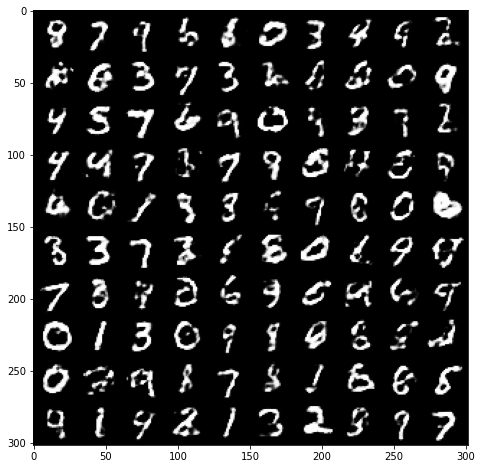

In [20]:
from matplotlib import pyplot as plt
from PIL import Image

# show output after epochs training
plt.figure(figsize=(8, 8))
plt.grid(False)
plt.imshow(np.asarray(Image.open(os.path.join(sample_dir, "fake_images-0298.png"))))